In [1]:
from vedo import *
from ipyvtklink.viewer import ViewInteractiveWidget
import numpy as np
import tensorflow as tf
import time

#limit GPU memory ------------------------------------------------
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    memlim = 20*1024
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=memlim)])
  except RuntimeError as e:
    print(e)
#-----------------------------------------------------------------

import sys
import os
current = os.getcwd()
parent_directory = os.path.dirname(current)
sys.path.append(parent_directory)
from ICET_spherical import ICET
from linear_corrector import LC

from utils import R_tf
from metpy.calc import lat_lon_grid_deltas
from scipy.spatial.transform import Rotation as R
from matplotlib import pyplot as plt
import copy
import trimesh
%load_ext autoreload
%autoreload 2
%autosave 180
%matplotlib notebook


2023-10-23 07:47:36.071842: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 07:47:36.157066: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 07:47:36.505186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-23 07:47:36.505233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-10-23 07:47:37.172473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 07:47:37.173126: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-23 07:47:37.173288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-23 07:47:37.173405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Autosaving every 180 seconds


In [2]:
# #test loading individual subsections
# # pl = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-2ndSection - mesh.ply'
# pl = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-3rdSection.ply'
# HD_map = trimesh.load(pl).vertices
# show_nth = 10 #10
# submap = HD_map[::show_nth]
# plt = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)
# disp=[]
# disp.append(Points(submap, c = "#CB2314", r = 2, alpha = 0.1)) 
# plt.show(disp, "HD Map")
# ViewInteractiveWidget(plt.window)

In [3]:
#stitch together full HD Map
show_nth = 10 #10
disp=[]
plt2 = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)

pl1 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-1stSection - mesh.ply'
HD_map1 = trimesh.load(pl1).vertices
submap1 = HD_map1[::show_nth]
print(np.shape(submap1))

pl2 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-2ndSection.ply'
HD_map2 = trimesh.load(pl2).vertices
submap2 = HD_map2[::show_nth]
print(np.shape(submap2))

pl3 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-3rdSection.ply'
HD_map3 = trimesh.load(pl3).vertices
submap3 = HD_map3[::show_nth]
print(np.shape(submap3))

pl4 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-4thSection.ply'
HD_map4 = trimesh.load(pl4).vertices
submap4 = HD_map4[::show_nth]
print(np.shape(submap4))

pl5 = '/media/derm/06EF-127D4/Newer College Dataset/new-college-29-01-2020-1cm-resolution-5thSection.ply'
HD_map5 = trimesh.load(pl5).vertices
submap5 = HD_map5[::show_nth]
print(np.shape(submap5))

# disp.append(Points(submap1, c = "red", r = 2, alpha = 0.1)) 
# disp.append(Points(submap2, c = "orange", r = 2, alpha = 0.1)) 
# disp.append(Points(submap3, c = "yellow", r = 2, alpha = 0.1)) 
# disp.append(Points(submap4, c = "green", r = 2, alpha = 0.1)) 
# disp.append(Points(submap5, c = "blue", r = 2, alpha = 0.1)) 
disp.append(Points(submap1, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap2, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap3, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap4, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap5, c = "grey", r = 2, alpha = 0.1)) 

plt2.show(disp, "Full HD Map")
ViewInteractiveWidget(plt2.window)

(402473, 3)
(1137566, 3)
(1675711, 3)
(3151530, 3)
(2121251, 3)


ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

In [4]:
#load ground truth
# [sec,nsec,x,y,z,qx,qy,qz,qw]
fn_gt = "/media/derm/06EF-127D4/Newer College Dataset/01_Short_Experiment/registered_poses.csv"
gt = np.loadtxt(fn_gt, delimiter=',',skiprows = 1)
seconds = gt[:, 0]
nano_seconds = gt[:, 1]
xyz = gt[:, 2:5]
qxyzw = gt[:, 5:]
num_poses = qxyzw.shape[0]
poses = np.eye(4, dtype=np.float64).reshape(1, 4, 4).repeat(num_poses, axis=0)
poses[:, :3, :3] = R.from_quat(qxyzw).as_matrix()
poses[:, :3, 3] = xyz
T_CL = np.eye(4, dtype=np.float32)
T_CL[:3, :3] = R.from_quat([0.0, 0.0, 0.924, 0.383]).as_matrix() #was this --1134.97 deg
T_CL[:3, 3] = np.array([-0.084, -0.025, 0.050], dtype=np.float32) #was this
poses = np.einsum("nij,jk->nik", poses, T_CL)
initial_pose = np.linalg.inv(poses[0]) 
poses_timestamps = seconds * 10e9 + nano_seconds
poses = np.einsum("ij,njk->nik", np.linalg.inv(poses[0]), poses)


#draw GT trajectory
start_idx = 0
gt_lidarframe = gt[:,2:5]
gt_lidarframe = (poses[start_idx] @ np.append(gt_lidarframe, np.ones([len(gt_lidarframe),1]), axis = 1).T).T
# gt_lidarframe[:,:3] -= gt_lidarframe[start_idx,:3]
#rotate 180 deg about vertical axis to align with LOAM results
# gt_lidarframe[:,:3] = gt_lidarframe[:,:3] @ R.from_euler('xyz', [np.deg2rad(0), np.deg2rad(10.25), np.deg2rad(75.5)]).as_matrix() #test
gt_points = Line(gt_lidarframe[:,:3], c = "red", lw = 4, alpha = 1).legend("Actual Motion of Platform")
disp = []
disp.append(gt_points)
disp.append(Points(submap1, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap2, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap3, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap4, c = "grey", r = 2, alpha = 0.1)) 
disp.append(Points(submap5, c = "grey", r = 2, alpha = 0.1)) 

plt3 = Plotter(N = 1, axes = 4, bg = (1, 1, 1), interactive = True)
plt3.show(disp, "Full HD Map")
ViewInteractiveWidget(plt3.window)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

In [48]:
#put HD Map and new scan in frame of raw keyframe scan
idx = 600 #test
offset = 1 #2 #1 #0 #no offset here! This makes life sooo much easier!!!

skip = 1 #10 #how many lidar frames between keyframe and new scan
fn1 = "/media/derm/06EF-127D4/Newer College Dataset/01_Short_Experiment/point_clouds/frame_" + str(idx + offset) + ".npy"
fn2 = "/media/derm/06EF-127D4/Newer College Dataset/01_Short_Experiment/point_clouds/frame_" + str(idx + skip + offset) + ".npy"
pc1 = np.load(fn1)
pc2 = np.load(fn2)
plt = Plotter(N = 1, axes = 1, bg = (1, 1, 1), interactive = True) #axes = 4 (simple), 1(scale)
disp=[]

submap = np.concatenate((submap1, submap2, submap3, submap4, submap5), axis = 0) #full scene
# submap = np.concatenate((submap2, submap3, submap4), axis = 0) #test
# submap = submap4 #test
print(np.shape(submap))

#transform everything to pc1 frame
pc2_in_pc1_frame = (np.linalg.pinv(poses[idx]) @ poses[idx+skip] @ np.append(pc2, np.ones([len(pc2),1]), axis=1).T).T
pc2_in_pc1_frame = pc2_in_pc1_frame[:,:3] #remove extra axis
submap_in_pc1_frame = (np.linalg.pinv(poses[idx]) @ initial_pose @ np.append(submap, np.ones([len(submap),1]), axis =1).T).T
submap_in_pc1_frame = submap_in_pc1_frame[:,:3]

# debug: try downsampling submap based on how far away each point is from ego platform
rads = np.sqrt(np.sum(submap_in_pc1_frame**2, axis = 1))
# submap_in_pc1_frame = submap_in_pc1_frame[np.argwhere(rads < 50)[:,0]] # simple distance cutoff (bad)
#randomly drop points proportional to their distance from origin ~~~~~~~
# rel_rads = rads/max(rads)
# randy = np.random.rand(len(rel_rads))
# submap_in_pc1_frame = submap_in_pc1_frame[np.where(randy + rel_rads**(1/3) < 1)]
# submap_in_pc1_frame = submap_in_pc1_frame[np.where(randy + rel_rads**(1/2) < 0.8)]

#test
rel_rads = (1-rads/max(rads))**20
sampled_rads = np.random.choice(np.linspace(0,len(rads)-1, len(rads)), 1_000_000, replace=False, p=rel_rads/np.sum(rel_rads)).astype(int)
submap_in_pc1_frame = submap_in_pc1_frame[sampled_rads,:]
print(np.shape(submap_in_pc1_frame))
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#remove points from HD Map far outside FOV of sensor
phis = LC.c2s(LC, submap_in_pc1_frame)[:,2]
not_too_low = np.argwhere(phis > 3*np.pi/8)[:,0]
# print(np.shape(not_too_low))
not_too_high = np.argwhere(phis < 4.5*np.pi/8)[:,0]
# print(len(not_too_high))
good_phis = np.intersect1d(not_too_high, not_too_low)
# print(len(good_phis))
submap_in_pc1_frame = submap_in_pc1_frame[good_phis,:]

# DRAW SUBMAP and SCANS 1, 2
# pc1 = np.flip(pc1, axis=0)

disp.append(Points(submap_in_pc1_frame, c = "black", r = 2, alpha = 0.5)) ##CB2314
# disp.append(Points(pc1, c = '#a65852', r = 3)) #red
# disp.append(Points(pc2_in_pc1_frame, c = '#2c7c94', r = 3)) #blue
color = 255*np.linspace(0,1,len(pc1))
cname = np.array([255-color, color, 255-color]).T.tolist()
disp.append(Points(pc1, c=cname,  r = 3.5, alpha =0.5))

plt.show(disp, "01 Short Experiment Frame #" + str(idx))
ViewInteractiveWidget(plt.window)

(8488531, 3)
(1000000, 3)


ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

# Run VICET on single frame

In [52]:
A0 = np.array([0., 0., 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0])
max_buffer = 0.05 

# dc = LC(cloud1 = submap_in_pc1_frame, cloud2 = pc1, fid = 90, niter = 10, 
#         draw = True, mnp = 20, RM = False, solver = '12_state', 
#         max_buffer = max_buffer, A0 = A0)
dc = LC(cloud1 = submap_in_pc1_frame, cloud2 = np.flip(pc1, axis = 0), fid = 100, niter = 50, 
        draw = True, mnp = 20, RM = True, solver = '12_state', 
        max_buffer = max_buffer, A0 = A0)


# dc = LC(cloud1 = pc1, cloud2 = pc2_in_pc1_frame, fid = 60, niter = 50, 
#         draw = True, mnp = 50, RM = False, solver = '12_state', 
#         max_buffer = max_buffer, A0 = A0)

ViewInteractiveWidget(dc.plt.window)

A0:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.018  -0.0013 -0.0041 -0.0005  0.0002 -0.0006] 
 [ 0.0249  0.0113  0.0092  0.0008 -0.0007  0.0031]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.033  -0.0024 -0.0076 -0.0009  0.0004 -0.0011] 
 [ 0.0435  0.0193  0.0166  0.0015 -0.0012  0.0058]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0472 -0.0018 -0.0101 -0.0012  0.0005 -0.0019] 
 [ 0.0606  0.0299  0.0217  0.002  -0.0016  0.0094]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0594 -0.0029 -0.0123 -0.0015  0.0006 -0.0026] 
 [ 0.0782  0.0418  0.026   0.0025 -0.0019  0.0122]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0697 -0.0026 -0.014  -0.0018  0.0007 -0.0032] 
 [ 0.092   0.0514  0.0293  0.003  -0.0021  0.0148]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0785 -0.0028 -0.0151 -0.0021  0.0007 -0.0037] 
 [ 0.1035  0.0595  0.032   0.0035 -0.0022  0.0169]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0851 -0.001  -0.0159 -0.0023  0.0008 -0.0043] 
 [ 0.1034  0.0

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

[[-3.35559   8.2542    0.145701  1.      ]
 [-3.35429   8.25273   0.146137  1.      ]
 [-3.34605   8.24457   0.138331  1.      ]
 ...
 [-1.06554   5.35482   0.543081  1.      ]
 [-1.0588    5.34666   0.54291   1.      ]
 [-1.05797   5.34504   0.543112  1.      ]]


<IPython.core.display.Javascript object>


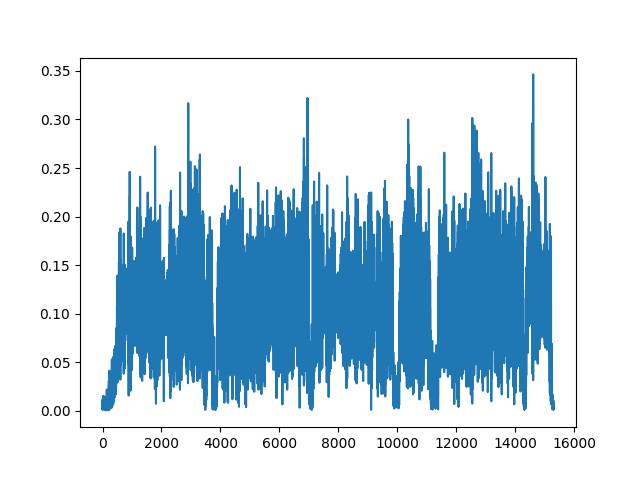

In [53]:
#plot velocity of platform...
from matplotlib import pyplot as p

print(gt_lidarframe)

fig, ax = p.subplots()
# ax.plot(np.diff(gt_lidarframe[:,0,]))
# ax.plot(gt_lidarframe[:,0])
ax.plot(np.sqrt(np.diff(gt_lidarframe[:,0])**2 + np.diff(gt_lidarframe[:,1])**2 ))

# Test: Run VIET on $n$ frames 

In [77]:
start_idx = 500
runlen = 1000
noise_scale = 0.01 #set inital pose randomization
offset = 1

submap = np.concatenate((submap1, submap2, submap3, submap4, submap5), axis = 0) #full scene

A_hist = np.zeros([runlen, 12]) #VICET
VICET_CD_hist = np.zeros(runlen)
VICET_pred_stds = np.zeros([runlen,12])

X_hist_ICP = np.zeros([runlen, 6]) 
X_hist_ICET = np.zeros([runlen, 6]) 

for i in range(runlen):
    
    idx = i + start_idx
    print("starting frame", idx)
    
    #put HD Map and new scan in frame of raw keyframe scan
    fn1 = "/media/derm/06EF-127D4/Newer College Dataset/01_Short_Experiment/point_clouds/frame_" + str(idx + offset) + ".npy"
    pc1 = np.load(fn1)
    
    submap_in_pc1_frame = (np.linalg.pinv(poses[idx]) @ initial_pose @ np.append(submap, np.ones([len(submap),1]), axis =1).T).T
    submap_in_pc1_frame = submap_in_pc1_frame[:,:3]
    
    rads = np.sqrt(np.sum(submap_in_pc1_frame**2, axis = 1))
    rel_rads = (1-rads/max(rads))**20
    sampled_rads = np.random.choice(np.linspace(0,len(rads)-1, len(rads)), 1_000_000, replace=False, p=rel_rads/np.sum(rel_rads)).astype(int)
    submap_in_pc1_frame = submap_in_pc1_frame[sampled_rads,:]

    #remove points from HD Map far outside FOV of sensor
    phis = LC.c2s(LC, submap_in_pc1_frame)[:,2]
    not_too_low = np.argwhere(phis > 3*np.pi/8)[:,0]
    not_too_high = np.argwhere(phis < 4.5*np.pi/8)[:,0]
    good_phis = np.intersect1d(not_too_high, not_too_low)
    submap_in_pc1_frame = submap_in_pc1_frame[good_phis,:]

    xseed = noise_scale*np.random.randn()
    yseed = noise_scale*np.random.randn()
    
    #Run VICET ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #seed random start
    A0 = np.array([xseed,yseed, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0])
    max_buffer = 0.125

    dc = LC(cloud1 = submap_in_pc1_frame, cloud2 = np.flip(pc1,axis=0), fid = 100, niter = 100, 
        draw = False, mnp = 20, RM = True, solver = '12_state', 
        max_buffer = max_buffer, A0 = A0)
    
    A_hist[i,:] = dc.A
    VICET_pred_stds[i,:] = dc.pred_stds
    
#     #Run ICP ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     init = np.array([[1, 0, 0, 0.01*np.random.randn()],
#                      [0.,1, 0, 0.01*np.random.randn()],
#                      [0, 0, 1, 0.],
#                      [0, 0, 0, 1]])
#     icp_rigid_transform, transformed_pc1, _ = trimesh.registration.icp(pc1, submap_in_pc1_frame, initial = init,
#                                                                    threshold = 1e-7, max_iterations=50) #scan to HD Map
#     icp_trans = icp_rigid_transform[:3,3]
#     icp_euls = R.from_matrix(icp_rigid_transform[:3,:3]).as_euler('xyz')
#     X_hist_ICP[i,:] = np.append(icp_trans, icp_euls) 
#     print("\n ICP result:", X_hist_ICP[i,:], "\n")

    #Run NDT (ICET) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    initial_guess = tf.constant([xseed,yseed,0.,0.,0.,0.])
    it = ICET(cloud1 = submap_in_pc1_frame, cloud2 = pc1, fid = 60, niter = 15, 
           draw = False, group = 2, RM = True, DNN_filter = False, x0 = initial_guess)
    X_hist_ICET[i,:] = it.X
    print("\n ICET result:", X_hist_ICET[i,:], "\n")
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    

starting frame 500
A0:
 [0.01330088 0.00952488 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0202  0.0149  0.0021 -0.0008 -0.0011  0.0008] 
 [ 0.0039  0.0033  0.0008  0.0003  0.0003 -0.0012]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0272  0.0204  0.004  -0.0014 -0.0021  0.0024] 
 [ 0.0079  0.0067  0.0014  0.0006  0.0007 -0.0036]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0322  0.0243  0.0058 -0.0019 -0.0028  0.0031] 
 [ 0.0106  0.009   0.002   0.0009  0.0009 -0.0048]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [ 0.0374  0.028   0.0075 -0.0024 -0.0035  0.0039] 
 [ 0.0136  0.0113  0.0026  0.0012  0.0012 -0.0061]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [ 0.0408  0.0307  0.0091 -0.0028 -0.0041  0.0047] 
 [ 0.0155  0.013   0.0033  0.0015  0.0016 -0.0074]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [ 0.0437  0.0331  0.0106 -0.0031 -0.0047  0.0055] 
 [ 0.017   0.0145  0.0039  0.0017  0.0018 -0.008

iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.0690745   0.01322035  0.00167675 -0.00319159 -0.00409944  0.00013192], shape=(6,), dtype=float32)

 ICET result: [-0.0690745   0.01322035  0.00167675 -0.00319159 -0.00409944  0.00013192] 

starting frame 501
A0:
 [-0.01321768  0.00230816  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0147 -0.0085 -0.0031 -0.0008 -0.0004  0.0005] 
 [-0.0052  0.0175  0.0085  0.0009  0.0004 -0.0002]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0134 -0.0186 -0.0057 -0.0014 -0.0008  0.0009] 
 [-0.0178  0.0355  0.0152  0.0017  0.0007 -0.0004]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0142 -0.0273 -0.008  -0.002  -0.0012  0.0014] 
 [-0.0273  0.0516  0.0211  0.0025  0.0011 -0.0007]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0155 -0.0357 -0.0097 -0.0025 -0.0015  0.00


 ---checking for moving objects---
A: 
 [-0.009  -0.15   -0.0208 -0.0081 -0.0072  0.0117] 
 [-0.0313  0.3973  0.0734  0.0145  0.0099 -0.01  ]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06867708  0.01868975 -0.00227987 -0.00197385 -0.00133383  0.00330684], shape=(6,), dtype=float32)

 ICET result: [-0.06867708  0.01868975 -0.00227987 -0.00197385 -0.00133383  0.00330684] 

starting frame 502
A0:
 [-0.01809828  0.02277551  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.017   0.0067  0.0019 -0.0004 -0.0004  0.0015] 
 [-0.002   0.0293 -0.0006  0.0005  0.0004 -0.0012]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0159 -0.0083  0.0038 -0.0007 -0.0007  0.0028] 
 [-0.0035  0.0556 -0.0019  0.0008  0.0007 -0.0019]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0177 -0.0216  0.0054


 ---checking for moving objects---
A: 
 [-0.1056 -0.1179  0.0052 -0.0051 -0.0043  0.0206] 
 [ 0.1513  0.2385  0.0124  0.0064  0.0065 -0.0123]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06788976  0.00932805 -0.01128424 -0.00268457  0.0004242   0.01435292], shape=(6,), dtype=float32)

 ICET result: [-0.06788976  0.00932805 -0.01128424 -0.00268457  0.0004242   0.01435292] 

starting frame 503
A0:
 [-0.0175784  0.0052599  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.       ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0181 -0.0084  0.0053 -0.0012  0.0001 -0.0011] 
 [ 0.0204 -0.0074  0.0018  0.0019  0.0005 -0.0008]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0482 -0.0212  0.01   -0.0023  0.0002 -0.0022] 
 [ 0.0383 -0.014   0.0035  0.0035  0.0009 -0.0014]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0743 -0.0332  0.015  -0.0032  0


 ---checking for moving objects---
A: 
 [ 0.1024 -0.0837  0.0537 -0.0103 -0.0039 -0.0087] 
 [ 0.0686 -0.0478  0.0254  0.0197  0.0081 -0.0084]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1017 -0.0829  0.0536 -0.0103 -0.004  -0.0086] 
 [ 0.0682 -0.0474  0.0254  0.0197  0.0082 -0.0084]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.09181599  0.00979957 -0.01499583 -0.00118458  0.0049549  -0.00705701], shape=(6,), dtype=float32)

 ICET result: [-0.09181599  0.00979957 -0.01499583 -0.00118458  0.0049549  -0.00705701] 

starting frame 504
A0:
 [-0.00160534 -0.00553275  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0669 -0.0597  0.0108  0.0015 -0.0001 -0.0034] 
 [ 0.0398 -0.031  -0.0166 -0.0009  0.0008 -0.0008]
~~~~~~~~~~~Iteration  1 ~~~


 ---checking for moving objects---
A: 
 [ 0.0542 -0.0583  0.0916  0.0111 -0.0015 -0.0159] 
 [ 0.0375 -0.0215 -0.1442 -0.0088  0.0036 -0.0044]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0527 -0.055   0.0913  0.011  -0.0014 -0.0157] 
 [ 0.0367 -0.0195 -0.1436 -0.0088  0.0034 -0.0045]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0536 -0.0534  0.0882  0.0109 -0.0012 -0.0156] 
 [ 0.0371 -0.0186 -0.1378 -0.0085  0.0031 -0.0047]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.05735416  0.0015808  -0.00511328  0.00585478  0.00227742 -0.01437709], shape=(6,), dtype=float32)

 ICET result: [-0.05735416  0.0015808  -0.00511328  0.00585478  0.00227742 -0.01437709] 

starting frame 505
A0:
 [0.00127857 0.00324228 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~


 ---checking for moving objects---
A: 
 [ 0.1135 -0.1126 -0.0121  0.0009 -0.0009 -0.0055] 
 [ 0.0616 -0.0676  0.0621  0.0081  0.0001 -0.0123]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1127 -0.11   -0.0121  0.0008 -0.0009 -0.0055] 
 [ 0.0611 -0.0661  0.0619  0.0081  0.0002 -0.0122]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1127 -0.1085 -0.0117  0.0008 -0.001  -0.0054] 
 [ 0.0611 -0.0651  0.0618  0.0082  0.0002 -0.0122]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1131 -0.1074 -0.011   0.0008 -0.001  -0.0054] 
 [ 0.0613 -0.0645  0.0618  0.0083  0.0003 -0.0121]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.04618621 -0.01496206 -0.01298432  0.00419943  0.00119763 -0.00489891], shape=(6,), dtype=float32)

 ICET result: [-0.04618621 -0.01496206 -0.01298432  0.00419943  


 ---checking for moving objects---
A: 
 [ 0.0774 -0.0555  0.0495 -0.008  -0.005  -0.018 ] 
 [ 0.0705 -0.0159  0.027   0.024   0.0043  0.0007]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.077  -0.0542  0.0495 -0.008  -0.0051 -0.0179] 
 [ 0.0704 -0.0151  0.027   0.0239  0.0044  0.0007]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0771 -0.0532  0.0496 -0.0079 -0.0051 -0.0179] 
 [ 0.0705 -0.0144  0.0271  0.0239  0.0046  0.0008]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0774 -0.0527  0.0493 -0.0078 -0.0052 -0.0179] 
 [ 0.0707 -0.014   0.027   0.0238  0.0047  0.0008]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0771 -0.0517  0.0493 -0.0077 -0.0053 -0.0179] 
 [ 0.0706 -0.0134  0.027   0.0237  0.0049  0.0009]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [ 0.105  -0.0999  0.0379 -0.0051 -0.0065 -0.0111] 
 [ 0.0677 -0.0538  0.014   0.0118  0.0084  0.0099]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1052 -0.1     0.0372 -0.0052 -0.0066 -0.0112] 
 [ 0.0679 -0.0539  0.0158  0.0121  0.0085  0.01  ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1057 -0.1006  0.0366 -0.0053 -0.0066 -0.0113] 
 [ 0.0683 -0.0542  0.0176  0.0123  0.0086  0.0101]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1051 -0.1003  0.0361 -0.0054 -0.0067 -0.0114] 
 [ 0.0679 -0.054   0.0191  0.0125  0.0086  0.0103]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.105  -0.1002  0.0354 -0.0055 -0.0067 -0.0115] 
 [ 0.0678 -0.0539  0.0204  0.0127  0.0087  0.0105]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [ 0.1643 -0.2232  0.0216  0.0039  0.0006 -0.0441] 
 [ 0.1023 -0.1615 -0.004  -0.0046 -0.0031  0.0332]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1642 -0.221   0.0218  0.004   0.0006 -0.0441] 
 [ 0.1022 -0.1599 -0.0039 -0.0046 -0.0031  0.0334]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1644 -0.2193  0.0215  0.004   0.0007 -0.0441] 
 [ 0.1023 -0.1587 -0.004  -0.0047 -0.0031  0.0336]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1644 -0.2169  0.0214  0.004   0.0007 -0.0441] 
 [ 0.1023 -0.157  -0.004  -0.0047 -0.0031  0.0338]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1649 -0.2154  0.0213  0.004   0.0007 -0.0441] 
 [ 0.1026 -0.156  -0.0041 -0.0048 -0.0031  0.034 ]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 

A: 
 [ 0.1173 -0.1989  0.0522 -0.0046 -0.0118 -0.013 ] 
 [ 0.088  -0.1312  0.0277  0.0157  0.011  -0.0084]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.117  -0.1969  0.0505 -0.0047 -0.0117 -0.0129] 
 [ 0.0878 -0.1299  0.0304  0.0159  0.0109 -0.0085]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1155 -0.1939  0.0506 -0.0047 -0.0117 -0.0128] 
 [ 0.0867 -0.1279  0.0307  0.016   0.0109 -0.0086]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1158 -0.1927  0.0505 -0.0048 -0.0117 -0.0128] 
 [ 0.0869 -0.1272  0.0307  0.0161  0.0109 -0.0086]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1156 -0.1914  0.0486 -0.0048 -0.0117 -0.0127] 
 [ 0.0866 -0.1263  0.0334  0.0162  0.0108 -0.0086]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1146 -0.1899  0.0486 -0.0049 -0.0117 -0.0127] 
 [ 0.086  -0.1254  0.0335  0.0163  0.0109 -0.0087


 ---checking for moving objects---
A: 
 [ 0.1138 -0.2905  0.0466 -0.0095 -0.0011 -0.0575] 
 [ 0.0427 -0.04    0.0448  0.0174 -0.0077  0.0539]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1105 -0.2849  0.0455 -0.0093 -0.001  -0.0576] 
 [ 0.0408 -0.0361  0.0447  0.0171 -0.0078  0.0546]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1078 -0.2796  0.0447 -0.0094 -0.001  -0.0575] 
 [ 0.0392 -0.0324  0.0447  0.0171 -0.0078  0.0551]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1054 -0.2746  0.044  -0.0094 -0.0009 -0.0575] 
 [ 0.0379 -0.0288  0.0447  0.0171 -0.0078  0.0557]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1021 -0.2694  0.0431 -0.0093 -0.0009 -0.0575] 
 [ 0.036  -0.0251  0.0446  0.0169 -0.0079  0.0561]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0999 -0.2653  0.0425 -0.0093 -0.0008 -0.0575] 
 [ 0.0348 -0.


 ---checking for moving objects---
A: 
 [ 0.0837 -0.0831  0.0345 -0.01   -0.0026 -0.0112] 
 [ 0.0556 -0.0605  0.0229  0.0134 -0.0001  0.0066]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0834 -0.0843  0.0345 -0.01   -0.0025 -0.0115] 
 [ 0.0556 -0.0613  0.0228  0.0134 -0.0002  0.0069]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0837 -0.0848  0.0345 -0.01   -0.0025 -0.0116] 
 [ 0.0559 -0.0616  0.0228  0.0134 -0.0003  0.0072]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.084  -0.086   0.0345 -0.01   -0.0024 -0.0119] 
 [ 0.0562 -0.0624  0.0228  0.0134 -0.0004  0.0075]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0846 -0.0867  0.0345 -0.01   -0.0024 -0.0121] 
 [ 0.0567 -0.0629  0.0227  0.0133 -0.0005  0.0078]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0843 -0.0872  0.0346 -0.01   -0.0023 -0.0122] 
 [ 0.0567 -0.


 ---checking for moving objects---
A: 
 [ 0.0658 -0.025   0.0395 -0.0112 -0.0036 -0.0006] 
 [ 0.0488 -0.004   0.031   0.0177  0.0021 -0.0118]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0657 -0.0258  0.0393 -0.0111 -0.0035 -0.0009] 
 [ 0.0489 -0.0044  0.0308  0.0176  0.002  -0.0112]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0658 -0.0277  0.0395 -0.0112 -0.0035 -0.0012] 
 [ 0.0492 -0.0055  0.031   0.0176  0.002  -0.0107]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0654 -0.0284  0.0395 -0.0112 -0.0035 -0.0015] 
 [ 0.049  -0.0059  0.0311  0.0176  0.0019 -0.0102]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0648 -0.0286  0.0396 -0.0112 -0.0035 -0.0018] 
 [ 0.0487 -0.0061  0.0311  0.0175  0.0019 -0.0096]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0639 -0.0293  0.0394 -0.0111 -0.0034 -0.0021] 
 [ 0.0482 -0.

A: 
 [ 0.0656 -0.0922  0.0346 -0.0075 -0.0068 -0.0036] 
 [ 0.0484 -0.0297  0.0229  0.0127  0.0059  0.003 ]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0661 -0.0926  0.0347 -0.0074 -0.0069 -0.0036] 
 [ 0.0487 -0.0298  0.0229  0.0126  0.0059  0.003 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0658 -0.0934  0.0348 -0.0074 -0.0069 -0.0036] 
 [ 0.0486 -0.0303  0.023   0.0125  0.006   0.003 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0664 -0.0948  0.0348 -0.0073 -0.007  -0.0037] 
 [ 0.049  -0.031   0.0231  0.0125  0.0061  0.0029]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0662 -0.0952  0.0348 -0.0073 -0.007  -0.0037] 
 [ 0.0488 -0.0312  0.023   0.0124  0.0061  0.0029]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0656 -0.0942  0.0349 -0.0073 -0.007  -0.0037] 
 [ 0.0484 -0.0307  0.0231  0.0124  0.0062  0.0029

A: 
 [ 0.033   0.0666  0.0258 -0.006  -0.0095 -0.0045] 
 [0.0279 0.04   0.0168 0.0089 0.0065 0.019 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0318  0.0662  0.0262 -0.006  -0.0096 -0.0044] 
 [0.0272 0.0397 0.017  0.009  0.0066 0.019 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0319  0.0655  0.0264 -0.0061 -0.0096 -0.0046] 
 [0.0272 0.0393 0.0171 0.0091 0.0067 0.0192]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.031   0.0658  0.0265 -0.0061 -0.0097 -0.0045] 
 [0.0267 0.0394 0.0172 0.0091 0.0067 0.0192]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0309  0.0648  0.0267 -0.0061 -0.0097 -0.0047] 
 [0.0267 0.0388 0.0173 0.0092 0.0068 0.0194]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0329  0.0637  0.027  -0.0061 -0.0098 -0.0047] 
 [0.028  0.038  0.0173 0.0092 0.0069 0.0193]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~

A: 
 [ 0.0728  0.0085  0.3817 -0.0026 -0.0538  0.0194] 
 [ 0.0223 -0.0067 -0.4834  0.0122  0.0799 -0.0113]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0753  0.0056  0.3574 -0.0031 -0.0518  0.0189] 
 [ 0.0225 -0.0082 -0.4445  0.0133  0.077  -0.0107]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0768  0.004   0.3344 -0.0036 -0.0499  0.0185] 
 [ 0.0213 -0.0095 -0.4069  0.0144  0.0741 -0.0101]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0801 -0.0019  0.3143 -0.0037 -0.0482  0.018 ] 
 [ 0.0225 -0.0114 -0.3752  0.0148  0.0715 -0.0098]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0823 -0.0062  0.2931 -0.0038 -0.0464  0.0175] 
 [ 0.0223 -0.0136 -0.3439  0.0152  0.0689 -0.0093]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0835 -0.0083  0.2732 -0.004  -0.0447  0.0171] 
 [ 0.0204 -0.0151 -0.313   0.0157  0.0664 -0.0087


 ---checking for moving objects---
A: 
 [ 0.0578 -0.0992  0.0916  0.0017 -0.0472 -0.0323] 
 [ 0.0368 -0.0612 -0.003   0.0187  0.0786  0.0358]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0578 -0.0987  0.0899  0.002  -0.047  -0.0322] 
 [ 0.0368 -0.0609 -0.0041  0.0179  0.0783  0.0358]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.058  -0.0986  0.0889  0.0023 -0.0467 -0.0321] 
 [ 0.0369 -0.0608 -0.0048  0.0171  0.0778  0.0358]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0586 -0.0983  0.0879  0.0027 -0.0464 -0.0321] 
 [ 0.0372 -0.0606 -0.0055  0.016   0.0772  0.0358]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0592 -0.0989  0.0873  0.0029 -0.0461 -0.032 ] 
 [ 0.0376 -0.061  -0.006   0.0154  0.0767  0.0358]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0613 -0.1     0.087   0.003  -0.046  -0.032 ] 
 [ 0.0387 -0.


 ---checking for moving objects---
A: 
 [ 0.0505  0.0034  0.0444 -0.0029 -0.0102 -0.002 ] 
 [ 0.0223 -0.0051  0.0238  0.0192  0.0123 -0.0006]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0518  0.0011  0.0447 -0.0029 -0.0103 -0.0021] 
 [ 0.0231 -0.0062  0.0239  0.0192  0.0124 -0.0005]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.053  -0.0009  0.0449 -0.0028 -0.0104 -0.0023] 
 [ 0.0238 -0.0073  0.024   0.0191  0.0125 -0.0004]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0539 -0.0027  0.045  -0.0028 -0.0104 -0.0024] 
 [ 0.0244 -0.0082  0.0241  0.0191  0.0126 -0.0002]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0546 -0.003   0.0455 -0.0028 -0.0105 -0.0025] 
 [ 0.0247 -0.0084  0.0243  0.0191  0.0126 -0.0001]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0552 -0.0044  0.0454 -0.0027 -0.0105 -0.0026] 
 [ 0.0251 -0.

A: 
 [ 0.0717 -0.0822  0.059   0.0037 -0.0338 -0.02  ] 
 [ 0.0444 -0.0525  0.0317  0.0181  0.0565  0.0183]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.072  -0.0821  0.0583  0.004  -0.0338 -0.0201] 
 [ 0.0447 -0.0524  0.0312  0.0176  0.0565  0.0184]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0719 -0.0817  0.0576  0.0042 -0.0337 -0.02  ] 
 [ 0.0445 -0.0521  0.0308  0.0172  0.0564  0.0184]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0717 -0.081   0.0571  0.0044 -0.0337 -0.0201] 
 [ 0.0444 -0.0517  0.0305  0.0169  0.0565  0.0186]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0729 -0.0819  0.0567  0.0046 -0.0337 -0.0201] 
 [ 0.0452 -0.0523  0.0301  0.0166  0.0565  0.0186]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0731 -0.0819  0.056   0.0046 -0.0337 -0.0202] 
 [ 0.0454 -0.0523  0.0296  0.0164  0.0567  0.0187


 ---checking for moving objects---
A: 
 [ 0.1254 -0.1083  0.1226 -0.0337 -0.0368 -0.0171] 
 [ 0.0832 -0.0339  0.0633  0.0787  0.0619 -0.005 ]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1238 -0.1063  0.1214 -0.0334 -0.0363 -0.0172] 
 [ 0.082  -0.0327  0.0627  0.0781  0.0612 -0.0048]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1228 -0.1042  0.1209 -0.0329 -0.0357 -0.0171] 
 [ 0.0811 -0.0314  0.0625  0.0771  0.0602 -0.0046]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.122  -0.1025  0.1203 -0.0323 -0.0353 -0.0171] 
 [ 0.0805 -0.0304  0.0622  0.0762  0.0595 -0.0044]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.121  -0.101   0.1188 -0.0316 -0.0346 -0.0172] 
 [ 0.0797 -0.0296  0.0613  0.0748  0.0585 -0.0041]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1202 -0.0999  0.1172 -0.0312 -0.0342 -0.0173] 
 [ 0.0791 -0.


 ---checking for moving objects---
A: 
 [ 0.1311 -0.1699  0.1886 -0.021  -0.0459 -0.0323] 
 [ 0.0298 -0.0408 -0.004   0.0593  0.0775  0.0289]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1312 -0.1671  0.1792 -0.02   -0.045  -0.032 ] 
 [ 0.0299 -0.0388 -0.0044  0.0572  0.0765  0.0287]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1311 -0.1662  0.1718 -0.0188 -0.0441 -0.0316] 
 [ 0.0297 -0.0381 -0.0081  0.0548  0.0756  0.0284]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1317 -0.1657  0.1648 -0.018  -0.0434 -0.0314] 
 [ 0.0301 -0.0378 -0.0098  0.0532  0.0749  0.0281]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1316 -0.1641  0.1584 -0.0167 -0.0424 -0.0311] 
 [ 0.03   -0.0367 -0.0139  0.0506  0.0738  0.0279]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1316 -0.1636  0.1508 -0.0155 -0.0415 -0.0308] 
 [ 0.03   -0.

A: 
 [ 0.1324 -0.1125  0.1971 -0.0215 -0.0329 -0.0012] 
 [ 0.1129 -0.0823 -0.0785  0.0573  0.0497 -0.0531]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1295 -0.1083  0.1942 -0.0206 -0.0323 -0.0014] 
 [ 0.1117 -0.0793 -0.0859  0.0553  0.0492 -0.0524]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1262 -0.1042  0.196  -0.0191 -0.0317 -0.0017] 
 [ 0.1108 -0.0763 -0.0986  0.0526  0.0488 -0.0517]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1214 -0.0992  0.1934 -0.0183 -0.0311 -0.0018] 
 [ 0.1089 -0.0728 -0.1059  0.0508  0.0484 -0.0512]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.118  -0.0944  0.196  -0.0169 -0.0306 -0.0019] 
 [ 0.1079 -0.0693 -0.1184  0.0482  0.048  -0.0508]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1162 -0.0901  0.193  -0.0164 -0.0302 -0.0019] 
 [ 0.1074 -0.0663 -0.1227  0.047   0.0477 -0.0503


 ---checking for moving objects---
A: 
 [ 0.131  -0.0994  0.1501 -0.0239 -0.0726 -0.0166] 
 [ 0.0472 -0.0563  0.0459  0.0767  0.1178 -0.0183]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1296 -0.097   0.1485 -0.0242 -0.0721 -0.0167] 
 [ 0.0466 -0.0549  0.0453  0.0774  0.1171 -0.0182]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1274 -0.096   0.1465 -0.0245 -0.0714 -0.0167] 
 [ 0.0456 -0.0543  0.0445  0.0781  0.1163 -0.0181]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.126  -0.0942  0.1446 -0.0249 -0.0709 -0.0167] 
 [ 0.045  -0.0532  0.0438  0.0789  0.1156 -0.018 ]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1257 -0.0928  0.1428 -0.0255 -0.0704 -0.0168] 
 [ 0.045  -0.0524  0.0429  0.0801  0.1152 -0.0179]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1243 -0.092   0.1413 -0.0259 -0.0698 -0.0168] 
 [ 0.0444 -0.


 ---checking for moving objects---
A: 
 [ 0.0874  0.0217  0.0532  0.0089 -0.0711  0.0056] 
 [ 0.0363  0.0111  0.0313  0.0244  0.1254 -0.0381]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0877  0.0217  0.0533  0.009  -0.071   0.0055] 
 [ 0.0365  0.0111  0.0313  0.0243  0.1251 -0.0379]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0878  0.0235  0.0534  0.0089 -0.0709  0.0055] 
 [ 0.0364  0.0121  0.0312  0.0244  0.125  -0.0377]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0879  0.0218  0.053   0.0089 -0.0708  0.0054] 
 [ 0.0366  0.0111  0.0312  0.0245  0.1249 -0.0377]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0871  0.0223  0.0526  0.0088 -0.0707  0.0054] 
 [ 0.0361  0.0114  0.0309  0.0246  0.1248 -0.0376]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0875  0.0211  0.0529  0.0089 -0.0705  0.0052] 
 [ 0.0365  0.


 ---checking for moving objects---
A: 
 [ 0.0612  0.0308  0.169  -0.0345 -0.0243  0.0103] 
 [ 0.1627  0.0197  0.0541  0.0782  0.0267 -0.0393]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0592  0.031   0.1642 -0.0337 -0.0235  0.0103] 
 [ 0.162   0.0197  0.0514  0.0768  0.0258 -0.0393]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0582  0.032   0.1596 -0.0331 -0.0227  0.0103] 
 [ 0.1617  0.0204  0.0488  0.0754  0.025  -0.0393]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0564  0.0332  0.1553 -0.0323 -0.022   0.0103] 
 [ 0.1613  0.0211  0.0464  0.074   0.0242 -0.0392]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0552  0.0337  0.1511 -0.0316 -0.0212  0.0102] 
 [ 0.1608  0.0214  0.044   0.0726  0.0234 -0.0391]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0541  0.0351  0.1474 -0.0309 -0.0205  0.0103] 
 [ 0.1607  0.


 ---checking for moving objects---
A: 
 [ 0.063  -0.1038  0.4315 -0.0287 -0.0571 -0.0163] 
 [ 0.0478 -0.062  -0.5898  0.0554  0.0942  0.0004]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0627 -0.1026  0.4255 -0.0278 -0.0564 -0.0163] 
 [ 0.0472 -0.0613 -0.5821  0.0541  0.0932  0.0006]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0612 -0.1009  0.4157 -0.028  -0.0558 -0.0164] 
 [ 0.0461 -0.0601 -0.5684  0.0545  0.0924  0.0009]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0605 -0.0992  0.409  -0.0274 -0.0552 -0.0165] 
 [ 0.0454 -0.059  -0.5581  0.0538  0.0914  0.0012]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0599 -0.0982  0.4017 -0.027  -0.0545 -0.0166] 
 [ 0.0447 -0.0583 -0.5485  0.0531  0.0905  0.0014]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0594 -0.0965  0.3951 -0.0262 -0.0538 -0.0166] 
 [ 0.0442 -0.


 ---checking for moving objects---
A: 
 [ 0.0427 -0.1255  0.964  -0.0335 -0.0826 -0.0047] 
 [ 0.1395 -0.044  -1.5208  0.0567  0.1371 -0.0115]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0417 -0.1252  0.9588 -0.0331 -0.0823 -0.0052] 
 [ 0.1377 -0.0442 -1.5107  0.0561  0.1366 -0.0105]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.041  -0.1257  0.9522 -0.0327 -0.082  -0.0059] 
 [ 0.1345 -0.045  -1.4983  0.0557  0.136  -0.0091]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0396 -0.1255  0.9446 -0.0325 -0.0817 -0.0066] 
 [ 0.1311 -0.0455 -1.4858  0.0555  0.1355 -0.0078]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0388 -0.1258  0.9374 -0.0322 -0.0814 -0.007 ] 
 [ 0.1283 -0.0462 -1.4739  0.0552  0.135  -0.0067]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0365 -0.1253  0.932  -0.0319 -0.0812 -0.0075] 
 [ 0.1257 -0.

A: 
 [ 0.0356 -0.0585  0.0125  0.0026 -0.0951  0.0017] 
 [ 0.0173 -0.017   0.0146  0.0244  0.1681 -0.0116]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0364 -0.0596  0.0117  0.0032 -0.0949  0.0018] 
 [ 0.0177 -0.0177  0.0141  0.0235  0.1679 -0.0119]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0354 -0.0561  0.0118  0.0036 -0.0949  0.002 ] 
 [ 0.0172 -0.0156  0.0141  0.023   0.168  -0.012 ]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0334 -0.0533  0.0093  0.0043 -0.0946  0.0022] 
 [ 0.0162 -0.014   0.0125  0.0216  0.1679 -0.0121]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0349 -0.0514  0.0095  0.0047 -0.0945  0.0024] 
 [ 0.0171 -0.0128  0.0125  0.0211  0.1679 -0.0123]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0349 -0.0524  0.008   0.0053 -0.0943  0.0025] 
 [ 0.017  -0.0135  0.0115  0.02    0.1678 -0.0125

A: 
 [ 0.0515  0.1035  0.0177 -0.0097 -0.0085  0.0232] 
 [ 0.0375  0.0777  0.0126  0.0098  0.0026 -0.0118]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.052   0.1016  0.0184 -0.0098 -0.0085  0.0231] 
 [ 0.0377  0.0763  0.0129  0.01    0.0026 -0.0119]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0532  0.0999  0.0191 -0.01   -0.0086  0.023 ] 
 [ 0.0383  0.0751  0.0132  0.0102  0.0027 -0.0119]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0541  0.0981  0.0199 -0.0101 -0.0087  0.023 ] 
 [ 0.0386  0.0738  0.0136  0.0105  0.0027 -0.0121]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0542  0.0968  0.0203 -0.0101 -0.0087  0.023 ] 
 [ 0.0386  0.0728  0.0137  0.0106  0.0027 -0.0121]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0537  0.0954  0.0207 -0.0102 -0.0087  0.023 ] 
 [ 0.0383  0.0718  0.0139  0.0107  0.0026 -0.0122

A: 
 [ 0.0969 -0.0442  0.2474 -0.0203 -0.0311  0.0061] 
 [ 0.066  -0.0298 -0.201   0.0408  0.0398 -0.0114]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0963 -0.0447  0.2369 -0.0196 -0.0303  0.0059] 
 [ 0.0656 -0.03   -0.1908  0.0399  0.0389 -0.0111]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0959 -0.0449  0.2259 -0.0189 -0.0295  0.0058] 
 [ 0.0652 -0.03   -0.1805  0.0389  0.038  -0.0109]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0942 -0.0447  0.222  -0.018  -0.0288  0.0057] 
 [ 0.0642 -0.0299 -0.1828  0.0373  0.0374 -0.0108]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0929 -0.0442  0.2184 -0.0172 -0.0283  0.0057] 
 [ 0.0633 -0.0296 -0.1848  0.0359  0.0369 -0.0107]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0925 -0.044   0.2084 -0.0166 -0.0275  0.0056] 
 [ 0.0628 -0.0295 -0.1749  0.0351  0.0361 -0.0105


 ---checking for moving objects---
A: 
 [ 0.0323 -0.0491  0.9215 -0.0159 -0.086   0.0168] 
 [ 0.0849 -0.0362 -1.3719  0.0349  0.1316 -0.0211]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0321 -0.0486  0.9186 -0.0156 -0.0859  0.0169] 
 [ 0.0848 -0.036  -1.3737  0.0344  0.1317 -0.0212]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0332 -0.0486  0.917  -0.0152 -0.0857  0.017 ] 
 [ 0.0854 -0.0359 -1.3747  0.0338  0.1316 -0.0214]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0332 -0.0478  0.9145 -0.0149 -0.0856  0.0171] 
 [ 0.0854 -0.0355 -1.3762  0.0332  0.1316 -0.0215]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0326 -0.0471  0.9122 -0.0147 -0.0854  0.0172] 
 [ 0.0852 -0.0351 -1.3776  0.0327  0.1317 -0.0217]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0327 -0.0459  0.9111 -0.0144 -0.0854  0.0173] 
 [ 0.0854 -0.


 ---checking for moving objects---
A: 
 [ 0.1033 -0.0489  0.1828 -0.0254 -0.0757 -0.0013] 
 [ 0.0414 -0.0375  0.1135  0.0851  0.1206 -0.0147]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1018 -0.0451  0.1805 -0.0249 -0.0749 -0.0018] 
 [ 0.0406 -0.0353  0.1121  0.0847  0.1199 -0.0138]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1009 -0.0423  0.1786 -0.0245 -0.0742 -0.0022] 
 [ 0.0402 -0.0335  0.111   0.0841  0.1192 -0.013 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.099  -0.0374  0.1758 -0.0239 -0.0733 -0.0024] 
 [ 0.0393 -0.0305  0.1092  0.0833  0.1182 -0.0123]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0977 -0.0347  0.1719 -0.0232 -0.0725 -0.0027] 
 [ 0.0386 -0.0288  0.107   0.0825  0.1176 -0.0116]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0955 -0.0317  0.168  -0.0227 -0.0717 -0.003 ] 
 [ 0.0374 -0.


 ---checking for moving objects---
A: 
 [ 0.0778  0.0584  0.0765 -0.0084 -0.0636  0.0122] 
 [ 0.0506  0.0346  0.0483  0.0505  0.1114 -0.0357]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.077   0.0571  0.0737 -0.0077 -0.0625  0.0118] 
 [ 0.0502  0.0338  0.0465  0.0495  0.1103 -0.0353]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0759  0.0565  0.0713 -0.0073 -0.0613  0.0114] 
 [ 0.0496  0.0335  0.0449  0.0489  0.1091 -0.0348]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0759  0.0545  0.0695 -0.007  -0.0601  0.011 ] 
 [ 0.0497  0.0323  0.0437  0.0485  0.1078 -0.0344]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0749  0.0544  0.0672 -0.0067 -0.0592  0.0107] 
 [ 0.0492  0.0322  0.0421  0.0482  0.1068 -0.0339]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0745  0.0546  0.0661 -0.0066 -0.0582  0.0104] 
 [ 0.0489  0.

A: 
 [ 0.0889 -0.0185  0.0372 -0.0066 -0.0001  0.0139] 
 [ 0.0348 -0.0008  0.0227  0.0187 -0.     -0.0454]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.089  -0.0198  0.037  -0.0066 -0.0001  0.0139] 
 [ 0.0347 -0.0014  0.0227  0.0187 -0.0001 -0.0458]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0893 -0.0205  0.0372 -0.0067 -0.0001  0.014 ] 
 [ 0.0346 -0.0017  0.0229  0.0189 -0.0001 -0.0461]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0899 -0.0207  0.0375 -0.0068 -0.0001  0.014 ] 
 [ 0.0349 -0.0018  0.0231  0.019  -0.0002 -0.0464]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0903 -0.0214  0.0376 -0.0068 -0.0001  0.0141] 
 [ 0.0349 -0.0021  0.0232  0.0191 -0.0002 -0.0468]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0907 -0.0213  0.0378 -0.0069 -0.0001  0.0142] 
 [ 0.0351 -0.0021  0.0233  0.0192 -0.0003 -0.047 

A: 
 [ 0.1076 -0.0049  0.0456 -0.0083 -0.0034 -0.0018] 
 [ 0.0662 -0.0032  0.0313  0.0254  0.0054 -0.0571]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1082 -0.005   0.0456 -0.0083 -0.0033 -0.0016] 
 [ 0.0665 -0.0033  0.0313  0.0255  0.0054 -0.058 ]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1087 -0.005   0.0456 -0.0083 -0.0033 -0.0014] 
 [ 0.0668 -0.0033  0.0313  0.0256  0.0054 -0.0586]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.109  -0.005   0.0457 -0.0083 -0.0029 -0.0012] 
 [ 0.067  -0.0033  0.0313  0.0254  0.0048 -0.059 ]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.11   -0.0051  0.0455 -0.0082 -0.0025 -0.001 ] 
 [ 0.0676 -0.0033  0.0312  0.0252  0.0042 -0.0596]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1112 -0.0052  0.0454 -0.0081 -0.0021 -0.0007] 
 [ 0.0682 -0.0034  0.0311  0.025   0.0036 -0.0603


 ---checking for moving objects---
A: 
 [ 0.036   0.0014  0.0319 -0.0059 -0.0064 -0.0055] 
 [ 0.0129  0.0002  0.0078  0.02    0.0081 -0.0208]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0394  0.0008  0.0324 -0.006  -0.0065 -0.0054] 
 [ 0.014   0.0001  0.0093  0.0203  0.0081 -0.0208]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0427  0.0004  0.0333 -0.006  -0.0066 -0.0052] 
 [ 0.0152  0.      0.008   0.0202  0.0083 -0.0209]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0449  0.      0.0336 -0.006  -0.0067 -0.0051] 
 [ 0.016   0.      0.0086  0.0203  0.0083 -0.0209]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0476 -0.0004  0.034  -0.0061 -0.0068 -0.0051] 
 [ 0.0169 -0.      0.0097  0.0206  0.0084 -0.021 ]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0501 -0.0008  0.0343 -0.0062 -0.0068 -0.005 ] 
 [ 0.0178 -0.

A: 
 [ 0.0739 -0.001   0.0372 -0.0078 -0.0059 -0.0071] 
 [ 0.0388 -0.0027  0.0198  0.019   0.0016 -0.0295]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.075  -0.0011  0.0371 -0.0078 -0.0059 -0.0073] 
 [ 0.0395 -0.0028  0.0197  0.019   0.0015 -0.0294]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0756 -0.0011  0.0371 -0.0077 -0.0058 -0.0075] 
 [ 0.0399 -0.0028  0.0196  0.019   0.0014 -0.0293]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0769 -0.0012  0.037  -0.0077 -0.0058 -0.0077] 
 [ 0.0407 -0.0029  0.0195  0.0189  0.0014 -0.0293]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0767 -0.0012  0.0369 -0.0076 -0.0057 -0.008 ] 
 [ 0.0406 -0.0029  0.0194  0.0189  0.0013 -0.0291]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0765 -0.0012  0.0368 -0.0076 -0.0057 -0.008 ] 
 [ 0.0404 -0.0029  0.0193  0.0188  0.0012 -0.0292

A: 
 [ 0.0386  0.0051  0.0303 -0.0082 -0.0106 -0.0264] 
 [ 0.0193  0.0014  0.0164  0.0195  0.0089 -0.0022]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0402  0.0051  0.0302 -0.0082 -0.0107 -0.0272] 
 [ 0.0203  0.0015  0.0162  0.0196  0.009  -0.0018]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0365  0.0052  0.0307 -0.0083 -0.0109 -0.028 ] 
 [ 0.018   0.0014  0.0168  0.0198  0.0092 -0.0016]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0473  0.006   0.033  -0.0084 -0.0111 -0.0272] 
 [ 0.0248  0.0016  0.0163  0.02    0.0094 -0.    ]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0527  0.0063  0.0338 -0.0083 -0.0112 -0.0263] 
 [0.0278 0.0015 0.0161 0.02   0.0094 0.0016]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0527  0.0062  0.0345 -0.0083 -0.0112 -0.0254] 
 [0.0278 0.0014 0.0165 0.02   0.0094 0.0033]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0

A: 
 [ 0.0458  0.0126 -0.0347 -0.0064 -0.0027  0.0101] 
 [ 0.0312  0.005   0.1031  0.0125 -0.0003 -0.0216]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0468  0.0141 -0.0351 -0.0066 -0.0028  0.0104] 
 [ 0.032   0.0058  0.1047  0.0128 -0.0002 -0.0223]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0478  0.0148 -0.0351 -0.0067 -0.0029  0.0106] 
 [ 0.0326  0.0062  0.1056  0.0131 -0.0002 -0.0229]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0485  0.0153 -0.035  -0.0068 -0.0029  0.0108] 
 [ 0.033   0.0065  0.1063  0.0133 -0.0001 -0.0233]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0497  0.0147 -0.0345 -0.0069 -0.003   0.011 ] 
 [ 0.0336  0.0062  0.1066  0.0135 -0.     -0.0238]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.05    0.0149 -0.0344 -0.007  -0.0031  0.011 ] 
 [ 0.0338  0.0062  0.1068  0.0137  0.     -0.024 ]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0505  0.0151 -0.0339 -0.0

A: 
 [ 0.0265 -0.0042  0.0195 -0.0073 -0.0059  0.005 ] 
 [0.0113 0.0001 0.0112 0.0074 0.0025 0.0031]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0277 -0.0042  0.0209 -0.0074 -0.006   0.005 ] 
 [0.012  0.0001 0.0119 0.0076 0.0025 0.0031]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0284 -0.0042  0.0218 -0.0075 -0.0061  0.0051] 
 [0.0124 0.0001 0.0124 0.0078 0.0025 0.0031]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0291 -0.0042  0.0229 -0.0077 -0.0063  0.0051] 
 [0.0129 0.0001 0.0131 0.0081 0.0025 0.0032]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0301 -0.0042  0.0239 -0.0078 -0.0064  0.0051] 
 [0.0135 0.0001 0.0136 0.0083 0.0026 0.0032]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0286 -0.0042  0.0246 -0.0078 -0.0064  0.0052] 
 [0.0126 0.0001 0.0141 0.0084 0.0025 0.0032]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0299 -0.0043  0.0255 -0.0079 -0.0065  0.0053] 
 [0.0134 0.0001 0.0146 0.0086 0.0026 0.003 ]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---

A: 
 [ 0.0191 -0.0245 -0.0026 -0.0031 -0.0084  0.0021] 
 [ 0.0164 -0.012  -0.0008 -0.0035  0.0077  0.0039]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.02   -0.0255 -0.0012 -0.0034 -0.0086  0.0021] 
 [ 0.017  -0.0121  0.0001 -0.003   0.0078  0.004 ]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0207 -0.0272  0.0006 -0.0037 -0.0087  0.0019] 
 [ 0.0175 -0.0127  0.0012 -0.0024  0.0078  0.0042]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0216 -0.0281  0.0024 -0.0041 -0.0089  0.0019] 
 [ 0.0181 -0.0129  0.0023 -0.0017  0.0078  0.0044]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0228 -0.0291  0.004  -0.0043 -0.009   0.0018] 
 [ 0.0189 -0.0131  0.0033 -0.0013  0.0077  0.0045]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0237 -0.0302  0.0052 -0.0045 -0.0091  0.0018] 
 [ 0.0194 -0.0134  0.004  -0.0009  0.0078  0.0047]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0245 -0.0312  0.0064 -0.0047 -0.0092  0.0017] 
 [ 0.02   -0.0

A: 
 [-0.0129 -0.0138  0.0212 -0.0086 -0.0403  0.0033] 
 [-0.0085 -0.0088  0.0171  0.0232  0.0585  0.0195]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0102 -0.0155  0.0239 -0.0092 -0.0416  0.003 ] 
 [-0.007  -0.0096  0.0188  0.0245  0.0606  0.0203]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0091 -0.0168  0.0265 -0.0096 -0.0427  0.003 ] 
 [-0.0063 -0.0102  0.0204  0.0256  0.0623  0.0206]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.007  -0.0182  0.0296 -0.0101 -0.0438  0.0033] 
 [-0.0051 -0.0107  0.0223  0.0268  0.0639  0.0203]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0059 -0.0199  0.032  -0.0105 -0.0449  0.0033] 
 [-0.0045 -0.0115  0.0239  0.0278  0.0656  0.0205]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0055 -0.0221  0.0332 -0.0109 -0.0466  0.0031] 
 [-0.0043 -0.0126  0.0249  0.0291  0.0683  0.0209]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0036 -0.0237  0.0359 -0.0114 -0.0484  0.0032] 
 [-0.0033 -0.0133  0.0267  0.0307  0.0711  0.0207]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

A: 
 [ 0.0138  0.0733  0.0097 -0.0031 -0.0072  0.0051] 
 [0.0056 0.0296 0.0047 0.0114 0.0069 0.0053]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0141  0.0726  0.0109 -0.0034 -0.0074  0.0051] 
 [0.0057 0.0293 0.0051 0.0119 0.007  0.0054]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0149  0.0726  0.0121 -0.0036 -0.0076  0.0051] 
 [0.0061 0.0293 0.0056 0.0123 0.0072 0.0056]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0161  0.072   0.0137 -0.0037 -0.0077  0.0051] 
 [0.0066 0.0291 0.0061 0.0125 0.0072 0.0057]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0164  0.0713  0.0153 -0.0039 -0.0079  0.005 ] 
 [0.0068 0.0288 0.0067 0.0129 0.0073 0.0058]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0173  0.0701  0.0166 -0.0041 -0.0081  0.0049] 
 [0.0072 0.0283 0.0072 0.0133 0.0074 0.0059]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0184  0.07    0.018  -0.0043 -0.0082  0.0049] 
 [0.0077 0.0283 0.0077 0.0139 0.0075 0.0061]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0192  0.0697  0.0194 -0.0044 -0.

A: 
 [ 0.0305 -0.0645  0.0476 -0.0022 -0.0048 -0.0176] 
 [ 0.0115 -0.0271  0.0165  0.0179  0.0051  0.0242]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0225 -0.0617  0.0477 -0.0022 -0.0049 -0.017 ] 
 [ 0.0094 -0.0259  0.0166  0.0181  0.0052  0.0228]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0186 -0.0602  0.0476 -0.0023 -0.0049 -0.0155] 
 [ 0.0083 -0.0252  0.0167  0.0183  0.0053  0.0193]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0161 -0.0643  0.0473 -0.0023 -0.005  -0.0155] 
 [ 0.007  -0.0272  0.0171  0.0185  0.0055  0.0186]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0138 -0.0635  0.0473 -0.0024 -0.0051 -0.0147] 
 [ 0.0063 -0.0268  0.0172  0.0187  0.0056  0.0166]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.013  -0.0631  0.0473 -0.0024 -0.0052 -0.0143] 
 [ 0.0061 -0.0266  0.0172  0.0189  0.0057  0.0157]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0129 -0.0631  0.0474 -0.0024 -0.0053 -0.0146] 
 [ 0.0061 -0.0266  0.0172  0.0191  0.0058  0.016 ]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~

A: 
 [-0.0004 -0.016   0.0583 -0.0084 -0.0022  0.006 ] 
 [-0.0026 -0.0106  0.0298  0.0298  0.0012 -0.0124]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0045 -0.0142  0.0586 -0.0083 -0.0021  0.0068] 
 [ 0.0004 -0.0093  0.0297  0.0298  0.0011 -0.0137]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0079 -0.0138  0.0586 -0.0082 -0.0021  0.0072] 
 [ 0.0023 -0.0089  0.0296  0.0297  0.001  -0.0147]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0105 -0.0139  0.0585 -0.0081 -0.002   0.0077] 
 [ 0.0035 -0.0089  0.0295  0.0297  0.001  -0.0159]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0118 -0.0145  0.0584 -0.008  -0.0019  0.0078] 
 [ 0.0039 -0.0091  0.0294  0.0296  0.0008 -0.0162]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0116 -0.0139  0.0581 -0.0079 -0.0018  0.0079] 
 [ 0.004  -0.0088  0.0291  0.0294  0.0008 -0.0166]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0138 -0.0144  0.0578 -0.0078 -0.0018  0.0084] 
 [ 0.005  -0.0089  0.0289  0.0293  0.0007 -0.0176]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~

A: 
 [ 0.082  -0.2509  0.0688 -0.0104 -0.0003  0.0146] 
 [ 0.0318 -0.1662  0.0261  0.0254 -0.0031 -0.0562]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0828 -0.2565  0.069  -0.0104 -0.0001  0.0158] 
 [ 0.0319 -0.1696  0.026   0.0256 -0.0034 -0.0592]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0849 -0.266   0.0695 -0.0104  0.0003  0.0167] 
 [ 0.032  -0.1761  0.0257  0.0256 -0.0041 -0.0625]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0877 -0.269   0.0695 -0.0103  0.0006  0.0179] 
 [ 0.0333 -0.1781  0.0255  0.0257 -0.0046 -0.0652]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0895 -0.2736  0.0691 -0.0103  0.0007  0.0195] 
 [ 0.034  -0.1811  0.025   0.0257 -0.0047 -0.0684]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0918 -0.28    0.069  -0.0102  0.0007  0.021 ] 
 [ 0.0347 -0.1853  0.0246  0.0259 -0.0047 -0.0719]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0936 -0.2832  0.0692 -0.0102  0.001   0.0224] 
 [ 0.0355 -0.1873  0.0245  0.0259 -0.0052 -0.0748]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~

A: 
 [ 0.1074  0.0021  0.1385 -0.0364 -0.0541 -0.    ] 
 [ 0.059   0.002   0.0855  0.0866  0.0781 -0.0297]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.114   0.0005  0.1481 -0.0393 -0.058   0.0002] 
 [ 0.0628  0.0011  0.0918  0.0932  0.0839 -0.0313]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.12    0.0029  0.1628 -0.0421 -0.0594  0.0001] 
 [ 0.0664  0.0027  0.1005  0.0988  0.0852 -0.0318]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.1275  0.0041  0.1762 -0.0448 -0.061   0.0003] 
 [ 0.0711  0.0035  0.1085  0.1045  0.087  -0.033 ]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.1337  0.0046  0.1879 -0.0475 -0.0645  0.0003] 
 [ 0.0746  0.0039  0.1157  0.1108  0.0916 -0.0338]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.1371  0.01    0.1999 -0.049  -0.0632  0.0003] 
 [ 0.0775  0.0074  0.1224  0.1136  0.089  -0.0339]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.1425  0.0095  0.2089 -0.0504 -0.0624  0.0002] 
 [ 0.0804  0.0071  0.1278  0.1162  0.0873 -0.0341]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~

A: 
 [ 0.0862 -0.0079  0.2047 -0.0383 -0.0229 -0.0103] 
 [ 0.12   -0.0018  0.0922  0.0772  0.0144 -0.0157]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0746 -0.0122  0.2037 -0.0371 -0.022  -0.0109] 
 [ 0.1367 -0.0029  0.0813  0.0752  0.0139 -0.0156]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0666 -0.0156  0.2057 -0.0369 -0.0218 -0.0114] 
 [ 0.1511 -0.0038  0.0764  0.0753  0.0138 -0.0155]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0595 -0.0191  0.2111 -0.0378 -0.023  -0.0118] 
 [ 0.1692 -0.0048  0.0735  0.0775  0.0154 -0.0156]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0509 -0.0232  0.2086 -0.0368 -0.0223 -0.0123] 
 [ 0.1808 -0.0061  0.0668  0.0759  0.015  -0.0154]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0484 -0.0245  0.2083 -0.0368 -0.0226 -0.0125] 
 [ 0.1867 -0.0064  0.0655  0.0764  0.0157 -0.0153]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0491 -0.025   0.2094 -0.0371 -0.0228 -0.0126] 
 [ 0.187  -0.0067  0.0662  0.0774  0.0159 -0.0153]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~

A: 
 [ 0.0641 -0.072   0.0132 -0.0048 -0.0034  0.0036] 
 [ 0.0049 -0.0289  0.0112  0.0127  0.0065 -0.0356]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0693 -0.0694  0.0143 -0.005  -0.0037  0.0043] 
 [ 0.0068 -0.0279  0.0112  0.0134  0.0069 -0.0377]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0704 -0.0732  0.0143 -0.0051 -0.0038  0.0048] 
 [ 0.0066 -0.0293  0.0115  0.0136  0.0071 -0.0398]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0724 -0.0777  0.0149 -0.0053 -0.004   0.0052] 
 [ 0.007  -0.031   0.0119  0.0141  0.0073 -0.0416]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0739 -0.0798  0.0154 -0.0054 -0.0042  0.0055] 
 [ 0.0071 -0.0318  0.0123  0.0145  0.0076 -0.0431]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0766 -0.0803  0.0157 -0.0055 -0.0043  0.0059] 
 [ 0.0079 -0.032   0.0123  0.0147  0.0077 -0.0446]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0783 -0.081   0.0158 -0.0055 -0.0044  0.0062] 
 [ 0.0084 -0.0323  0.0124  0.0148  0.0078 -0.0459]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~

A: 
 [ 0.0536  0.0213  0.0725 -0.0155 -0.008  -0.0085] 
 [ 0.0318  0.003   0.0244  0.0296  0.0046 -0.0048]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0605  0.0278  0.0805 -0.0171 -0.009  -0.0075] 
 [ 0.0375  0.0063  0.0238  0.0329  0.0056 -0.007 ]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0609  0.0217  0.0792 -0.0171 -0.0091 -0.0076] 
 [ 0.0371  0.0033  0.0249  0.0334  0.0058 -0.008 ]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0609  0.0196  0.0781 -0.017  -0.0092 -0.007 ] 
 [ 0.0369  0.0022  0.0249  0.0336  0.0061 -0.0099]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0663  0.0197  0.084  -0.0185 -0.0103 -0.0068] 
 [ 0.0404  0.0023  0.027   0.0367  0.0072 -0.011 ]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0716  0.027   0.09   -0.0197 -0.0112 -0.0065] 
 [ 0.045   0.006   0.0259  0.0393  0.0081 -0.0116]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0709  0.0206  0.0874 -0.0194 -0.0112 -0.0064] 
 [ 0.0438  0.0029  0.0263  0.0391  0.0084 -0.0127]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~


A: 
 [ 0.0637  0.0237  0.0781 -0.0262 -0.018  -0.0028] 
 [ 0.0288  0.0138  0.0208  0.068   0.0249 -0.0105]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [ 0.0714  0.0242  0.0858 -0.0287 -0.0195 -0.0025] 
 [ 0.0324  0.014   0.0229  0.074   0.0267 -0.0123]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0767  0.0259  0.0909 -0.0307 -0.0208 -0.0019] 
 [ 0.0348  0.0149  0.0242  0.079   0.0282 -0.0144]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.083   0.0243  0.099  -0.0336 -0.0223 -0.0016] 
 [ 0.0377  0.0142  0.0267  0.0862  0.0302 -0.0157]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.089   0.0187  0.1085 -0.037  -0.0243 -0.0022] 
 [ 0.0403  0.0116  0.03    0.0955  0.0327 -0.0154]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0934  0.0169  0.1158 -0.0393 -0.0257 -0.0019] 
 [ 0.0423  0.0107  0.0323  0.1008  0.0343 -0.0166]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0987  0.0172  0.1243 -0.042  -0.0272 -0.0014] 
 [ 0.0447  0.0109  0.0349  0.1075  0.036  -0.0181]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A

A: 
 [ 0.0249 -0.0163  0.0373 -0.0248 -0.0397 -0.0006] 
 [ 0.0168 -0.0143  0.0178  0.0582  0.0621 -0.0071]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [ 0.0308 -0.0189  0.0459 -0.0271 -0.0416 -0.0003] 
 [ 0.0202 -0.016   0.0216  0.0631  0.0649 -0.0086]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [ 0.034  -0.0236  0.0544 -0.0312 -0.0475 -0.0002] 
 [ 0.022  -0.0183  0.0261  0.0726  0.0741 -0.0097]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0397 -0.0255  0.0631 -0.0332 -0.0487  0.0004] 
 [ 0.0252 -0.0198  0.0301  0.0769  0.0759 -0.0116]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.043  -0.0269  0.0712 -0.0373 -0.0542  0.0004] 
 [ 0.0271 -0.0208  0.0343  0.0862  0.0844 -0.0125]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0457 -0.0281  0.0788 -0.0394 -0.0557  0.0011] 
 [ 0.0286 -0.0216  0.038   0.0908  0.0868 -0.0146]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0484 -0.0273  0.0849 -0.0417 -0.0578  0.0017] 
 [ 0.0301 -0.0216  0.041   0.0959  0.0903 -0.0163]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A:

A: 
 [ 0.0722 -0.0424  0.1131 -0.0257 -0.016   0.0109] 
 [ 0.0229 -0.0102  0.0409  0.0678  0.0111 -0.0164]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [ 0.0717 -0.0453  0.1107 -0.0255 -0.016   0.011 ] 
 [ 0.0225 -0.0111  0.0401  0.0661  0.0108 -0.0157]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [ 0.0777 -0.0497  0.1322 -0.0301 -0.0176  0.0117] 
 [ 0.0248 -0.0126  0.0479  0.0766  0.0107 -0.0168]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [ 0.0885 -0.0546  0.1546 -0.035  -0.0193  0.0119] 
 [ 0.029  -0.0143  0.0556  0.0884  0.0104 -0.0168]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0906 -0.0598  0.1688 -0.0389 -0.0224  0.0115] 
 [ 0.0296 -0.016   0.061   0.0987  0.0148 -0.0156]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.088  -0.0596  0.1621 -0.0378 -0.0224  0.0109] 
 [ 0.0285 -0.0159  0.0585  0.0944  0.0155 -0.0133]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0948 -0.0623  0.1797 -0.042  -0.0257  0.0105] 
 [ 0.0309 -0.0168  0.0648  0.1056  0.0197 -0.0123]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [ 0.0139  0.1326  0.0468 -0.0112 -0.0108  0.0096] 
 [0.0392 0.0834 0.0133 0.0246 0.0089 0.0017]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [ 0.0146  0.1532  0.0582 -0.0137 -0.0128  0.0111] 
 [0.0451 0.0959 0.018  0.0297 0.0103 0.0018]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [ 0.0139  0.1738  0.0663 -0.0154 -0.014   0.0128] 
 [0.0514 0.1079 0.0209 0.0336 0.0111 0.0017]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [ 0.0186  0.1818  0.0807 -0.0185 -0.016   0.0134] 
 [0.0563 0.113  0.0275 0.0399 0.0123 0.0023]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [ 0.0214  0.1814  0.0876 -0.02   -0.017   0.014 ] 
 [0.0579 0.1129 0.031  0.0434 0.0129 0.0026]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [ 0.0209  0.1883  0.0911 -0.0207 -0.0176  0.0148] 
 [0.0597 0.117  0.0325 0.0453 0.0134 0.0026]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0269  0.1925  0.1199 -0.027  -0.0215  0.0151] 
 [0.0645 0.1199 0.047  0.0574 0.0161 0.0034]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0296  0.1939  0.122  -0.0275 -0.0219  

A: 
 [ 0.0371  0.0168  0.0227 -0.0056 -0.0044  0.0057] 
 [ 0.0078  0.0003  0.0083  0.0177  0.0058 -0.0072]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0434  0.0161  0.027  -0.007  -0.0056  0.0077] 
 [ 0.0095 -0.      0.0101  0.022   0.0075 -0.0096]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [ 0.0486  0.0156  0.0315 -0.0086 -0.007   0.0092] 
 [ 0.0109 -0.0002  0.012   0.0266  0.0098 -0.0112]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [ 0.0514  0.0147  0.0345 -0.0097 -0.0083  0.0105] 
 [ 0.0118 -0.0006  0.0133  0.0301  0.0118 -0.0127]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [ 0.0555  0.0144  0.0375 -0.0109 -0.0094  0.0114] 
 [ 0.0131 -0.0007  0.0145  0.0335  0.0135 -0.0135]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [ 0.0572  0.0143  0.0368 -0.0111 -0.0099  0.0121] 
 [ 0.0138 -0.0007  0.0143  0.0342  0.0144 -0.0142]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [ 0.0597  0.0142  0.0382 -0.0118 -0.0108  0.0127] 
 [ 0.0147 -0.0007  0.0148  0.0361  0.0161 -0.0148]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [

A0:
 [-0.01131952  0.0084986   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0092  0.0142  0.0264 -0.0046 -0.0018  0.0017] 
 [ 0.0078  0.0032  0.0085  0.014   0.0009 -0.0022]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0246  0.0185  0.0438 -0.0078 -0.0033  0.0031] 
 [ 0.0133  0.0058  0.0143  0.0244  0.0024 -0.0042]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0381  0.0215  0.0626 -0.0115 -0.0051  0.0044] 
 [ 0.0179  0.0077  0.0208  0.0353  0.004  -0.006 ]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [ 0.05    0.0243  0.0808 -0.015  -0.0068  0.0055] 
 [ 0.0223  0.0094  0.0269  0.0458  0.0052 -0.0078]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [ 0.0601  0.0271  0.0955 -0.0179 -0.0081  0.0067] 
 [ 0.0262  0.011   0.0319  0.0543  0.0062 -0.0094]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [ 0.0635  0.0292  0.0958 -0.0182 -0.0086  0.0074] 
 [ 0.0275  0.0121  0.032   0.0553  0.0073 -0.0106]
~~~~

iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06817248  0.11566857 -0.05935971  0.00611252  0.0053426   0.00639278], shape=(6,), dtype=float32)

 ICET result: [-0.06817248  0.11566857 -0.05935971  0.00611252  0.0053426   0.00639278] 

starting frame 556
A0:
 [ 0.02030594 -0.00549179  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0243 -0.0072  0.0197 -0.0021 -0.0013 -0.0003] 
 [ 0.001  -0.0006  0.007   0.0067  0.0008 -0.0011]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0283 -0.0089  0.0375 -0.0042 -0.0024 -0.0005] 
 [ 0.002  -0.0011  0.0134  0.0132  0.0011 -0.002 ]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0327 -0.0108  0.0542 -0.0065 -0.0037 -0.0006] 
 [ 0.0032 -0.0018  0.0193  0.0201  0.0019 -0.0032]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [ 0.0363 -0.0121  0.0662 -0.0081 -0.0047 -0.0006] 
 [


 ---checking for moving objects---
A: 
 [ 0.0497  0.0102  0.0652 -0.0086 -0.0076 -0.    ] 
 [ 0.0113  0.0057  0.02    0.0308  0.01   -0.0084]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.09874126  0.10871385 -0.06731463  0.00560865  0.00614024 -0.00264513], shape=(6,), dtype=float32)

 ICET result: [-0.09874126  0.10871385 -0.06731463  0.00560865  0.00614024 -0.00264513] 

starting frame 557
A0:
 [ 0.00768686 -0.0081147   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0141 -0.0093  0.0067 -0.0012  0.0001 -0.0017] 
 [ 0.0026 -0.0004  0.0022  0.0034  0.0002 -0.0018]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0189 -0.0101  0.0114 -0.0022  0.0002 -0.0031] 
 [ 0.0047 -0.0007  0.0037  0.0061  0.0003 -0.0032]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0263 -0.0119  0.0166


 ---checking for moving objects---
A: 
 [ 0.0812 -0.0115  0.0355 -0.0074  0.0008 -0.0052] 
 [ 0.0312 -0.0012  0.0086  0.0188 -0.0002 -0.0158]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06785963  0.09297138 -0.07306456  0.00368675  0.00705939 -0.01333779], shape=(6,), dtype=float32)

 ICET result: [-0.06785963  0.09297138 -0.07306456  0.00368675  0.00705939 -0.01333779] 

starting frame 558
A0:
 [ 0.01293686 -0.01166878  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.015  -0.0122  0.0047 -0.0012  0.0003 -0.002 ] 
 [ 0.0011 -0.0003  0.003   0.0018 -0.0006 -0.0023]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0189 -0.0132  0.0084 -0.0021  0.0006 -0.0031] 
 [ 0.0035 -0.0009  0.0053  0.0033 -0.0012 -0.0051]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0231 -0.0142  0.0116


 ---checking for moving objects---
A: 
 [ 0.0916 -0.0334  0.0242 -0.0054  0.0045 -0.0026] 
 [ 0.0467 -0.012   0.0127  0.0106 -0.0103 -0.0336]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.07057312  0.06532714 -0.03188953  0.00066944  0.0031149  -0.0169241 ], shape=(6,), dtype=float32)

 ICET result: [-0.07057312  0.06532714 -0.03188953  0.00066944  0.0031149  -0.0169241 ] 

starting frame 559
A0:
 [-0.00691653 -0.00663015  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0193 -0.0106  0.0016 -0.0008  0.     -0.002 ] 
 [-0.0089 -0.0015  0.0018  0.0012 -0.0005 -0.0045]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0286 -0.015   0.0029 -0.0016 -0.     -0.0039] 
 [-0.0155 -0.0033  0.0035  0.0024 -0.0009 -0.0082]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0338 -0.0206  0.0044


 ---checking for moving objects---
A: 
 [ 0.098  -0.0644  0.0351 -0.0063  0.0042  0.0029] 
 [ 0.0674 -0.0299  0.018   0.0101 -0.0162 -0.0648]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.07433502  0.02999294 -0.0188071  -0.0000029  -0.00036747 -0.02252992], shape=(6,), dtype=float32)

 ICET result: [-0.07433502  0.02999294 -0.0188071  -0.0000029  -0.00036747 -0.02252992] 

starting frame 560
A0:
 [-0.0071376  -0.00229846  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0061 -0.005   0.0096 -0.0039 -0.0049  0.0009] 
 [ 0.0084 -0.0015  0.0031  0.0096  0.0053 -0.0026]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0207 -0.0077  0.0262 -0.0101 -0.0126  0.002 ] 
 [ 0.0177 -0.0029  0.0093  0.0244  0.0144 -0.0053]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0344 -0.0108  0.0422


 ---checking for moving objects---
A: 
 [ 0.1268  0.0496 -0.2096 -0.0031 -0.0148  0.0146] 
 [ 0.0739  0.0289  0.5773  0.0366  0.0075 -0.0337]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1268  0.0496 -0.2111 -0.0029 -0.0146  0.0149] 
 [ 0.0739  0.0289  0.5765  0.0356  0.0072 -0.0342]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.00610892  0.11741752 -0.08920179  0.00637441 -0.00111712  0.00431771], shape=(6,), dtype=float32)

 ICET result: [ 0.00610892  0.11741752 -0.08920179  0.00637441 -0.00111712  0.00431771] 

starting frame 561
A0:
 [0.01364116 0.02040639 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0166  0.0102  0.0044 -0.0039 -0.0111 -0.0002] 
 [ 0.0006 -0.0044  0.003   0.0124  0.0163 -0.0017]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 



 ---checking for moving objects---
A: 
 [-0.1497 -0.0883  0.0817 -0.0151 -0.0236 -0.0137] 
 [ 0.3504 -0.055  -0.0199  0.0558  0.0328  0.0116]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1503 -0.0862  0.0799 -0.0142 -0.0219 -0.0135] 
 [ 0.3502 -0.0542 -0.021   0.053   0.0297  0.0116]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1511 -0.0851  0.0782 -0.0135 -0.0202 -0.0134] 
 [ 0.3499 -0.0537 -0.0219  0.0503  0.0265  0.0116]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.02695627  0.13919902 -0.0901795   0.0095821  -0.00044156 -0.0010248 ], shape=(6,), dtype=float32)

 ICET result: [-0.02695627  0.13919902 -0.0901795   0.0095821  -0.00044156 -0.0010248 ] 

starting frame 562
A0:
 [-0.00815168 -0.00465193  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.

A: 
 [ 0.0713  0.0104  0.0395 -0.0078 -0.0001 -0.0001] 
 [ 0.0529  0.0072  0.0289  0.0235 -0.0063 -0.0184]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0715  0.0101  0.0387 -0.0077  0.0002 -0.0001] 
 [ 0.053   0.007   0.0285  0.0226 -0.007  -0.0185]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.072   0.0096  0.0378 -0.0075  0.0004 -0.    ] 
 [ 0.0532  0.0068  0.028   0.0217 -0.0076 -0.0186]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0719  0.0102  0.0373 -0.0073  0.0007 -0.0001] 
 [ 0.0533  0.0071  0.0277  0.021  -0.0082 -0.0185]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.04471639  0.13910788 -0.07723816  0.0033169   0.00253358 -0.00648568], shape=(6,), dtype=float32)

 ICET result: [-0.04471639  0.13910788 -0.07723816  0.0033169   0.00253358 -0.00648568] 

starting f


 ---checking for moving objects---
A: 
 [ 0.0916  0.0078  0.0165 -0.0132 -0.0077 -0.0008] 
 [ 0.0135  0.0058  0.0961  0.0257  0.0044 -0.0144]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0917  0.0085  0.0162 -0.013  -0.0074 -0.0008] 
 [ 0.0137  0.006   0.094   0.0252  0.0042 -0.0144]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.092   0.0093  0.0154 -0.0127 -0.0071 -0.0008] 
 [ 0.0137  0.0064  0.0938  0.0246  0.0037 -0.0145]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0919  0.0095  0.0149 -0.0125 -0.0069 -0.0008] 
 [ 0.0138  0.0064  0.0923  0.0241  0.0033 -0.0145]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.05126504  0.1193478  -0.09215634  0.00079156  0.00316342 -0.00654959], shape=(6,), dtype=float32)

 ICET result: [-0.05126504  0.1193478  -0.09215634  0.00079156  


 ---checking for moving objects---
A: 
 [ 0.0746 -0.0346 -0.0098 -0.011  -0.0056  0.0127] 
 [ 0.0364 -0.0111  0.1047  0.0166  0.005  -0.0248]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0749 -0.0334 -0.0131 -0.0107 -0.0054  0.0127] 
 [ 0.0366 -0.0107  0.1088  0.0162  0.0046 -0.0249]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0752 -0.0334 -0.0164 -0.0104 -0.0051  0.0127] 
 [ 0.0367 -0.0107  0.1124  0.0157  0.0043 -0.0248]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0742 -0.033  -0.0194 -0.0102 -0.0049  0.0127] 
 [ 0.0363 -0.0106  0.1158  0.0153  0.004  -0.0248]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0739 -0.0329 -0.0221 -0.01   -0.0047  0.0126] 
 [ 0.0361 -0.0106  0.119   0.015   0.0038 -0.0247]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [ 0.063  -0.0327  0.0396 -0.0176 -0.013   0.0046] 
 [ 0.037  -0.017   0.0171  0.0346  0.0127  0.0036]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0633 -0.0321  0.0383 -0.0173 -0.0127  0.0044] 
 [ 0.0372 -0.0167  0.0162  0.0336  0.0123  0.004 ]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0626 -0.0321  0.0369 -0.017  -0.0125  0.0043] 
 [ 0.0368 -0.0167  0.0154  0.0328  0.012   0.0042]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0622 -0.0315  0.0359 -0.0167 -0.0122  0.0042] 
 [ 0.0365 -0.0164  0.0147  0.0318  0.0117  0.0044]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.062  -0.0315  0.0352 -0.0165 -0.012   0.0042] 
 [ 0.0364 -0.0164  0.0143  0.0312  0.0113  0.0045]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0616 -0.0316  0.0346 -0.0163 -0.0118  0.0041] 
 [ 0.0362 -0.


 ---checking for moving objects---
A: 
 [-0.0492 -0.1868 -0.0449 -0.0075 -0.0104  0.0199] 
 [ 0.1465  0.5281  0.1232  0.0193  0.0089 -0.016 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0494 -0.1865 -0.045  -0.0075 -0.0104  0.0198] 
 [ 0.145   0.5264  0.1231  0.0192  0.0089 -0.0157]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0493 -0.1856 -0.045  -0.0075 -0.0104  0.0197] 
 [ 0.1432  0.5239  0.1231  0.0192  0.0089 -0.0154]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0497 -0.185  -0.0451 -0.0075 -0.0104  0.0197] 
 [ 0.143   0.5223  0.1232  0.0191  0.0089 -0.0152]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0504 -0.1847 -0.0452 -0.0075 -0.0104  0.0196] 
 [ 0.1429  0.5203  0.1233  0.0191  0.0089 -0.0149]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0508 -0.184  -0.0452 -0.0074 -0.0104  0.0195] 
 [ 0.1424  0.


 ---checking for moving objects---
A: 
 [ 0.0398 -0.0234  0.0392 -0.0119 -0.0155  0.0035] 
 [ 0.0141 -0.0179  0.0262  0.043   0.0211 -0.0025]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0391 -0.0229  0.0369 -0.0114 -0.0152  0.0034] 
 [ 0.0137 -0.0176  0.0249  0.0417  0.0208 -0.0025]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0389 -0.0226  0.035  -0.011  -0.0149  0.0036] 
 [ 0.0136 -0.0174  0.0239  0.0404  0.0203 -0.0028]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0388 -0.0219  0.0336 -0.0106 -0.0144  0.0037] 
 [ 0.0136 -0.0169  0.0231  0.0391  0.0198 -0.0029]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0397 -0.0204  0.0319 -0.0103 -0.0142  0.0038] 
 [ 0.0141 -0.0159  0.0221  0.038   0.0194 -0.003 ]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0396 -0.0201  0.0308 -0.0099 -0.0138  0.0039] 
 [ 0.0141 -0.

A: 
 [ 0.0548 -0.042   0.0376 -0.0042 -0.0017  0.001 ] 
 [ 0.0208 -0.0097  0.0131  0.0231  0.0022 -0.0029]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0552 -0.042   0.0376 -0.0042 -0.0017  0.0011] 
 [ 0.021  -0.0097  0.0131  0.0231  0.0022 -0.003 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0552 -0.0415  0.0376 -0.0042 -0.0017  0.0011] 
 [ 0.0209 -0.0096  0.0131  0.0232  0.0022 -0.0029]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0553 -0.0412  0.0374 -0.0042 -0.0017  0.0012] 
 [ 0.021  -0.0095  0.013   0.0232  0.0022 -0.003 ]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0558 -0.0416  0.0374 -0.0042 -0.0017  0.0012] 
 [ 0.0212 -0.0096  0.013   0.0231  0.0022 -0.0028]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0565 -0.0412  0.0373 -0.0042 -0.0017  0.0013] 
 [ 0.0215 -0.0095  0.0128  0.0231  0.0022 -0.0032


 ---checking for moving objects---
A: 
 [ 0.0439 -0.0612  0.0344 -0.017  -0.0522 -0.0011] 
 [ 0.0181 -0.0182  0.0059  0.0647  0.1    -0.0057]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0429 -0.0591  0.0295 -0.0158 -0.0514 -0.0009] 
 [ 0.0178 -0.0176  0.0045  0.0627  0.0992 -0.0055]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0416 -0.0578  0.0243 -0.0146 -0.0507 -0.0008] 
 [ 0.0174 -0.0172  0.0031  0.0607  0.0986 -0.0054]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0408 -0.0589  0.0224 -0.014  -0.0504 -0.0008] 
 [ 0.017  -0.0175  0.0027  0.0598  0.0984 -0.0055]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0394 -0.0577  0.0197 -0.0134 -0.05   -0.0007] 
 [ 0.0164 -0.0171  0.0019  0.0593  0.0982 -0.0056]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0392 -0.0594  0.017  -0.0128 -0.0496 -0.0009] 
 [ 0.0163 -0.


 ---checking for moving objects---
A: 
 [ 0.0938 -0.0396  0.0302 -0.0081 -0.0004  0.0106] 
 [ 0.0585 -0.0291  0.0276  0.0203  0.0001 -0.0461]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.093  -0.0385  0.0292 -0.0079 -0.0002  0.0107] 
 [ 0.0581 -0.0286  0.0267  0.0198 -0.0001 -0.0463]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0936 -0.0378  0.0281 -0.0077 -0.      0.0107] 
 [ 0.0585 -0.0284  0.0259  0.0192 -0.0003 -0.0464]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0932 -0.0377  0.0271 -0.0075  0.0001  0.0107] 
 [ 0.0583 -0.0283  0.0253  0.0188 -0.0005 -0.0465]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0933 -0.0361  0.0269 -0.0075  0.0003  0.0107] 
 [ 0.0585 -0.0277  0.0249  0.0186 -0.0007 -0.0465]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0937 -0.0363  0.0262 -0.0073  0.0004  0.0107] 
 [ 0.0586 -0.

A: 
 [ 0.0982  0.0338  0.0384 -0.008   0.004  -0.0011] 
 [ 0.0584  0.0144  0.0192  0.0151 -0.0109 -0.042 ]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0997  0.0344  0.0386 -0.0081  0.0041 -0.0011] 
 [ 0.0593  0.0147  0.0193  0.0151 -0.0111 -0.0419]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0995  0.0346  0.0385 -0.008   0.0041 -0.001 ] 
 [ 0.0592  0.0148  0.0191  0.0151 -0.0111 -0.0422]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1003  0.0343  0.0384 -0.008   0.0042 -0.0011] 
 [ 0.0596  0.0146  0.019   0.015  -0.0112 -0.0422]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1002  0.034   0.0384 -0.008   0.0042 -0.001 ] 
 [ 0.0596  0.0145  0.0191  0.0149 -0.0113 -0.0424]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1012  0.0361  0.0386 -0.008   0.0043 -0.0008] 
 [ 0.0605  0.0155  0.0187  0.0149 -0.0113 -0.0426


 ---checking for moving objects---
A: 
 [ 0.079  -0.0374  0.0158 -0.0078 -0.0022  0.0137] 
 [ 0.0425 -0.0101  0.0361  0.0179 -0.0013 -0.0398]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0794 -0.0375  0.0163 -0.0078 -0.0022  0.0137] 
 [ 0.0427 -0.0102  0.035   0.0179 -0.0013 -0.0397]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0793 -0.0377  0.0168 -0.0078 -0.0022  0.0137] 
 [ 0.0426 -0.0102  0.0341  0.0179 -0.0013 -0.0398]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0794 -0.0373  0.0173 -0.0078 -0.0022  0.0137] 
 [ 0.0428 -0.0101  0.0331  0.0178 -0.0014 -0.0399]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0793 -0.0386  0.0177 -0.0078 -0.0021  0.0136] 
 [ 0.0424 -0.0106  0.0324  0.0179 -0.0014 -0.0397]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0795 -0.0386  0.0183 -0.0079 -0.0021  0.0137] 
 [ 0.0426 -0.


 ---checking for moving objects---
A: 
 [ 0.0643 -0.0334  0.0312 -0.0054  0.0028 -0.0056] 
 [ 0.045  -0.0117  0.0134  0.0131 -0.0107 -0.0304]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0642 -0.0339  0.0311 -0.0054  0.0028 -0.0056] 
 [ 0.045  -0.0119  0.0134  0.0131 -0.0107 -0.0305]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0655 -0.034   0.0311 -0.0054  0.0028 -0.0055] 
 [ 0.0456 -0.012   0.0133  0.013  -0.0107 -0.0305]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0659 -0.0341  0.0311 -0.0054  0.0028 -0.0054] 
 [ 0.0458 -0.012   0.0132  0.013  -0.0107 -0.0306]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0668 -0.0336  0.0312 -0.0053  0.0028 -0.0053] 
 [ 0.0463 -0.0119  0.0133  0.013  -0.0109 -0.0309]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0675 -0.0324  0.0312 -0.0053  0.0028 -0.0052] 
 [ 0.0467 -0.


 ---checking for moving objects---
A: 
 [ 0.0769 -0.0236  0.0282 -0.0051  0.0021  0.0113] 
 [ 0.0354 -0.0055  0.0054  0.0096 -0.0088 -0.0358]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.077  -0.023   0.0283 -0.0051  0.0022  0.0112] 
 [ 0.0355 -0.0053  0.0054  0.0096 -0.0089 -0.0357]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0767 -0.0234  0.0281 -0.0051  0.0022  0.0112] 
 [ 0.0353 -0.0054  0.0054  0.0095 -0.009  -0.0357]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0761 -0.0237  0.0278 -0.0051  0.0022  0.0112] 
 [ 0.0351 -0.0055  0.0053  0.0095 -0.0089 -0.0355]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.076  -0.0237  0.0277 -0.0051  0.0023  0.0112] 
 [ 0.035  -0.0055  0.0053  0.0094 -0.0089 -0.0355]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0754 -0.025   0.0277 -0.0051  0.0023  0.0111] 
 [ 0.0347 -0.


 ---checking for moving objects---
A: 
 [ 0.0958 -0.0103  0.0089 -0.0088  0.0035  0.0141] 
 [ 0.0445 -0.0115  0.0034  0.0074 -0.0093 -0.0383]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0953 -0.0104  0.0089 -0.0087  0.0035  0.014 ] 
 [ 0.0443 -0.0116  0.0034  0.0073 -0.0094 -0.0383]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.095  -0.0105  0.0087 -0.0087  0.0035  0.014 ] 
 [ 0.0441 -0.0116  0.0033  0.0072 -0.0094 -0.0383]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0956 -0.0097  0.0086 -0.0087  0.0036  0.0141] 
 [ 0.0445 -0.0113  0.0032  0.0071 -0.0094 -0.0385]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0954 -0.0099  0.0087 -0.0087  0.0036  0.0141] 
 [ 0.0444 -0.0114  0.0033  0.0071 -0.0095 -0.0384]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0954 -0.0105  0.0086 -0.0087  0.0036  0.0139] 
 [ 0.0443 -0.


 ---checking for moving objects---
A: 
 [ 0.0278 -0.0203  0.0141 -0.0097  0.0023 -0.0044] 
 [ 0.0193 -0.0074  0.0052  0.004  -0.0076  0.0201]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0274 -0.0215  0.0139 -0.0096  0.0024 -0.0046] 
 [ 0.019  -0.0078  0.0052  0.0037 -0.0078  0.0206]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0271 -0.0224  0.0138 -0.0095  0.0026 -0.0047] 
 [ 0.0187 -0.0082  0.0052  0.0034 -0.0081  0.0209]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0264 -0.0237  0.0136 -0.0094  0.0027 -0.005 ] 
 [ 0.0182 -0.0087  0.0052  0.0031 -0.0084  0.0215]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0258 -0.0247  0.0135 -0.0094  0.0028 -0.0051] 
 [ 0.0177 -0.009   0.0053  0.0029 -0.0086  0.0217]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0249 -0.0256  0.0135 -0.0093  0.003  -0.0054] 
 [ 0.0171 -0.


 ---checking for moving objects---
A: 
 [-0.0869 -0.1168 -0.099  -0.0141 -0.0126 -0.0004] 
 [0.0507 0.3603 0.2152 0.0252 0.016  0.0254]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0871 -0.1165 -0.0996 -0.0136 -0.0123 -0.0004] 
 [0.0517 0.3594 0.2127 0.0241 0.0157 0.0253]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0879 -0.1154 -0.1002 -0.0131 -0.0119 -0.0004] 
 [0.0511 0.3564 0.2102 0.0231 0.0154 0.0255]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0878 -0.1155 -0.1005 -0.0127 -0.0116 -0.0003] 
 [0.0516 0.3564 0.2073 0.0221 0.0151 0.0252]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0874 -0.115  -0.101  -0.0123 -0.0113 -0.0002] 
 [0.0515 0.3549 0.205  0.0211 0.0148 0.025 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0879 -0.1148 -0.1011 -0.0119 -0.011  -0.0002] 
 [0.0521 0.3538 0.2026 0.0203 0.0145 0.0251


 ---checking for moving objects---
A: 
 [-0.0076 -0.0637 -0.2371 -0.0087 -0.0292  0.0179] 
 [ 0.0826  0.3418  0.4477  0.0307  0.0475 -0.0051]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0089 -0.064  -0.2346 -0.0085 -0.0287  0.0181] 
 [ 0.0883  0.3423  0.441   0.03    0.0468 -0.0057]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0086 -0.0658 -0.2317 -0.0084 -0.0282  0.0181] 
 [ 0.0891  0.3447  0.4331  0.0292  0.0461 -0.0059]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0089 -0.0666 -0.2293 -0.0082 -0.0278  0.0183] 
 [ 0.0913  0.347   0.427   0.0286  0.0454 -0.0062]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0103 -0.0673 -0.2269 -0.0081 -0.0274  0.0184] 
 [ 0.0941  0.3478  0.4213  0.0281  0.0448 -0.0065]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0114 -0.0685 -0.2248 -0.008  -0.027   0.0185] 
 [ 0.0975  0.


 ---checking for moving objects---
A: 
 [-0.0655  0.009  -0.0318 -0.0051 -0.0017  0.0049] 
 [0.1301 0.0338 0.0486 0.0125 0.0076 0.0035]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0656  0.0105 -0.0318 -0.005  -0.0017  0.0047] 
 [0.1249 0.0346 0.048  0.0124 0.0076 0.0044]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.066   0.0115 -0.0321 -0.005  -0.0017  0.0045] 
 [0.1242 0.035  0.0484 0.0124 0.0076 0.005 ]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0659  0.011  -0.0321 -0.0051 -0.0018  0.0046] 
 [0.1274 0.0349 0.0486 0.0125 0.0077 0.0047]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0661  0.0106 -0.032  -0.0051 -0.0018  0.0046] 
 [0.1286 0.0349 0.0483 0.0125 0.0077 0.0046]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0663  0.0114 -0.0321 -0.005  -0.0018  0.0044] 
 [0.1229 0.0355 0.0478 0.0123 0.0077 0.0052


 ---checking for moving objects---
A: 
 [ 0.0601 -0.0175  0.0172 -0.0051 -0.0016  0.0113] 
 [ 0.0386 -0.0116  0.0447  0.0191 -0.0006 -0.0212]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0601 -0.0173  0.0174 -0.0051 -0.0015  0.0113] 
 [ 0.0387 -0.0116  0.0439  0.019  -0.0007 -0.0213]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0605 -0.0169  0.0175 -0.005  -0.0015  0.0114] 
 [ 0.039  -0.0114  0.0435  0.0189 -0.0007 -0.0215]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0602 -0.0166  0.0177 -0.005  -0.0014  0.0116] 
 [ 0.0388 -0.0113  0.0428  0.0189 -0.0008 -0.0218]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0599 -0.0163  0.0177 -0.005  -0.0014  0.0117] 
 [ 0.0387 -0.0111  0.0423  0.0188 -0.0008 -0.022 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0595 -0.0171  0.0179 -0.005  -0.0014  0.0115] 
 [ 0.0383 -0.


 ---checking for moving objects---
A: 
 [ 0.0712  0.0113  0.0136 -0.0049 -0.0007  0.0063] 
 [ 0.0518 -0.0069 -0.0005  0.012   0.0003 -0.0196]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0717  0.0119  0.0137 -0.0049 -0.0007  0.0065] 
 [ 0.0521 -0.0067 -0.0005  0.012   0.0003 -0.02  ]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0714  0.0113  0.0138 -0.0049 -0.0007  0.0065] 
 [ 0.0519 -0.0069 -0.0004  0.012   0.0002 -0.0201]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0716  0.011   0.0137 -0.0049 -0.0007  0.0064] 
 [ 0.052  -0.007  -0.0005  0.012   0.0002 -0.0199]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0717  0.0103  0.0136 -0.0049 -0.0007  0.0063] 
 [ 0.0521 -0.0073 -0.0005  0.012   0.0002 -0.0198]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0725  0.0108  0.0136 -0.0049 -0.0006  0.0064] 
 [ 0.0527 -0.


 ---checking for moving objects---
A: 
 [ 0.0756 -0.034   0.0228 -0.0067  0.0029 -0.0009] 
 [ 0.043  -0.0196  0.011   0.0116 -0.0059 -0.0192]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0759 -0.0339  0.0227 -0.0067  0.0029 -0.0009] 
 [ 0.0432 -0.0195  0.0109  0.0116 -0.0059 -0.0192]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.076  -0.0345  0.0228 -0.0067  0.003  -0.0009] 
 [ 0.0432 -0.0198  0.011   0.0115 -0.0061 -0.0193]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0753 -0.0345  0.0226 -0.0067  0.003  -0.0009] 
 [ 0.0428 -0.0198  0.011   0.0115 -0.0061 -0.0193]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0758 -0.0343  0.0229 -0.0067  0.0031 -0.0009] 
 [ 0.0431 -0.0197  0.0111  0.0114 -0.0062 -0.0193]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0758 -0.0344  0.0229 -0.0067  0.0031 -0.0009] 
 [ 0.0431 -0.


 ---checking for moving objects---
A: 
 [ 0.0958 -0.0285  0.0357 -0.0044  0.0069  0.0049] 
 [ 0.053  -0.0162  0.0147  0.0038 -0.0239 -0.0467]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0965 -0.0286  0.0357 -0.0043  0.0071  0.005 ] 
 [ 0.0533 -0.0163  0.0147  0.0035 -0.0243 -0.0468]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0965 -0.0296  0.0357 -0.0042  0.0073  0.005 ] 
 [ 0.0533 -0.0167  0.0147  0.0031 -0.0247 -0.047 ]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0971 -0.0302  0.0356 -0.0041  0.0075  0.005 ] 
 [ 0.0537 -0.017   0.0146  0.0027 -0.0251 -0.047 ]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0974 -0.0299  0.0353 -0.004   0.0076  0.0051] 
 [ 0.0538 -0.0169  0.0144  0.0025 -0.0254 -0.0472]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0979 -0.03    0.0353 -0.0039  0.0078  0.0051] 
 [ 0.0541 -0.


 ---checking for moving objects---
A: 
 [-0.0143 -0.0136  0.012  -0.0055 -0.007   0.0034] 
 [ 0.1529  0.0168  0.0497  0.0207 -0.0006 -0.0241]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0142 -0.0139  0.0124 -0.0054 -0.0068  0.0035] 
 [ 0.1524  0.0165  0.0477  0.0203 -0.0008 -0.0243]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.015  -0.014   0.0128 -0.0052 -0.0066  0.0034] 
 [ 0.154   0.0169  0.0457  0.02   -0.001  -0.0243]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0149 -0.014   0.0132 -0.0051 -0.0065  0.0035] 
 [ 0.1534  0.0168  0.044   0.0198 -0.0013 -0.0243]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0156 -0.0138  0.0136 -0.005  -0.0063  0.0035] 
 [ 0.154   0.017   0.0419  0.0194 -0.0015 -0.0242]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.015  -0.0137  0.014  -0.005  -0.0062  0.0035] 
 [ 0.1532  0.

A: 
 [ 0.0048 -0.1289 -0.0185 -0.0054 -0.0085 -0.0002] 
 [ 0.0632  0.3729  0.0805  0.0218  0.0073 -0.016 ]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0056 -0.1297 -0.0185 -0.0052 -0.0084 -0.0001] 
 [ 0.0631  0.3748  0.0792  0.0215  0.0072 -0.0163]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0061 -0.1305 -0.0188 -0.0051 -0.0083 -0.    ] 
 [ 0.064   0.3766  0.0784  0.0212  0.0071 -0.0165]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.006  -0.131  -0.019  -0.005  -0.0082  0.    ] 
 [ 0.0646  0.3782  0.0778  0.0209  0.007  -0.0166]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0052 -0.1313 -0.0189 -0.005  -0.0081  0.    ] 
 [ 0.0658  0.379   0.0771  0.0208  0.0069 -0.0166]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0047 -0.1313 -0.0189 -0.0049 -0.0081  0.    ] 
 [ 0.0677  0.3792  0.0763  0.0206  0.0068 -0.0167


 ---checking for moving objects---
A: 
 [ 0.0309 -0.1041 -0.055  -0.0056 -0.0068  0.0094] 
 [ 0.083   0.378   0.0992  0.0154  0.0106 -0.025 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0315 -0.1054 -0.0545 -0.0056 -0.0067  0.0096] 
 [ 0.085   0.3811  0.0979  0.0154  0.0104 -0.0255]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0319 -0.1064 -0.0534 -0.0056 -0.0065  0.0097] 
 [ 0.0857  0.3838  0.0955  0.0152  0.0102 -0.0259]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0328 -0.1077 -0.0527 -0.0055 -0.0064  0.0099] 
 [ 0.0868  0.3871  0.0934  0.015   0.0099 -0.0264]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0329 -0.1088 -0.0517 -0.0055 -0.0062  0.01  ] 
 [ 0.0884  0.3899  0.0909  0.0148  0.0096 -0.0267]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0328 -0.1099 -0.0509 -0.0054 -0.0061  0.0101] 
 [ 0.0902  0.


 ---checking for moving objects---
A: 
 [-0.0688 -0.1101 -0.0304 -0.0062 -0.0021  0.0078] 
 [ 0.1636  0.3972  0.0415  0.0084  0.0015 -0.0092]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0694 -0.1096 -0.0297 -0.0063 -0.002   0.0077] 
 [ 0.1642  0.3962  0.0402  0.0085  0.0014 -0.009 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0694 -0.1102 -0.0292 -0.0063 -0.002   0.0078] 
 [ 0.1653  0.3974  0.0395  0.0085  0.0013 -0.0092]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.07   -0.1105 -0.0286 -0.0064 -0.002   0.0078] 
 [ 0.1662  0.3978  0.0389  0.0086  0.0013 -0.0092]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0688 -0.1113 -0.0281 -0.0065 -0.002   0.0079] 
 [ 0.1639  0.3989  0.0384  0.0087  0.0012 -0.0093]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0686 -0.1115 -0.0275 -0.0065 -0.002   0.0079] 
 [ 0.163   0.


 ---checking for moving objects---
A: 
 [-0.0027 -0.1127 -0.0267 -0.0128 -0.011   0.0071] 
 [ 0.0989  0.4086  0.1139  0.025   0.0102 -0.0062]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0025 -0.1116 -0.0288 -0.0121 -0.0106  0.007 ] 
 [ 0.0988  0.406   0.1128  0.0236  0.0099 -0.006 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0033 -0.1101 -0.0305 -0.0116 -0.0103  0.0069] 
 [ 0.0984  0.4028  0.1124  0.0225  0.0097 -0.0056]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0045 -0.1086 -0.0322 -0.0111 -0.0101  0.0066] 
 [ 0.0979  0.3992  0.112   0.0215  0.0094 -0.0051]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.006  -0.1073 -0.0334 -0.0106 -0.0098  0.0066] 
 [ 0.0977  0.3964  0.1107  0.0205  0.0091 -0.005 ]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0069 -0.1059 -0.0345 -0.0102 -0.0095  0.0065] 
 [ 0.0975  0.


 ---checking for moving objects---
A: 
 [-0.0573  0.0098 -0.2436 -0.0045 -0.0283  0.0101] 
 [0.0721 0.0305 0.4696 0.0249 0.0414 0.0175]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0596  0.01   -0.2368 -0.0041 -0.027   0.0101] 
 [0.0735 0.0305 0.4514 0.023  0.0396 0.0178]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0632  0.0103 -0.2278 -0.0038 -0.0256  0.0099] 
 [0.0784 0.0314 0.429  0.021  0.0374 0.0183]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0652  0.0106 -0.2214 -0.0034 -0.0244  0.0098] 
 [0.0813 0.0321 0.4115 0.0192 0.0357 0.0187]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0623  0.0019 -0.2205 -0.0033 -0.0242  0.0098] 
 [0.0707 0.0655 0.4104 0.0191 0.0358 0.0198]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0601 -0.0051 -0.2196 -0.0033 -0.024   0.0098] 
 [0.0643 0.0953 0.4091 0.019  0.0358 0.0205


 ---checking for moving objects---
A: 
 [-0.0061 -0.0005 -0.0188 -0.0055 -0.0048  0.0268] 
 [-0.0034  0.0009  0.054   0.0133  0.0051 -0.0231]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0064 -0.0004 -0.0187 -0.0055 -0.0048  0.0267] 
 [-0.0035  0.0009  0.0532  0.0131  0.005  -0.0225]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0067 -0.0007 -0.0185 -0.0054 -0.0047  0.0266] 
 [-0.0035  0.0008  0.0525  0.013   0.0049 -0.0221]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0064 -0.0013 -0.0182 -0.0054 -0.0046  0.0266] 
 [-0.0035  0.0006  0.0521  0.0129  0.0048 -0.0219]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0065 -0.0018 -0.0179 -0.0054 -0.0046  0.0266] 
 [-0.0035  0.0004  0.0513  0.0128  0.0048 -0.0216]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0071 -0.0021 -0.0177 -0.0054 -0.0045  0.0265] 
 [-0.0036  0.


 ---checking for moving objects---
A: 
 [-0.0329  0.0432  0.0258 -0.0091 -0.0032 -0.0047] 
 [-0.0044  0.0191 -0.0114  0.0204  0.0114  0.0164]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0332  0.0442  0.0241 -0.0087 -0.0029 -0.0047] 
 [-0.0044  0.0195 -0.0122  0.0195  0.0112  0.0168]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0321  0.0438  0.0227 -0.0084 -0.0027 -0.0044] 
 [-0.0042  0.0192 -0.0129  0.0188  0.011   0.0159]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0322  0.0438  0.0215 -0.0081 -0.0024 -0.0044] 
 [-0.0042  0.0193 -0.0133  0.0181  0.0108  0.0159]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0319  0.043   0.0203 -0.0078 -0.0023 -0.0043] 
 [-0.0042  0.0189 -0.0137  0.0174  0.0107  0.0153]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0321  0.0433  0.0192 -0.0075 -0.0021 -0.0042] 
 [-0.0042  0.


 ---checking for moving objects---
A: 
 [ 0.0016 -0.1276  0.0139 -0.0033  0.0047  0.0081] 
 [ 0.014   0.3415 -0.0205  0.0123  0.0053 -0.0231]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0022 -0.128   0.0141 -0.0033  0.0047  0.0082] 
 [ 0.014   0.343  -0.0203  0.0125  0.0053 -0.0232]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0034 -0.1291  0.0144 -0.0034  0.0046  0.0083] 
 [ 0.014   0.3468 -0.0205  0.0126  0.0053 -0.0235]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0046 -0.1306  0.0148 -0.0034  0.0046  0.0085] 
 [ 0.0139  0.3499 -0.0212  0.0126  0.0053 -0.0239]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0053 -0.1314  0.0152 -0.0035  0.0046  0.0086] 
 [ 0.0139  0.3519 -0.0218  0.0127  0.0053 -0.0241]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0057 -0.1332  0.0154 -0.0035  0.0046  0.0087] 
 [ 0.0137  0.

A: 
 [-0.0522  0.0392  0.0421 -0.0047  0.0023 -0.0058] 
 [-0.0271  0.029  -0.0265  0.0149  0.0056  0.0125]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0515  0.0393  0.0416 -0.0047  0.0023 -0.0058] 
 [-0.027   0.029  -0.0258  0.0149  0.0057  0.0123]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0513  0.0393  0.0412 -0.0047  0.0023 -0.0057] 
 [-0.027   0.029  -0.0252  0.0149  0.0058  0.0122]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0516  0.0396  0.0407 -0.0047  0.0023 -0.0057] 
 [-0.027   0.0292 -0.0242  0.0149  0.0058  0.0122]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0516  0.0396  0.0405 -0.0047  0.0022 -0.0058] 
 [-0.027   0.0292 -0.0238  0.015   0.0059  0.0123]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0511  0.0402  0.04   -0.0047  0.0022 -0.0057] 
 [-0.027   0.0295 -0.023   0.015   0.0059  0.0122

A: 
 [ 0.0171 -0.1051  0.0302 -0.0068  0.0031  0.001 ] 
 [-0.0152  0.3328 -0.0225  0.0155  0.0028 -0.0189]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0177 -0.107   0.0302 -0.0068  0.0031  0.0011] 
 [-0.0154  0.3375 -0.0229  0.0155  0.0028 -0.0193]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0188 -0.108   0.0302 -0.0068  0.0031  0.0014] 
 [-0.0153  0.3412 -0.0226  0.0156  0.0028 -0.0199]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0193 -0.1094  0.0302 -0.0068  0.0031  0.0014] 
 [-0.0153  0.344  -0.0226  0.0157  0.0028 -0.02  ]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0202 -0.1099  0.03   -0.0068  0.0031  0.0015] 
 [-0.0152  0.3457 -0.0224  0.0157  0.0028 -0.0203]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0213 -0.1114  0.0301 -0.0069  0.0031  0.0016] 
 [-0.0153  0.3488 -0.0223  0.0158  0.0028 -0.0207

A: 
 [-0.0354  0.0787  0.0074 -0.0061  0.0005 -0.0193] 
 [-0.0254 -0.1039  0.0057  0.0126  0.0028  0.0175]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0346  0.0764  0.0069 -0.0061  0.0005 -0.0191] 
 [-0.0244 -0.0959  0.0066  0.0127  0.0029  0.017 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0332  0.0734  0.0062 -0.0061  0.0004 -0.0189] 
 [-0.0228 -0.0865  0.0082  0.0129  0.003   0.0164]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0327  0.0717  0.0058 -0.0061  0.0004 -0.0188] 
 [-0.0214 -0.0802  0.009   0.013   0.003   0.0159]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0318  0.0696  0.0056 -0.0061  0.0004 -0.0186] 
 [-0.02   -0.0731  0.009   0.013   0.003   0.0153]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0308  0.0698  0.0054 -0.0061  0.0004 -0.0184] 
 [-0.0198 -0.0732  0.0088  0.0129  0.003   0.0146


 ---checking for moving objects---
A: 
 [-0.0101  0.0553 -0.0447 -0.0053 -0.0064  0.0086] 
 [ 0.0022  0.0294  0.0981  0.0186  0.0084 -0.0002]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0109  0.0551 -0.0445 -0.0053 -0.0064  0.0085] 
 [0.002  0.0294 0.0979 0.0186 0.0084 0.0002]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.011   0.0539 -0.0449 -0.0054 -0.0065  0.0084] 
 [0.002  0.0289 0.0992 0.0188 0.0085 0.0003]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0116  0.0538 -0.0446 -0.0054 -0.0066  0.0084] 
 [0.0019 0.0289 0.0991 0.0189 0.0086 0.0005]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0121  0.0535 -0.045  -0.0054 -0.0066  0.0083] 
 [0.0019 0.0289 0.0999 0.0189 0.0087 0.0006]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0121  0.0528 -0.0447 -0.0055 -0.0067  0.0083] 
 [0.0019 0.0285 0.0997 0.019  0.0087 


 ---checking for moving objects---
A: 
 [-0.0294 -0.0968  0.0024 -0.0052 -0.0034 -0.0136] 
 [ 0.0675  0.2376  0.0229  0.0146  0.0017 -0.0009]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0286 -0.1011  0.0021 -0.0053 -0.0035 -0.0132] 
 [ 0.0761  0.2487  0.0237  0.0148  0.0017 -0.0023]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0267 -0.1051  0.0019 -0.0053 -0.0035 -0.0127] 
 [ 0.0786  0.2597  0.0244  0.015   0.0017 -0.0037]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0278 -0.1083  0.0015 -0.0053 -0.0035 -0.0125] 
 [ 0.088   0.2683  0.025   0.0151  0.0017 -0.0047]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0263 -0.1123  0.0013 -0.0053 -0.0036 -0.0121] 
 [ 0.091   0.2792  0.0254  0.0152  0.0016 -0.0061]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0246 -0.1156  0.0012 -0.0054 -0.0036 -0.0117] 
 [ 0.0932  0.

A: 
 [ 0.024  -0.0604  0.0311 -0.0052 -0.0024  0.0013] 
 [ 0.0207  0.3023 -0.0146  0.0116  0.0009 -0.0137]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0256 -0.063   0.0312 -0.0052 -0.0024  0.0016] 
 [ 0.0212  0.3096 -0.0146  0.0117  0.0009 -0.0146]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0262 -0.0646  0.0317 -0.0053 -0.0024  0.0018] 
 [ 0.0213  0.3139 -0.0152  0.0118  0.0009 -0.0152]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0274 -0.0665  0.032  -0.0053 -0.0024  0.0019] 
 [ 0.0217  0.3188 -0.0163  0.0117  0.0008 -0.0158]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0287 -0.0681  0.0321 -0.0053 -0.0024  0.0022] 
 [ 0.0219  0.3235 -0.0162  0.0118  0.0007 -0.0165]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0299 -0.0702  0.0321 -0.0053 -0.0023  0.0025] 
 [ 0.0223  0.329  -0.0164  0.0119  0.0007 -0.0173


 ---checking for moving objects---
A: 
 [-0.0198 -0.1024 -0.0154 -0.0069 -0.0016  0.0069] 
 [ 0.0687  0.3858  0.0495  0.0139  0.0037 -0.0129]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0191 -0.1036 -0.0141 -0.007  -0.0015  0.0069] 
 [ 0.0685  0.388   0.0469  0.0139  0.0035 -0.013 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0199 -0.1036 -0.0138 -0.007  -0.0015  0.0068] 
 [ 0.0684  0.3881  0.0469  0.014   0.0035 -0.013 ]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0202 -0.1034 -0.0126 -0.0071 -0.0014  0.0068] 
 [ 0.0681  0.3879  0.0449  0.014   0.0033 -0.013 ]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0188 -0.1058 -0.0112 -0.0071 -0.0014  0.007 ] 
 [ 0.0682  0.393   0.0421  0.014   0.0031 -0.0135]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0182 -0.1071 -0.0099 -0.0072 -0.0013  0.0072] 
 [ 0.0679  0.


 ---checking for moving objects---
A: 
 [-0.0418 -0.1185 -0.0142 -0.006  -0.0004  0.0028] 
 [ 0.0644  0.3599  0.0401  0.0119 -0.0013  0.0039]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0405 -0.1194 -0.014  -0.0061 -0.0005  0.0029] 
 [ 0.0623  0.3617  0.0402  0.012  -0.0013  0.0037]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0408 -0.1196 -0.0138 -0.0061 -0.0005  0.0029] 
 [ 0.0629  0.3619  0.0399  0.0121 -0.0012  0.0037]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0404 -0.12   -0.0134 -0.0062 -0.0005  0.0029] 
 [ 0.0625  0.3628  0.0393  0.0122 -0.0012  0.0036]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0403 -0.12   -0.013  -0.0062 -0.0005  0.0029] 
 [ 0.0626  0.3626  0.0387  0.0122 -0.0012  0.0036]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0393 -0.1212 -0.0127 -0.0063 -0.0005  0.003 ] 
 [ 0.0611  0.


 ---checking for moving objects---
A: 
 [-0.0793 -0.0756 -0.0312 -0.0041 -0.0027  0.0066] 
 [ 0.0636  0.3196  0.0589  0.0101 -0.0041  0.022 ]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0799 -0.076  -0.0308 -0.0042 -0.0027  0.0066] 
 [ 0.0667  0.3189  0.0587  0.0102 -0.004   0.0222]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0801 -0.0762 -0.0304 -0.0043 -0.0028  0.0065] 
 [ 0.0676  0.3187  0.0586  0.0104 -0.004   0.0223]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0801 -0.0784 -0.0299 -0.0043 -0.0028  0.0066] 
 [ 0.0706  0.3226  0.0581  0.0105 -0.0039  0.022 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0799 -0.0807 -0.0295 -0.0044 -0.0028  0.0067] 
 [ 0.0712  0.3269  0.0578  0.0107 -0.0039  0.0218]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0809 -0.0809 -0.0293 -0.0045 -0.0028  0.0066] 
 [ 0.0742  0.


 ---checking for moving objects---
A: 
 [-0.1004  0.0672 -0.0276 -0.0012 -0.007   0.0104] 
 [ 0.0553  0.0345  0.0643  0.0132 -0.0025  0.0349]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1035  0.0682 -0.0273 -0.0012 -0.007   0.0099] 
 [ 0.0567  0.035   0.0633  0.0131 -0.0024  0.0365]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1062  0.0683 -0.027  -0.0012 -0.007   0.0095] 
 [ 0.0579  0.0352  0.0622  0.013  -0.0023  0.0378]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.108   0.0679 -0.0269 -0.0012 -0.007   0.0091] 
 [ 0.0568  0.0353  0.0616  0.0129 -0.0022  0.039 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1108  0.0687 -0.0267 -0.0012 -0.007   0.0087] 
 [ 0.0601  0.0356  0.0608  0.0128 -0.0021  0.0402]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1142  0.0687 -0.0266 -0.0011 -0.007   0.0083] 
 [ 0.0657  0.

A: 
 [-0.0746  0.0673 -0.0139 -0.0004 -0.0062 -0.0011] 
 [0.0126 0.0364 0.04   0.0189 0.0018 0.0354]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0741  0.0676 -0.0141 -0.0004 -0.0062 -0.001 ] 
 [0.0128 0.0365 0.0403 0.0189 0.0019 0.0352]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0751  0.0676 -0.0144 -0.0003 -0.0062 -0.0012] 
 [0.014  0.0364 0.0406 0.0188 0.0019 0.0354]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0755  0.0679 -0.0148 -0.0003 -0.0062 -0.0012] 
 [0.0143 0.0365 0.0412 0.0188 0.002  0.0354]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.076   0.0677 -0.0152 -0.0003 -0.0062 -0.0013] 
 [0.0142 0.0364 0.0418 0.0188 0.002  0.0357]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0757  0.0679 -0.0156 -0.0002 -0.0063 -0.0013] 
 [0.0143 0.0365 0.0423 0.0187 0.0021 0.0356]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~


 ---checking for moving objects---
A: 
 [-0.0301  0.0686  0.019   0.0005 -0.0019  0.003 ] 
 [-0.0053  0.0403 -0.0281  0.0163 -0.0018  0.0133]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0312  0.0692  0.0191  0.0006 -0.0019  0.0029] 
 [-0.0055  0.0407 -0.0283  0.0162 -0.0019  0.0137]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0314  0.0691  0.0191  0.0006 -0.0018  0.0029] 
 [-0.0056  0.0407 -0.0288  0.0161 -0.0019  0.0137]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.032   0.0694  0.0192  0.0007 -0.0018  0.0029] 
 [-0.0057  0.0409 -0.0293  0.016  -0.0019  0.0138]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.032   0.0693  0.0191  0.0007 -0.0018  0.0029] 
 [-0.0057  0.0408 -0.0293  0.016  -0.002   0.0135]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.032   0.0697  0.0192  0.0007 -0.0017  0.0029] 
 [-0.0057  0.


 ---checking for moving objects---
A: 
 [ 0.0562 -0.0537  0.0374 -0.0029  0.0039  0.0122] 
 [ 0.0372 -0.0279  0.0203  0.0135 -0.0116 -0.027 ]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0564 -0.053   0.0369 -0.0028  0.0039  0.0123] 
 [ 0.0374 -0.0277  0.0199  0.0133 -0.0116 -0.0273]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0569 -0.0529  0.0366 -0.0028  0.0039  0.0124] 
 [ 0.0377 -0.0277  0.0197  0.0133 -0.0116 -0.0275]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0571 -0.0524  0.0364 -0.0027  0.0039  0.0124] 
 [ 0.0379 -0.0274  0.0194  0.0132 -0.0116 -0.0275]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0569 -0.0524  0.036  -0.0026  0.004   0.0123] 
 [ 0.0378 -0.0274  0.0193  0.013  -0.0116 -0.0276]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0568 -0.0529  0.0356 -0.0025  0.004   0.0124] 
 [ 0.0377 -0.


 ---checking for moving objects---
A: 
 [ 0.0198  0.0912 -0.0003 -0.0019 -0.0008 -0.005 ] 
 [ 0.0021  0.0437  0.0317  0.0096  0.0022 -0.0047]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0211  0.0917 -0.0003 -0.0019 -0.0008 -0.0049] 
 [ 0.0024  0.0439  0.0319  0.0097  0.0023 -0.0046]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.021   0.0922 -0.0004 -0.0019 -0.0008 -0.0049] 
 [ 0.0024  0.0441  0.0323  0.0097  0.0022 -0.0047]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.021   0.0931 -0.0004 -0.0019 -0.0008 -0.0048] 
 [ 0.0024  0.0446  0.0322  0.0097  0.0022 -0.0052]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0224  0.0939 -0.0004 -0.0019 -0.0008 -0.0046] 
 [ 0.0027  0.0448  0.032   0.0097  0.0022 -0.0056]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0225  0.0937 -0.0004 -0.0019 -0.0008 -0.0046] 
 [ 0.0027  0.

A: 
 [-0.0327  0.0172 -0.0151 -0.0029 -0.0005 -0.0157] 
 [-0.0062  0.0169  0.0271  0.0073  0.0002  0.0119]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0321  0.0181 -0.0153 -0.0029 -0.0005 -0.0156] 
 [-0.0061  0.0174  0.0275  0.0074  0.0002  0.0113]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0316  0.0193 -0.0155 -0.003  -0.0006 -0.0155] 
 [-0.006   0.0179  0.0283  0.0075  0.0002  0.011 ]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0319  0.0206 -0.0157 -0.003  -0.0006 -0.0155] 
 [-0.0061  0.0187  0.0291  0.0077  0.0002  0.0109]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0312  0.0218 -0.0159 -0.0031 -0.0006 -0.0155] 
 [-0.006   0.0192  0.0299  0.0078  0.0002  0.0108]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0306  0.0219 -0.0161 -0.0031 -0.0007 -0.0154] 
 [-0.0059  0.0192  0.0303  0.0079  0.0002  0.0104

A: 
 [-0.0346  0.0621 -0.023  -0.0034 -0.0028  0.0067] 
 [-0.0064  0.0356  0.0481  0.0108  0.0053  0.0118]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0341  0.0624 -0.0229 -0.0034 -0.0029  0.0067] 
 [-0.0063  0.0358  0.0483  0.011   0.0054  0.0118]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0346  0.0612 -0.0228 -0.0035 -0.003   0.0067] 
 [-0.0064  0.0352  0.0488  0.0113  0.0055  0.0123]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0348  0.0605 -0.0224 -0.0036 -0.003   0.0067] 
 [-0.0065  0.0348  0.0487  0.0114  0.0055  0.0126]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0357  0.0592 -0.0221 -0.0037 -0.0031  0.0066] 
 [-0.0066  0.0342  0.0488  0.0116  0.0056  0.013 ]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0377  0.0576 -0.0218 -0.0038 -0.0031  0.0065] 
 [-0.007   0.0336  0.0487  0.0117  0.0056  0.0137]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~

A: 
 [-0.0004 -0.0485 -0.0001 -0.0044  0.0013 -0.0074] 
 [-0.009   0.2648  0.0133  0.013   0.002  -0.0036]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0004 -0.0484  0.0002 -0.0045  0.0013 -0.0074] 
 [-0.009   0.2654  0.0127  0.013   0.002  -0.0038]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0002 -0.0501  0.0006 -0.0045  0.0013 -0.0074] 
 [-0.0092  0.2679  0.0118  0.0131  0.002  -0.0038]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0005 -0.0506  0.0013 -0.0046  0.0013 -0.0074] 
 [-0.0091  0.2677  0.0107  0.0132  0.002  -0.0037]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0001 -0.0517  0.0019 -0.0046  0.0013 -0.0074] 
 [-0.0093  0.2689  0.0095  0.0132  0.002  -0.0038]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0002 -0.0524  0.0026 -0.0046  0.0014 -0.0074] 
 [-0.0095  0.2706  0.0081  0.0132  0.0019 -0.0039]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects--

A: 
 [ 0.0527 -0.0231  0.0136  0.0006  0.0081 -0.005 ] 
 [ 0.0288 -0.0115  0.0012 -0.0086 -0.007  -0.0064]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0546 -0.0228  0.0136  0.0006  0.0081 -0.0048] 
 [ 0.0299 -0.0112  0.001  -0.0086 -0.0071 -0.007 ]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0552 -0.0223  0.0135  0.0006  0.0081 -0.0046] 
 [ 0.0302 -0.0109  0.0009 -0.0085 -0.0071 -0.0074]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0544 -0.022   0.0134  0.0007  0.0082 -0.0046] 
 [ 0.0298 -0.0108  0.0009 -0.0087 -0.0072 -0.0077]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0527 -0.0219  0.0136  0.0007  0.0084 -0.0047] 
 [ 0.029  -0.0108  0.0011 -0.0089 -0.0076 -0.008 ]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0547 -0.0209  0.0136  0.0005  0.0084 -0.0044] 
 [ 0.0302 -0.0103  0.0009 -0.0087 -0.0076 -0.0086]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0544 -0.0209  0.0135  0.0

A: 
 [ 0.0493 -0.0176  0.0072 -0.0062  0.0074  0.003 ] 
 [ 0.0323 -0.0128  0.0022  0.0028 -0.006  -0.0097]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0497 -0.0178  0.0072 -0.0062  0.0075  0.0031] 
 [ 0.0325 -0.0129  0.0022  0.0026 -0.0063 -0.01  ]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0494 -0.0185  0.0073 -0.0062  0.0076  0.0032] 
 [ 0.0324 -0.0132  0.0023  0.0026 -0.0065 -0.0103]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0499 -0.0185  0.0075 -0.0062  0.0077  0.0032] 
 [ 0.0326 -0.0132  0.0024  0.0027 -0.0067 -0.0105]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0505 -0.0184  0.0077 -0.0063  0.0076  0.0032] 
 [ 0.0329 -0.0132  0.0025  0.0028 -0.0067 -0.0106]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0499 -0.0189  0.0073 -0.0062  0.0078  0.0033] 
 [ 0.0327 -0.0134  0.0022  0.0025 -0.0069 -0.0108]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0494 -0.0189  0.0068 -0.006   0.0079  0.0033] 
 [ 0.0324 -0.0

A: 
 [-0.0903 -0.025  -0.099  -0.0042 -0.0037 -0.0027] 
 [0.2439 0.1565 0.1901 0.0082 0.0074 0.0177]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0908 -0.0266 -0.0991 -0.0043 -0.0038 -0.0026] 
 [0.2508 0.1596 0.1913 0.0085 0.0074 0.0175]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.092  -0.0282 -0.099  -0.0045 -0.0039 -0.0026] 
 [0.2568 0.1621 0.1921 0.0088 0.0074 0.0174]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0931 -0.0301 -0.0991 -0.0046 -0.004  -0.0025] 
 [0.2637 0.1654 0.1934 0.0092 0.0075 0.0172]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.093  -0.0309 -0.0991 -0.0048 -0.0041 -0.0024] 
 [0.2676 0.167  0.1945 0.0095 0.0076 0.0169]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0936 -0.0331 -0.099  -0.0049 -0.0041 -0.0024] 
 [0.2746 0.1703 0.1948 0.0098 0.0076 0.0168]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0926 -0.034  -0.0992 -0.005  -0.0042 -0.0022] 
 [0.2775 0.171  0.1956 0.01   0.0076 0.0166]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---

A: 
 [-0.0957  0.0518 -0.052  -0.0035 -0.0022  0.0044] 
 [ 0.073   0.0355  0.087  -0.0006 -0.0052  0.0125]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0974  0.0535 -0.0527 -0.0037 -0.0023  0.0042] 
 [ 0.0788  0.0372  0.0893 -0.0002 -0.0051  0.0133]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0985  0.0554 -0.0534 -0.0038 -0.0025  0.004 ] 
 [ 0.0832  0.0389  0.0917  0.0002 -0.005   0.0141]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.1034  0.0598 -0.0539 -0.0039 -0.0026  0.0034] 
 [ 0.0952  0.0453  0.0928  0.0004 -0.0048  0.0167]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.1059  0.0639 -0.0547 -0.0041 -0.0027  0.003 ] 
 [ 0.1034  0.0495  0.0952  0.0008 -0.0046  0.0183]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.1104  0.067  -0.0555 -0.0042 -0.0028  0.0024] 
 [ 0.1148  0.0549  0.0974  0.0011 -0.0045  0.0205]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1138  0.0691 -0.0559 -0.0043 -0.0029  0.0019] 
 [ 0.1237  0.0597  0.098   0.0012 -0.0044  0.0222]

A: 
 [-0.0492  0.0723 -0.0681 -0.0167 -0.0192  0.0183] 
 [-0.0095  0.0387  0.266   0.05    0.0114  0.0007]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.049   0.0714 -0.0701 -0.0168 -0.0191  0.0183] 
 [-0.0095  0.0383  0.2691  0.05    0.0112  0.0011]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0497  0.0699 -0.0705 -0.017  -0.0192  0.0182] 
 [-0.0096  0.0376  0.2707  0.0504  0.0114  0.0017]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0494  0.0685 -0.0717 -0.0171 -0.0192  0.0182] 
 [-0.0096  0.0369  0.2722  0.0504  0.0114  0.0021]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0498  0.0673 -0.0707 -0.0177 -0.0195  0.018 ] 
 [-0.0096  0.0363  0.2764  0.0521  0.0116  0.0029]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0507  0.0675 -0.0713 -0.0179 -0.0196  0.0177] 
 [-0.0098  0.0365  0.2787  0.0525  0.0116  0.0043]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0503  0.0672 -0.0718 -0.0181 -0.0197  0.0176] 
 [-0.0098  0.0363  0.2806  0.0528  0.0117  0.0047]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

A: 
 [-0.1044  0.0736 -0.0418 -0.0049 -0.0153  0.0006] 
 [0.2216 0.039  0.1814 0.0342 0.0156 0.0239]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.1061  0.0751 -0.0439 -0.0048 -0.0154  0.0004] 
 [0.2267 0.0399 0.1854 0.0343 0.0156 0.0245]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.1079  0.0769 -0.046  -0.005  -0.0156  0.0002] 
 [0.2333 0.041  0.1917 0.0349 0.0159 0.0254]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.108   0.0785 -0.0479 -0.005  -0.0159  0.    ] 
 [0.2332 0.0418 0.1967 0.0353 0.0162 0.0261]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.1093  0.0799 -0.0494 -0.0051 -0.016  -0.0001] 
 [0.24   0.0427 0.2    0.0355 0.0163 0.0268]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.109   0.0815 -0.0508 -0.0051 -0.0162 -0.0002] 
 [0.2401 0.0435 0.204  0.0358 0.0165 0.0272]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.1114  0.0818 -0.0517 -0.005  -0.0161 -0.0003] 
 [0.2471 0.0439 0.2041 0.0355 0.0163 0.0276]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 

A: 
 [-0.076   0.0498  0.0108 -0.0003 -0.0019  0.0028] 
 [ 0.1014  0.0396 -0.0004  0.0133  0.0022  0.0054]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0763  0.0502  0.0102 -0.0002 -0.0019  0.0027] 
 [ 0.1013  0.0398 -0.0001  0.0132  0.0022  0.0053]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0764  0.0518  0.0097 -0.0001 -0.0019  0.0027] 
 [0.1013 0.0406 0.0004 0.0131 0.0022 0.0055]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0825  0.0523  0.0091 -0.     -0.0018  0.0023] 
 [0.1169 0.0416 0.0014 0.0131 0.0022 0.0063]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0823  0.0526  0.0086  0.     -0.0018  0.0024] 
 [0.1169 0.0417 0.0021 0.0131 0.0022 0.0062]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0821  0.0521  0.0081  0.0001 -0.0018  0.0025] 
 [0.117  0.0415 0.0027 0.013  0.0022 0.0059]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0817  0.0529  0.0076  0.0002 -0.0018  0.0026] 
 [0.1171 0.0419 0.0033 0.013  0.0022 0.0057]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0812  0.0531  0.007 

A: 
 [-0.0007  0.0187  0.0127 -0.0022  0.0019 -0.0027] 
 [-0.0014  0.0094 -0.0283  0.0084  0.0008 -0.0035]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0007  0.0198  0.0123 -0.0022  0.0019 -0.0027] 
 [-0.0014  0.0098 -0.0276  0.0085  0.0008 -0.0038]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0018  0.0211  0.0122 -0.0022  0.0019 -0.0027] 
 [-0.0015  0.0104 -0.0277  0.0085  0.0008 -0.0041]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0005  0.022   0.0121 -0.0022  0.0019 -0.0025] 
 [-0.0013  0.0108 -0.0277  0.0085  0.0008 -0.0047]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0004  0.0229  0.0117 -0.0022  0.0019 -0.0025] 
 [-0.0013  0.0111 -0.0272  0.0085  0.0007 -0.0051]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0004  0.0247  0.0114 -0.0022  0.0019 -0.0025] 
 [-0.0012  0.0119 -0.0265  0.0086  0.0007 -0.0052]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0007  0.0258  0.0112 -0.0022  0.0019 -0.0023] 
 [-0.0011  0.0124 -0.0259  0.0087  0.0007 -0.0057]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~

A: 
 [-0.0145 -0.0228 -0.0034 -0.0038  0.0019 -0.0063] 
 [ 0.0625 -0.0044  0.0242  0.0071  0.0017 -0.0039]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0136 -0.0218 -0.0038 -0.0039  0.0019 -0.0062] 
 [ 0.0642 -0.0038  0.0255  0.0073  0.0018 -0.0046]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0149 -0.0214 -0.0042 -0.004   0.0019 -0.0062] 
 [ 0.0702 -0.0028  0.0266  0.0075  0.0018 -0.0049]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0152 -0.0205 -0.0045 -0.0041  0.0018 -0.0061] 
 [ 0.0741 -0.0018  0.0277  0.0077  0.0019 -0.0055]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0155 -0.0201 -0.0047 -0.0042  0.0018 -0.0061] 
 [ 0.0766 -0.0014  0.0288  0.008   0.0019 -0.006 ]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.016  -0.0196 -0.0051 -0.0042  0.0017 -0.006 ] 
 [ 0.0823 -0.0005  0.0299  0.0081  0.0019 -0.0067]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0165 -0.0191 -0.0055 -0.0043  0.0017 -0.0059] 
 [ 0.0849  0.0001  0.0314  0.0083  0.002  -0.0071]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~

A: 
 [-0.0131  0.0223 -0.0085 -0.0016 -0.0002 -0.0046] 
 [ 0.1495  0.0114  0.0184  0.0042 -0.0014 -0.0283]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0128  0.0228 -0.0084 -0.0017 -0.0002 -0.0045] 
 [ 0.1533  0.0112  0.019   0.0044 -0.0016 -0.0291]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0128  0.0237 -0.0086 -0.0018 -0.0003 -0.0044] 
 [ 0.1586  0.0114  0.0201  0.0047 -0.0017 -0.0299]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0123  0.024  -0.0091 -0.0019 -0.0003 -0.0042] 
 [ 0.1628  0.0112  0.0217  0.0049 -0.0017 -0.0306]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0119  0.0246 -0.0095 -0.0019 -0.0003 -0.004 ] 
 [ 0.1674  0.0112  0.0231  0.0051 -0.0018 -0.0314]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0117  0.0246 -0.0097 -0.002  -0.0004 -0.0039] 
 [ 0.1709  0.0108  0.0243  0.0053 -0.0019 -0.0319]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0115  0.0247 -0.0099 -0.0021 -0.0004 -0.0037] 
 [ 0.1749  0.0105  0.0262  0.0057 -0.0019 -0.0326]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~

A: 
 [-0.0469  0.0065 -0.0195 -0.0002 -0.002   0.0095] 
 [ 0.2305 -0.0045  0.0377  0.0095  0.002  -0.0027]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0508  0.0064 -0.0199 -0.0002 -0.002   0.0093] 
 [ 0.2364 -0.0049  0.0391  0.0097  0.0019 -0.0022]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0533  0.0073 -0.0201 -0.0003 -0.002   0.0092] 
 [ 0.241  -0.0047  0.0403  0.0099  0.0018 -0.002 ]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0564  0.0077 -0.0204 -0.0003 -0.002   0.009 ] 
 [ 0.2458 -0.0048  0.0417  0.0102  0.0017 -0.0017]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0597  0.0074 -0.0206 -0.0004 -0.0021  0.0088] 
 [ 0.2496 -0.0052  0.0429  0.0104  0.0017 -0.0012]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0634  0.0075 -0.0208 -0.0004 -0.0021  0.0085] 
 [ 0.2541 -0.0055  0.044   0.0106  0.0016 -0.0007]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0653  0.0078 -0.021  -0.0005 -0.0021  0.0084] 
 [ 0.2568 -0.0055  0.0453  0.0108  0.0016 -0.0006]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~

A: 
 [-0.0201 -0.0199  0.0222  0.0001  0.0001 -0.0098] 
 [ 0.0276 -0.0143 -0.0295  0.0039 -0.0038  0.0023]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0216 -0.019   0.0236  0.0002  0.0002 -0.0101] 
 [ 0.0306 -0.014  -0.0319  0.0039 -0.0041  0.0023]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.023  -0.0175  0.0249  0.0001  0.0003 -0.0102] 
 [ 0.035  -0.0135 -0.0339  0.0039 -0.0044  0.0021]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0239 -0.0163  0.0259  0.0001  0.0004 -0.0103] 
 [ 0.0375 -0.013  -0.0354  0.0039 -0.0047  0.002 ]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0248 -0.0146  0.0269  0.0001  0.0005 -0.0104] 
 [ 0.039  -0.0123 -0.0368  0.004  -0.0049  0.0019]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0259 -0.0133  0.0278  0.0001  0.0005 -0.0105] 
 [ 0.0412 -0.0118 -0.0383  0.004  -0.0051  0.002 ]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0262 -0.011   0.029   0.0001  0.0007 -0.0106] 
 [ 0.0433 -0.0107 -0.0405  0.0039 -0.0054  0.0017]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~

A: 
 [ 0.0155 -0.0263 -0.0048 -0.0004 -0.0011 -0.0083] 
 [-0.0751 -0.0216 -0.0015  0.0009  0.0004 -0.0009]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0155 -0.0263 -0.0047 -0.0005 -0.0012 -0.0084] 
 [-0.0733 -0.0214 -0.0016  0.001   0.0004 -0.0014]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0156 -0.0258 -0.0047 -0.0005 -0.0012 -0.0085] 
 [-0.0706 -0.021  -0.0015  0.0012  0.0004 -0.0021]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.014  -0.0252 -0.0046 -0.0006 -0.0013 -0.0087] 
 [-0.0682 -0.0204 -0.0016  0.0013  0.0004 -0.0022]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0133 -0.0248 -0.0046 -0.0006 -0.0013 -0.0088] 
 [-0.0647 -0.0199 -0.0016  0.0013  0.0005 -0.0027]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0126 -0.0242 -0.0044 -0.0006 -0.0014 -0.0088] 
 [-0.0615 -0.0192 -0.002   0.0013  0.0004 -0.003 ]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0123 -0.0238 -0.0043 -0.0006 -0.0014 -0.0088] 
 [-0.0582 -0.0186 -0.0021  0.0014  0.0004 -0.0035]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~

A: 
 [-0.0484  0.0628 -0.0261 -0.0021 -0.0002  0.0098] 
 [ 0.1456  0.0281  0.0206 -0.0003 -0.0006 -0.0073]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0495  0.0633 -0.0279 -0.0022 -0.0001  0.0104] 
 [ 0.154   0.0285  0.0218 -0.0003 -0.0007 -0.0083]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0499  0.0635 -0.0286 -0.0025 -0.0002  0.011 ] 
 [ 0.1613  0.0288  0.0233  0.0001 -0.0006 -0.0094]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0504  0.063  -0.029  -0.0028 -0.0003  0.0115] 
 [ 0.168   0.0287  0.0241  0.0005 -0.0005 -0.0104]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0504  0.0627 -0.0298 -0.0029 -0.0003  0.012 ] 
 [ 0.1735  0.0286  0.0247  0.0005 -0.0005 -0.0113]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0505  0.062  -0.0299 -0.0031 -0.0003  0.0124] 
 [ 0.1787  0.0284  0.0249  0.0008 -0.0005 -0.012 ]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0493  0.0612 -0.03   -0.0033 -0.0004  0.0128] 
 [ 0.1823  0.028   0.0248  0.0009 -0.0004 -0.013 ]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A

A: 
 [-0.0661  0.0558 -0.0464  0.001   0.0016  0.0001] 
 [ 0.0809  0.0226  0.0365 -0.0102 -0.0016  0.0128]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0692  0.0601 -0.0493  0.0008  0.0017  0.0002] 
 [ 0.086   0.0245  0.0391 -0.0102 -0.0015  0.0134]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0724  0.0634 -0.0521  0.0006  0.0017  0.0002] 
 [ 0.0914  0.026   0.042  -0.0103 -0.0015  0.014 ]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0753  0.066  -0.054   0.0004  0.0017  0.0002] 
 [ 0.0964  0.0272  0.044  -0.0102 -0.0014  0.0144]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0773  0.0682 -0.0557  0.0001  0.0017  0.0002] 
 [ 0.0999  0.0282  0.046  -0.01   -0.0014  0.0147]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0788  0.0698 -0.057  -0.0001  0.0017  0.0002] 
 [ 0.1036  0.0288  0.0481 -0.0097 -0.0013  0.0149]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0798  0.0715 -0.0581 -0.0004  0.0016  0.0003] 
 [ 0.1067  0.0296  0.0497 -0.0093 -0.0013  0.0149]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [-0.0448  0.0092 -0.0346  0.0012  0.0009  0.003 ] 
 [ 0.0616  0.0725  0.0239 -0.0073 -0.0031  0.0129]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0521  0.0088 -0.04    0.001   0.0008  0.0033] 
 [ 0.0711  0.085   0.0305 -0.0075 -0.0031  0.0148]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0585  0.0085 -0.0452  0.0008  0.0006  0.0035] 
 [ 0.0791  0.0978  0.0378 -0.0074 -0.0029  0.0165]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.064   0.0083 -0.0498  0.0005  0.0004  0.0035] 
 [ 0.0849  0.1117  0.045  -0.007  -0.0026  0.018 ]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0692  0.0079 -0.0537  0.0002  0.0001  0.0034] 
 [ 0.0897  0.127   0.0516 -0.0065 -0.0022  0.0194]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0737  0.0072 -0.0574 -0.     -0.0001  0.0033] 
 [ 0.0925  0.1407  0.0577 -0.006  -0.002   0.0208]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0777  0.0066 -0.0604 -0.0003 -0.0002  0.0032] 
 [ 0.0955  0.1525  0.0628 -0.0055 -0.0017  0.0218]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 

A: 
 [-0.0345  0.0604 -0.0203 -0.0003 -0.002   0.0123] 
 [0.102  0.0256 0.0164 0.0025 0.0007 0.0007]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.042   0.0644 -0.0236 -0.0005 -0.0023  0.014 ] 
 [0.1167 0.0275 0.0196 0.0031 0.0008 0.0008]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0482  0.067  -0.0265 -0.0006 -0.0025  0.0154] 
 [0.1279 0.0285 0.023  0.0036 0.0009 0.001 ]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0534  0.0683 -0.0292 -0.0008 -0.0027  0.0164] 
 [0.1365 0.0291 0.0264 0.0041 0.001  0.0013]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0572  0.0692 -0.0312 -0.001  -0.0028  0.0173] 
 [0.1423 0.0295 0.0291 0.0045 0.0011 0.0015]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0597  0.0695 -0.0331 -0.0011 -0.003   0.018 ] 
 [0.1464 0.0297 0.032  0.005  0.0012 0.0016]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0623  0.0685 -0.0345 -0.0013 -0.0031  0.0186] 
 [0.15   0.0293 0.0344 0.0054 0.0013 0.0018]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0637  0.0673 -0.0357 -0.0015 -0.0032  

A: 
 [-0.039   0.016  -0.0068 -0.0017 -0.003   0.0018] 
 [0.0751 0.0123 0.0316 0.014  0.0058 0.0095]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0427  0.0182 -0.0081 -0.0018 -0.0032  0.0018] 
 [0.0815 0.0135 0.0367 0.0155 0.0063 0.0107]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0447  0.0185 -0.0106 -0.0023 -0.0039  0.0019] 
 [0.0858 0.0139 0.0477 0.0178 0.0072 0.0115]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0466  0.0201 -0.0124 -0.0024 -0.0042  0.0019] 
 [0.088  0.0146 0.054  0.0191 0.0076 0.0124]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0493  0.0208 -0.0136 -0.0024 -0.0042  0.0018] 
 [0.0902 0.015  0.057  0.0197 0.0078 0.0133]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0518  0.0214 -0.0144 -0.0024 -0.0043  0.0017] 
 [0.0916 0.0154 0.0592 0.02   0.0078 0.0141]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0528  0.0221 -0.0157 -0.0025 -0.0045  0.0017] 
 [0.0904 0.0156 0.0633 0.0208 0.0081 0.0149]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0523  0.0223 -0.0171 -0.0028 -0.005  

A: 
 [-0.0421  0.0088  0.0216 -0.0029 -0.0007  0.0056] 
 [ 0.0567  0.0112 -0.0131  0.016   0.0026  0.0001]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0453  0.0086  0.0228 -0.0031 -0.0008  0.006 ] 
 [ 0.0621  0.0114 -0.0122  0.0173  0.0029 -0.0001]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0484  0.0071  0.0229 -0.0031 -0.0008  0.0063] 
 [ 0.066   0.011  -0.0115  0.0179  0.0029 -0.    ]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0509  0.0056  0.0232 -0.0032 -0.0008  0.0066] 
 [ 0.0693  0.0106 -0.0098  0.0187  0.003  -0.0001]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0539  0.0055  0.0228 -0.0032 -0.0007  0.0067] 
 [ 0.0719  0.0108 -0.0088  0.019   0.0029  0.0003]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0549  0.0053  0.0227 -0.0032 -0.0007  0.0069] 
 [ 0.0722  0.0107 -0.0072  0.0195  0.003   0.0004]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0551  0.0044  0.0221 -0.0032 -0.0007  0.0072] 
 [ 0.0731  0.0104 -0.0056  0.0198  0.0031  0.0001]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [-0.0391  0.0175  0.0024 -0.0007  0.0013 -0.    ] 
 [ 0.0294  0.0024 -0.008   0.0044  0.0022  0.0055]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0436  0.0191  0.003  -0.0007  0.0015 -0.    ] 
 [ 0.0322  0.0031 -0.0096  0.0047  0.0022  0.0058]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0475  0.0206  0.0037 -0.0008  0.0016 -0.    ] 
 [ 0.0345  0.0037 -0.0109  0.005   0.0022  0.0061]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0502  0.0218  0.0045 -0.0008  0.0018 -0.0001] 
 [ 0.0361  0.0043 -0.0129  0.0051  0.0021  0.0064]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0528  0.0228  0.0052 -0.0008  0.0019 -0.0001] 
 [ 0.0385  0.0047 -0.0146  0.0052  0.0021  0.0064]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0555  0.0235  0.0057 -0.0008  0.0021 -0.0001] 
 [ 0.0398  0.005  -0.0163  0.0053  0.002   0.0067]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0573  0.0249  0.0064 -0.0008  0.0022 -0.0001] 
 [ 0.0412  0.0056 -0.0179  0.0053  0.0019  0.0067]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [-0.0118  0.0148 -0.0028 -0.0007  0.002  -0.0036] 
 [ 0.0013 -0.0021 -0.0073 -0.0006  0.0001  0.0005]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.015   0.0143 -0.003  -0.0009  0.0022 -0.0041] 
 [ 0.0022 -0.0026 -0.0087 -0.0006  0.0001  0.0004]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0178  0.0142 -0.0032 -0.001   0.0025 -0.0045] 
 [ 0.0034 -0.0028 -0.0097 -0.0006  0.0001  0.0004]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0205  0.0142 -0.0031 -0.0012  0.0027 -0.0049] 
 [ 0.0048 -0.003  -0.0107 -0.0005  0.0001  0.0003]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0226  0.0144 -0.003  -0.0013  0.0028 -0.0051] 
 [ 0.0081 -0.0032 -0.0116 -0.0004  0.0001 -0.    ]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0236  0.0145 -0.0027 -0.0014  0.0029 -0.0052] 
 [ 0.0087 -0.0032 -0.0126 -0.0003  0.0001 -0.0003]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0249  0.0152 -0.0025 -0.0015  0.003  -0.0054] 
 [ 0.0113 -0.003  -0.0135 -0.0003  0.0001 -0.0006]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 

A: 
 [ 0.0033  0.0073 -0.0062 -0.0006  0.0004 -0.0058] 
 [-0.0142  0.0025  0.0092 -0.0005  0.0006 -0.0048]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0003  0.0108 -0.0088 -0.0008  0.0005 -0.0079] 
 [-0.0176  0.0037  0.0129 -0.0006  0.0008 -0.0067]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0021  0.0137 -0.0116 -0.001   0.0006 -0.0096] 
 [-0.0193  0.0048  0.017  -0.0005  0.001  -0.0082]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0037  0.0155 -0.0137 -0.0012  0.0006 -0.011 ] 
 [-0.0201  0.0054  0.02   -0.0004  0.0012 -0.0095]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0051  0.0159 -0.0155 -0.0014  0.0006 -0.0121] 
 [-0.0202  0.0056  0.0226 -0.0003  0.0013 -0.0105]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0062  0.0171 -0.0172 -0.0015  0.0005 -0.0129] 
 [-0.0186  0.0061  0.0252 -0.0001  0.0014 -0.0116]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0062  0.0168 -0.0185 -0.0017  0.0005 -0.0135] 
 [-0.0183  0.006   0.0267 -0.      0.0014 -0.0125]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [

A0:
 [0.01083514 0.01714555 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.003   0.0221 -0.0045 -0.0002 -0.0005  0.0015] 
 [ 0.0265 -0.0001  0.007   0.0007  0.0002  0.0007]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0145  0.0276 -0.0089 -0.0006 -0.0012  0.0026] 
 [0.0482 0.0011 0.0169 0.0021 0.0008 0.0014]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0242  0.0315 -0.0128 -0.0009 -0.0016  0.0036] 
 [0.0657 0.0017 0.0236 0.0028 0.0011 0.0021]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0325  0.0347 -0.0163 -0.0011 -0.002   0.0043] 
 [0.0799 0.0022 0.0304 0.0036 0.0014 0.0027]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0403  0.0362 -0.0191 -0.0014 -0.0024  0.0048] 
 [0.0924 0.0018 0.0363 0.0044 0.0017 0.0033]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0456  0.0383 -0.0219 -0.0018 -0.0029  0.0052] 
 [0.1007 0.0023 0.0436 0.0055 0.0022 0.0038]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.05

A0:
 [-0.01664366  0.01510847  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0251  0.0214 -0.007   0.     -0.0001 -0.0022] 
 [0.0105 0.0028 0.0055 0.0001 0.0003 0.0023]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0337  0.0263 -0.0127  0.     -0.0001 -0.0041] 
 [0.0197 0.005  0.0099 0.0001 0.0005 0.0045]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0393  0.0307 -0.0177 -0.     -0.0002 -0.0056] 
 [0.026  0.0069 0.0141 0.0003 0.0008 0.006 ]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0442  0.0339 -0.0218 -0.0001 -0.0003 -0.0068] 
 [0.0314 0.0084 0.0181 0.0006 0.001  0.0073]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0487  0.0362 -0.0251 -0.0002 -0.0005 -0.0079] 
 [0.0338 0.0094 0.0213 0.0009 0.0012 0.0087]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0534  0.0396 -0.0281 -0.0002 -0.0006 -0.0089] 
 [0.0387 0.0109 0.0243 0.0012 0.0014 0.0097]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 

A0:
 [-0.0127859   0.01258057  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0112  0.0144 -0.0047 -0.0001  0.0006 -0.0014] 
 [-0.0017  0.0008 -0.0027 -0.0013 -0.     -0.0017]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.009   0.0176 -0.0086 -0.0003  0.0011 -0.0025] 
 [-0.004   0.0023 -0.0049 -0.0023  0.     -0.0031]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0064  0.0185 -0.0117 -0.0004  0.0015 -0.0033] 
 [-0.005   0.0027 -0.0068 -0.0029  0.     -0.0045]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0057  0.0177 -0.0143 -0.0005  0.0018 -0.0042] 
 [-0.0051  0.0024 -0.0085 -0.0035  0.0001 -0.0051]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0047  0.0185 -0.0163 -0.0007  0.002  -0.0048] 
 [-0.0046  0.0027 -0.0101 -0.004   0.0001 -0.006 ]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0041  0.0183 -0.0179 -0.0008  0.0022 -0.0053] 
 [-0.0037  0.0026 -0.0115 -0.0044  0.0001 -0.0067]
~~~~

iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.03073988  0.00899984 -0.02251649 -0.00351426  0.00214128 -0.01041045], shape=(6,), dtype=float32)

 ICET result: [-0.03073988  0.00899984 -0.02251649 -0.00351426  0.00214128 -0.01041045] 

starting frame 635
A0:
 [0.02164436 0.00738418 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0105  0.0164 -0.0006  0.0001  0.0005 -0.0006] 
 [ 0.0071  0.0035  0.0018 -0.002  -0.0003  0.0024]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0012  0.0258 -0.0009  0.      0.0008 -0.001 ] 
 [ 0.0131  0.0074  0.0038 -0.0033 -0.0006  0.0041]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0069  0.0346 -0.0008 -0.0001  0.0011 -0.0014] 
 [ 0.0185  0.0112  0.0049 -0.0041 -0.0007  0.0056]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0136  0.0413 -0.0005 -0.0003  0.0013 -0.0017] 
 [ 0.0227  0.0

iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.02172508  0.08329839  0.01153437 -0.00434174  0.00064845  0.00301353], shape=(6,), dtype=float32)

 ICET result: [ 0.02172508  0.08329839  0.01153437 -0.00434174  0.00064845  0.00301353] 

starting frame 636
A0:
 [-0.00457457  0.00689365  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0204  0.009  -0.0059 -0.0001  0.0003 -0.0009] 
 [ 0.0091  0.0011  0.0039 -0.0013 -0.0001  0.0055]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0356  0.0129 -0.0124 -0.0001  0.0007 -0.0019] 
 [ 0.0174  0.0029  0.0084 -0.0026 -0.0003  0.0105]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0486  0.0158 -0.018  -0.0003  0.001  -0.0028] 
 [ 0.0237  0.0042  0.0126 -0.0033 -0.0004  0.0145]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0579  0.0177 -0.0231 


 ---checking for moving objects---
A: 
 [-0.1059  0.0281 -0.0702 -0.0053  0.0004 -0.0105] 
 [-0.0431  0.0103  0.0878  0.0025  0.0042  0.0445]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1061  0.029  -0.0707 -0.0053  0.0003 -0.0106] 
 [-0.0438  0.0107  0.0888  0.0026  0.0042  0.0447]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.01563823  0.04629437 -0.02788672 -0.00487872  0.00210501  0.00792376], shape=(6,), dtype=float32)

 ICET result: [ 0.01563823  0.04629437 -0.02788672 -0.00487872  0.00210501  0.00792376] 

starting frame 637
A0:
 [-0.00416671 -0.0002227   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0196  0.0028 -0.0081 -0.0006 -0.001   0.0007] 
 [0.0152 0.0007 0.0145 0.0015 0.0002 0.0061]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~


 ---checking for moving objects---
A: 
 [-0.0963  0.0145 -0.0581 -0.0051 -0.0051 -0.0004] 
 [-0.001   0.0039  0.0928  0.0086  0.0039  0.0419]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0957  0.0155 -0.0582 -0.005  -0.0051 -0.0004] 
 [-0.0035  0.0043  0.0927  0.0085  0.0039  0.0421]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0969  0.0156 -0.0583 -0.005  -0.005  -0.0006] 
 [-0.0037  0.0043  0.0925  0.0084  0.0039  0.0425]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.02411323  0.0506964  -0.02224118 -0.00201896 -0.00245157  0.01952194], shape=(6,), dtype=float32)

 ICET result: [ 0.02411323  0.0506964  -0.02224118 -0.00201896 -0.00245157  0.01952194] 

starting frame 638
A0:
 [0.00408124 0.00365497 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~


 ---checking for moving objects---
A: 
 [-0.023   0.0304 -0.0133 -0.0003 -0.0033 -0.003 ] 
 [-0.0752  0.0121  0.0327  0.0147  0.0057  0.0131]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0226  0.0301 -0.0135 -0.0002 -0.0033 -0.003 ] 
 [-0.077   0.012   0.0328  0.0146  0.0057  0.0133]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0229  0.0303 -0.0136 -0.0002 -0.0033 -0.003 ] 
 [-0.0773  0.0121  0.0326  0.0145  0.0057  0.0133]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.03102851  0.02326223 -0.01997938  0.00629781  0.00054912  0.00194831], shape=(6,), dtype=float32)

 ICET result: [-0.03102851  0.02326223 -0.01997938  0.00629781  0.00054912  0.00194831] 

starting frame 639
A0:
 [-0.00321721  0.01059764  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [-0.0265  0.0369  0.0067  0.0023  0.0008  0.0212] 
 [ 0.0935  0.0128 -0.0057  0.0172  0.0067 -0.0052]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.026   0.0379  0.0069  0.0024  0.0008  0.0213] 
 [ 0.0919  0.0132 -0.0059  0.0172  0.0067 -0.0051]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0258  0.0374  0.0071  0.0024  0.0008  0.0212] 
 [ 0.091   0.013  -0.0064  0.0172  0.0066 -0.0049]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.00020054  0.08678034 -0.02929511  0.00994965  0.0058679   0.02284151], shape=(6,), dtype=float32)

 ICET result: [ 0.00020054  0.08678034 -0.02929511  0.00994965  0.0058679   0.02284151] 

starting frame 640
A0:
 [-0.00633933  0.00306403  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [-0.0132  0.0126  0.0379  0.0028  0.0041  0.0053] 
 [ 0.0831  0.0042 -0.0594  0.011   0.0048 -0.0084]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0141  0.0118  0.0372  0.0028  0.0041  0.0052] 
 [ 0.0843  0.0039 -0.0581  0.011   0.0049 -0.0084]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0146  0.0113  0.0368  0.0028  0.0041  0.0052] 
 [ 0.0845  0.0036 -0.0571  0.0111  0.0049 -0.0082]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0145  0.0118  0.0363  0.0029  0.0041  0.0052] 
 [ 0.0851  0.0038 -0.0564  0.0111  0.005  -0.0084]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.0043304   0.04957958 -0.04872369  0.0067459   0.01054301  0.00506993], shape=(6,), dtype=float32)

 ICET result: [-0.0043304   0.04957958 -0.04872369  0.0067459   


 ---checking for moving objects---
A: 
 [-0.0257  0.0324  0.0112 -0.0021  0.0049  0.0042] 
 [ 0.0766  0.0078 -0.0241  0.0091  0.0061 -0.011 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0266  0.0303  0.0107 -0.0021  0.0049  0.0041] 
 [ 0.0779  0.007  -0.0232  0.0092  0.0061 -0.0109]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0257  0.0305  0.0103 -0.0021  0.0048  0.0043] 
 [ 0.0784  0.0071 -0.0223  0.0092  0.0062 -0.0112]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0256  0.0294  0.0097 -0.0021  0.0048  0.0043] 
 [ 0.0785  0.0066 -0.0208  0.0093  0.0062 -0.0112]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.01470682  0.05000068 -0.01270751  0.00158277  0.00887225  0.00265189], shape=(6,), dtype=float32)

 ICET result: [-0.01470682  0.05000068 -0.01270751  0.00158277  


 ---checking for moving objects---
A: 
 [-0.0373  0.0416  0.0014 -0.0074  0.0038 -0.0046] 
 [0.0503 0.0121 0.0009 0.0093 0.0057 0.004 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0375  0.0416  0.0013 -0.0075  0.0038 -0.0045] 
 [0.0517 0.012  0.0012 0.0093 0.0057 0.0038]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0372  0.0415  0.0011 -0.0075  0.0038 -0.0045] 
 [0.052  0.012  0.0017 0.0094 0.0057 0.0036]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0366  0.0417  0.0008 -0.0075  0.0038 -0.0044] 
 [0.052  0.0121 0.0021 0.0094 0.0057 0.0035]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.00226871  0.11154981 -0.01480913 -0.00388102  0.0077391   0.0001612 ], shape=(6,), dtype=float32)

 ICET result: [-0.00226871  0.11154981 -0.01480913 -0.00388102  0.0077391   0.0001612 ] 


 ---checking for moving objects---
A: 
 [-0.0061  0.0111 -0.0217 -0.0068 -0.0004 -0.0436] 
 [-0.2808  0.0107  0.0397  0.013   0.0051  0.0353]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.007   0.0121 -0.0218 -0.0068 -0.0005 -0.0438] 
 [-0.2835  0.0113  0.0403  0.0132  0.0052  0.036 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0081  0.0131 -0.0218 -0.0069 -0.0005 -0.044 ] 
 [-0.2855  0.0117  0.0405  0.0133  0.0053  0.0367]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0073  0.0142 -0.0218 -0.0069 -0.0006 -0.0441] 
 [-0.2884  0.0123  0.0405  0.0134  0.0053  0.0371]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0074  0.0152 -0.0219 -0.0069 -0.0006 -0.0442] 
 [-0.2918  0.0128  0.0406  0.0134  0.0054  0.0375]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0143 -0.0163  0.0015 -0.0037 -0.0017 -0.0015] 
 [ 0.0352 -0.0026  0.0021  0.0115 -0.     -0.0012]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0144 -0.0164  0.0019 -0.0037 -0.0017 -0.0014] 
 [ 0.0361 -0.0027  0.0016  0.0115 -0.0001 -0.0013]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0147 -0.0162  0.0022 -0.0037 -0.0017 -0.0014] 
 [ 0.0369 -0.0026  0.0007  0.0115 -0.0001 -0.0013]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0143 -0.0161  0.0025 -0.0037 -0.0017 -0.0013] 
 [ 0.0376 -0.0025 -0.0003  0.0114 -0.0001 -0.0016]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0138 -0.0156  0.0026 -0.0036 -0.0016 -0.0013] 
 [ 0.0369 -0.0023 -0.0007  0.0113 -0.0001 -0.0017]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0357  0.0623 -0.0124 -0.0033 -0.0036  0.0081] 
 [0.0505 0.0318 0.0187 0.0112 0.0045 0.0073]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0363  0.0622 -0.0126 -0.0033 -0.0036  0.0081] 
 [0.0508 0.0317 0.0191 0.0112 0.0045 0.0075]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0354  0.0624 -0.0127 -0.0033 -0.0036  0.0081] 
 [0.0493 0.0318 0.0192 0.0112 0.0045 0.0075]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0353  0.0635 -0.0128 -0.0033 -0.0036  0.0081] 
 [0.0489 0.0323 0.0194 0.0112 0.0045 0.0075]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0361  0.0636 -0.0128 -0.0034 -0.0036  0.0081] 
 [0.0503 0.0324 0.0196 0.0113 0.0045 0.0075]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.00810427  0.08


 ---checking for moving objects---
A: 
 [-0.045   0.0128 -0.0382 -0.0052 -0.0015 -0.0046] 
 [-0.0179  0.0134  0.0617  0.0084  0.0107  0.0142]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0447  0.0127 -0.0385 -0.0052 -0.0016 -0.0046] 
 [-0.0182  0.0134  0.0622  0.0085  0.0108  0.0143]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.045   0.013  -0.039  -0.0052 -0.0016 -0.0047] 
 [-0.0192  0.0136  0.0635  0.0086  0.0109  0.0146]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.045   0.0131 -0.0394 -0.0052 -0.0017 -0.0048] 
 [-0.0204  0.0138  0.0643  0.0086  0.0109  0.0148]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0447  0.0132 -0.0398 -0.0052 -0.0017 -0.0049] 
 [-0.0216  0.0139  0.0654  0.0088  0.011   0.015 ]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0595  0.0248  0.0145 -0.0079  0.0046 -0.0056] 
 [-0.0211  0.0097 -0.0524  0.001   0.0016  0.0312]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0603  0.0245  0.0155 -0.0079  0.0047 -0.0057] 
 [-0.0211  0.0095 -0.0541  0.001   0.0015  0.0314]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0609  0.0241  0.0163 -0.0079  0.0047 -0.0057] 
 [-0.0214  0.0093 -0.0555  0.0008  0.0015  0.0316]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0611  0.0235  0.0168 -0.0079  0.0048 -0.0058] 
 [-0.0219  0.0091 -0.0571  0.0006  0.0013  0.0317]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0623  0.0232  0.0177 -0.0079  0.0049 -0.0059] 
 [-0.0211  0.0089 -0.059   0.0004  0.0012  0.0319]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0621  0.0231  0.0188 -0.0079  0.005  -0.0059] 
 [-0.0223  0.


 ---checking for moving objects---
A: 
 [-0.0725  0.0218 -0.0622 -0.0097 -0.0019  0.0112] 
 [0.0415 0.0547 0.0928 0.0068 0.0078 0.0203]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0723  0.0208 -0.0616 -0.0097 -0.0018  0.0112] 
 [0.0406 0.0543 0.0914 0.0067 0.0077 0.0205]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0733  0.0194 -0.0605 -0.0098 -0.0018  0.0111] 
 [0.0412 0.0537 0.0897 0.0067 0.0077 0.0206]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0742  0.0179 -0.0597 -0.0098 -0.0017  0.011 ] 
 [0.0419 0.053  0.0882 0.0066 0.0076 0.0208]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0738  0.0174 -0.0588 -0.0098 -0.0017  0.011 ] 
 [0.0404 0.0529 0.0868 0.0065 0.0075 0.0211]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0738  0.0165 -0.0578 -0.0098 -0.0016  0.0109] 
 [0.0398 0.0525 0.0851 0.0064 0.0074 0.0212


 ---checking for moving objects---
A: 
 [-0.1224  0.0319 -0.0165 -0.0078 -0.0008  0.0116] 
 [0.0682 0.0007 0.0022 0.0021 0.0032 0.0479]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1228  0.0312 -0.0164 -0.0078 -0.0008  0.0115] 
 [0.0669 0.0004 0.0023 0.0022 0.0033 0.0483]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1227  0.0309 -0.0163 -0.0078 -0.0008  0.0114] 
 [0.0658 0.0002 0.0022 0.0021 0.0033 0.0485]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1232  0.0304 -0.0163 -0.0078 -0.0008  0.0113] 
 [0.0652 0.     0.0023 0.0021 0.0033 0.0488]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.123   0.0297 -0.0163 -0.0078 -0.0008  0.0113] 
 [ 0.0642 -0.0003  0.0023  0.0021  0.0034  0.0488]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.03939786


 ---checking for moving objects---
A: 
 [-0.0255 -0.0725 -0.045  -0.0033 -0.0006 -0.0018] 
 [-0.0774  0.2558  0.0587  0.0099  0.0089  0.0257]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0255 -0.0728 -0.0451 -0.0033 -0.0006 -0.0018] 
 [-0.0779  0.2556  0.0592  0.01    0.009   0.0257]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0242 -0.0784 -0.0452 -0.0034 -0.0007 -0.0017] 
 [-0.0797  0.2676  0.0593  0.0101  0.0091  0.0256]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0239 -0.0783 -0.0452 -0.0034 -0.0007 -0.0018] 
 [-0.0807  0.2677  0.0594  0.0102  0.0092  0.0256]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0231 -0.0784 -0.0458 -0.0034 -0.0008 -0.0017] 
 [-0.0822  0.2676  0.0608  0.0104  0.0093  0.0256]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.044   0.0049  0.0079 -0.0045 -0.0005  0.0062] 
 [ 0.021   0.0121 -0.0208  0.0074  0.0067  0.0134]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.044   0.0049  0.0079 -0.0045 -0.0005  0.0062] 
 [ 0.0198  0.0121 -0.0208  0.0074  0.0068  0.0136]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0431  0.0045  0.0079 -0.0045 -0.0005  0.0063] 
 [ 0.0191  0.012  -0.0206  0.0074  0.0068  0.0135]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.042   0.0046  0.0084 -0.0045 -0.0005  0.0064] 
 [ 0.0182  0.012  -0.0211  0.0074  0.0068  0.0132]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0422  0.0045  0.0083 -0.0045 -0.0005  0.0064] 
 [ 0.0187  0.012  -0.0207  0.0075  0.0068  0.0133]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0555  0.0202 -0.0158 -0.0044  0.0005  0.0095] 
 [ 0.1142 -0.0027  0.0086  0.0059  0.0025 -0.0031]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0551  0.0208 -0.0164 -0.0043  0.0005  0.0096] 
 [ 0.1147 -0.0024  0.0092  0.0058  0.0025 -0.0033]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0556  0.0208 -0.0169 -0.0043  0.0006  0.0096] 
 [ 0.1158 -0.0024  0.01    0.0058  0.0025 -0.0034]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0556  0.0206 -0.0169 -0.0043  0.0005  0.0096] 
 [ 0.1157 -0.0025  0.0102  0.0058  0.0025 -0.0033]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0551  0.021  -0.0169 -0.0043  0.0005  0.0097] 
 [ 0.1163 -0.0023  0.0101  0.0058  0.0025 -0.0036]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0552  0.0207 -0.0167 -0.0043  0.0005  0.0098] 
 [ 0.1174 -0.


 ---checking for moving objects---
A: 
 [-0.0544 -0.0063 -0.0149 -0.0062  0.0003  0.007 ] 
 [ 0.1743 -0.0067  0.0099  0.003  -0.0013 -0.0088]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0541 -0.0063 -0.0146 -0.0062  0.0003  0.007 ] 
 [ 0.1737 -0.0067  0.0096  0.003  -0.0013 -0.0088]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0547 -0.0068 -0.0146 -0.0063  0.0003  0.0069] 
 [ 0.1741 -0.0069  0.0096  0.003  -0.0014 -0.0086]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0539 -0.0061 -0.0142 -0.0063  0.0003  0.007 ] 
 [ 0.1731 -0.0066  0.0091  0.003  -0.0014 -0.0086]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0538 -0.0058 -0.0139 -0.0063  0.0003  0.007 ] 
 [ 0.1735 -0.0064  0.0083  0.0029 -0.0014 -0.0088]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0539 -0.0058 -0.014  -0.0063  0.0004  0.007 ] 
 [ 0.1739 -0.

A: 
 [-0.0347  0.0001 -0.0029 -0.0088 -0.0014 -0.0069] 
 [ 0.0677 -0.0027  0.0024  0.0028  0.0005  0.0069]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0353  0.0001 -0.0031 -0.0089 -0.0014 -0.007 ] 
 [ 0.0687 -0.0027  0.0027  0.0029  0.0004  0.007 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0357 -0.     -0.0032 -0.0089 -0.0013 -0.007 ] 
 [ 0.0687 -0.0028  0.003   0.0029  0.0004  0.0071]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0355  0.0001 -0.0029 -0.009  -0.0014 -0.007 ] 
 [ 0.0676 -0.0027  0.0027  0.003   0.0004  0.0073]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.035  -0.0003 -0.0029 -0.009  -0.0013 -0.007 ] 
 [ 0.068  -0.0029  0.0027  0.003   0.0004  0.007 ]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0346 -0.0007 -0.0032 -0.009  -0.0013 -0.0069] 
 [ 0.0686 -0.003   0.0031  0.003   0.0003  0.0068


 ---checking for moving objects---
A: 
 [-0.0352 -0.0064 -0.0074 -0.006  -0.0007 -0.01  ] 
 [ 0.047  -0.0037 -0.0089 -0.0001  0.0005  0.0111]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0351 -0.006  -0.007  -0.006  -0.0007 -0.0099] 
 [ 0.0477 -0.0035 -0.0097 -0.0002  0.0006  0.011 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0353 -0.0057 -0.0068 -0.006  -0.0007 -0.0099] 
 [ 0.0476 -0.0034 -0.01   -0.0002  0.0006  0.0111]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0341 -0.0053 -0.0063 -0.0061 -0.0008 -0.0099] 
 [ 0.0443 -0.0031 -0.0105 -0.0001  0.0006  0.0113]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0335 -0.0048 -0.0059 -0.006  -0.0008 -0.0099] 
 [ 0.0432 -0.0028 -0.0113 -0.0002  0.0007  0.0113]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0344 -0.0047 -0.006  -0.006  -0.0008 -0.0099] 
 [ 0.0447 -0.


 ---checking for moving objects---
A: 
 [ 0.0212 -0.03    0.0439 -0.006  -0.0007 -0.0144] 
 [-0.0415 -0.0085 -0.077   0.0056  0.0022  0.0039]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0212 -0.0301  0.0444 -0.0061 -0.0007 -0.0144] 
 [-0.0423 -0.0086 -0.0779  0.0057  0.0021  0.0038]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.021  -0.03    0.0441 -0.0061 -0.0006 -0.0143] 
 [-0.0406 -0.0085 -0.0778  0.0056  0.002   0.0036]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0209 -0.03    0.0447 -0.0061 -0.0006 -0.0143] 
 [-0.0405 -0.0086 -0.0787  0.0057  0.002   0.0035]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0216 -0.0299  0.0447 -0.0061 -0.0006 -0.0142] 
 [-0.041  -0.0085 -0.0788  0.0057  0.0019  0.0033]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0214 -0.0302  0.0448 -0.0061 -0.0005 -0.0142] 
 [-0.0404 -0.


 ---checking for moving objects---
A: 
 [-0.0318  0.0084 -0.0118 -0.004  -0.0031  0.0112] 
 [ 0.1279  0.0011  0.0153  0.0096  0.0044 -0.0097]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0315  0.0099 -0.0122 -0.004  -0.0031  0.0112] 
 [ 0.1274  0.0018  0.0156  0.0094  0.0043 -0.0095]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0321  0.0094 -0.0122 -0.004  -0.0031  0.0112] 
 [ 0.1273  0.0016  0.0157  0.0095  0.0044 -0.0094]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0331  0.0086 -0.012  -0.004  -0.0031  0.0111] 
 [ 0.1281  0.0012  0.0154  0.0095  0.0044 -0.0093]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0331  0.008  -0.0123 -0.004  -0.0031  0.0111] 
 [ 0.1278  0.001   0.0158  0.0095  0.0044 -0.0092]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0335  0.0073 -0.0124 -0.004  -0.0032  0.0111] 
 [ 0.1283  0.


 ---checking for moving objects---
A: 
 [-0.0317 -0.1326  0.053  -0.0035  0.0028 -0.0054] 
 [ 0.0274  0.3086 -0.1024  0.0077 -0.0027  0.0163]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0313 -0.1334  0.0547 -0.0036  0.0029 -0.0054] 
 [ 0.0264  0.3102 -0.1046  0.0078 -0.0029  0.0163]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.031  -0.134   0.0559 -0.0036  0.003  -0.0054] 
 [ 0.0259  0.3114 -0.1072  0.0076 -0.0032  0.0163]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0309 -0.1348  0.0574 -0.0036  0.0031 -0.0054] 
 [ 0.0261  0.312  -0.1098  0.0076 -0.0034  0.0162]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0308 -0.136   0.0591 -0.0037  0.0032 -0.0054] 
 [ 0.0257  0.3146 -0.1124  0.0076 -0.0036  0.0162]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0307 -0.1367  0.0604 -0.0037  0.0033 -0.0053] 
 [ 0.0258  0.


 ---checking for moving objects---
A: 
 [-0.0435  0.0046 -0.0785 -0.0043 -0.0082 -0.006 ] 
 [0.0162 0.0047 0.1434 0.0158 0.0099 0.0205]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0439  0.0042 -0.0773 -0.0043 -0.0081 -0.0061] 
 [0.0156 0.0044 0.1415 0.0158 0.0098 0.0207]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0436  0.0047 -0.0771 -0.0043 -0.0081 -0.0061] 
 [0.014  0.0047 0.1412 0.0157 0.0098 0.0207]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0431  0.0039 -0.077  -0.0043 -0.0081 -0.006 ] 
 [0.0128 0.0044 0.1407 0.0157 0.0097 0.0204]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0429  0.0039 -0.0765 -0.0043 -0.0081 -0.006 ] 
 [0.0109 0.0044 0.1402 0.0157 0.0097 0.0203]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0428  0.0037 -0.0763 -0.0044 -0.008  -0.0059] 
 [0.0127 0.0042 0.1398 0.0157 0.0096 0.0202


 ---checking for moving objects---
A: 
 [-0.0096 -0.1628 -0.0666 -0.0059 -0.0108  0.0049] 
 [-0.0587  0.3751  0.1226  0.0248  0.0031  0.0185]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0095 -0.1622 -0.0662 -0.006  -0.0108  0.0048] 
 [-0.0605  0.3739  0.1218  0.0248  0.0031  0.0188]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0096 -0.1623 -0.066  -0.006  -0.0108  0.0049] 
 [-0.0597  0.3737  0.1214  0.0248  0.0031  0.0186]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0098 -0.1623 -0.0656 -0.006  -0.0108  0.0048] 
 [-0.0598  0.373   0.1211  0.0248  0.0031  0.0187]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0094 -0.1621 -0.0659 -0.0059 -0.0108  0.0048] 
 [-0.0612  0.373   0.1213  0.0248  0.0031  0.0189]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0089 -0.1625 -0.0661 -0.006  -0.0108  0.0048] 
 [-0.0621  0.


 ---checking for moving objects---
A: 
 [-0.0137 -0.2018  0.0002 -0.0056 -0.0077  0.036 ] 
 [ 0.0895  0.474   0.0068  0.0217 -0.0007 -0.0031]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.012  -0.2014  0.0006 -0.0055 -0.0076  0.0362] 
 [ 0.0872  0.4747  0.0057  0.0217 -0.0008 -0.0034]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0106 -0.2005  0.001  -0.0055 -0.0076  0.0363] 
 [ 0.0856  0.474   0.0048  0.0216 -0.0008 -0.0036]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0103 -0.2028  0.0013 -0.0055 -0.0076  0.0364] 
 [ 0.0859  0.4782  0.0039  0.0215 -0.0009 -0.0038]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0094 -0.2027  0.0019 -0.0055 -0.0075  0.0364] 
 [ 0.0838  0.4793  0.0031  0.0216 -0.0009 -0.0038]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0093 -0.2042  0.0023 -0.0056 -0.0075  0.0364] 
 [ 0.0831  0.


 ---checking for moving objects---
A: 
 [-0.0536  0.0007 -0.0127 -0.0008 -0.0049  0.0054] 
 [ 0.0865 -0.0006  0.0313  0.0176  0.0079  0.0077]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.053   0.0015 -0.0127 -0.0008 -0.0049  0.0054] 
 [ 0.0861 -0.0002  0.0317  0.0177  0.008   0.0078]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0531  0.0012 -0.0134 -0.0008 -0.0049  0.0053] 
 [ 0.0853 -0.0003  0.0327  0.0177  0.008   0.0079]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0529  0.0013 -0.0135 -0.0008 -0.005   0.0053] 
 [ 0.0852 -0.0003  0.0328  0.0176  0.0081  0.0079]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0522  0.0013 -0.0132 -0.0008 -0.005   0.0055] 
 [ 0.0866 -0.0004  0.0325  0.0176  0.0082  0.0074]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0524  0.0004 -0.0136 -0.0008 -0.005   0.0055] 
 [ 0.0864 -0.


 ---checking for moving objects---
A: 
 [-0.0002 -0.1386  0.0346 -0.0013 -0.001  -0.0036] 
 [-0.0188  0.2685 -0.045   0.0148  0.0101  0.0053]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0002 -0.1393  0.0348 -0.0013 -0.0011 -0.0036] 
 [-0.0187  0.2707 -0.0453  0.0149  0.0101  0.0052]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0002 -0.1394  0.0349 -0.0014 -0.0011 -0.0035] 
 [-0.0192  0.2718 -0.0453  0.0149  0.0101  0.0051]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0009 -0.1398  0.0348 -0.0013 -0.0011 -0.0034] 
 [-0.019   0.2734 -0.0453  0.0149  0.0101  0.0049]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0019 -0.1395  0.0348 -0.0014 -0.0011 -0.0034] 
 [-0.0214  0.2736 -0.0455  0.0149  0.0101  0.0047]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0023 -0.1407  0.0349 -0.0013 -0.0011 -0.0034] 
 [-0.0222  0.


 ---checking for moving objects---
A: 
 [ 0.0008 -0.0982  0.0261 -0.0047  0.002  -0.0037] 
 [-0.0204  0.2828 -0.0486  0.0089  0.0133 -0.0001]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.001  -0.0992  0.0258 -0.0047  0.0019 -0.0037] 
 [-0.0175  0.2828 -0.0483  0.0089  0.0133 -0.0003]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0019 -0.0987  0.025  -0.0047  0.0019 -0.0036] 
 [-0.0187  0.2849 -0.0467  0.009   0.0133 -0.0006]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0018 -0.1002  0.0244 -0.0047  0.0019 -0.0036] 
 [-0.019   0.2883 -0.0458  0.009   0.0134 -0.0007]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0022 -0.1001  0.0244 -0.0047  0.0018 -0.0035] 
 [-0.0197  0.2886 -0.0457  0.009   0.0135 -0.0009]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0032 -0.1005  0.0242 -0.0047  0.0018 -0.0035] 
 [-0.022   0.


 ---checking for moving objects---
A: 
 [-0.0033 -0.0775  0.011  -0.0066  0.0039 -0.0129] 
 [-0.0043  0.2035 -0.0325  0.0028  0.0097 -0.0083]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0027 -0.0777  0.01   -0.0067  0.0039 -0.0128] 
 [-0.0054  0.2034 -0.0306  0.003   0.0097 -0.0086]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0028 -0.0786  0.0092 -0.0067  0.0038 -0.0128] 
 [-0.009   0.203  -0.0291  0.0032  0.0098 -0.0088]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0027 -0.0784  0.0086 -0.0068  0.0038 -0.0127] 
 [-0.0045  0.2029 -0.0274  0.0035  0.0099 -0.0091]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0024 -0.0787  0.0081 -0.0068  0.0037 -0.0127] 
 [-0.0044  0.203  -0.0263  0.0036  0.01   -0.0093]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0026 -0.0794  0.0074 -0.0069  0.0036 -0.0126] 
 [-0.0039  0.


 ---checking for moving objects---
A: 
 [ 0.0412 -0.0528  0.0123 -0.0079  0.0004 -0.0135] 
 [ 0.0663  0.0533 -0.0087  0.0091 -0.0005 -0.0221]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0412 -0.053   0.0117 -0.008   0.0004 -0.0135] 
 [ 0.064   0.0558 -0.0082  0.0092 -0.0005 -0.0222]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0407 -0.054   0.0114 -0.008   0.0004 -0.0136] 
 [ 0.0623  0.0622 -0.0078  0.0094 -0.0005 -0.0219]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.04   -0.0545  0.0115 -0.008   0.0004 -0.0136] 
 [ 0.063   0.066  -0.0087  0.0093 -0.0006 -0.0219]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.04   -0.0539  0.0114 -0.008   0.0004 -0.0136] 
 [ 0.0635  0.0692 -0.0092  0.0093 -0.0006 -0.022 ]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0398 -0.0541  0.0111 -0.008   0.0004 -0.0136] 
 [ 0.0625  0.


 ---checking for moving objects---
A: 
 [ 0.0683 -0.3276 -0.0313 -0.0042 -0.0053  0.0168] 
 [ 0.2857  0.8138  0.0729  0.0267 -0.01   -0.0638]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0623 -0.3254 -0.0307 -0.0044 -0.0054  0.0151] 
 [ 0.264   0.818   0.0707  0.027  -0.0095 -0.0586]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0578 -0.3234 -0.0302 -0.0046 -0.0056  0.0136] 
 [ 0.2436  0.8214  0.069   0.0274 -0.0089 -0.0542]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0546 -0.3227 -0.0292 -0.0047 -0.0057  0.0123] 
 [ 0.2238  0.8243  0.0662  0.0278 -0.0084 -0.0502]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0521 -0.3219 -0.0282 -0.0049 -0.0058  0.0112] 
 [ 0.2047  0.8266  0.0641  0.0281 -0.008  -0.0468]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0512 -0.3212 -0.0272 -0.005  -0.0059  0.0103] 
 [ 0.1868  0.


 ---checking for moving objects---
A: 
 [-0.0379 -0.1529  0.0002  0.0002 -0.0086 -0.0043] 
 [-0.0235  0.339   0.0387  0.0241 -0.0054  0.0118]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0373 -0.1529  0.001   0.0002 -0.0086 -0.0041] 
 [-0.0233  0.3389  0.0374  0.0241 -0.0054  0.0115]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0366 -0.1536  0.0017  0.0001 -0.0086 -0.004 ] 
 [-0.0234  0.3411  0.0367  0.0242 -0.0055  0.0112]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0364 -0.1537  0.0022  0.0001 -0.0085 -0.0041] 
 [-0.0235  0.341   0.0359  0.0242 -0.0056  0.0112]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0354 -0.1546  0.0028  0.0001 -0.0085 -0.004 ] 
 [-0.0255  0.3431  0.0348  0.0241 -0.0057  0.0111]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0352 -0.1552  0.0034  0.     -0.0085 -0.0039] 
 [-0.0241  0.

A: 
 [-0.0186 -0.0763 -0.0169  0.0015 -0.0101  0.0081] 
 [0.051  0.2323 0.0447 0.0193 0.0024 0.0087]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0195 -0.0774 -0.017   0.0015 -0.0101  0.0079] 
 [0.051  0.2318 0.045  0.0194 0.0024 0.0092]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0183 -0.0768 -0.0169  0.0015 -0.0101  0.008 ] 
 [0.0498 0.2323 0.0449 0.0194 0.0024 0.0091]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0177 -0.0772 -0.0168  0.0015 -0.0101  0.0081] 
 [0.0502 0.232  0.0449 0.0195 0.0024 0.009 ]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0179 -0.0773 -0.0167  0.0015 -0.0101  0.0081] 
 [0.0525 0.2317 0.0447 0.0195 0.0024 0.009 ]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0186 -0.0782 -0.0167  0.0015 -0.0101  0.008 ] 
 [0.0515 0.2314 0.0446 0.0195 0.0024 0.0092]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~


 ---checking for moving objects---
A: 
 [-0.0508 -0.0962 -0.0036 -0.0037 -0.0025  0.0017] 
 [0.0382 0.2106 0.0082 0.0119 0.0039 0.0213]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0504 -0.0965 -0.0035 -0.0037 -0.0025  0.0017] 
 [0.0358 0.211  0.0082 0.012  0.004  0.0212]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0499 -0.0966 -0.0034 -0.0038 -0.0026  0.0017] 
 [0.0357 0.2111 0.0084 0.0121 0.0041 0.0212]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0492 -0.0965 -0.0033 -0.0038 -0.0026  0.0017] 
 [0.0357 0.2113 0.0086 0.0122 0.0041 0.0212]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0497 -0.0965 -0.0033 -0.0039 -0.0027  0.0018] 
 [0.0383 0.2106 0.0089 0.0123 0.0041 0.0211]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0493 -0.0967 -0.0033 -0.0039 -0.0027  0.0018] 
 [0.038  0.2107 0.009  0.0124 0.0042 0.0211


 ---checking for moving objects---
A: 
 [-0.0865  0.0423 -0.0038 -0.0048  0.0009 -0.0041] 
 [ 0.1732 -0.0093 -0.0054 -0.0017  0.0039  0.0307]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.086   0.0414 -0.004  -0.0048  0.0008 -0.0041] 
 [ 0.1701 -0.0089 -0.0047 -0.0016  0.0041  0.0306]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0859  0.0411 -0.0045 -0.0048  0.0008 -0.0041] 
 [ 0.1678 -0.0082 -0.004  -0.0016  0.0041  0.0308]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0862  0.042  -0.0047 -0.0048  0.0008 -0.004 ] 
 [ 0.1706 -0.0085 -0.0038 -0.0017  0.0042  0.0306]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0872  0.0413 -0.0052 -0.0048  0.0007 -0.0042] 
 [ 0.1701 -0.0087 -0.0029 -0.0016  0.0043  0.031 ]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0865  0.0418 -0.0056 -0.0048  0.0007 -0.0041] 
 [ 0.1705 -0.


 ---checking for moving objects---
A: 
 [ 0.0272 -0.1118 -0.0278 -0.0137 -0.0008  0.0057] 
 [-0.0596  0.3214  0.0145  0.0048  0.0044  0.0187]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0279 -0.1127 -0.0276 -0.0137 -0.0008  0.0058] 
 [-0.0602  0.3237  0.0141  0.0048  0.0044  0.0186]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0285 -0.1098 -0.0274 -0.0137 -0.0009  0.0059] 
 [-0.0571  0.3184  0.0139  0.0048  0.0045  0.0186]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0286 -0.1112 -0.0275 -0.0138 -0.0009  0.0058] 
 [-0.058   0.3215  0.0143  0.0048  0.0045  0.0186]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0285 -0.1121 -0.0276 -0.0138 -0.0009  0.0058] 
 [-0.0586  0.3232  0.0145  0.0048  0.0045  0.0186]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0282 -0.1121 -0.0275 -0.0137 -0.0009  0.0058] 
 [-0.0587  0.


 ---checking for moving objects---
A: 
 [-0.0509 -0.0002 -0.016  -0.0115 -0.0046  0.0115] 
 [-0.0298  0.0224  0.0183  0.0047  0.0036  0.0364]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0517 -0.0004 -0.0156 -0.0115 -0.0047  0.0114] 
 [-0.0299  0.0225  0.0181  0.0048  0.0036  0.0369]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0515  0.0001 -0.0156 -0.0114 -0.0047  0.0113] 
 [-0.0299  0.0227  0.018   0.0047  0.0037  0.0373]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0511  0.0003 -0.0157 -0.0114 -0.0047  0.0112] 
 [-0.0298  0.0228  0.0184  0.0047  0.0038  0.0376]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0526 -0.0004 -0.0158 -0.0115 -0.0047  0.0111] 
 [-0.03    0.0226  0.0191  0.0048  0.0038  0.038 ]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0544 -0.0017 -0.0155 -0.0114 -0.0047  0.0108] 
 [-0.0302  0.


 ---checking for moving objects---
A: 
 [ 0.0014 -0.0744 -0.0232 -0.0062 -0.0058 -0.002 ] 
 [-0.0498  0.199   0.0437  0.014   0.0095  0.0221]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0008 -0.075  -0.0237 -0.0063 -0.0059 -0.0021] 
 [-0.05    0.1987  0.0448  0.0141  0.0096  0.0223]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0028 -0.0765 -0.0245 -0.0063 -0.0059 -0.002 ] 
 [-0.0506  0.2024  0.0461  0.0142  0.0097  0.0222]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0029 -0.0768 -0.0246 -0.0063 -0.006  -0.002 ] 
 [-0.0506  0.2022  0.0466  0.0143  0.0099  0.0222]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.003  -0.0775 -0.0247 -0.0063 -0.0061 -0.002 ] 
 [-0.0514  0.2049  0.0472  0.0144  0.01    0.0222]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0031 -0.0789 -0.025  -0.0064 -0.0062 -0.0021] 
 [-0.0523  0.


 ---checking for moving objects---
A: 
 [ 0.0485 -0.1431  0.0113 -0.0067 -0.0047  0.0072] 
 [-0.0308  0.3423 -0.0044  0.0174  0.0091 -0.0089]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0487 -0.1433  0.0112 -0.0067 -0.0048  0.0072] 
 [-0.0309  0.3436 -0.004   0.0175  0.0092 -0.009 ]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.049  -0.1441  0.0104 -0.0067 -0.0048  0.0073] 
 [-0.031   0.346  -0.0028  0.0175  0.0093 -0.009 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0487 -0.144   0.0093 -0.0066 -0.0049  0.0072] 
 [-0.0311  0.3464 -0.0015  0.0174  0.0093 -0.009 ]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.049  -0.144   0.0089 -0.0066 -0.0049  0.0073] 
 [-0.0311  0.347  -0.0007  0.0175  0.0094 -0.009 ]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0494 -0.1446  0.0083 -0.0066 -0.0049  0.0073] 
 [-0.0312  0.

A: 
 [ 0.063  -0.1385 -0.0097 -0.0089 -0.0031  0.0047] 
 [-0.0143  0.3643  0.0038  0.0153  0.0075 -0.0112]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0643 -0.1384 -0.0093 -0.0089 -0.0031  0.0048] 
 [-0.0141  0.3644  0.0033  0.0154  0.0076 -0.0114]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0642 -0.1375 -0.0093 -0.0089 -0.0031  0.0048] 
 [-0.0139  0.3625  0.0031  0.0153  0.0075 -0.0113]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0634 -0.1381 -0.0095 -0.0089 -0.0031  0.0048] 
 [-0.0142  0.3639  0.0031  0.0152  0.0075 -0.0113]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0633 -0.1381 -0.0092 -0.0089 -0.0031  0.0048] 
 [-0.0142  0.3641  0.0028  0.0153  0.0076 -0.0112]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0637 -0.138  -0.0087 -0.009  -0.0032  0.0048] 
 [-0.0141  0.364   0.0024  0.0154  0.0076 -0.0113

A: 
 [ 0.0594 -0.0887 -0.0232 -0.0097 -0.0047  0.0021] 
 [-0.0187  0.2314  0.0428  0.0148  0.0059 -0.0161]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0594 -0.089  -0.0235 -0.0097 -0.0047  0.0019] 
 [-0.0187  0.2312  0.0428  0.0148  0.0059 -0.0158]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0602 -0.0884 -0.0233 -0.0097 -0.0047  0.0019] 
 [-0.0186  0.2315  0.0422  0.0147  0.0059 -0.0158]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0607 -0.0884 -0.0233 -0.0097 -0.0048  0.0019] 
 [-0.0185  0.2315  0.0424  0.0149  0.006  -0.0157]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0612 -0.088  -0.0232 -0.0097 -0.0048  0.0019] 
 [-0.0184  0.2317  0.0423  0.0149  0.006  -0.0157]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0611 -0.0883 -0.0232 -0.0097 -0.0048  0.0018] 
 [-0.0184  0.2316  0.0422  0.015   0.0061 -0.0155


 ---checking for moving objects---
A: 
 [ 0.033   0.0099 -0.0536 -0.0092 -0.0083 -0.0081] 
 [ 0.135  -0.0405  0.1103  0.0151  0.0053 -0.0213]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0325  0.0106 -0.0535 -0.0092 -0.0082 -0.0081] 
 [ 0.1349 -0.0403  0.1095  0.015   0.0052 -0.0214]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.033   0.0131 -0.0533 -0.0091 -0.0081 -0.0081] 
 [ 0.1351 -0.0392  0.1087  0.0148  0.005  -0.0214]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0329  0.0141 -0.0534 -0.0091 -0.0081 -0.008 ] 
 [ 0.1351 -0.0388  0.1084  0.0148  0.0049 -0.0214]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0317  0.0142 -0.0534 -0.0091 -0.0081 -0.0081] 
 [ 0.1349 -0.0387  0.1076  0.0147  0.0049 -0.0212]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0313  0.0147 -0.0534 -0.009  -0.008  -0.008 ] 
 [ 0.1348 -0.

A: 
 [ 0.0588 -0.1399 -0.0208 -0.0065 -0.006   0.0125] 
 [ 0.0544  0.3937  0.0172  0.0155  0.0027 -0.0191]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0591 -0.1409 -0.0207 -0.0065 -0.006   0.0125] 
 [ 0.0544  0.3955  0.0168  0.0154  0.0027 -0.019 ]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0594 -0.1414 -0.0204 -0.0065 -0.006   0.0125] 
 [ 0.0545  0.3963  0.0165  0.0154  0.0027 -0.0189]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0601 -0.1417 -0.0203 -0.0066 -0.0061  0.0126] 
 [ 0.0545  0.3967  0.0165  0.0155  0.0027 -0.0192]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0608 -0.1421 -0.0201 -0.0066 -0.0061  0.0127] 
 [ 0.0546  0.398   0.0164  0.0156  0.0027 -0.0194]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.06   -0.1428 -0.0202 -0.0066 -0.0061  0.0126] 
 [ 0.0545  0.3989  0.0166  0.0156  0.0027 -0.0193

A: 
 [ 0.0726 -0.0905 -0.0223 -0.0062 -0.0056  0.0097] 
 [-0.048   0.2786  0.0235  0.017   0.0057 -0.0058]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0741 -0.0907 -0.0224 -0.0062 -0.0056  0.0098] 
 [-0.0479  0.2791  0.0239  0.0171  0.0058 -0.006 ]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0752 -0.089  -0.0225 -0.0063 -0.0057  0.0099] 
 [-0.0461  0.2761  0.0244  0.0172  0.0059 -0.0061]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0759 -0.0864 -0.0226 -0.0063 -0.0057  0.01  ] 
 [-0.0429  0.2708  0.0249  0.0173  0.006  -0.0061]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.074  -0.0901 -0.0229 -0.0063 -0.0058  0.01  ] 
 [-0.045   0.2781  0.0256  0.0174  0.006  -0.0061]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0742 -0.0926 -0.023  -0.0064 -0.0058  0.01  ] 
 [-0.0463  0.2828  0.0261  0.0175  0.0061 -0.0063

A: 
 [ 0.0931 -0.0868 -0.0169 -0.0069 -0.0011  0.0061] 
 [-0.0465  0.2353 -0.0038  0.007   0.0058 -0.015 ]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0936 -0.0922 -0.0164 -0.007  -0.0012  0.0061] 
 [-0.0495  0.2477 -0.0038  0.0073  0.0059 -0.015 ]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0944 -0.0921 -0.0159 -0.007  -0.0013  0.0062] 
 [-0.0493  0.2478 -0.0042  0.0074  0.006  -0.0151]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0947 -0.0923 -0.0157 -0.0071 -0.0013  0.0062] 
 [-0.0492  0.2477 -0.0043  0.0075  0.006  -0.0152]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0963 -0.0921 -0.0157 -0.0071 -0.0014  0.0063] 
 [-0.0488  0.2479 -0.0044  0.0076  0.0061 -0.0154]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0961 -0.0918 -0.0156 -0.0071 -0.0014  0.0063] 
 [-0.0489  0.248  -0.0044  0.0076  0.0061 -0.0155

A: 
 [-0.0609  0.0264 -0.0173 -0.008   0.001   0.0078] 
 [ 0.4156 -0.0497  0.0196  0.0043  0.0034 -0.0157]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0635  0.0246 -0.0174 -0.008   0.001   0.0078] 
 [ 0.4262 -0.0496  0.0201  0.0043  0.0034 -0.016 ]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0661  0.0224 -0.018  -0.0081  0.001   0.0077] 
 [ 0.4359 -0.0495  0.0218  0.0045  0.0034 -0.0162]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0663  0.0213 -0.0181 -0.0081  0.0009  0.0077] 
 [ 0.4358 -0.05    0.0224  0.0046  0.0035 -0.0163]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0666  0.0204 -0.0185 -0.0082  0.0009  0.0076] 
 [ 0.4356 -0.0503  0.0239  0.0048  0.0035 -0.0163]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0669  0.0197 -0.0188 -0.0082  0.0009  0.0076] 
 [ 0.4354 -0.0506  0.025   0.0048  0.0035 -0.0163

A: 
 [ 0.0545  0.0192 -0.0058 -0.0091 -0.0006  0.0037] 
 [ 0.0609  0.1101 -0.0157  0.0033  0.0036 -0.0065]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0556  0.0173 -0.0059 -0.0091 -0.0006  0.0038] 
 [ 0.0577  0.112  -0.0152  0.0035  0.0037 -0.0066]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.055   0.0182 -0.0062 -0.0091 -0.0006  0.0038] 
 [ 0.0646  0.1085 -0.0151  0.0034  0.0037 -0.0067]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0531  0.0189 -0.0058 -0.0091 -0.0006  0.0038] 
 [ 0.0741  0.104  -0.0158  0.0034  0.0037 -0.0068]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0538  0.0196 -0.006  -0.0092 -0.0006  0.0039] 
 [ 0.0763  0.103  -0.015   0.0035  0.0037 -0.007 ]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0525  0.0198 -0.0061 -0.0092 -0.0006  0.0039] 
 [ 0.08    0.1006 -0.0145  0.0036  0.0037 -0.0071

A: 
 [-0.0354 -0.1492 -0.0252 -0.0111 -0.0059  0.0054] 
 [0.1718 0.4348 0.0273 0.0145 0.0037 0.0217]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0338 -0.1511 -0.0253 -0.0111 -0.0059  0.0054] 
 [0.1698 0.4369 0.0272 0.0145 0.0037 0.0218]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.033  -0.1535 -0.0257 -0.0112 -0.0059  0.0054] 
 [0.1692 0.4401 0.0276 0.0146 0.0038 0.0219]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0332 -0.1577 -0.0261 -0.0112 -0.0059  0.0053] 
 [0.1729 0.4492 0.0287 0.0147 0.0037 0.022 ]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0326 -0.1599 -0.0265 -0.0112 -0.0059  0.0052] 
 [0.1718 0.4529 0.0292 0.0148 0.0038 0.0222]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0317 -0.1611 -0.0269 -0.0112 -0.0059  0.0052] 
 [0.1715 0.4549 0.0296 0.0148 0.0038 0.0222]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~


 ---checking for moving objects---
A: 
 [ 0.0468  0.0288 -0.0114 -0.0055 -0.0063  0.035 ] 
 [ 0.0697 -0.0154  0.0291  0.0154  0.0062 -0.0167]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.049   0.0298 -0.0124 -0.0055 -0.0063  0.0356] 
 [ 0.0698 -0.0151  0.0313  0.0155  0.0062 -0.0179]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0508  0.0312 -0.0141 -0.0055 -0.0063  0.0363] 
 [ 0.0699 -0.0147  0.035   0.0157  0.0062 -0.0193]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.052   0.0304 -0.0166 -0.0055 -0.0063  0.0369] 
 [ 0.0698 -0.015   0.0398  0.0158  0.0061 -0.0207]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0538  0.0297 -0.018  -0.0055 -0.0063  0.0374] 
 [ 0.0698 -0.0153  0.0426  0.0159  0.0061 -0.0221]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0564  0.0301 -0.0193 -0.0055 -0.0063  0.038 ] 
 [ 0.07   -0.


 ---checking for moving objects---
A: 
 [ 0.0555  0.0229 -0.03   -0.003  -0.0025  0.0199] 
 [ 0.1376  0.0129  0.0597  0.0222  0.0057 -0.0252]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0557  0.0238 -0.0312 -0.0031 -0.0025  0.0202] 
 [ 0.1374  0.0132  0.0623  0.0223  0.0058 -0.0257]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0558  0.0231 -0.0319 -0.0031 -0.0026  0.0203] 
 [ 0.1372  0.013   0.0635  0.0224  0.0059 -0.0261]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0564  0.0228 -0.0322 -0.0031 -0.0026  0.0205] 
 [ 0.1372  0.0129  0.0644  0.0227  0.006  -0.0266]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0565  0.0229 -0.0329 -0.0032 -0.0027  0.0207] 
 [ 0.137   0.013   0.066   0.0228  0.0061 -0.0272]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0578  0.0232 -0.0339 -0.0032 -0.0027  0.0209] 
 [ 0.137   0.


 ---checking for moving objects---
A: 
 [-0.0624  0.0449 -0.0136 -0.0029 -0.0007  0.01  ] 
 [ 0.283  -0.0151  0.0513  0.0198  0.0015 -0.005 ]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0679  0.0434 -0.0137 -0.0029 -0.0007  0.0099] 
 [ 0.3027 -0.0172  0.0516  0.0197  0.0014 -0.0049]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0733  0.0412 -0.0137 -0.0029 -0.0007  0.0099] 
 [ 0.3213 -0.0188  0.0524  0.0198  0.0013 -0.0049]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0734  0.0413 -0.0136 -0.0029 -0.0007  0.0098] 
 [ 0.3213 -0.0188  0.0526  0.0197  0.0012 -0.0048]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0764  0.0422 -0.0139 -0.0029 -0.0006  0.0098] 
 [ 0.3333 -0.0197  0.0537  0.0197  0.0011 -0.0048]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0816  0.0414 -0.0137 -0.0029 -0.0006  0.0097] 
 [ 0.3494 -0.

A: 
 [ 0.0792  0.021  -0.0163 -0.0068 -0.0018  0.0115] 
 [ 0.0222  0.0079  0.0302  0.016   0.0018 -0.0332]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0796  0.0211 -0.0166 -0.0069 -0.0017  0.0117] 
 [ 0.0223  0.0079  0.031   0.0161  0.0017 -0.0336]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0812  0.0225 -0.0167 -0.0069 -0.0017  0.012 ] 
 [ 0.0228  0.0086  0.0314  0.0162  0.0016 -0.0342]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0809  0.0233 -0.0171 -0.0069 -0.0017  0.0121] 
 [ 0.0227  0.0089  0.0323  0.0162  0.0015 -0.0344]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0812  0.0216 -0.0171 -0.0069 -0.0016  0.0121] 
 [ 0.0226  0.0082  0.0325  0.0163  0.0014 -0.0347]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0814  0.0211 -0.0167 -0.007  -0.0016  0.0121] 
 [ 0.0227  0.008   0.0319  0.0164  0.0014 -0.0348

A: 
 [ 0.1106  0.0067 -0.0365 -0.0089 -0.0039  0.0029] 
 [ 0.1738  0.0198  0.0838  0.0144 -0.0008 -0.054 ]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.1035  0.0076 -0.0377 -0.0089 -0.004   0.0029] 
 [ 0.1992  0.0217  0.0866  0.0145 -0.001  -0.0547]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1009  0.0093 -0.0384 -0.0089 -0.004   0.0028] 
 [ 0.1986  0.0223  0.0874  0.0145 -0.001  -0.0548]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0969  0.0136 -0.0399 -0.0089 -0.0039  0.0028] 
 [ 0.2123  0.023   0.0898  0.0144 -0.0012 -0.055 ]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0954  0.016  -0.0402 -0.0089 -0.0039  0.0028] 
 [ 0.212   0.0241  0.09    0.0145 -0.0013 -0.0551]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0893  0.0153 -0.0411 -0.0089 -0.0039  0.0028] 
 [ 0.233   0.0251  0.0922  0.0147 -0.0014 -0.0557]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~

A: 
 [ 0.0518  0.0131 -0.0571 -0.008  -0.0059 -0.0038] 
 [ 0.2538  0.0634  0.1328  0.0175 -0.0035 -0.029 ]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0467  0.0138 -0.057  -0.0081 -0.006  -0.0041] 
 [ 0.2605  0.0649  0.133   0.0177 -0.0035 -0.0285]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0411  0.0145 -0.0567 -0.0082 -0.006  -0.0045] 
 [ 0.2698  0.0671  0.1327  0.0179 -0.0036 -0.028 ]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0361  0.0139 -0.0567 -0.0083 -0.006  -0.0048] 
 [ 0.2797  0.0696  0.1331  0.0181 -0.0037 -0.0275]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0314  0.0148 -0.0566 -0.0082 -0.006  -0.005 ] 
 [ 0.2886  0.0724  0.1316  0.0179 -0.0037 -0.0272]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0291  0.0169 -0.0562 -0.0082 -0.006  -0.0053] 
 [ 0.2884  0.0731  0.1298  0.0178 -0.0037 -0.0265]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.025   0.0169 -0.056  -0.0

A: 
 [ 0.0713 -0.1778 -0.0346 -0.0041 -0.0102  0.0034] 
 [ 0.0348  0.4787  0.0852  0.0221  0.0065 -0.0164]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0733 -0.1801 -0.0343 -0.0043 -0.0104  0.0034] 
 [ 0.0313  0.4836  0.0853  0.0225  0.0067 -0.0165]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0745 -0.1816 -0.034  -0.0043 -0.0104  0.0035] 
 [ 0.0285  0.4863  0.0855  0.0227  0.0066 -0.0168]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0767 -0.1833 -0.0337 -0.0044 -0.0105  0.0035] 
 [ 0.0231  0.4896  0.0857  0.023   0.0067 -0.0169]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0783 -0.1845 -0.0335 -0.0045 -0.0106  0.0035] 
 [ 0.0213  0.4905  0.0861  0.0233  0.0068 -0.0171]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0794 -0.1858 -0.033  -0.0046 -0.0107  0.0036] 
 [ 0.0213  0.493   0.0853  0.0233  0.0068 -0.0174]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0806 -0.1865 -0.0326 -0.0046 -0.0107  0.0037] 
 [ 0.0199  0.4939  0.0847  0.0234  0.0066 -0.0177]

A: 
 [-0.0705  0.0152 -0.0101 -0.0025 -0.0035  0.0075] 
 [ 0.3035  0.0621  0.022   0.0121  0.001  -0.0043]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0722  0.0153 -0.0101 -0.0026 -0.0035  0.0077] 
 [ 0.3132  0.0627  0.0235  0.0123  0.0009 -0.0047]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0734  0.0169 -0.0101 -0.0027 -0.0035  0.0079] 
 [ 0.32    0.0634  0.0239  0.0124  0.0009 -0.0049]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0753  0.0175 -0.0102 -0.0027 -0.0035  0.0081] 
 [ 0.3296  0.0642  0.0249  0.0126  0.0008 -0.0054]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0765  0.0192 -0.0103 -0.0028 -0.0035  0.0083] 
 [ 0.3389  0.0653  0.0257  0.0127  0.0008 -0.0058]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0778  0.0208 -0.0102 -0.0028 -0.0035  0.0086] 
 [ 0.3466  0.0663  0.0258  0.0128  0.0007 -0.0061]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0797  0.0223 -0.0103 -0.0029 -0.0035  0.0087] 
 [ 0.3521  0.067   0.0264  0.0129  0.0007 -0.0063]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

A: 
 [ 0.0272  0.0248 -0.006  -0.0105  0.0011  0.0042] 
 [ 0.0987  0.0139 -0.0076  0.0063  0.0022 -0.0101]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0227  0.023  -0.0057 -0.0107  0.001   0.0043] 
 [ 0.1157  0.0149 -0.0074  0.0066  0.0022 -0.0106]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0209  0.0225 -0.0062 -0.0107  0.001   0.0045] 
 [ 0.1275  0.0153 -0.0063  0.0067  0.0022 -0.0112]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.02    0.0217 -0.006  -0.0108  0.001   0.0045] 
 [ 0.1271  0.0151 -0.0064  0.0068  0.0022 -0.0113]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0177  0.0211 -0.0064 -0.0108  0.001   0.0046] 
 [ 0.1371  0.0155 -0.0055  0.0069  0.0022 -0.0117]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0149  0.02   -0.0067 -0.0109  0.001   0.0046] 
 [ 0.1476  0.0154 -0.0045  0.007   0.0022 -0.0119]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0123  0.019  -0.0073 -0.0109  0.001   0.0046] 
 [ 0.1567  0.0157 -0.0029  0.0069  0.0021 -0.0122]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~

A: 
 [-0.0152  0.0272 -0.0181 -0.015   0.003   0.0036] 
 [ 0.0944  0.0035  0.0154 -0.0005 -0.0006  0.0004]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0174  0.0259 -0.0186 -0.0151  0.0031  0.0037] 
 [ 0.1016  0.0029  0.0163 -0.0005 -0.0006  0.0001]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0174  0.0264 -0.0188 -0.0151  0.0031  0.0037] 
 [ 0.1013  0.0031  0.0164 -0.0006 -0.0006  0.0001]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0135  0.0301 -0.019  -0.0152  0.0031  0.0041] 
 [ 0.0978  0.0056  0.0164 -0.0006 -0.0006 -0.0005]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.015   0.0286 -0.0192 -0.0152  0.0031  0.0041] 
 [ 0.1015  0.0049  0.0161 -0.0007 -0.0006 -0.0006]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0149  0.0278 -0.0194 -0.0153  0.0031  0.0042] 
 [ 0.1008  0.0046  0.0162 -0.0007 -0.0005 -0.0007]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0163  0.0269 -0.0198 -0.0153  0.0032  0.0042] 
 [ 0.1043  0.0042  0.017  -0.0007 -0.0006 -0.0007]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~

A: 
 [ 0.0097  0.0348 -0.0566 -0.0134  0.0006  0.0045] 
 [-0.0195  0.0889  0.0789  0.003  -0.0007  0.0081]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0107  0.0348 -0.057  -0.0136  0.0006  0.0047] 
 [-0.0256  0.0891  0.0792  0.0033 -0.0005  0.0081]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0121  0.0342 -0.0577 -0.0137  0.0006  0.0049] 
 [-0.0272  0.0889  0.0798  0.0033 -0.0004  0.0081]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0141  0.0335 -0.0584 -0.0138  0.0005  0.0049] 
 [-0.0354  0.0888  0.0807  0.0034 -0.0003  0.0083]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0144  0.0323 -0.059  -0.0138  0.0005  0.0051] 
 [-0.0343  0.0884  0.0815  0.0036 -0.0002  0.0081]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.017   0.033  -0.0594 -0.0139  0.0005  0.0053] 
 [-0.0374  0.0888  0.0817  0.0035 -0.0001  0.0079]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0207  0.0338 -0.0586 -0.014   0.0003  0.0055] 
 [-0.0465  0.0896  0.0795  0.0036  0.0003  0.0077]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~

A: 
 [-0.0574 -0.0202 -0.0349 -0.0138 -0.0073  0.0069] 
 [ 0.0679  0.1093  0.069   0.0131 -0.0005  0.0231]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0557 -0.0245 -0.0336 -0.014  -0.0074  0.0072] 
 [ 0.0669  0.1248  0.0662  0.0132 -0.0004  0.024 ]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0526 -0.0294 -0.0328 -0.0142 -0.0074  0.0076] 
 [ 0.064   0.1411  0.0645  0.0133 -0.0003  0.0247]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0503 -0.0348 -0.0318 -0.0143 -0.0074  0.008 ] 
 [ 0.0624  0.1592  0.0617  0.0132 -0.0002  0.0253]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0466 -0.0401 -0.0306 -0.0144 -0.0074  0.0083] 
 [ 0.0578  0.1761  0.0581  0.0131 -0.      0.026 ]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0438 -0.045  -0.0297 -0.0145 -0.0075  0.0086] 
 [0.0532 0.1912 0.0556 0.0131 0.0001 0.0266]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0405 -0.0493 -0.0287 -0.0146 -0.0075  0.0089] 
 [0.048  0.2052 0.053  0.0132 0.0002 0.027 ]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.03

A: 
 [-0.0719 -0.0709 -0.029  -0.0098 -0.0018  0.0046] 
 [0.1919 0.3085 0.0219 0.0132 0.0011 0.0233]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0705 -0.0783 -0.0283 -0.01   -0.0018  0.005 ] 
 [0.1966 0.3302 0.0191 0.0134 0.0013 0.0238]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0681 -0.0852 -0.0275 -0.0102 -0.0019  0.0054] 
 [0.1992 0.3525 0.0162 0.0136 0.0015 0.024 ]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0658 -0.0928 -0.0268 -0.0103 -0.0019  0.0057] 
 [0.2018 0.3735 0.0139 0.0138 0.0017 0.0243]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0633 -0.0996 -0.0262 -0.0105 -0.002   0.0061] 
 [0.2038 0.3931 0.012  0.014  0.0019 0.0244]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0601 -0.1046 -0.0251 -0.0106 -0.0021  0.0065] 
 [0.2044 0.4092 0.0088 0.0142 0.0022 0.0244]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0575 -0.1103 -0.0245 -0.0107 -0.0021  0.0069] 
 [0.205  0.4258 0.0066 0.0143 0.0023 0.0243]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0545 -0.1154 -0.0236 -0.0108 -0.

A: 
 [ 0.0025 -0.0396 -0.0103 -0.0068 -0.0003  0.0033] 
 [ 0.06    0.1872 -0.0068  0.0093  0.0034  0.0068]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0027 -0.0386 -0.01   -0.0069 -0.0003  0.0035] 
 [ 0.0609  0.1876 -0.008   0.0094  0.0035  0.0067]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0035 -0.037  -0.0097 -0.007  -0.0003  0.0038] 
 [ 0.0603  0.1883 -0.0088  0.0095  0.0035  0.0066]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0039 -0.0357 -0.0096 -0.0071 -0.0003  0.004 ] 
 [ 0.0618  0.1887 -0.0097  0.0095  0.0035  0.0065]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0036 -0.0351 -0.0094 -0.0071 -0.0003  0.0042] 
 [ 0.0622  0.1889 -0.0103  0.0095  0.0035  0.0065]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0038 -0.0341 -0.0094 -0.0072 -0.0002  0.0044] 
 [ 0.0615  0.1894 -0.0109  0.0095  0.0035  0.0064]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0046 -0.0329 -0.0094 -0.0072 -0.0002  0.0046] 
 [ 0.063   0.1898 -0.0115  0.0095  0.0034  0.0063]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~

A: 
 [ 0.0344  0.0293 -0.0098 -0.008  -0.0005  0.0045] 
 [-0.0396  0.0136  0.0175  0.0098  0.0008 -0.0082]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.035   0.0304 -0.0099 -0.0082 -0.0006  0.0048] 
 [-0.0426  0.0143  0.0174  0.0101  0.0008 -0.0087]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.037   0.0322 -0.0103 -0.0084 -0.0006  0.0052] 
 [-0.0453  0.0155  0.0177  0.0103  0.0009 -0.0094]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0395  0.0342 -0.0107 -0.0085 -0.0006  0.0056] 
 [-0.0485  0.0168  0.0187  0.0106  0.0008 -0.0099]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0408  0.0355 -0.0106 -0.0087 -0.0007  0.0059] 
 [-0.0539  0.0178  0.0183  0.0108  0.0009 -0.0103]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0407  0.036  -0.0106 -0.0088 -0.0007  0.0061] 
 [-0.056   0.0181  0.018   0.011   0.001  -0.0108]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0407  0.0365 -0.0107 -0.0089 -0.0007  0.0063] 
 [-0.0585  0.0185  0.0183  0.0112  0.001  -0.0109]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~

A: 
 [-0.0056  0.0029 -0.0326 -0.0091 -0.0043  0.0007] 
 [ 0.0034  0.0015  0.0658  0.0102  0.0002 -0.0034]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0049  0.0022 -0.033  -0.0094 -0.0044  0.0008] 
 [ 0.0035  0.0013  0.0668  0.0105  0.0003 -0.0037]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0044  0.0023 -0.0335 -0.0095 -0.0045  0.0008] 
 [ 0.0024  0.0015  0.0674  0.0107  0.0003 -0.0039]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0047  0.0029 -0.0338 -0.0097 -0.0046  0.0009] 
 [ 0.0039  0.0015  0.0685  0.0109  0.0004 -0.0041]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0042  0.0038 -0.0341 -0.0098 -0.0047  0.001 ] 
 [ 0.0033  0.0019  0.069   0.0111  0.0005 -0.0043]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0034  0.0041 -0.0344 -0.01   -0.0048  0.0012] 
 [ 0.003   0.0021  0.0701  0.0114  0.0005 -0.0045]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0028  0.0047 -0.0347 -0.0101 -0.0049  0.0012] 
 [-0.0004  0.0028  0.0703  0.0114  0.0006 -0.0047]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~

A: 
 [ 0.1368 -0.1859 -0.0364 -0.006  -0.0051 -0.0033] 
 [-0.2154  0.4018  0.0293  0.0042  0.0034 -0.0109]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.1467 -0.1907 -0.0382 -0.0062 -0.0054 -0.0035] 
 [-0.2341  0.4119  0.0323  0.0047  0.0038 -0.0115]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.155  -0.1945 -0.0394 -0.0063 -0.0057 -0.0038] 
 [-0.2502  0.4247  0.0357  0.0054  0.0041 -0.012 ]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.1616 -0.1965 -0.0405 -0.0064 -0.0059 -0.0041] 
 [-0.2662  0.4332  0.0384  0.0058  0.0043 -0.0123]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.1685 -0.1977 -0.0417 -0.0066 -0.0062 -0.0043] 
 [-0.2806  0.4385  0.0417  0.0064  0.0046 -0.0129]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.1735 -0.1987 -0.0427 -0.0067 -0.0064 -0.0045] 
 [-0.2951  0.4438  0.0449  0.007   0.0048 -0.0134]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.1806 -0.198  -0.0436 -0.0069 -0.0067 -0.0047] 
 [-0.3123  0.4461  0.0479  0.0076  0.0051 -0.0138]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~

A: 
 [ 0.0119 -0.1435 -0.0363 -0.0013 -0.0054 -0.0113] 
 [ 0.0444  0.3981  0.0325  0.0093 -0.0012  0.016 ]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0141 -0.15   -0.0368 -0.0015 -0.0056 -0.012 ] 
 [ 0.0446  0.4159  0.0337  0.0099 -0.0012  0.0169]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0163 -0.1558 -0.037  -0.0016 -0.0059 -0.0127] 
 [ 0.0447  0.434   0.0351  0.0104 -0.0012  0.0179]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0178 -0.1615 -0.0373 -0.0017 -0.006  -0.0133] 
 [ 0.0461  0.4492  0.0363  0.0108 -0.0013  0.0188]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0191 -0.1662 -0.0371 -0.0019 -0.0063 -0.014 ] 
 [ 0.0453  0.4627  0.0375  0.0114 -0.0014  0.0197]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0201 -0.1691 -0.0368 -0.0021 -0.0064 -0.0145] 
 [ 0.0468  0.4727  0.0388  0.012  -0.0014  0.0206]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0222 -0.1715 -0.0367 -0.0022 -0.0066 -0.015 ] 
 [ 0.0462  0.4811  0.0398  0.0125 -0.0015  0.0212]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~

A: 
 [ 0.0117  0.0071 -0.1858  0.0022 -0.0267 -0.0053] 
 [-0.0917  0.0246  0.3408  0.0297  0.043   0.01  ]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0126  0.0088 -0.198   0.0025 -0.0284 -0.0057] 
 [-0.0943  0.0255  0.3612  0.0308  0.0456  0.011 ]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0136  0.006  -0.2141  0.0025 -0.0307 -0.0062] 
 [-0.0962  0.0441  0.3909  0.033   0.0497  0.0124]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0157  0.0075 -0.2293  0.0028 -0.0328 -0.0066] 
 [-0.0985  0.0449  0.4161  0.0342  0.0536  0.0133]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0177  0.009  -0.242   0.0032 -0.0345 -0.0072] 
 [-0.1025  0.0455  0.4355  0.0348  0.0565  0.0147]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.02    0.0103 -0.2565  0.0035 -0.0364 -0.0076] 
 [-0.104   0.0462  0.4597  0.0359  0.0603  0.0157]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0203  0.011  -0.2686  0.0038 -0.038  -0.008 ] 
 [-0.1068  0.0468  0.4783  0.0365  0.0633  0.0167]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~


A: 
 [-0.0216  0.0149 -0.0333  0.0005 -0.0049  0.0037] 
 [ 0.0594  0.0033  0.0555  0.0116  0.0043 -0.0013]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.023   0.0155 -0.0357  0.0004 -0.0053  0.0041] 
 [ 0.0677  0.0036  0.0607  0.0126  0.0048 -0.0015]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0253  0.0163 -0.0376  0.0003 -0.0056  0.0044] 
 [ 0.0762  0.0039  0.065   0.0132  0.005  -0.0016]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0261  0.019  -0.0392  0.0003 -0.0057  0.0048] 
 [ 0.083   0.0048  0.0682  0.0136  0.0051 -0.0016]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0285  0.0208 -0.0407  0.0002 -0.0059  0.005 ] 
 [ 0.0888  0.0054  0.071   0.014   0.0054 -0.0014]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.03    0.0226 -0.0424  0.0001 -0.0062  0.0053] 
 [ 0.0962  0.0061  0.0753  0.0147  0.0057 -0.0015]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0317  0.0238 -0.0436  0.0001 -0.0064  0.0056] 
 [ 0.1015  0.0065  0.0782  0.0151  0.006  -0.0014]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A

A: 
 [ 0.003  -0.0945 -0.0132 -0.0031  0.0039 -0.0029] 
 [-0.0094  0.2599 -0.0022  0.0023  0.001   0.0039]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [ 0.0031 -0.1061 -0.0132 -0.0034  0.0041 -0.0034] 
 [-0.0103  0.2871 -0.0041  0.0027  0.0011  0.0045]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [ 0.0027 -0.1197 -0.013  -0.0037  0.0044 -0.0039] 
 [-0.0097  0.3166 -0.0066  0.003   0.0012  0.0052]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [ 0.0043 -0.1293 -0.0122 -0.004   0.0045 -0.0042] 
 [-0.0102  0.3384 -0.0094  0.0033  0.0012  0.0057]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0064 -0.1387 -0.0117 -0.0042  0.0047 -0.0046] 
 [-0.0124  0.3597 -0.011   0.0037  0.0012  0.0062]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0084 -0.1465 -0.0106 -0.0044  0.0048 -0.005 ] 
 [-0.0123  0.378  -0.014   0.0039  0.0012  0.0067]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0101 -0.155  -0.0093 -0.0045  0.0049 -0.0053] 
 [-0.0116  0.3971 -0.017   0.0041  0.0011  0.0072]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [-0.0174 -0.0141 -0.0135 -0.0051  0.0036 -0.0025] 
 [-0.001   0.0411  0.0144 -0.001  -0.0002  0.0062]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0227 -0.0148 -0.0159 -0.0059  0.0041 -0.003 ] 
 [-0.0017  0.0409  0.018  -0.0009 -0.0003  0.0075]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0268 -0.0154 -0.0178 -0.0065  0.0045 -0.0035] 
 [-0.0027  0.0407  0.0201 -0.001  -0.0003  0.0087]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0294 -0.0161 -0.0191 -0.0071  0.0048 -0.0038] 
 [-0.0058  0.0404  0.0216 -0.0009 -0.0003  0.0093]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0307 -0.0172 -0.0201 -0.0075  0.0051 -0.004 ] 
 [-0.0103  0.0401  0.022  -0.0009 -0.0003  0.0098]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0334 -0.0186 -0.0208 -0.0079  0.0053 -0.0042] 
 [-0.0122  0.0396  0.0225 -0.0009 -0.0002  0.0102]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.034  -0.0201 -0.0213 -0.0082  0.0055 -0.0043] 
 [-0.0172  0.0392  0.0223 -0.0008 -0.0001  0.0104]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 

A: 
 [-0.0013 -0.0126 -0.0033 -0.0023  0.0015 -0.0009] 
 [ 0.0046  0.0032  0.0161  0.001  -0.0016  0.0053]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0084 -0.0091 -0.0044 -0.0031  0.002  -0.0013] 
 [ 0.0064  0.0042  0.0211  0.0012 -0.0022  0.0076]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0145 -0.0058 -0.0054 -0.0038  0.0025 -0.0017] 
 [ 0.008   0.0052  0.0252  0.0016 -0.0025  0.0097]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0202 -0.0031 -0.0063 -0.0044  0.0028 -0.0019] 
 [ 0.0086  0.006   0.0281  0.0019 -0.0027  0.0115]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.025  -0.0003 -0.007  -0.0049  0.0031 -0.0022] 
 [ 0.0105  0.0068  0.0307  0.0021 -0.003   0.0135]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0304  0.0029 -0.0077 -0.0053  0.0034 -0.0026] 
 [ 0.0153  0.0077  0.0325  0.0022 -0.0031  0.0157]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0347  0.0049 -0.0082 -0.0056  0.0036 -0.0028] 
 [ 0.017   0.0083  0.0335  0.0022 -0.0032  0.0173]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [

A0:
 [-0.011542    0.00963665  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0136  0.0101 -0.0056 -0.001  -0.0002  0.0006] 
 [0.0043 0.0006 0.0084 0.001  0.0008 0.0004]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0152  0.0108 -0.0093 -0.0019 -0.0004  0.0012] 
 [0.0081 0.0008 0.0132 0.0018 0.0013 0.0008]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0167  0.0112 -0.0122 -0.0026 -0.0005  0.0018] 
 [0.0116 0.001  0.0167 0.0024 0.0017 0.0012]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0182  0.0107 -0.0152 -0.0032 -0.0006  0.0023] 
 [0.0146 0.0009 0.021  0.0029 0.0021 0.0014]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.019   0.0118 -0.0188 -0.0036 -0.0008  0.0029] 
 [0.0171 0.0017 0.027  0.0035 0.0028 0.0016]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0199  0.0124 -0.0209 -0.0041 -0.001   0.0034] 
 [0.0192 0.002  0.03   0.004  0.0032 0.0016]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 

A0:
 [-0.01682012  0.00866502  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0228  0.0043 -0.0039 -0.0005  0.0002  0.0006] 
 [ 0.0108 -0.0013  0.0042  0.002   0.0007  0.0007]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0282  0.0015 -0.0069 -0.001   0.0004  0.0012] 
 [ 0.0228 -0.0021  0.0076  0.0037  0.0013  0.0013]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0332 -0.0009 -0.0089 -0.0014  0.0005  0.0016] 
 [ 0.0352 -0.0024  0.0103  0.0052  0.0018  0.002 ]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.037  -0.0019 -0.0105 -0.0018  0.0006  0.0021] 
 [ 0.0473 -0.0027  0.0128  0.0064  0.0022  0.0029]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0402 -0.0034 -0.0118 -0.0021  0.0007  0.0025] 
 [ 0.0584 -0.003   0.0152  0.0074  0.0025  0.0036]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0429 -0.0038 -0.0128 -0.0024  0.0008  0.003 ] 
 [ 0.0681 -0.0031  0.0166  0.0081  0.0027  0.004 ]
~~~~

A0:
 [-0.01243135  0.01522907  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.023   0.0057 -0.0023 -0.0007  0.0004  0.0005] 
 [ 0.0041  0.0094  0.0089  0.003   0.0005 -0.0003]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0328  0.0009 -0.0036 -0.0013  0.0007  0.0009] 
 [ 0.009   0.0079  0.0155  0.0055  0.001  -0.0004]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0399 -0.0025 -0.0047 -0.0017  0.001   0.0014] 
 [ 0.0138  0.0067  0.0206  0.0073  0.0012 -0.0004]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0458 -0.0058 -0.0055 -0.0021  0.0012  0.0018] 
 [ 0.0188  0.0056  0.0245  0.0087  0.0013 -0.0004]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0507 -0.0084 -0.0059 -0.0024  0.0015  0.0021] 
 [ 0.0227  0.0047  0.0268  0.0097  0.0014 -0.0004]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0551 -0.0108 -0.0061 -0.0026  0.0017  0.0025] 
 [ 0.0274  0.004   0.0288  0.0105  0.0015 -0.0002]
~~~~

iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06591788 -0.07967518 -0.00883493  0.00198881  0.00526381  0.00418429], shape=(6,), dtype=float32)

 ICET result: [-0.06591788 -0.07967518 -0.00883493  0.00198881  0.00526381  0.00418429] 

starting frame 711
A0:
 [-0.00233237 -0.00314748  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0085 -0.0068 -0.004  -0.0007  0.0004  0.0002] 
 [-0.0003 -0.0011  0.0025  0.0008  0.0001 -0.0004]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0137 -0.0098 -0.0071 -0.0013  0.0007  0.0004] 
 [-0.0005 -0.0019  0.0046  0.0015  0.0002 -0.0008]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0182 -0.0126 -0.0096 -0.0017  0.001   0.0006] 
 [-0.0003 -0.0027  0.006   0.002   0.0002 -0.0012]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0211 -0.0146 -0.0116 -0.0022  0.0012  0.0008] 
 [ 0.     -0.0033  0.0083  0.0


 ---checking for moving objects---
A: 
 [-0.0417 -0.0382 -0.0155 -0.0056  0.0019  0.0023] 
 [ 0.0324 -0.0101  0.028   0.0086 -0.0006 -0.0035]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.03312391 -0.06364293 -0.00771473 -0.0019607   0.00174021 -0.00168226], shape=(6,), dtype=float32)

 ICET result: [-0.03312391 -0.06364293 -0.00771473 -0.0019607   0.00174021 -0.00168226] 

starting frame 712
A0:
 [-0.00056855 -0.00048217  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0111 -0.0002 -0.0042 -0.0008 -0.0002 -0.0013] 
 [-0.0009  0.0005  0.0048  0.0003  0.      0.0014]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0182  0.0024 -0.0076 -0.0016 -0.0005 -0.0022] 
 [-0.002   0.0016  0.0096  0.0008  0.      0.0022]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0241  0.0022 -0.0101


 ---checking for moving objects---
A: 
 [-0.0549 -0.0031 -0.0272 -0.0064 -0.004  -0.0163] 
 [0.0047 0.0019 0.0631 0.0079 0.0019 0.0196]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.03644714 -0.04581483 -0.00067687 -0.00305233 -0.00308555 -0.01527717], shape=(6,), dtype=float32)

 ICET result: [-0.03644714 -0.04581483 -0.00067687 -0.00305233 -0.00308555 -0.01527717] 

starting frame 713
A0:
 [ 0.00553367 -0.00414174  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0009 -0.0082  0.0001 -0.0004 -0.     -0.0011] 
 [-0.0038 -0.0014 -0.005  -0.0006 -0.0012  0.0001]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.004  -0.0133  0.001  -0.0007 -0.     -0.0019] 
 [-0.0152 -0.0029 -0.01   -0.0008 -0.0022 -0.0004]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0055 -0.0174  0.0019 -0.00


 ---checking for moving objects---
A: 
 [ 0.0069 -0.075   0.0514 -0.0064  0.0016 -0.0165] 
 [-0.2855 -0.0169 -0.062   0.0052 -0.0152  0.0019]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.03173105 -0.03682711  0.00308384 -0.00088961 -0.00600319 -0.01812051], shape=(6,), dtype=float32)

 ICET result: [-0.03173105 -0.03682711  0.00308384 -0.00088961 -0.00600319 -0.01812051] 

starting frame 714
A0:
 [-0.00679422 -0.0035521   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0181 -0.0066 -0.0029  0.0002 -0.0014 -0.    ] 
 [ 0.0137 -0.0019  0.0027  0.0014  0.0006  0.0008]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0275 -0.0095 -0.0056  0.0004 -0.0026  0.    ] 
 [ 0.0249 -0.0037  0.006   0.0028  0.0012  0.0014]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0347 -0.0115 -0.0075


 ---checking for moving objects---
A: 
 [-0.1045 -0.0174 -0.0043 -0.0025 -0.0071  0.0068] 
 [ 0.3676 -0.0262  0.0447  0.0146 -0.002  -0.0044]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.04938461 -0.05396672 -0.06645612  0.00002344 -0.00361817  0.00334532], shape=(6,), dtype=float32)

 ICET result: [-0.04938461 -0.05396672 -0.06645612  0.00002344 -0.00361817  0.00334532] 

starting frame 715
A0:
 [ 0.01029175 -0.01840917  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0066 -0.0098 -0.0099  0.0004 -0.0028 -0.    ] 
 [-0.0096 -0.0267  0.0219  0.0046  0.0036 -0.0006]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0029 -0.0028 -0.0175  0.0007 -0.005  -0.0001] 
 [-0.0149 -0.0448  0.0375  0.008   0.0061 -0.0006]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0005 -0.0029 -0.0267


 ---checking for moving objects---
A: 
 [-0.0578  0.0776 -0.1365  0.0024 -0.0219 -0.0055] 
 [ 0.0536 -0.1288  0.2932  0.0286  0.0277  0.0205]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0586  0.0783 -0.1347  0.0024 -0.0217 -0.0055] 
 [ 0.0576 -0.1289  0.2904  0.0284  0.0272  0.0206]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.05822228 -0.00008206 -0.08738209  0.00672764 -0.00193489 -0.00198101], shape=(6,), dtype=float32)

 ICET result: [-0.05822228 -0.00008206 -0.08738209  0.00672764 -0.00193489 -0.00198101] 

starting frame 716
A0:
 [-0.00493067 -0.00289975  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0167 -0.0069 -0.002   0.0003 -0.0001 -0.0008] 
 [ 0.0022 -0.0015  0.0009  0.0005  0.0001  0.0005]
~~~~~~~~~~~Iteration  1 ~~~


 ---checking for moving objects---
A: 
 [-0.0679 -0.045  -0.0005 -0.0003 -0.0013 -0.0178] 
 [ 0.0948 -0.0196  0.0195  0.0065 -0.0014  0.0232]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0674 -0.0446 -0.0004 -0.0003 -0.0013 -0.0178] 
 [ 0.0976 -0.0196  0.0195  0.0064 -0.0015  0.023 ]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0678 -0.0437 -0.0002 -0.0003 -0.0013 -0.0178] 
 [ 0.102  -0.0195  0.0195  0.0064 -0.0016  0.0231]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.07785712 -0.03774944 -0.08773818  0.00076763  0.00356502 -0.01292507], shape=(6,), dtype=float32)

 ICET result: [-0.07785712 -0.03774944 -0.08773818  0.00076763  0.00356502 -0.01292507] 

starting frame 717
A0:
 [ 0.00441534 -0.00056505  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [-0.077  -0.0312  0.0135 -0.007   0.0036  0.0005] 
 [ 0.1154 -0.0117 -0.0097  0.0048 -0.0056  0.0114]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0775 -0.0313  0.0139 -0.007   0.0036  0.0005] 
 [ 0.1179 -0.0118 -0.0105  0.0047 -0.0057  0.0114]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0777 -0.0317  0.0142 -0.007   0.0037  0.0005] 
 [ 0.1196 -0.0119 -0.0111  0.0046 -0.0058  0.0113]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0765 -0.0313  0.0144 -0.007   0.0038  0.0006] 
 [ 0.1199 -0.0118 -0.0111  0.0045 -0.006   0.0111]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.08661627 -0.04025006 -0.08517797 -0.00633445  0.00623378  0.00054475], shape=(6,), dtype=float32)

 ICET result: [-0.08661627 -0.04025006 -0.08517797 -0.00633445  


 ---checking for moving objects---
A: 
 [-0.0854 -0.0046 -0.0332 -0.0067  0.0025 -0.0079] 
 [0.0903 0.0039 0.0628 0.0076 0.0001 0.0228]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0845 -0.0055 -0.0332 -0.0067  0.0026 -0.0078] 
 [0.0913 0.0037 0.0631 0.0076 0.     0.0226]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0836 -0.0066 -0.0332 -0.0067  0.0026 -0.0077] 
 [ 0.0918  0.0033  0.0633  0.0076 -0.      0.0221]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.03686233 -0.10323638 -0.07419043 -0.00909092  0.00781224 -0.00472845], shape=(6,), dtype=float32)

 ICET result: [-0.03686233 -0.10323638 -0.07419043 -0.00909092  0.00781224 -0.00472845] 

starting frame 719
A0:
 [-0.00745808 -0.00155768  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~


 ---checking for moving objects---
A: 
 [-0.0967  0.0039 -0.0089 -0.004  -0.0007 -0.0025] 
 [ 0.2487 -0.0046  0.0127  0.0057 -0.0014  0.0331]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0975  0.0045 -0.0088 -0.004  -0.0007 -0.0024] 
 [ 0.2499 -0.0045  0.013   0.0057 -0.0015  0.033 ]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0984  0.0051 -0.0088 -0.0041 -0.0006 -0.0024] 
 [ 0.2512 -0.0043  0.013   0.0057 -0.0016  0.033 ]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.099   0.0059 -0.0087 -0.0041 -0.0006 -0.0023] 
 [ 0.2523 -0.0041  0.0132  0.0058 -0.0017  0.033 ]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.07638805 -0.0563168  -0.10328895 -0.00574388  0.00436636  0.00949304], shape=(6,), dtype=float32)

 ICET result: [-0.07638805 -0.0563168  -0.10328895 -0.00574388  


 ---checking for moving objects---
A: 
 [-0.1494 -0.0399 -0.0297  0.0001 -0.0083  0.0028] 
 [ 0.3729 -0.0059  0.0719  0.0108  0.0076  0.0195]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1502 -0.0394 -0.0301  0.0001 -0.0083  0.0029] 
 [ 0.3769 -0.0056  0.0731  0.0108  0.0076  0.0193]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1504 -0.0391 -0.0306  0.0001 -0.0084  0.003 ] 
 [ 0.3797 -0.0054  0.0745  0.011   0.0078  0.0189]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1507 -0.0397 -0.0311  0.0001 -0.0084  0.0032] 
 [ 0.3821 -0.0055  0.0754  0.0111  0.0079  0.0185]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1512 -0.0397 -0.0319 -0.     -0.0085  0.0033] 
 [ 0.3847 -0.0054  0.0777  0.0114  0.008   0.0182]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0258 -0.0948 -0.0134  0.0018 -0.0037  0.0093] 
 [0.2693 0.3854 0.0426 0.016  0.0019 0.0101]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0254 -0.0961 -0.0134  0.0017 -0.0037  0.0094] 
 [0.269  0.3905 0.0432 0.0162 0.0019 0.01  ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0249 -0.0971 -0.0133  0.0017 -0.0037  0.0095] 
 [0.2688 0.3948 0.0434 0.0163 0.0019 0.0098]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0245 -0.0978 -0.0133  0.0017 -0.0037  0.0096] 
 [0.2686 0.3985 0.0439 0.0164 0.0018 0.0097]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0241 -0.099  -0.0132  0.0016 -0.0037  0.0097] 
 [0.2682 0.4024 0.0443 0.0165 0.0018 0.0095]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.02015293 -0.04


 ---checking for moving objects---
A: 
 [-0.0241 -0.0165 -0.0075  0.0006  0.0022  0.0042] 
 [-0.0398  0.0018  0.0432  0.0141 -0.0011  0.0052]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0232 -0.0164 -0.0073  0.0006  0.0023  0.0042] 
 [-0.0412  0.0018  0.0426  0.0139 -0.0013  0.0052]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0238 -0.0165 -0.0067  0.0006  0.0023  0.0042] 
 [-0.0409  0.0017  0.0412  0.0139 -0.0013  0.0054]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.024  -0.0167 -0.0065  0.0006  0.0023  0.0042] 
 [-0.0409  0.0017  0.0409  0.0139 -0.0014  0.0055]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0239 -0.0168 -0.0064  0.0006  0.0024  0.0041] 
 [-0.0413  0.0016  0.0408  0.0138 -0.0014  0.0056]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0243 -0.0165 -0.0062  0.0006  0.0024  0.004 ] 
 [-0.0398  0.


 ---checking for moving objects---
A: 
 [-0.0681  0.0297 -0.0079  0.0007  0.0053 -0.0022] 
 [0.2895 0.0357 0.0067 0.004  0.0003 0.0016]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0684  0.0295 -0.0079  0.0007  0.0053 -0.0021] 
 [0.2933 0.036  0.0066 0.004  0.0004 0.0012]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0688  0.0294 -0.0079  0.0007  0.0053 -0.0021] 
 [0.2972 0.0363 0.0066 0.0041 0.0004 0.0008]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0697  0.0296 -0.0078  0.0006  0.0053 -0.0021] 
 [0.3024 0.0368 0.0065 0.0041 0.0004 0.0008]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0701  0.0297 -0.0078  0.0007  0.0053 -0.002 ] 
 [0.3061 0.0372 0.0064 0.0041 0.0004 0.0005]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.07333484  0.06


 ---checking for moving objects---
A: 
 [-0.0317  0.0301 -0.0242 -0.0006  0.0014 -0.0097] 
 [0.1783 0.0215 0.0707 0.0056 0.0024 0.0061]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0323  0.0302 -0.0244 -0.0006  0.0014 -0.0096] 
 [0.181  0.0217 0.0715 0.0056 0.0024 0.0058]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0324  0.0311 -0.0245 -0.0006  0.0014 -0.0095] 
 [0.1828 0.022  0.0717 0.0057 0.0024 0.0054]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0333  0.031  -0.0247 -0.0007  0.0014 -0.0094] 
 [0.1862 0.0221 0.0723 0.0058 0.0024 0.0053]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06967431  0.07842726 -0.07611632  0.00151719  0.00895315 -0.00937414], shape=(6,), dtype=float32)

 ICET result: [-0.06967431  0.07842726 -0.07611632  0.00151719  0.00895315 -0.00937414] 


 ---checking for moving objects---
A: 
 [ 0.0415 -0.0214 -0.0022  0.0003 -0.0027 -0.0223] 
 [-0.1577  0.0129  0.028   0.0046  0.0009 -0.002 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0415 -0.0214 -0.002   0.0003 -0.0027 -0.0223] 
 [-0.1589  0.013   0.0276  0.0046  0.0008 -0.0019]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0419 -0.0206 -0.002   0.0003 -0.0027 -0.0224] 
 [-0.1606  0.0135  0.0279  0.0046  0.0008 -0.0018]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0417 -0.0206 -0.0021  0.0003 -0.0027 -0.0224] 
 [-0.1618  0.0136  0.0281  0.0046  0.0008 -0.0017]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.05293058  0.09725102 -0.05849895  0.00243513  0.00195444 -0.02424116], shape=(6,), dtype=float32)

 ICET result: [-0.05293058  0.09725102 -0.05849895  0.00243513  


 ---checking for moving objects---
A: 
 [ 0.0049  0.0192 -0.0159 -0.0001 -0.0012  0.0092] 
 [ 0.0281  0.0049  0.0474  0.0093 -0.0032 -0.0093]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.005   0.019  -0.0156 -0.0001 -0.0012  0.0093] 
 [ 0.0281  0.0048  0.0473  0.0093 -0.0033 -0.0095]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.005   0.0181 -0.0153 -0.0001 -0.0012  0.0093] 
 [ 0.0265  0.0046  0.0472  0.0093 -0.0035 -0.0097]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0055  0.0173 -0.0149 -0.0002 -0.0011  0.0095] 
 [ 0.0235  0.0044  0.0471  0.0096 -0.0036 -0.0102]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.005   0.0171 -0.0146 -0.0003 -0.0011  0.0095] 
 [ 0.0245  0.0043  0.0471  0.0096 -0.0037 -0.0101]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0845  0.0476 -0.0299  0.0027 -0.0035 -0.0041] 
 [ 0.3611  0.0239  0.047   0.0053 -0.001   0.0163]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0854  0.0473 -0.0299  0.0026 -0.0035 -0.0041] 
 [ 0.365   0.0239  0.0481  0.0056 -0.0011  0.0161]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0862  0.0471 -0.0298  0.0026 -0.0035 -0.004 ] 
 [ 0.3685  0.0239  0.0487  0.0057 -0.0012  0.0157]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0868  0.0472 -0.03    0.0026 -0.0035 -0.0039] 
 [ 0.3727  0.024   0.0494  0.0057 -0.0013  0.0155]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0876  0.0471 -0.03    0.0026 -0.0035 -0.0038] 
 [ 0.3763  0.0241  0.0502  0.0058 -0.0014  0.0151]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0059 -0.0024 -0.0005 -0.0011  0.0018 -0.0118] 
 [-0.0532  0.0025 -0.0189  0.002  -0.0075  0.0128]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0054 -0.0026 -0.0001 -0.0011  0.0018 -0.0118] 
 [-0.0543  0.0023 -0.0195  0.002  -0.0076  0.0127]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0069 -0.0025  0.0004 -0.0011  0.0019 -0.012 ] 
 [-0.0515  0.0025 -0.0201  0.002  -0.0077  0.0132]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0061 -0.0026  0.0007 -0.0011  0.0019 -0.012 ] 
 [-0.0527  0.0025 -0.0205  0.002  -0.0078  0.0131]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0057 -0.0026  0.001  -0.0012  0.002  -0.012 ] 
 [-0.0533  0.0025 -0.0208  0.0019 -0.0079  0.0131]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0273  0.0268 -0.0318 -0.0042  0.0007  0.0046] 
 [ 0.0055  0.0096  0.0503  0.0031 -0.0011 -0.0049]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0274  0.0265 -0.0318 -0.0042  0.0007  0.0046] 
 [ 0.0052  0.0095  0.0505  0.0031 -0.0011 -0.0048]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0275  0.0259 -0.0319 -0.0042  0.0007  0.0047] 
 [ 0.0047  0.0094  0.051   0.0032 -0.0011 -0.0049]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0272  0.0262 -0.0319 -0.0043  0.0007  0.0047] 
 [ 0.0059  0.0094  0.0518  0.0032 -0.0012 -0.0049]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0269  0.0263 -0.0321 -0.0043  0.0007  0.0048] 
 [ 0.0045  0.0095  0.0526  0.0033 -0.0012 -0.0051]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0277  0.0267 -0.0322 -0.0043  0.0007  0.0048] 
 [ 0.0058  0.


 ---checking for moving objects---
A: 
 [-0.0241 -0.003   0.0017 -0.0054  0.0012  0.0012] 
 [-0.0081  0.0122  0.0196  0.001  -0.0091  0.0042]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0277 -0.0024  0.0021 -0.0055  0.0012  0.0009] 
 [-0.0018  0.0136  0.0196  0.0011 -0.0093  0.0054]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0264 -0.0025  0.0025 -0.0055  0.0013  0.0011] 
 [-0.0055  0.0133  0.0194  0.0011 -0.0094  0.0049]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0298 -0.0021  0.0029 -0.0056  0.0013  0.0007] 
 [ 0.0013  0.0147  0.0193  0.0012 -0.0096  0.006 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0279 -0.0021  0.0035 -0.0056  0.0014  0.001 ] 
 [-0.0028  0.0143  0.0187  0.0011 -0.0098  0.0054]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0261 -0.0022  0.004  -0.0056  0.0014  0.0013] 
 [-0.0077  0.


 ---checking for moving objects---
A: 
 [-0.0034 -0.1229 -0.1034 -0.0027 -0.0157  0.0007] 
 [0.1305 0.5226 0.2039 0.0115 0.016  0.0283]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0026 -0.1257 -0.103  -0.0028 -0.0157  0.0006] 
 [0.1253 0.5338 0.2045 0.0117 0.0158 0.0293]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0013 -0.1276 -0.1027 -0.0029 -0.0157  0.0004] 
 [0.1193 0.5437 0.2051 0.0119 0.0157 0.0301]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0001 -0.131  -0.1025 -0.003  -0.0157  0.0003] 
 [0.1134 0.5545 0.2057 0.0121 0.0156 0.0309]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0012 -0.1348 -0.102  -0.0031 -0.0157  0.0001] 
 [0.1074 0.5677 0.206  0.0123 0.0154 0.0318]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0028 -0.138  -0.1013 -0.0032 -0.0157 -0.    ] 
 [0.1012 0.5763 0.2062 0.0126 0.0153 0.0326


 ---checking for moving objects---
A: 
 [ 0.0207 -0.1185 -0.0455 -0.0018 -0.0099  0.0047] 
 [-0.0526  0.1382  0.1419  0.0211  0.0039  0.0186]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0202 -0.1179 -0.0451 -0.0019 -0.0099  0.0046] 
 [-0.0527  0.1384  0.1427  0.0212  0.0037  0.0192]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0245 -0.1259 -0.0446 -0.002  -0.0098  0.0049] 
 [-0.0711  0.1674  0.1436  0.0214  0.0035  0.0192]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0256 -0.1261 -0.0442 -0.0021 -0.0098  0.005 ] 
 [-0.071   0.1673  0.1445  0.0217  0.0033  0.0193]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0255 -0.1254 -0.0438 -0.0022 -0.0098  0.0049] 
 [-0.071   0.1675  0.145   0.0218  0.0031  0.0201]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0254 -0.1239 -0.0434 -0.0023 -0.0097  0.0048] 
 [-0.0711  0.


 ---checking for moving objects---
A: 
 [-0.086  -0.0489 -0.0027  0.0006 -0.006   0.0003] 
 [ 0.3744  0.229   0.0811  0.0203 -0.0043  0.022 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0861 -0.0489 -0.0021  0.0005 -0.0059  0.0003] 
 [ 0.3731  0.2306  0.0809  0.0203 -0.0045  0.0222]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0863 -0.0489 -0.0014  0.0005 -0.0058  0.0003] 
 [ 0.3718  0.2322  0.0802  0.0204 -0.0047  0.0224]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0858 -0.049  -0.0008  0.0004 -0.0058  0.0003] 
 [ 0.3689  0.2335  0.0798  0.0204 -0.0049  0.0226]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.086  -0.0487 -0.0002  0.0003 -0.0057  0.0003] 
 [ 0.3679  0.2347  0.0795  0.0205 -0.0051  0.0228]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0859 -0.0484  0.0004  0.0003 -0.0056  0.0003] 
 [ 0.3662  0.


 ---checking for moving objects---
A: 
 [-0.0744 -0.0338  0.0128  0.0013  0.0019  0.0051] 
 [ 0.4268  0.0991  0.0276  0.0149 -0.0074  0.0014]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.075  -0.0335  0.0132  0.0013  0.002   0.0052] 
 [ 0.4279  0.0992  0.027   0.0149 -0.0075  0.0013]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0756 -0.0331  0.0136  0.0013  0.0021  0.0053] 
 [ 0.4294  0.0991  0.026   0.0148 -0.0076  0.0013]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.076  -0.0325  0.0141  0.0013  0.0021  0.0053] 
 [ 0.4299  0.0993  0.0256  0.0149 -0.0077  0.0012]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0764 -0.0322  0.0144  0.0012  0.0022  0.0054] 
 [ 0.4294  0.0995  0.0251  0.0149 -0.0078  0.0012]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0771 -0.0318  0.0148  0.0012  0.0022  0.0054] 
 [ 0.4306  0.


 ---checking for moving objects---
A: 
 [-0.0118 -0.0762 -0.0009  0.      0.0031  0.0131] 
 [ 0.2432  0.3153  0.0641  0.0146 -0.0019 -0.0108]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0145 -0.0749 -0.0008  0.      0.0032  0.0131] 
 [ 0.2498  0.3136  0.0645  0.0146 -0.0021 -0.0108]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0168 -0.0739 -0.0007 -0.      0.0032  0.0131] 
 [ 0.256   0.3124  0.065   0.0147 -0.0022 -0.0108]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0189 -0.0731 -0.0005 -0.      0.0033  0.0131] 
 [ 0.2619  0.3116  0.0653  0.0147 -0.0023 -0.0108]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0204 -0.0723 -0.0004 -0.0001  0.0033  0.0131] 
 [ 0.2633  0.3106  0.0656  0.0147 -0.0024 -0.0107]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0219 -0.0715 -0.0002 -0.0001  0.0033  0.0131] 
 [ 0.2678  0.


 ---checking for moving objects---
A: 
 [-0.0995  0.0255  0.0118 -0.0026  0.0074 -0.    ] 
 [ 0.4559  0.1346  0.0536  0.013  -0.0087 -0.0065]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0998  0.0254  0.0122 -0.0027  0.0075 -0.    ] 
 [ 0.4565  0.1349  0.0529  0.0129 -0.0088 -0.0066]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1002  0.0254  0.0128 -0.0026  0.0076 -0.    ] 
 [ 0.4582  0.1347  0.0508  0.0128 -0.0089 -0.0067]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1005  0.0254  0.0134 -0.0027  0.0076 -0.    ] 
 [ 0.4593  0.1336  0.0496  0.0128 -0.0089 -0.0068]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1009  0.0253  0.014  -0.0027  0.0077 -0.    ] 
 [ 0.4604  0.1337  0.0483  0.0128 -0.009  -0.0069]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1011  0.0253  0.0145 -0.0026  0.0078  0.    ] 
 [ 0.4614  0.


 ---checking for moving objects---
A: 
 [-0.1242  0.0233  0.0351 -0.002   0.0086  0.001 ] 
 [ 0.6116  0.0152  0.029   0.011  -0.0141 -0.029 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1241  0.0229  0.0351 -0.002   0.0086  0.0011] 
 [ 0.6129  0.015   0.0291  0.0111 -0.0141 -0.0294]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1241  0.0227  0.0354 -0.002   0.0087  0.0011] 
 [ 0.6136  0.0149  0.0288  0.0111 -0.0142 -0.0297]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1241  0.0226  0.0358 -0.002   0.0087  0.0011] 
 [ 0.6141  0.0149  0.028   0.011  -0.0143 -0.0299]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1241  0.0227  0.036  -0.002   0.0087  0.0011] 
 [ 0.6146  0.0149  0.028   0.0111 -0.0144 -0.0301]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1241  0.0221  0.0364 -0.0021  0.0088  0.0011] 
 [ 0.6158  0.


 ---checking for moving objects---
A: 
 [ 0.0242 -0.0865  0.0378 -0.0031  0.0017  0.0063] 
 [-0.0238  0.3135  0.0269  0.0168 -0.0078  0.0143]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0238 -0.0851  0.0382 -0.0032  0.0017  0.0063] 
 [-0.0238  0.3139  0.0262  0.017  -0.0078  0.0145]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0239 -0.0861  0.0385 -0.0032  0.0017  0.0063] 
 [-0.0239  0.3228  0.0255  0.017  -0.0079  0.0149]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0243 -0.0883  0.0388 -0.0032  0.0018  0.0064] 
 [-0.0211  0.3376  0.0249  0.0169 -0.008   0.0153]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0235 -0.087   0.039  -0.0032  0.0018  0.0063] 
 [-0.0212  0.338   0.0246  0.0168 -0.0081  0.0157]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0236 -0.0885  0.0396 -0.0032  0.0019  0.0064] 
 [-0.02    0.


 ---checking for moving objects---
A: 
 [-0.0364 -0.0011  0.006  -0.0023  0.0043 -0.0115] 
 [-0.0041  0.0038  0.0568  0.0163 -0.0083  0.004 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0364 -0.0009  0.0067 -0.0023  0.0044 -0.0117] 
 [-0.0041  0.0039  0.056   0.0163 -0.0085  0.0042]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0357 -0.0005  0.0074 -0.0023  0.0045 -0.0117] 
 [-0.004   0.004   0.0549  0.0162 -0.0087  0.0043]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0353  0.0002  0.0082 -0.0023  0.0045 -0.0118] 
 [-0.004   0.0043  0.0536  0.0161 -0.0089  0.0045]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0353 -0.0001  0.009  -0.0023  0.0046 -0.012 ] 
 [-0.004   0.0042  0.0521  0.016  -0.0091  0.0047]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0351  0.      0.0097 -0.0023  0.0047 -0.012 ] 
 [-0.004   0.


 ---checking for moving objects---
A: 
 [ 0.017  -0.0056  0.0057 -0.0024  0.0057  0.0099] 
 [ 0.0006 -0.0021  0.0269  0.0071 -0.0066 -0.0183]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0162 -0.0044  0.006  -0.0024  0.0057  0.01  ] 
 [ 0.0005 -0.0017  0.0263  0.007  -0.0067 -0.0183]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0154 -0.0032  0.0064 -0.0024  0.0058  0.0101] 
 [ 0.0005 -0.0013  0.0255  0.0069 -0.0068 -0.0182]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0148 -0.0024  0.0068 -0.0024  0.0058  0.0101] 
 [ 0.0004 -0.0011  0.0246  0.0069 -0.0068 -0.0183]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0142 -0.0021  0.0073 -0.0024  0.0059  0.0102] 
 [ 0.0004 -0.001   0.0236  0.0069 -0.0069 -0.0185]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0145 -0.0022  0.0077 -0.0025  0.0059  0.0105] 
 [ 0.0004 -0.


 ---checking for moving objects---
A: 
 [-0.0079  0.0369  0.0242 -0.0066  0.0138  0.0138] 
 [-0.0013  0.009  -0.0282  0.0012 -0.0113 -0.0255]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0085  0.0363  0.0248 -0.0066  0.0139  0.0141] 
 [-0.0014  0.0088 -0.0296  0.0011 -0.0115 -0.0265]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0085  0.0358  0.0251 -0.0066  0.0139  0.0146] 
 [-0.0014  0.0087 -0.0305  0.0011 -0.0115 -0.0278]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0081  0.0369  0.0254 -0.0066  0.0139  0.015 ] 
 [-0.0014  0.009  -0.0314  0.001  -0.0116 -0.0288]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0074  0.0364  0.0255 -0.0066  0.014   0.0155] 
 [-0.0014  0.0088 -0.0318  0.001  -0.0117 -0.0298]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0071  0.0372  0.0257 -0.0066  0.014   0.0159] 
 [-0.0014  0.


 ---checking for moving objects---
A: 
 [ 0.0222 -0.0499 -0.0116 -0.0089  0.0058  0.0169] 
 [-0.0015 -0.0161  0.043  -0.0016 -0.0045 -0.0278]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0217 -0.0497 -0.0116 -0.0089  0.0058  0.0171] 
 [-0.0015 -0.016   0.0424 -0.0016 -0.0045 -0.0281]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0214 -0.0497 -0.0116 -0.0089  0.0058  0.0174] 
 [-0.0015 -0.016   0.0422 -0.0016 -0.0045 -0.0288]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0212 -0.0496 -0.0116 -0.0089  0.0058  0.0177] 
 [-0.0015 -0.016   0.0421 -0.0016 -0.0045 -0.0294]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0209 -0.05   -0.0117 -0.0089  0.0058  0.018 ] 
 [-0.0016 -0.016   0.0423 -0.0017 -0.0045 -0.0299]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0205 -0.049  -0.0116 -0.0089  0.0058  0.0182] 
 [-0.0016 -0.


 ---checking for moving objects---
A: 
 [-0.0069 -0.0332  0.0055 -0.0086  0.0056  0.0082] 
 [ 0.02   -0.0202  0.0227 -0.0015 -0.0115 -0.006 ]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0072 -0.0334  0.006  -0.0086  0.0056  0.0084] 
 [ 0.0199 -0.0202  0.0214 -0.0014 -0.0115 -0.0065]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.007  -0.0334  0.0065 -0.0086  0.0057  0.0086] 
 [ 0.02   -0.0202  0.0204 -0.0014 -0.0116 -0.0067]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0074 -0.033   0.0071 -0.0087  0.0058  0.0086] 
 [ 0.0199 -0.0201  0.0194 -0.0014 -0.0117 -0.0066]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0078 -0.0329  0.0075 -0.0087  0.0058  0.0087] 
 [ 0.0199 -0.0201  0.0191 -0.0014 -0.0119 -0.0066]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0078 -0.0328  0.0081 -0.0087  0.0059  0.0088] 
 [ 0.0199 -0.


 ---checking for moving objects---
A: 
 [-0.0601 -0.0899  0.0049 -0.009   0.0031 -0.0001] 
 [-0.0086  0.0964  0.0216  0.0054 -0.0088  0.0249]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0601 -0.0904  0.0045 -0.009   0.0031 -0.    ] 
 [-0.0086  0.0967  0.023   0.0054 -0.0088  0.0251]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0603 -0.0912  0.0044 -0.0089  0.0032  0.0001] 
 [-0.0086  0.0965  0.0234  0.0053 -0.0089  0.0252]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0603 -0.0921  0.0039 -0.0089  0.0031  0.0001] 
 [-0.0086  0.0967  0.0245  0.0053 -0.0087  0.0254]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0599 -0.0936  0.004  -0.0089  0.0031  0.0003] 
 [-0.0085  0.0961  0.0242  0.0053 -0.0088  0.0253]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0596 -0.094   0.0042 -0.0089  0.0031  0.0004] 
 [-0.0085  0.


 ---checking for moving objects---
A: 
 [ 0.0659 -0.1542 -0.0115 -0.0108 -0.0095  0.0146] 
 [-0.0347  0.1359  0.0889  0.0148 -0.0042 -0.0119]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0649 -0.1535 -0.0111 -0.0109 -0.0095  0.0147] 
 [-0.0348  0.1362  0.0884  0.0149 -0.0043 -0.0118]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0658 -0.156  -0.0106 -0.011  -0.0094  0.015 ] 
 [-0.0365  0.1447  0.0876  0.0149 -0.0043 -0.0123]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0656 -0.1565 -0.0103 -0.011  -0.0094  0.0152] 
 [-0.0372  0.1496  0.0871  0.015  -0.0044 -0.0122]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0651 -0.1556 -0.0099 -0.011  -0.0094  0.0153] 
 [-0.0372  0.1499  0.0868  0.015  -0.0045 -0.0122]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0658 -0.156  -0.0095 -0.0111 -0.0093  0.0156] 
 [-0.0371  0.

A: 
 [-0.0053 -0.0862 -0.0189 -0.0041 -0.0039  0.0044] 
 [-0.0043  0.0059  0.0892  0.0165 -0.0034  0.0198]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0055 -0.0858 -0.018  -0.0041 -0.0037  0.0043] 
 [-0.0043  0.006   0.0871  0.0163 -0.0036  0.0206]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.006  -0.0849 -0.0171 -0.0041 -0.0036  0.0043] 
 [-0.0043  0.0062  0.0854  0.0163 -0.0038  0.0212]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0061 -0.0841 -0.016  -0.0041 -0.0035  0.0042] 
 [-0.0042  0.0064  0.0835  0.0161 -0.004   0.0218]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0069 -0.0829 -0.015  -0.0042 -0.0034  0.0041] 
 [-0.0043  0.0067  0.0812  0.016  -0.0042  0.0226]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0071 -0.0814 -0.0139 -0.0042 -0.0033  0.004 ] 
 [-0.0043  0.0071  0.0791  0.016  -0.0043  0.0235


 ---checking for moving objects---
A: 
 [ 0.012  -0.145   0.0146 -0.0025 -0.0006  0.015 ] 
 [-0.0025  0.0205  0.0418  0.0168 -0.005  -0.011 ]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.012  -0.146   0.0151 -0.0025 -0.0005  0.0152] 
 [-0.0025  0.0203  0.0409  0.0168 -0.0051 -0.0113]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0124 -0.1477  0.0157 -0.0025 -0.0004  0.0155] 
 [-0.0026  0.0198  0.0404  0.0168 -0.0053 -0.012 ]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0126 -0.1489  0.0164 -0.0026 -0.0004  0.0158] 
 [-0.0026  0.0195  0.039   0.0167 -0.0054 -0.0125]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0123 -0.1495  0.0171 -0.0026 -0.0003  0.016 ] 
 [-0.0026  0.0194  0.0376  0.0167 -0.0056 -0.0129]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0128 -0.1502  0.0178 -0.0027 -0.0002  0.0162] 
 [-0.0026  0.


 ---checking for moving objects---
A: 
 [-0.0122 -0.171  -0.0169 -0.0021 -0.0019  0.0054] 
 [0.1019 0.4415 0.09   0.0158 0.0009 0.0067]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0121 -0.172  -0.0166 -0.0021 -0.0018  0.0054] 
 [0.1024 0.4445 0.0893 0.0157 0.0007 0.0068]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0119 -0.1733 -0.0161 -0.0021 -0.0018  0.0055] 
 [0.1036 0.4484 0.0884 0.0156 0.0007 0.0068]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0119 -0.1743 -0.0158 -0.002  -0.0017  0.0055] 
 [0.1042 0.4514 0.0875 0.0156 0.0006 0.0069]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0118 -0.1753 -0.0156 -0.0021 -0.0017  0.0056] 
 [0.1046 0.454  0.0876 0.0157 0.0005 0.0069]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0116 -0.1762 -0.0151 -0.0021 -0.0016  0.0056] 
 [0.105  0.4565 0.0865 0.0156 0.0005 0.0068


 ---checking for moving objects---
A: 
 [ 0.0196 -0.1376 -0.0214 -0.0037 -0.0016  0.0051] 
 [ 0.0779  0.4774  0.1221  0.0182 -0.0022  0.0003]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0195 -0.138  -0.0208 -0.0038 -0.0016  0.0052] 
 [ 0.0786  0.4795  0.1216  0.0184 -0.0023  0.0004]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0197 -0.1387 -0.0203 -0.0039 -0.0016  0.0052] 
 [ 0.0791  0.4815  0.1212  0.0185 -0.0023  0.0004]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0195 -0.1391 -0.0198 -0.0039 -0.0016  0.0052] 
 [ 0.0796  0.4831  0.1205  0.0186 -0.0024  0.0004]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0193 -0.1396 -0.0192 -0.004  -0.0016  0.0052] 
 [ 0.0799  0.4851  0.1203  0.0187 -0.0025  0.0004]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0191 -0.1401 -0.0187 -0.0041 -0.0015  0.0052] 
 [ 0.0806  0.


 ---checking for moving objects---
A: 
 [-0.1367 -0.0881 -0.071  -0.0041 -0.0088 -0.0013] 
 [ 0.4253  0.224   0.2265  0.022   0.0052 -0.0028]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1369 -0.0884 -0.071  -0.0041 -0.0087 -0.0014] 
 [ 0.426   0.2263  0.2276  0.0221  0.005  -0.0027]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1373 -0.089  -0.0704 -0.0042 -0.0086 -0.0015] 
 [ 0.4284  0.2287  0.2268  0.0221  0.0049 -0.0026]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1376 -0.0896 -0.0697 -0.0043 -0.0086 -0.0015] 
 [ 0.4299  0.2305  0.2262  0.0222  0.0047 -0.0026]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1381 -0.0902 -0.0692 -0.0043 -0.0086 -0.0016] 
 [ 0.4314  0.2326  0.2258  0.0223  0.0046 -0.0024]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1383 -0.0905 -0.0687 -0.0044 -0.0085 -0.0017] 
 [ 0.4324  0.


 ---checking for moving objects---
A: 
 [ 0.0336 -0.1248 -0.04   -0.0039 -0.0094 -0.0031] 
 [0.0279 0.4017 0.1603 0.0224 0.0041 0.0172]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0345 -0.1256 -0.0383 -0.0039 -0.0092 -0.0032] 
 [0.0285 0.4035 0.1568 0.0222 0.0038 0.0173]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0347 -0.127  -0.0365 -0.0039 -0.009  -0.0032] 
 [0.0292 0.4073 0.1531 0.0221 0.0034 0.0175]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.035  -0.1285 -0.035  -0.0039 -0.0088 -0.0033] 
 [0.0299 0.4111 0.1494 0.0217 0.003  0.0177]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0349 -0.1298 -0.0334 -0.0039 -0.0086 -0.0034] 
 [0.0304 0.4147 0.1466 0.0216 0.0026 0.018 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0355 -0.1313 -0.0319 -0.0039 -0.0084 -0.0034] 
 [0.0311 0.4182 0.1434 0.0214 0.0023 0.0181

A: 
 [-0.0252 -0.1451 -0.0124 -0.0048 -0.006   0.0011] 
 [ 0.2006  0.3978  0.0939  0.0181 -0.0021  0.0081]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0251 -0.1469 -0.0122 -0.0048 -0.006   0.0011] 
 [ 0.2012  0.4022  0.0941  0.0182 -0.0021  0.0082]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0248 -0.1486 -0.0121 -0.0049 -0.006   0.0012] 
 [ 0.2018  0.4066  0.0946  0.0182 -0.0022  0.0082]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0246 -0.1503 -0.0119 -0.0049 -0.006   0.0012] 
 [ 0.2025  0.4109  0.0943  0.0183 -0.0022  0.0082]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0245 -0.1519 -0.0117 -0.0049 -0.006   0.0012] 
 [ 0.2032  0.4148  0.0936  0.0182 -0.0022  0.0082]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0241 -0.1535 -0.0114 -0.0049 -0.006   0.0013] 
 [ 0.2041  0.4191  0.0931  0.0182 -0.0022  0.0082


 ---checking for moving objects---
A: 
 [-0.1495 -0.0806 -0.0185 -0.007   0.0022  0.0011] 
 [ 0.4462  0.2484  0.0933  0.0126 -0.0042  0.0003]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1501 -0.0804 -0.0183 -0.007   0.0023  0.001 ] 
 [ 0.4474  0.2489  0.0932  0.0127 -0.0043  0.0004]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1511 -0.0801 -0.0179 -0.0071  0.0023  0.001 ] 
 [ 0.4489  0.2494  0.0922  0.0127 -0.0043  0.0005]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1518 -0.0801 -0.0176 -0.007   0.0023  0.001 ] 
 [ 0.4502  0.25    0.0915  0.0126 -0.0044  0.0005]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1524 -0.08   -0.0174 -0.007   0.0024  0.001 ] 
 [ 0.4515  0.2505  0.0914  0.0126 -0.0045  0.0005]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1529 -0.08   -0.0171 -0.0071  0.0024  0.001 ] 
 [ 0.4526  0.


 ---checking for moving objects---
A: 
 [ 0.0434 -0.1352 -0.0168 -0.0084  0.0005 -0.0035] 
 [ 0.0131  0.3586  0.0569  0.0052 -0.0022  0.027 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0439 -0.1369 -0.0168 -0.0084  0.0004 -0.0036] 
 [ 0.0135  0.3648  0.0569  0.0052 -0.0022  0.0273]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.044  -0.1387 -0.0167 -0.0085  0.0004 -0.0036] 
 [ 0.0139  0.3709  0.0566  0.0053 -0.0021  0.0277]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0441 -0.1408 -0.0166 -0.0085  0.0004 -0.0037] 
 [ 0.0141  0.3781  0.0565  0.0053 -0.0021  0.0281]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0444 -0.143  -0.0165 -0.0085  0.0004 -0.0038] 
 [ 0.0146  0.3847  0.0562  0.0053 -0.0021  0.0285]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0446 -0.1453 -0.0165 -0.0085  0.0004 -0.0039] 
 [ 0.0148  0.


 ---checking for moving objects---
A: 
 [ 0.0155 -0.0428 -0.0305 -0.0114  0.001   0.006 ] 
 [-0.001  -0.0102  0.0911  0.0062 -0.0017 -0.0014]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0149 -0.0434 -0.0305 -0.0114  0.001   0.0062] 
 [-0.0012 -0.0103  0.092   0.0063 -0.0017 -0.0016]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0147 -0.0439 -0.0306 -0.0115  0.001   0.0063] 
 [-0.0012 -0.0104  0.0927  0.0064 -0.0017 -0.0018]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0143 -0.0443 -0.0306 -0.0115  0.001   0.0065] 
 [-0.0013 -0.0105  0.0927  0.0065 -0.0017 -0.0019]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0147 -0.045  -0.0305 -0.0115  0.001   0.0067] 
 [-0.0012 -0.0107  0.093   0.0065 -0.0017 -0.0022]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0148 -0.0456 -0.0305 -0.0115  0.001   0.0069] 
 [-0.0012 -0.

A: 
 [ 0.057  -0.1299 -0.0232 -0.0102 -0.0053  0.0043] 
 [-0.0015  0.382   0.1057  0.013  -0.0003  0.0313]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0559 -0.1323 -0.023  -0.0102 -0.0053  0.0043] 
 [-0.0018  0.3908  0.105   0.0129 -0.0002  0.0318]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0549 -0.1345 -0.0229 -0.0102 -0.0053  0.0043] 
 [-0.0018  0.3992  0.1045  0.0129 -0.0002  0.0322]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0537 -0.1364 -0.0225 -0.0102 -0.0054  0.0043] 
 [-0.0024  0.4072  0.1037  0.013  -0.0001  0.0327]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0528 -0.1386 -0.0225 -0.0103 -0.0053  0.0043] 
 [-0.0027  0.4156  0.1033  0.0131 -0.0001  0.0332]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0519 -0.1409 -0.0223 -0.0103 -0.0053  0.0043] 
 [-0.0031  0.422   0.1028  0.0131 -0.0001  0.0336


 ---checking for moving objects---
A: 
 [ 0.0873 -0.1189 -0.0889 -0.0057 -0.0135  0.0071] 
 [-0.057   0.3676  0.2222  0.0253  0.0148  0.0031]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0878 -0.1217 -0.0865 -0.0057 -0.0132  0.0073] 
 [-0.0589  0.3767  0.2174  0.0251  0.0142  0.0032]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0884 -0.1252 -0.0843 -0.0057 -0.013   0.0074] 
 [-0.0605  0.3864  0.2132  0.0249  0.0136  0.0032]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0883 -0.1294 -0.0817 -0.0058 -0.0126  0.0074] 
 [-0.062   0.3972  0.2079  0.0247  0.013   0.0034]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0889 -0.1319 -0.0792 -0.0059 -0.0123  0.0075] 
 [-0.0624  0.4038  0.2025  0.0245  0.0124  0.0034]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.089  -0.1358 -0.0769 -0.0059 -0.0121  0.0076] 
 [-0.0634  0.


 ---checking for moving objects---
A: 
 [ 0.0429 -0.0787 -0.0432 -0.0031 -0.0088  0.0116] 
 [ 0.0101 -0.0203  0.1739  0.0306  0.0081  0.0001]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0418 -0.0788 -0.0432 -0.0032 -0.0088  0.012 ] 
 [ 0.0096 -0.0202  0.1746  0.0308  0.008  -0.    ]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0402 -0.0788 -0.0431 -0.0033 -0.0088  0.0122] 
 [ 0.0091 -0.0199  0.1749  0.0308  0.0079  0.    ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0381 -0.0789 -0.0433 -0.0032 -0.0087  0.0125] 
 [ 0.0083 -0.0196  0.1755  0.0307  0.0077  0.0001]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0368 -0.0791 -0.0434 -0.0032 -0.0086  0.0128] 
 [ 0.0079 -0.0194  0.1755  0.0305  0.0076  0.0001]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0348 -0.0784 -0.0431 -0.0032 -0.0086  0.013 ] 
 [ 0.0072 -0.


 ---checking for moving objects---
A: 
 [ 0.0084 -0.0805  0.0037 -0.0046  0.0002  0.0016] 
 [-0.0078 -0.0243  0.0515  0.0191 -0.0057 -0.019 ]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0082 -0.081   0.004  -0.0046  0.0002  0.0017] 
 [-0.0079 -0.0244  0.0514  0.0191 -0.0058 -0.0193]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.008  -0.0814  0.0043 -0.0047  0.0002  0.0017] 
 [-0.0079 -0.0245  0.0514  0.0192 -0.0058 -0.0195]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.008  -0.0826  0.0046 -0.0048  0.0002  0.0019] 
 [-0.0079 -0.0247  0.051   0.0193 -0.0059 -0.02  ]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0086 -0.083   0.0049 -0.0048  0.0003  0.002 ] 
 [-0.0077 -0.0249  0.0514  0.0194 -0.006  -0.0201]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0082 -0.0835  0.0053 -0.0049  0.0003  0.0021] 
 [-0.0078 -0.


 ---checking for moving objects---
A: 
 [-0.0151 -0.1177  0.0037 -0.0053  0.0015 -0.0055] 
 [ 0.1457  0.281   0.0697  0.016  -0.0062 -0.0016]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0154 -0.1202  0.004  -0.0053  0.0015 -0.0055] 
 [ 0.1499  0.2885  0.0696  0.0161 -0.0062 -0.0017]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0154 -0.1222  0.0042 -0.0054  0.0015 -0.0055] 
 [ 0.1522  0.2937  0.07    0.0162 -0.0063 -0.0017]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0155 -0.1241  0.0042 -0.0054  0.0016 -0.0055] 
 [ 0.1552  0.2995  0.0707  0.0163 -0.0064 -0.0018]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0157 -0.1258  0.0046 -0.0055  0.0016 -0.0056] 
 [ 0.1578  0.3046  0.0705  0.0165 -0.0065 -0.0018]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0154 -0.1276  0.0049 -0.0055  0.0016 -0.0056] 
 [ 0.1594  0.

A: 
 [-0.027  -0.0018 -0.0407 -0.0153  0.0003 -0.0117] 
 [-0.013  -0.23    0.1231  0.0164 -0.0043 -0.0189]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0264 -0.0027 -0.0404 -0.0154  0.0002 -0.0121] 
 [-0.0129 -0.2303  0.1246  0.0167 -0.0044 -0.0184]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0253 -0.0039 -0.0401 -0.0156  0.0002 -0.0124] 
 [-0.0126 -0.2307  0.1255  0.017  -0.0044 -0.0181]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0242 -0.0046 -0.0396 -0.0157  0.0002 -0.0127] 
 [-0.0123 -0.2311  0.1263  0.0173 -0.0045 -0.0175]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0231 -0.0054 -0.0393 -0.0158  0.0001 -0.013 ] 
 [-0.012  -0.2314  0.1273  0.0176 -0.0045 -0.0171]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0222 -0.006  -0.039  -0.0159  0.0001 -0.0134] 
 [-0.0118 -0.2316  0.1288  0.0178 -0.0047 -0.0165


 ---checking for moving objects---
A: 
 [-0.0103 -0.0558 -0.0156 -0.0058 -0.0014 -0.0096] 
 [ 0.0547  0.1861  0.0536  0.0059 -0.0057  0.0092]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0103 -0.0571 -0.0152 -0.0059 -0.0014 -0.0098] 
 [ 0.0555  0.1892  0.054   0.0061 -0.0058  0.0093]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0103 -0.0593 -0.015  -0.0059 -0.0014 -0.0099] 
 [ 0.0574  0.1947  0.054   0.0062 -0.0058  0.0094]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.011  -0.0615 -0.0149 -0.0059 -0.0013 -0.0101] 
 [ 0.0596  0.2021  0.0537  0.006  -0.0059  0.0097]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0107 -0.0638 -0.0146 -0.0059 -0.0013 -0.0102] 
 [ 0.0619  0.2078  0.0534  0.006  -0.0059  0.0098]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.011  -0.0654 -0.0144 -0.006  -0.0013 -0.0104] 
 [ 0.0623  0.


 ---checking for moving objects---
A: 
 [ 0.0044 -0.0587 -0.0321 -0.0077  0.0028 -0.0067] 
 [ 0.1038  0.2711  0.0708  0.0095 -0.0019  0.0059]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0056 -0.0595 -0.0319 -0.0078  0.0029 -0.0067] 
 [ 0.1041  0.2709  0.0714  0.0096 -0.0021  0.0058]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0059 -0.0632 -0.0316 -0.0078  0.0029 -0.0068] 
 [ 0.1081  0.2774  0.0714  0.0097 -0.0021  0.0058]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0057 -0.0662 -0.0309 -0.0079  0.0029 -0.0068] 
 [ 0.1117  0.2834  0.0697  0.0098 -0.0021  0.0058]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0055 -0.0691 -0.0306 -0.0079  0.0029 -0.0069] 
 [ 0.1159  0.2901  0.0705  0.0099 -0.0023  0.0059]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0062 -0.07   -0.0303 -0.0079  0.0029 -0.007 ] 
 [ 0.1162  0.


 ---checking for moving objects---
A: 
 [ 0.0151 -0.0812 -0.016  -0.0054  0.003  -0.0027] 
 [ 0.09    0.2819  0.0659  0.0112 -0.0018  0.0024]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0155 -0.0839 -0.0156 -0.0055  0.003  -0.0027] 
 [ 0.0927  0.2893  0.0658  0.0113 -0.0018  0.0025]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0161 -0.0858 -0.0158 -0.0055  0.003  -0.0027] 
 [ 0.0942  0.2948  0.0661  0.0112 -0.0019  0.0026]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0164 -0.0885 -0.016  -0.0054  0.003  -0.0027] 
 [ 0.0958  0.3005  0.067   0.0111 -0.0019  0.0027]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0167 -0.0908 -0.016  -0.0054  0.003  -0.0028] 
 [ 0.0981  0.3072  0.0662  0.0109 -0.0019  0.0028]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0166 -0.0921 -0.0162 -0.0053  0.003  -0.0028] 
 [ 0.0981  0.


 ---checking for moving objects---
A: 
 [ 0.0375 -0.0976 -0.0234 -0.0075 -0.0007  0.0018] 
 [ 0.0499  0.3349  0.0971  0.0097 -0.0022 -0.017 ]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0386 -0.1005 -0.0235 -0.0075 -0.0007  0.0018] 
 [ 0.051   0.3424  0.0978  0.0097 -0.0023 -0.0171]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0395 -0.1032 -0.0235 -0.0075 -0.0007  0.0018] 
 [ 0.0521  0.349   0.0973  0.0097 -0.0022 -0.0171]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0406 -0.1053 -0.0235 -0.0075 -0.0007  0.0018] 
 [ 0.0529  0.3547  0.0976  0.0097 -0.0023 -0.0171]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0412 -0.108  -0.0235 -0.0074 -0.0007  0.0017] 
 [ 0.054   0.361   0.0969  0.0096 -0.0022 -0.0171]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0418 -0.1094 -0.0236 -0.0074 -0.0007  0.0017] 
 [ 0.0549  0.


 ---checking for moving objects---
A: 
 [ 0.0156 -0.1335 -0.0205 -0.0148 -0.0044 -0.0034] 
 [ 0.0525  0.4162  0.0837  0.0068 -0.0034  0.009 ]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0162 -0.1349 -0.0202 -0.0148 -0.0044 -0.0035] 
 [ 0.0534  0.4206  0.0842  0.0069 -0.0035  0.0091]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0161 -0.1366 -0.0198 -0.0149 -0.0044 -0.0035] 
 [ 0.054   0.4245  0.0836  0.007  -0.0035  0.0091]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0168 -0.1383 -0.0196 -0.0149 -0.0044 -0.0036] 
 [ 0.055   0.4288  0.084   0.007  -0.0036  0.0092]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0169 -0.1401 -0.0194 -0.0149 -0.0044 -0.0037] 
 [ 0.0557  0.4334  0.0838  0.007  -0.0036  0.0093]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0173 -0.1424 -0.0192 -0.0149 -0.0043 -0.0037] 
 [ 0.0564  0.

A: 
 [-0.0219 -0.1188 -0.0338 -0.0185 -0.0026 -0.007 ] 
 [ 0.0413  0.3807  0.107   0.0079 -0.0032  0.0203]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0215 -0.1222 -0.0335 -0.0185 -0.0026 -0.0071] 
 [ 0.0423  0.3881  0.1063  0.0078 -0.0033  0.0207]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0214 -0.1248 -0.0334 -0.0185 -0.0025 -0.0072] 
 [ 0.0436  0.3935  0.1059  0.0078 -0.0033  0.021 ]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.021  -0.1278 -0.0333 -0.0186 -0.0025 -0.0074] 
 [ 0.0452  0.3997  0.1059  0.0078 -0.0033  0.0213]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0205 -0.1305 -0.033  -0.0186 -0.0025 -0.0075] 
 [ 0.0467  0.4055  0.1057  0.0078 -0.0033  0.0216]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0202 -0.133  -0.0328 -0.0186 -0.0025 -0.0077] 
 [ 0.0473  0.4104  0.1053  0.0078 -0.0033  0.0219

A: 
 [ 0.1016 -0.3489 -0.0643 -0.0151 -0.0085  0.0231] 
 [0.0343 0.8512 0.1634 0.0134 0.0018 0.0035]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.098  -0.3464 -0.0651 -0.0152 -0.0085  0.0234] 
 [0.033  0.8552 0.1662 0.0135 0.0016 0.0038]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0941 -0.3432 -0.0655 -0.0153 -0.0084  0.0238] 
 [0.0317 0.8567 0.1678 0.0138 0.0015 0.0042]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0906 -0.3403 -0.0659 -0.0154 -0.0084  0.0242] 
 [0.0304 0.8597 0.169  0.0138 0.0012 0.0043]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0882 -0.3372 -0.0664 -0.0154 -0.0083  0.0245] 
 [0.0295 0.8631 0.1705 0.0139 0.0011 0.0046]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0842 -0.3342 -0.0667 -0.0155 -0.0082  0.0249] 
 [0.028  0.8648 0.1707 0.0138 0.0009 0.0047]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~

A: 
 [-0.0049 -0.2139 -0.0128 -0.0013 -0.0104  0.005 ] 
 [ 0.1296  0.5178  0.1272  0.0166 -0.0042  0.0092]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.006  -0.2152 -0.0123 -0.0013 -0.0103  0.0051] 
 [ 0.1301  0.5217  0.1263  0.0166 -0.0043  0.0091]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0071 -0.2158 -0.0113 -0.0014 -0.0102  0.0053] 
 [ 0.1302  0.5235  0.125   0.0167 -0.0045  0.0091]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0077 -0.2162 -0.0106 -0.0016 -0.0101  0.0055] 
 [ 0.1303  0.5252  0.1252  0.0169 -0.0048  0.009 ]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0092 -0.2167 -0.0099 -0.0017 -0.0101  0.0057] 
 [ 0.1302  0.5274  0.1244  0.0171 -0.005   0.0089]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0101 -0.2167 -0.0086 -0.0018 -0.01    0.0058] 
 [ 0.1303  0.5291  0.1217  0.0171 -0.0052  0.0089]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~

A: 
 [ 0.0254 -0.2209 -0.0492 -0.0071 -0.0163 -0.0017] 
 [0.0536 0.4955 0.1311 0.0127 0.0077 0.0073]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.026  -0.2239 -0.0497 -0.0072 -0.0164 -0.0016] 
 [0.0543 0.5017 0.1326 0.0128 0.0079 0.0072]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0266 -0.2272 -0.0488 -0.0073 -0.0164 -0.0016] 
 [0.0551 0.5101 0.1315 0.0129 0.0076 0.0072]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.027  -0.2308 -0.0454 -0.0075 -0.0161 -0.0015] 
 [0.0561 0.5182 0.1266 0.0131 0.0068 0.0071]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0272 -0.2342 -0.0415 -0.0077 -0.0157 -0.0014] 
 [0.0568 0.5259 0.1202 0.0131 0.0058 0.0071]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0273 -0.2366 -0.0375 -0.0079 -0.0153 -0.0013] 
 [0.0573 0.5299 0.1125 0.013  0.0049 0.0069]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0278 -0.2393 -0.0344 -0.0

A: 
 [-0.0194 -0.2339 -0.0474 -0.0161 -0.0107  0.0065] 
 [ 0.1723  0.4922  0.1333  0.0128  0.0061 -0.0027]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.02   -0.2363 -0.0476 -0.0162 -0.0107  0.0067] 
 [ 0.174   0.4962  0.1341  0.0128  0.0061 -0.003 ]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0205 -0.2385 -0.0477 -0.0162 -0.0108  0.007 ] 
 [ 0.1751  0.4997  0.1345  0.0129  0.0061 -0.0033]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.021  -0.2401 -0.048  -0.0163 -0.0108  0.0073] 
 [ 0.1763  0.5025  0.1359  0.013   0.0061 -0.0037]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0216 -0.2411 -0.0481 -0.0163 -0.0109  0.0074] 
 [ 0.1766  0.5032  0.1361  0.0131  0.0062 -0.0038]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0222 -0.2419 -0.0483 -0.0164 -0.0109  0.0076] 
 [ 0.177   0.5042  0.1368  0.0131  0.0062 -0.004 ]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0227 -0.2427 -0.0485 -0.0

A: 
 [-0.0118 -0.0965 -0.0111  0.0019  0.0007 -0.0051] 
 [-0.0123 -0.0275  0.0143 -0.0022 -0.0018  0.0036]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0122 -0.0989 -0.0112  0.0019  0.0007 -0.0051] 
 [-0.0125 -0.028   0.0145 -0.0022 -0.0018  0.0036]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0128 -0.1001 -0.0111  0.0019  0.0007 -0.0052] 
 [-0.0127 -0.0283  0.0143 -0.0022 -0.0018  0.0036]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0131 -0.1028 -0.0113  0.002   0.0007 -0.0052] 
 [-0.0129 -0.0289  0.0145 -0.0024 -0.0018  0.0036]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0137 -0.1047 -0.0111  0.0019  0.0007 -0.0052] 
 [-0.0132 -0.0294  0.0155 -0.0021 -0.0019  0.0037]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0145 -0.1068 -0.0113  0.0018  0.0007 -0.0052] 
 [-0.0136 -0.0299  0.0179 -0.0017 -0.002   0.0034]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0148 -0.1087 -0.0114  0.0

A: 
 [-0.0364 -0.0967 -0.0297 -0.0098 -0.0005 -0.0063] 
 [ 0.0451  0.1656  0.0769  0.0063 -0.0002  0.0025]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0369 -0.1017 -0.03   -0.0098 -0.0006 -0.0065] 
 [ 0.0487  0.178   0.0776  0.0063 -0.0001  0.0027]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0358 -0.1037 -0.0307 -0.0097 -0.0006 -0.0066] 
 [ 0.049   0.1774  0.0792  0.0063 -0.0001  0.0026]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0362 -0.1057 -0.0316 -0.0097 -0.0007 -0.0067] 
 [0.0495 0.1799 0.0813 0.0064 0.0001 0.0025]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0361 -0.1096 -0.0322 -0.0097 -0.0007 -0.0069] 
 [ 0.0524  0.1907  0.0831  0.0063 -0.      0.0027]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0354 -0.1119 -0.0326 -0.0096 -0.0007 -0.0069] 
 [0.0526 0.1901 0.0832 0.0061 0.     0.0025]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0354 -0.1156 -0.0331 -0.0096 -0.0007 -0.0071] 
 [ 0.0547  0.1999  0.0847  0.0061 -0.0001  0.0026]
~~~~~~~~~~~

A: 
 [-0.0054 -0.2311 -0.0044 -0.0123 -0.0036 -0.0006] 
 [ 0.0943  0.525   0.0662  0.0143 -0.0028  0.0096]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0061 -0.2337 -0.0037 -0.0124 -0.0036 -0.0006] 
 [ 0.095   0.5298  0.0649  0.0144 -0.0029  0.0097]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0069 -0.2358 -0.0032 -0.0124 -0.0035 -0.0005] 
 [ 0.0955  0.5332  0.0643  0.0144 -0.003   0.0098]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0074 -0.2364 -0.0024 -0.0125 -0.0035 -0.0005] 
 [ 0.0953  0.533   0.063   0.0145 -0.0031  0.0098]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0079 -0.2382 -0.0018 -0.0126 -0.0035 -0.0005] 
 [ 0.0959  0.5361  0.062   0.0145 -0.0032  0.0099]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0078 -0.2386 -0.0011 -0.0126 -0.0035 -0.0004] 
 [ 0.096   0.536   0.0604  0.0145 -0.0032  0.01  ]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0084 -0.2398 -0.0005 -0.0127 -0.0034 -0.0004] 
 [ 0.0961  0.5379  0.06    0.0145 -0.0033  0.01  ]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

A: 
 [-0.0131 -0.1621 -0.0119 -0.0018 -0.0009  0.0029] 
 [ 0.0789  0.1868  0.0686  0.0084 -0.0021 -0.0071]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0149 -0.1712 -0.012  -0.0019 -0.0009  0.003 ] 
 [ 0.0884  0.2164  0.0717  0.0088 -0.0023 -0.0071]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.017  -0.1803 -0.0121 -0.002  -0.0009  0.0033] 
 [ 0.0996  0.2413  0.074   0.0091 -0.0024 -0.0073]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0171 -0.1821 -0.0118 -0.0021 -0.001   0.0035] 
 [ 0.0996  0.2408  0.0739  0.0091 -0.0024 -0.0077]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0174 -0.1836 -0.0116 -0.0021 -0.0009  0.0037] 
 [ 0.0995  0.2405  0.0738  0.0091 -0.0025 -0.008 ]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0194 -0.1903 -0.0116 -0.0022 -0.0009  0.0038] 
 [ 0.1071  0.2639  0.0752  0.0094 -0.0026 -0.0079]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0211 -0.1956 -0.0116 -0.0023 -0.0009  0.0039] 
 [ 0.1153  0.2804  0.0766  0.0096 -0.0026 -0.008 ]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~

A: 
 [ 0.0303 -0.1298 -0.0077 -0.0106 -0.0055  0.006 ] 
 [ 0.0522  0.1909  0.0434  0.0092  0.0024 -0.0113]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0318 -0.1337 -0.0076 -0.011  -0.0057  0.0065] 
 [ 0.0537  0.1971  0.046   0.01    0.0026 -0.0125]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0309 -0.134  -0.0078 -0.011  -0.0057  0.0066] 
 [ 0.0534  0.1971  0.0455  0.0098  0.0025 -0.0125]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.031  -0.1368 -0.008  -0.0111 -0.0058  0.0069] 
 [ 0.0541  0.2008  0.0477  0.0102  0.0026 -0.0133]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0315 -0.1378 -0.0078 -0.0113 -0.0059  0.0073] 
 [ 0.0546  0.2023  0.0475  0.0105  0.0028 -0.014 ]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0311 -0.1373 -0.0085 -0.0112 -0.0058  0.0073] 
 [ 0.0543  0.2017  0.0481  0.0101  0.0026 -0.014 ]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0319 -0.139  -0.0087 -0.0113 -0.0059  0.0077] 
 [ 0.0553  0.2056  0.0491  0.0103  0.0028 -0.0148]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~

A: 
 [-0.0057 -0.0393 -0.0185 -0.008  -0.0024 -0.0059] 
 [0.008  0.1322 0.056  0.0054 0.0014 0.0029]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0051 -0.0429 -0.0182 -0.0082 -0.0025 -0.0063] 
 [0.0089 0.1391 0.0555 0.0055 0.0015 0.0032]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0039 -0.0467 -0.0181 -0.0083 -0.0025 -0.0066] 
 [0.0098 0.1456 0.056  0.0057 0.0015 0.0032]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0022 -0.0493 -0.0182 -0.0084 -0.0026 -0.0068] 
 [0.0107 0.1496 0.0569 0.0058 0.0015 0.0033]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0017 -0.0536 -0.0182 -0.0085 -0.0027 -0.0071] 
 [0.0112 0.1551 0.0572 0.006  0.0017 0.0033]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0001 -0.0569 -0.0178 -0.0086 -0.0027 -0.0073] 
 [0.012  0.1574 0.057  0.0061 0.0016 0.0033]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0008 -0.0589 -0.0177 -0.0086 -0.0028 -0.0076] 
 [0.0124 0.1586 0.0577 0.0062 0.0015 0.0033]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0019 -0.0628 -0.0172 -0.0087 -0.

A: 
 [-0.0344 -0.1178 -0.0341 -0.0126 -0.0039 -0.0055] 
 [0.1222 0.2896 0.0873 0.0059 0.002  0.0135]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0339 -0.1203 -0.0348 -0.0128 -0.0041 -0.0057] 
 [0.1224 0.289  0.0882 0.0059 0.0023 0.0138]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0348 -0.1252 -0.0356 -0.0129 -0.0042 -0.0059] 
 [0.1265 0.2966 0.0904 0.0062 0.0025 0.0141]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0357 -0.1293 -0.0363 -0.0131 -0.0044 -0.0061] 
 [0.1299 0.3053 0.0923 0.0063 0.0028 0.0146]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0366 -0.1336 -0.0365 -0.0131 -0.0045 -0.0064] 
 [0.1323 0.3127 0.0932 0.0064 0.003  0.0151]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0374 -0.1378 -0.0373 -0.0132 -0.0047 -0.0066] 
 [0.1358 0.3198 0.0953 0.0066 0.0031 0.0154]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0382 -0.1419 -0.0384 -0.0133 -0.0048 -0.0068] 
 [0.1388 0.3263 0.0977 0.0067 0.0034 0.0158]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0388 -0.1456 -0.0388 -0.0133 -0.

A: 
 [ 0.0062 -0.1382 -0.0197 -0.0085 -0.0004  0.0014] 
 [ 0.0261  0.229   0.069   0.0071 -0.0044  0.0025]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.006  -0.1412 -0.0196 -0.0086 -0.0004  0.0015] 
 [ 0.0266  0.2348  0.0689  0.0071 -0.0044  0.0025]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0062 -0.1464 -0.0194 -0.0087 -0.0004  0.0015] 
 [ 0.0269  0.2423  0.0697  0.0073 -0.0045  0.0025]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0065 -0.1503 -0.0194 -0.0088 -0.0004  0.0016] 
 [ 0.0279  0.251   0.07    0.0073 -0.0046  0.0027]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0065 -0.1546 -0.0193 -0.0088 -0.0004  0.0018] 
 [ 0.029   0.263   0.0701  0.0074 -0.0046  0.0027]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0063 -0.1592 -0.0192 -0.0089 -0.0004  0.0018] 
 [ 0.0301  0.2742  0.0707  0.0075 -0.0047  0.0028]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [ 0.0056 -0.1624 -0.0189 -0.009  -0.0004  0.002 ] 
 [ 0.0306  0.2817  0.0703  0.0076 -0.0047  0.0028]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~

A: 
 [ 0.0422 -0.1716 -0.0297 -0.0014 -0.0042  0.0035] 
 [0.0658 0.3051 0.0868 0.0127 0.0039 0.0037]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0399 -0.1827 -0.0297 -0.0015 -0.0043  0.0036] 
 [0.0705 0.3317 0.088  0.0131 0.0041 0.0043]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0387 -0.1864 -0.0296 -0.0016 -0.0044  0.0038] 
 [0.0698 0.3307 0.089  0.0134 0.0041 0.0044]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0368 -0.1893 -0.0291 -0.0016 -0.0045  0.004 ] 
 [0.069  0.33   0.0882 0.0135 0.0042 0.0046]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0352 -0.1921 -0.0286 -0.0017 -0.0045  0.0042] 
 [0.0683 0.3293 0.0877 0.0136 0.0043 0.0047]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0338 -0.1949 -0.0283 -0.0017 -0.0046  0.0045] 
 [0.0676 0.3286 0.0874 0.0137 0.0044 0.0049]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0308 -0.2028 -0.0285 -0.0019 -0.0046  0.0046] 
 [0.0707 0.3503 0.0902 0.0141 0.0044 0.0054]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [ 0.0287 -0.2042 -0.0283 -0.0019 -0.

A: 
 [ 0.0067 -0.1472 -0.0215  0.0034 -0.0031  0.    ] 
 [0.0815 0.2938 0.1126 0.0182 0.0027 0.0052]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0053 -0.1546 -0.0213  0.0032 -0.0032  0.0001] 
 [0.084  0.3099 0.1147 0.0189 0.0029 0.0055]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.004  -0.1623 -0.0209  0.003  -0.0034  0.0002] 
 [0.0864 0.3266 0.1171 0.0196 0.003  0.0058]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0027 -0.1693 -0.0203  0.0029 -0.0035  0.0002] 
 [0.0885 0.3406 0.1177 0.0202 0.0032 0.0061]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0016 -0.1764 -0.0198  0.0027 -0.0037  0.0003] 
 [0.0905 0.356  0.1194 0.0209 0.0033 0.0064]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0002 -0.1825 -0.0191  0.0025 -0.0038  0.0003] 
 [0.093  0.3688 0.12   0.0214 0.0033 0.0067]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0012 -0.1881 -0.0182  0.0023 -0.0039  0.0004] 
 [0.0945 0.3804 0.1208 0.0219 0.0034 0.0069]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0025 -0.1933 -0.0174  0.0022 -0.

A: 
 [-0.0113 -0.0484 -0.0168  0.0088 -0.0011 -0.0038] 
 [0.0068 0.097  0.0794 0.0136 0.0031 0.0008]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0113 -0.0554 -0.0169  0.0086 -0.0014 -0.004 ] 
 [0.0088 0.112  0.084  0.0147 0.0032 0.0011]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0114 -0.0618 -0.0169  0.0083 -0.0016 -0.0043] 
 [0.0102 0.1268 0.0881 0.0156 0.0033 0.0014]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0113 -0.0665 -0.0169  0.0081 -0.0017 -0.0044] 
 [0.0114 0.1365 0.0921 0.0166 0.0034 0.0015]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0107 -0.0714 -0.017   0.0078 -0.0019 -0.0046] 
 [0.0128 0.146  0.0965 0.0174 0.0034 0.0018]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0106 -0.0768 -0.0169  0.0076 -0.0021 -0.0048] 
 [0.0143 0.1563 0.0993 0.0182 0.0034 0.002 ]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0102 -0.0807 -0.0165  0.0074 -0.0022 -0.0049] 
 [0.0155 0.1648 0.1015 0.0188 0.0035 0.0021]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0091 -0.085  -0.0162  0.0071 -0.

A: 
 [-0.0275 -0.075   0.0158 -0.0056  0.0031 -0.0001] 
 [ 0.1087  0.1603  0.0356  0.0135 -0.0035 -0.0111]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0294 -0.0784  0.0167 -0.0058  0.0032 -0.0001] 
 [ 0.1141  0.1681  0.0352  0.0139 -0.0036 -0.0118]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0309 -0.0799  0.017  -0.0059  0.0032 -0.0001] 
 [ 0.1192  0.175   0.0353  0.0141 -0.0037 -0.0123]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0321 -0.0823  0.0176 -0.006   0.0033 -0.0001] 
 [ 0.1254  0.1828  0.0349  0.0143 -0.0038 -0.0128]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0326 -0.0846  0.0182 -0.0061  0.0033 -0.0001] 
 [ 0.1311  0.1899  0.0346  0.0145 -0.0039 -0.0133]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0328 -0.0869  0.0184 -0.0061  0.0033 -0.0002] 
 [ 0.1362  0.1958  0.0344  0.0147 -0.004  -0.0136]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0335 -0.0901  0.0189 -0.0062  0.0033 -0.0003] 
 [ 0.1406  0.2023  0.034   0.0148 -0.004  -0.0139]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~

A: 
 [ 0.0078 -0.0234 -0.0257 -0.0027  0.0058 -0.0033] 
 [-0.0142 -0.016   0.0826  0.008  -0.0031 -0.0078]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0096 -0.0263 -0.0248 -0.003   0.0058 -0.0035] 
 [-0.013  -0.0161  0.0814  0.0086 -0.003  -0.0083]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0124 -0.0287 -0.0238 -0.0031  0.0058 -0.0036] 
 [-0.0105 -0.0149  0.0798  0.009  -0.0029 -0.0088]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0143 -0.0312 -0.0228 -0.0033  0.0058 -0.0038] 
 [-0.0074 -0.013   0.0782  0.0094 -0.0029 -0.0094]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0168 -0.0313 -0.0219 -0.0034  0.0059 -0.004 ] 
 [-0.0089 -0.0157  0.0769  0.0097 -0.0029 -0.0098]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0167 -0.0346 -0.0212 -0.0036  0.0059 -0.0041] 
 [-0.0053 -0.0128  0.0763  0.0099 -0.003  -0.0104]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.019  -0.0361 -0.0203 -0.0037  0.0059 -0.0042] 
 [-0.0055 -0.0143  0.0751  0.0101 -0.003  -0.011 ]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~

A: 
 [-0.0249 -0.0005 -0.0091 -0.0052  0.0026 -0.005 ] 
 [-0.0121  0.0076  0.0716  0.0128 -0.0044 -0.0033]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0252  0.0005 -0.0091 -0.0053  0.0027 -0.0053] 
 [-0.0122  0.0079  0.0724  0.0131 -0.0045 -0.0037]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0253  0.0014 -0.009  -0.0055  0.0027 -0.0056] 
 [-0.0123  0.0082  0.0727  0.0134 -0.0046 -0.0041]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0259  0.0023 -0.009  -0.0056  0.0028 -0.006 ] 
 [-0.0125  0.0085  0.0732  0.0136 -0.0048 -0.0043]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.026   0.0039 -0.0088 -0.0056  0.0029 -0.0063] 
 [-0.0124  0.009   0.0731  0.0137 -0.0049 -0.0046]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0265  0.0042 -0.0084 -0.0057  0.0029 -0.0067] 
 [-0.0125  0.0091  0.0717  0.0139 -0.0049 -0.0049]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0258  0.0049 -0.008  -0.0058  0.003  -0.007 ] 
 [-0.0122  0.0094  0.0703  0.0139 -0.005  -0.0052]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~

A: 
 [-0.0007 -0.0143 -0.0094  0.0002 -0.002  -0.0039] 
 [ 0.0446  0.1081  0.0895  0.0162 -0.003   0.0021]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0036 -0.0163 -0.0095  0.0002 -0.0021 -0.0043] 
 [ 0.0508  0.1164  0.0924  0.0169 -0.0031  0.0024]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0057 -0.02   -0.0094  0.0001 -0.0022 -0.0046] 
 [ 0.0572  0.1259  0.0954  0.0176 -0.0032  0.0025]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0074 -0.0223 -0.0094 -0.     -0.0023 -0.005 ] 
 [ 0.0623  0.1317  0.0973  0.0182 -0.0033  0.0026]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0088 -0.0248 -0.0093 -0.0001 -0.0024 -0.0052] 
 [ 0.0693  0.1383  0.0998  0.0188 -0.0034  0.0026]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0103 -0.0291 -0.0092 -0.0003 -0.0025 -0.0054] 
 [ 0.0764  0.1442  0.1022  0.0194 -0.0036  0.0026]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0117 -0.031  -0.009  -0.0004 -0.0025 -0.0057] 
 [ 0.0826  0.1499  0.1038  0.0198 -0.0037  0.0027]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A

A: 
 [-0.0073 -0.022  -0.013   0.0008 -0.0053 -0.    ] 
 [ 0.0901  0.067   0.083   0.0117 -0.0004 -0.0016]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.01   -0.0271 -0.0143  0.0007 -0.0057 -0.0001] 
 [ 0.1006  0.0749  0.091   0.0129 -0.0004 -0.0017]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0135 -0.0329 -0.0151  0.0005 -0.0062 -0.0001] 
 [ 0.1116  0.0838  0.0975  0.0142 -0.0004 -0.0017]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0172 -0.0403 -0.0162  0.0003 -0.0066 -0.0002] 
 [ 0.1238  0.0968  0.1049  0.0156 -0.0004 -0.0016]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0213 -0.0465 -0.0166  0.0001 -0.0069 -0.0003] 
 [ 0.1351  0.1082  0.1102  0.0166 -0.0004 -0.0016]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.026  -0.0511 -0.0169 -0.0002 -0.0072 -0.0003] 
 [ 0.1468  0.1165  0.1145  0.0176 -0.0004 -0.0017]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0299 -0.0562 -0.0169 -0.0004 -0.0074 -0.0003] 
 [ 0.1579  0.1258  0.118   0.0184 -0.0005 -0.0017]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [-0.0097 -0.0696 -0.0039 -0.0016 -0.0013  0.0003] 
 [ 0.0685  0.1339  0.0409  0.008  -0.0007 -0.0012]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0126 -0.0851 -0.0041 -0.0019 -0.0015  0.0004] 
 [ 0.0843  0.1602  0.0473  0.0093 -0.0009 -0.0015]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0156 -0.097  -0.0042 -0.0021 -0.0017  0.0005] 
 [ 0.099   0.1781  0.0517  0.0101 -0.0011 -0.0017]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0194 -0.1077 -0.0041 -0.0023 -0.0018  0.0005] 
 [ 0.1123  0.196   0.0549  0.0109 -0.0012 -0.0019]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0185 -0.1123 -0.0036 -0.0025 -0.0019  0.0006] 
 [ 0.1123  0.1944  0.0562  0.0115 -0.0012 -0.0021]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0174 -0.1164 -0.0033 -0.0026 -0.002   0.0006] 
 [ 0.1125  0.193   0.0581  0.0119 -0.0013 -0.0022]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0165 -0.1196 -0.0029 -0.0028 -0.0021  0.0007] 
 [ 0.1127  0.1919  0.0589  0.0123 -0.0013 -0.0023]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 

A: 
 [-0.0148 -0.0255 -0.0075 -0.0016 -0.     -0.0006] 
 [-0.0037  0.0235  0.0229  0.0015 -0.0005  0.0005]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0167 -0.0301 -0.0101 -0.0022 -0.0001 -0.0009] 
 [-0.0046  0.0343  0.0317  0.0023 -0.0007  0.0007]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0182 -0.0356 -0.0123 -0.0027 -0.0001 -0.0011] 
 [-0.0049  0.0485  0.0381  0.0028 -0.0007  0.0009]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.019  -0.0409 -0.0145 -0.0032 -0.0002 -0.0013] 
 [-0.0053  0.059   0.0454  0.0035 -0.0007  0.0011]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0206 -0.0445 -0.016  -0.0036 -0.0003 -0.0015] 
 [-0.006   0.0641  0.0502  0.004  -0.0007  0.0012]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0214 -0.0471 -0.0173 -0.004  -0.0004 -0.0017] 
 [-0.0064  0.069   0.0546  0.0045 -0.0007  0.0012]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0222 -0.0488 -0.0184 -0.0043 -0.0005 -0.002 ] 
 [-0.0068  0.0727  0.0584  0.005  -0.0007  0.0014]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [

A0:
 [-0.00776378 -0.01182387  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0057 -0.0142 -0.0048 -0.0012  0.0004 -0.    ] 
 [ 0.0085  0.0198  0.0203  0.0007 -0.0007  0.0009]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0047 -0.0191 -0.0083 -0.0023  0.0007 -0.0001] 
 [ 0.0201  0.0419  0.0354  0.0013 -0.0012  0.0015]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0046 -0.025  -0.0109 -0.0031  0.0009 -0.0001] 
 [ 0.0318  0.0647  0.0464  0.0019 -0.0016  0.0021]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.004  -0.0289 -0.0128 -0.0038  0.0011 -0.0002] 
 [ 0.0396  0.0792  0.0544  0.0023 -0.0018  0.0027]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0036 -0.0342 -0.0143 -0.0044  0.0012 -0.0003] 
 [ 0.0467  0.0992  0.0609  0.0027 -0.002   0.0034]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0033 -0.04   -0.015  -0.005   0.0013 -0.0003] 
 [ 0.0554  0.1216  0.0655  0.0032 -0.0022  0.0039]
~~~~

iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.00979829 -0.02656924 -0.01639905 -0.00692465  0.00296264  0.00234021], shape=(6,), dtype=float32)

 ICET result: [-0.00979829 -0.02656924 -0.01639905 -0.00692465  0.00296264  0.00234021] 

starting frame 791
A0:
 [ 0.01029654 -0.01240017  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0146 -0.0238 -0.0081 -0.0017 -0.0001  0.0004] 
 [ 0.0063  0.0212  0.0216  0.0021 -0.0001  0.0003]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.019  -0.0328 -0.0148 -0.0031 -0.0003  0.0008] 
 [ 0.009   0.0345  0.0391  0.004  -0.0001  0.0004]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0213 -0.0409 -0.0196 -0.0043 -0.0004  0.0012] 
 [ 0.0139  0.0478  0.0522  0.0054 -0.0001  0.0006]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [ 0.0239 -0.0493 -0.0231 -0.0053 -0.0005  0.0015] 
 [


 ---checking for moving objects---
A: 
 [-0.0014 -0.2068 -0.0074 -0.0117  0.0014  0.0079] 
 [ 0.0771  0.4917  0.0461  0.0122 -0.0051  0.0096]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.00900558 -0.03761118 -0.07794221 -0.00989379  0.00512117  0.01167636], shape=(6,), dtype=float32)

 ICET result: [ 0.00900558 -0.03761118 -0.07794221 -0.00989379  0.00512117  0.01167636] 

starting frame 792
A0:
 [0.0099761  0.00174533 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0105 -0.0134 -0.0032  0.0006  0.0003 -0.0005] 
 [0.0069 0.0384 0.0104 0.0015 0.     0.0015]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0104 -0.0267 -0.0061  0.0011  0.0006 -0.0009] 
 [0.015  0.073  0.0201 0.0026 0.     0.0027]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0098 -0.0427 -0.008   0.0014  0.0007 -0.0012


 ---checking for moving objects---
A: 
 [-0.0425 -0.2413  0.0061 -0.0022 -0.0007 -0.0006] 
 [0.1014 0.5314 0.0456 0.0188 0.0018 0.009 ]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06681728  0.0060123  -0.04930885  0.00520324  0.00491348  0.00291457], shape=(6,), dtype=float32)

 ICET result: [-0.06681728  0.0060123  -0.04930885  0.00520324  0.00491348  0.00291457] 

starting frame 793
A0:
 [ 0.00216261 -0.0128938   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0031 -0.0304 -0.0028  0.0012  0.0005 -0.0005] 
 [ 0.0021  0.0432  0.0139  0.0017 -0.      0.0012]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0035 -0.0471 -0.0049  0.0021  0.0008 -0.001 ] 
 [0.0044 0.0819 0.0244 0.0031 0.     0.0023]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0045 -0.0631 -0.0066  0.0028  0.

iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.02947529 -0.01918736 -0.03366207  0.00908524  0.00537746  0.00491043], shape=(6,), dtype=float32)

 ICET result: [-0.02947529 -0.01918736 -0.03366207  0.00908524  0.00537746  0.00491043] 

starting frame 794
A0:
 [0.00046887 0.00789584 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0055  0.0036 -0.0051  0.     -0.0001 -0.0001] 
 [0.0017 0.0097 0.0202 0.0033 0.0014 0.0005]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0102 -0.0035 -0.0089 -0.     -0.0002 -0.0002] 
 [0.0033 0.0268 0.0379 0.0063 0.0025 0.0009]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0149 -0.0116 -0.0124 -0.0002 -0.0005 -0.0003] 
 [0.0051 0.045  0.0533 0.0089 0.0036 0.0014]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [ 0.0188 -0.0194 -0.0155 -0.0004 -0.0008 -0.0003] 
 [0.

iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.00831676 -0.016627   -0.03206958  0.00559733  0.00652739  0.00833719], shape=(6,), dtype=float32)

 ICET result: [-0.00831676 -0.016627   -0.03206958  0.00559733  0.00652739  0.00833719] 

starting frame 795
A0:
 [-0.0054998   0.00348743  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0032  0.0034 -0.0041 -0.0013  0.0014 -0.0007] 
 [-0.0026 -0.0038  0.0147  0.0027 -0.0005 -0.0005]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0013 -0.0007 -0.0072 -0.0023  0.0025 -0.0011] 
 [ 0.003   0.0026  0.0254  0.0048 -0.001  -0.001 ]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0005 -0.0034 -0.0094 -0.0032  0.0034 -0.0017] 
 [ 0.0078  0.0085  0.0341  0.0065 -0.0015 -0.0011]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [ 0.003  -0.0025 -0.0111 


 ---checking for moving objects---
A: 
 [-0.0277 -0.158   0.0064 -0.0083  0.0082 -0.0146] 
 [ 0.2034  0.2587  0.0134  0.0136 -0.0049 -0.0081]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.01024799 -0.02447429 -0.04878145 -0.00121549  0.01049626 -0.01937662], shape=(6,), dtype=float32)

 ICET result: [-0.01024799 -0.02447429 -0.04878145 -0.00121549  0.01049626 -0.01937662] 

starting frame 796
A0:
 [ 0.00681126 -0.00175464  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0063 -0.0073 -0.0051 -0.0009  0.0002 -0.0006] 
 [ 0.0087  0.0191  0.0228  0.0017 -0.001   0.0006]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0049 -0.0116 -0.009  -0.0017  0.0004 -0.0011] 
 [ 0.0159  0.0362  0.0407  0.0031 -0.0017  0.001 ]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0027 -0.0168 -0.012 


 ---checking for moving objects---
A: 
 [-0.0582 -0.1798 -0.0209 -0.0063 -0.     -0.0135] 
 [ 0.1911  0.3753  0.1016  0.0116 -0.0028  0.0072]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06821173  0.00888028 -0.03240025 -0.0013416   0.00352841 -0.01192239], shape=(6,), dtype=float32)

 ICET result: [-0.06821173  0.00888028 -0.03240025 -0.0013416   0.00352841 -0.01192239] 

starting frame 797
A0:
 [-0.00874834 -0.00693608  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0104 -0.0026 -0.0008 -0.0009 -0.0003 -0.0006] 
 [ 0.0162  0.0255  0.0138  0.0021 -0.0018  0.0008]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0135 -0.0028 -0.0016 -0.0016 -0.0006 -0.0011] 
 [ 0.0363  0.0606  0.0262  0.0038 -0.0034  0.001 ]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0139 -0.002  -0.0014


 ---checking for moving objects---
A: 
 [ 0.2343  0.2388  0.0289 -0.0065  0.0005  0.0022] 
 [ 0.2264  0.3935 -0.0012  0.0115 -0.0153 -0.0326]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.04351132 -0.05928823 -0.03144612  0.00072044 -0.00279727 -0.02625995], shape=(6,), dtype=float32)

 ICET result: [-0.04351132 -0.05928823 -0.03144612  0.00072044 -0.00279727 -0.02625995] 

starting frame 798
A0:
 [-0.0097413  -0.00056137  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0042 -0.022  -0.0006 -0.0001 -0.0006 -0.0001] 
 [ 0.0067  0.044   0.012   0.0031 -0.0003  0.0003]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0008 -0.0364 -0.0013 -0.0002 -0.0011 -0.0002] 
 [ 0.0126  0.0771  0.0232  0.0055 -0.0007  0.001 ]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0043 -0.0541 -0.001 


 ---checking for moving objects---
A: 
 [-0.0567 -0.348   0.0269 -0.0034 -0.0013  0.0032] 
 [ 0.1441  0.7024  0.0233  0.0174 -0.0074  0.005 ]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0567 -0.3473  0.0272 -0.0035 -0.0013  0.0033] 
 [ 0.1439  0.7012  0.0228  0.0174 -0.0075  0.0048]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.00683715  0.02669956 -0.03228243  0.00565686 -0.000362    0.00827176], shape=(6,), dtype=float32)

 ICET result: [-0.00683715  0.02669956 -0.03228243  0.00565686 -0.000362    0.00827176] 

starting frame 799
A0:
 [ 0.00362205 -0.00040951  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0103 -0.0131  0.0006  0.0002 -0.0009  0.0001] 
 [ 0.012   0.0222  0.0101  0.0029 -0.      0.0002]
~~~~~~~~~~~Iteration  1 ~~~


 ---checking for moving objects---
A: 
 [-0.0531 -0.2872  0.026  -0.0012 -0.0031  0.0103] 
 [ 0.1597  0.6008  0.0147  0.0155 -0.0045 -0.001 ]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0533 -0.2861  0.0263 -0.0012 -0.0031  0.0104] 
 [ 0.1592  0.5992  0.0138  0.0155 -0.0046 -0.0011]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.00722645 -0.00486531 -0.02169019  0.00660415 -0.00201306  0.01123728], shape=(6,), dtype=float32)

 ICET result: [ 0.00722645 -0.00486531 -0.02169019  0.00660415 -0.00201306  0.01123728] 

starting frame 800
A0:
 [0.0013156  0.00382301 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0037 -0.0043 -0.0036 -0.0008 -0.0003 -0.0001] 
 [ 0.0041  0.023   0.0131  0.0013 -0.0003  0.0006]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 



 ---checking for moving objects---
A: 
 [-0.081  -0.4239  0.0055 -0.0074 -0.0024 -0.0043] 
 [ 0.2331  1.0046  0.0353  0.0116 -0.0015  0.0214]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0824 -0.4266  0.0057 -0.0074 -0.0024 -0.0043] 
 [ 0.2355  1.0124  0.0343  0.0116 -0.0014  0.0214]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0833 -0.4289  0.006  -0.0074 -0.0024 -0.0042] 
 [ 0.2376  1.0203  0.0337  0.0117 -0.0014  0.0214]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([ 0.00680427 -0.0066917  -0.01794568 -0.00267502 -0.0006651   0.00494922], shape=(6,), dtype=float32)

 ICET result: [ 0.00680427 -0.0066917  -0.01794568 -0.00267502 -0.0006651   0.00494922] 

starting frame 801
A0:
 [-0.00512556  0.00213382  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [-0.0526 -0.322   0.0026 -0.0087  0.0002 -0.0043] 
 [ 0.1961  0.7212  0.0149  0.0035 -0.0053  0.0073]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0536 -0.3256  0.0031 -0.0087  0.0002 -0.0043] 
 [ 0.1978  0.7265  0.0145  0.0035 -0.0054  0.0073]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0543 -0.3293  0.0035 -0.0087  0.0003 -0.0043] 
 [ 0.1997  0.7321  0.0137  0.0035 -0.0054  0.0073]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.00135174 -0.0059091  -0.0212279  -0.00748775 -0.00032     0.00097581], shape=(6,), dtype=float32)

 ICET result: [-0.00135174 -0.0059091  -0.0212279  -0.00748775 -0.00032     0.00097581] 

starting frame 802
A0:
 [ 0.00313019 -0.00736975  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [-0.0373 -0.264  -0.0012 -0.007   0.0009 -0.0019] 
 [ 0.1562  0.6739  0.0334  0.0037 -0.0074  0.0051]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0377 -0.2662 -0.0007 -0.007   0.0009 -0.0019] 
 [ 0.1575  0.6797  0.0325  0.0037 -0.0074  0.0052]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0387 -0.2689 -0.0003 -0.007   0.0009 -0.002 ] 
 [ 0.1587  0.6854  0.0321  0.0037 -0.0074  0.0053]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.00650047 -0.06679808 -0.03527917 -0.00802704  0.00112754 -0.00037179], shape=(6,), dtype=float32)

 ICET result: [-0.00650047 -0.06679808 -0.03527917 -0.00802704  0.00112754 -0.00037179] 

starting frame 803
A0:
 [ 0.01151296 -0.00600033  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [ 0.0164 -0.276  -0.0012 -0.0058 -0.0068  0.0065] 
 [ 0.0237  0.6277  0.0518  0.0133 -0.0007  0.0225]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0159 -0.2754 -0.0009 -0.0058 -0.0067  0.0066] 
 [ 0.0235  0.6274  0.0509  0.0131 -0.0008  0.0225]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.016  -0.2743 -0.0007 -0.0059 -0.0067  0.0067] 
 [ 0.0235  0.6264  0.0511  0.0133 -0.0009  0.0223]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06681222 -0.07010304 -0.06708106 -0.00370625 -0.00128018  0.01392383], shape=(6,), dtype=float32)

 ICET result: [-0.06681222 -0.07010304 -0.06708106 -0.00370625 -0.00128018  0.01392383] 

starting frame 804
A0:
 [-0.01898778  0.00687041  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [-0.0141 -0.2907  0.0172 -0.0057 -0.0082  0.0009] 
 [ 0.0907  0.7075  0.0429  0.0183 -0.0015  0.018 ]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0144 -0.2913  0.0181 -0.0058 -0.0082  0.0009] 
 [ 0.091   0.7098  0.0409  0.0182 -0.0017  0.0181]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0143 -0.2915  0.0192 -0.0058 -0.0081  0.0008] 
 [ 0.0914  0.7121  0.0389  0.0183 -0.0018  0.0182]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.09215737 -0.04648891 -0.04668732  0.00108203 -0.00418699  0.00444293], shape=(6,), dtype=float32)

 ICET result: [-0.09215737 -0.04648891 -0.04668732  0.00108203 -0.00418699  0.00444293] 

starting frame 805
A0:
 [-0.00621042 -0.00812104  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [ 0.0173 -0.0739 -0.0026 -0.0041 -0.0017  0.0131] 
 [ 0.1386  0.4282  0.0647  0.017  -0.0007  0.0004]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0107 -0.0812 -0.0022 -0.0041 -0.0017  0.0131] 
 [ 0.1482  0.441   0.064   0.017  -0.0007  0.0002]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0048 -0.0882 -0.0018 -0.0041 -0.0016  0.0132] 
 [ 0.1576  0.4537  0.0634  0.017  -0.0009  0.    ]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.087768   -0.01175602 -0.06190362  0.00121527  0.00371378  0.01045303], shape=(6,), dtype=float32)

 ICET result: [-0.087768   -0.01175602 -0.06190362  0.00121527  0.00371378  0.01045303] 

starting frame 806
A0:
 [0.01274742 0.00248277 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~


 ---checking for moving objects---
A: 
 [ 0.1027 -0.1438 -0.0101 -0.0056 -0.0034  0.0007] 
 [0.0531 0.6697 0.0654 0.0145 0.0032 0.0062]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1049 -0.1431 -0.0097 -0.0056 -0.0034  0.001 ] 
 [0.0543 0.6765 0.0646 0.0145 0.0032 0.0058]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1061 -0.14   -0.0096 -0.0056 -0.0034  0.0015] 
 [0.055  0.6807 0.0636 0.0145 0.0032 0.005 ]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.13404629 -0.03639565 -0.07510152 -0.002179    0.00466089 -0.00446058], shape=(6,), dtype=float32)

 ICET result: [-0.13404629 -0.03639565 -0.07510152 -0.002179    0.00466089 -0.00446058] 

starting frame 807
A0:
 [ 0.00000388 -0.01631138  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~


 ---checking for moving objects---
A: 
 [ 0.0516 -0.1459  0.0069 -0.005  -0.0008 -0.0009] 
 [ 0.053   0.5901  0.0044  0.0092  0.0001 -0.0075]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0513 -0.1462  0.007  -0.005  -0.0008 -0.0008] 
 [ 0.0529  0.5921  0.0037  0.0092  0.0002 -0.0079]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0515 -0.149   0.0071 -0.005  -0.0007 -0.0007] 
 [ 0.0532  0.5969  0.0036  0.0092  0.0001 -0.0082]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0522 -0.1504  0.0073 -0.0051 -0.0008 -0.0005] 
 [ 0.0536  0.6003  0.0033  0.0093  0.0001 -0.0085]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.15071166 -0.04143215 -0.08120843 -0.00341759  0.00504993 -0.00828786], shape=(6,), dtype=float32)

 ICET result: [-0.15071166 -0.04143215 -0.08120843 -0.00341759  


 ---checking for moving objects---
A: 
 [ 0.0403 -0.4247  0.0142 -0.004  -0.0031 -0.0203] 
 [0.0845 1.1961 0.0097 0.0138 0.002  0.0253]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0399 -0.4287  0.0143 -0.004  -0.0031 -0.0201] 
 [0.0841 1.2038 0.009  0.0138 0.0021 0.0247]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0409 -0.4336  0.0142 -0.004  -0.0031 -0.0198] 
 [0.0843 1.2117 0.0098 0.0139 0.0021 0.0238]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0412 -0.4356  0.014  -0.004  -0.0032 -0.0195] 
 [0.0843 1.2151 0.0104 0.0139 0.0021 0.0231]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0417 -0.439   0.0143 -0.004  -0.0032 -0.0192] 
 [0.0844 1.2206 0.0101 0.014  0.0021 0.0223]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.15224408 -0.00


 ---checking for moving objects---
A: 
 [ 0.0353 -0.1576  0.0079 -0.0047 -0.0023 -0.0133] 
 [ 0.0223  0.5215  0.054   0.02   -0.0025  0.014 ]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.036  -0.158   0.0094 -0.0047 -0.0022 -0.0133] 
 [ 0.0226  0.5213  0.0513  0.0198 -0.0028  0.0138]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0355 -0.1613  0.0108 -0.0047 -0.0021 -0.0134] 
 [ 0.0226  0.5267  0.0487  0.0198 -0.003   0.0139]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0358 -0.165   0.0121 -0.0048 -0.002  -0.0134] 
 [ 0.023   0.5326  0.046   0.0198 -0.003   0.014 ]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0362 -0.168   0.013  -0.0048 -0.002  -0.0134] 
 [ 0.0233  0.5377  0.0448  0.0199 -0.0032  0.014 ]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0348 -0.1707  0.014  -0.0049 -0.0019 -0.0135] 
 [ 0.0229  0.


 ---checking for moving objects---
A: 
 [ 0.0581 -0.0718 -0.0099 -0.0028 -0.0055 -0.0017] 
 [ 0.0383  0.4673  0.0833  0.0197 -0.0022  0.0017]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0582 -0.0723 -0.0099 -0.0029 -0.0055 -0.0016] 
 [ 0.0383  0.4688  0.0832  0.0198 -0.0022  0.0013]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0586 -0.0756 -0.0098 -0.0029 -0.0055 -0.0016] 
 [ 0.0386  0.4748  0.0834  0.0199 -0.0022  0.0012]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0594 -0.0768 -0.0099 -0.0029 -0.0055 -0.0015] 
 [ 0.039   0.4764  0.0839  0.0199 -0.0023  0.0009]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0583 -0.0793 -0.0095 -0.0029 -0.0056 -0.0015] 
 [ 0.0386  0.4806  0.0828  0.0199 -0.0022  0.0006]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0583 -0.0805 -0.0093 -0.0029 -0.0056 -0.0014] 
 [ 0.0386  0.


 ---checking for moving objects---
A: 
 [-0.0294 -0.2157  0.0211 -0.0047 -0.0024  0.0018] 
 [ 0.1622  0.6305 -0.0049  0.0082 -0.0031  0.0034]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0309 -0.2229  0.0217 -0.0046 -0.0023  0.0017] 
 [ 0.1645  0.6443 -0.0061  0.0081 -0.0033  0.0036]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0315 -0.2282  0.0224 -0.0047 -0.0023  0.0017] 
 [ 0.1664  0.655  -0.0075  0.0082 -0.0033  0.0036]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.033  -0.2361  0.0231 -0.0047 -0.0023  0.0016] 
 [ 0.1686  0.6692 -0.0082  0.0082 -0.0034  0.0037]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.034  -0.2433  0.0236 -0.0048 -0.0023  0.0017] 
 [ 0.171   0.6824 -0.0087  0.0084 -0.0034  0.0036]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0353 -0.2502  0.024  -0.0049 -0.0023  0.0017] 
 [ 0.1729  0.


 ---checking for moving objects---
A: 
 [ 0.0369 -0.1265  0.0035 -0.0088 -0.0022  0.0022] 
 [ 0.0431  0.494   0.0274  0.0074 -0.0046  0.0041]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0362 -0.1319  0.0041 -0.0088 -0.0023  0.0022] 
 [ 0.0434  0.5024  0.0267  0.0075 -0.0046  0.0041]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0354 -0.1362  0.0046 -0.0088 -0.0023  0.0022] 
 [ 0.0439  0.5084  0.0257  0.0076 -0.0046  0.004 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0337 -0.1477  0.0052 -0.0089 -0.0023  0.002 ] 
 [ 0.0442  0.525   0.0253  0.0077 -0.0046  0.0043]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0334 -0.149   0.0057 -0.0089 -0.0023  0.0022] 
 [ 0.0441  0.5257  0.0246  0.0078 -0.0047  0.0039]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.031  -0.1618  0.0064 -0.009  -0.0023  0.002 ] 
 [ 0.0454  0.


 ---checking for moving objects---
A: 
 [-0.0087 -0.251   0.0212 -0.0081 -0.0015  0.0055] 
 [ 0.0719  0.6076  0.0027  0.0088 -0.0048  0.0211]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0086 -0.2494  0.0227 -0.0081 -0.0015  0.0057] 
 [ 0.0715  0.6061  0.      0.0089 -0.0049  0.0209]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0091 -0.2503  0.0234 -0.0081 -0.0014  0.0058] 
 [ 0.0713  0.6085 -0.0018  0.0088 -0.0051  0.0208]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0102 -0.2513  0.0242 -0.0082 -0.0013  0.0058] 
 [ 0.0708  0.6103 -0.0033  0.0088 -0.0052  0.0208]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0106 -0.252   0.0249 -0.0082 -0.0012  0.0059] 
 [ 0.0707  0.6124 -0.0043  0.0088 -0.0054  0.0208]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0113 -0.2529  0.0255 -0.0082 -0.0011  0.0059] 
 [ 0.0704  0.


 ---checking for moving objects---
A: 
 [ 0.0276 -0.1686 -0.0248 -0.0042 -0.0036  0.0045] 
 [0.0263 0.5378 0.0678 0.0129 0.0027 0.0163]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0268 -0.1718 -0.0245 -0.0042 -0.0037  0.0045] 
 [0.026  0.5444 0.0676 0.013  0.0027 0.0164]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0261 -0.1742 -0.0241 -0.0043 -0.0037  0.0045] 
 [0.0258 0.5509 0.0669 0.013  0.0027 0.0166]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0259 -0.1768 -0.0242 -0.0043 -0.0037  0.0045] 
 [0.0258 0.5575 0.0674 0.0132 0.0027 0.0167]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0258 -0.1774 -0.0237 -0.0043 -0.0037  0.0046] 
 [0.0259 0.5615 0.0663 0.0132 0.0028 0.0167]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0262 -0.178  -0.0236 -0.0044 -0.0037  0.0047] 
 [0.0262 0.5654 0.066  0.0132 0.0027 0.0167


 ---checking for moving objects---
A: 
 [-0.0007 -0.3567  0.0367 -0.004  -0.0026 -0.0054] 
 [ 0.0316  0.7963 -0.048   0.0113  0.004   0.0163]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0019 -0.3619  0.0375 -0.0041 -0.0026 -0.0055] 
 [ 0.0317  0.8062 -0.0495  0.0113  0.004   0.0165]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0016 -0.3677  0.0384 -0.0042 -0.0026 -0.0055] 
 [ 0.0322  0.8169 -0.0505  0.0114  0.004   0.0167]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0016 -0.3707  0.0394 -0.0042 -0.0026 -0.0055] 
 [ 0.0326  0.8241 -0.0525  0.0114  0.004   0.0168]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0021 -0.3741  0.0404 -0.0042 -0.0026 -0.0056] 
 [ 0.0329  0.8325 -0.0542  0.0114  0.0039  0.017 ]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0024 -0.3797  0.0413 -0.0042 -0.0025 -0.0056] 
 [ 0.0333  0.


 ---checking for moving objects---
A: 
 [-0.0138 -0.3199  0.0005  0.0053 -0.0001  0.0083] 
 [0.0666 0.6997 0.0591 0.0215 0.0141 0.0163]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0147 -0.3204  0.0013  0.0053 -0.      0.0084] 
 [0.0663 0.7002 0.0567 0.0213 0.0139 0.016 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0147 -0.3197  0.0018  0.0053  0.      0.0086] 
 [0.0662 0.6999 0.0559 0.0213 0.0138 0.0158]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0151 -0.3194  0.0023  0.0052  0.0001  0.0087] 
 [0.066  0.6995 0.0549 0.0212 0.0136 0.0157]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.016  -0.3194  0.0028  0.0052  0.0002  0.0089] 
 [0.0657 0.6994 0.0537 0.0212 0.0135 0.0154]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0159 -0.3195  0.0033  0.0052  0.0003  0.009 ] 
 [0.0657 0.7    0.0531 0.0212 0.0134 0.0153


 ---checking for moving objects---
A: 
 [ 0.0585 -0.1192  0.017  -0.0054 -0.0031  0.0025] 
 [ 0.0294  0.4241  0.0211  0.0202  0.007  -0.0029]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0592 -0.121   0.0176 -0.0054 -0.0031  0.0029] 
 [ 0.0297  0.4259  0.0207  0.0202  0.0069 -0.0036]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0595 -0.1248  0.0181 -0.0055 -0.003   0.0031] 
 [ 0.0299  0.432   0.0206  0.0203  0.0067 -0.0041]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0601 -0.1271  0.0189 -0.0055 -0.0029  0.0034] 
 [ 0.0302  0.4359  0.0188  0.0202  0.0065 -0.0046]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0598 -0.1311  0.0197 -0.0056 -0.0029  0.0035] 
 [ 0.0301  0.442   0.018   0.0203  0.0064 -0.005 ]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0595 -0.134   0.0204 -0.0056 -0.0028  0.0038] 
 [ 0.03    0.


 ---checking for moving objects---
A: 
 [-0.0041 -0.297   0.0002 -0.0028  0.0006 -0.0198] 
 [0.0271 0.6871 0.0366 0.015  0.007  0.0233]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0047 -0.3022  0.0008 -0.0029  0.0006 -0.0198] 
 [0.0273 0.6945 0.0363 0.0152 0.0071 0.0233]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0061 -0.3063  0.0013 -0.003   0.0005 -0.0198] 
 [0.027  0.7023 0.0358 0.0154 0.0072 0.0233]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0066 -0.3104  0.0017 -0.003   0.0005 -0.0198] 
 [0.0269 0.7103 0.0355 0.0155 0.0072 0.0234]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0069 -0.3148  0.002  -0.0031  0.0004 -0.0198] 
 [0.0271 0.7175 0.0361 0.0157 0.0073 0.0234]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.008  -0.3192  0.0027 -0.0032  0.0004 -0.0198] 
 [0.0268 0.724  0.0352 0.0159 0.0074 0.0234


 ---checking for moving objects---
A: 
 [ 0.0317 -0.1815 -0.0146 -0.0052 -0.0034 -0.0034] 
 [0.0346 0.5032 0.0768 0.0169 0.0032 0.005 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0319 -0.1824 -0.0144 -0.0052 -0.0033 -0.0033] 
 [0.0348 0.5057 0.0759 0.0169 0.0032 0.0047]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0323 -0.1834 -0.0138 -0.0052 -0.0033 -0.0032] 
 [0.0351 0.5083 0.0745 0.0169 0.0032 0.0044]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0326 -0.1849 -0.0138 -0.0052 -0.0033 -0.0031] 
 [0.0354 0.5108 0.0749 0.0169 0.0032 0.0042]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0328 -0.1842 -0.0132 -0.0053 -0.0033 -0.0029] 
 [0.0354 0.5086 0.0738 0.0169 0.0031 0.0039]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0329 -0.185  -0.0128 -0.0053 -0.0033 -0.0028] 
 [0.0355 0.5097 0.0731 0.017  0.003  0.0037


 ---checking for moving objects---
A: 
 [ 0.0051 -0.2338  0.0115 -0.0046 -0.0035 -0.0127] 
 [ 0.1212  0.6673  0.0465  0.0154 -0.004   0.0175]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0047 -0.2386  0.0118 -0.0046 -0.0035 -0.0128] 
 [ 0.1231  0.679   0.0461  0.0155 -0.004   0.0178]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0031 -0.2426  0.0121 -0.0046 -0.0035 -0.0128] 
 [ 0.1243  0.6838  0.0457  0.0155 -0.004   0.0178]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0018 -0.2485  0.0123 -0.0047 -0.0036 -0.0129] 
 [ 0.1266  0.6924  0.0457  0.0157 -0.0039  0.0178]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0001 -0.2547  0.0125 -0.0047 -0.0036 -0.013 ] 
 [ 0.1297  0.7051  0.0449  0.0157 -0.0039  0.0181]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0002 -0.2594  0.0127 -0.0047 -0.0036 -0.0131] 
 [ 0.1322  0.


 ---checking for moving objects---
A: 
 [-0.0293 -0.2045  0.0074 -0.0034 -0.0092 -0.0091] 
 [0.0971 0.5158 0.0683 0.0179 0.0008 0.0068]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0303 -0.2085  0.0084 -0.0034 -0.0092 -0.0091] 
 [0.0982 0.5223 0.0663 0.0178 0.0007 0.0067]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0315 -0.2127  0.0096 -0.0034 -0.009  -0.0091] 
 [0.0991 0.5291 0.0634 0.0176 0.0005 0.0067]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0323 -0.216   0.0104 -0.0034 -0.009  -0.0091] 
 [0.1005 0.5364 0.0623 0.0177 0.0004 0.0066]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0328 -0.2189  0.0108 -0.0035 -0.009  -0.009 ] 
 [0.1014 0.542  0.0612 0.0177 0.0005 0.0065]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0332 -0.2217  0.0114 -0.0035 -0.009  -0.0089] 
 [0.1026 0.547  0.0603 0.0177 0.0003 0.0063


 ---checking for moving objects---
A: 
 [ 0.0577 -0.0383  0.0152 -0.0018 -0.0049  0.0014] 
 [ 0.0578  0.2436  0.0461  0.0174 -0.0047  0.0047]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0571 -0.0389  0.0155 -0.0018 -0.0049  0.0015] 
 [ 0.0572  0.2419  0.0453  0.0174 -0.0047  0.0045]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0576 -0.0397  0.0156 -0.0018 -0.0048  0.0015] 
 [ 0.0581  0.2465  0.0453  0.0174 -0.0048  0.0046]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0574 -0.0397  0.0158 -0.0018 -0.0048  0.0016] 
 [ 0.0575  0.2443  0.0448  0.0173 -0.0049  0.0044]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.058  -0.041   0.0161 -0.0018 -0.0048  0.0016] 
 [ 0.0592  0.2532  0.0443  0.0173 -0.0049  0.0048]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0579 -0.0418  0.0163 -0.0018 -0.0047  0.0016] 
 [ 0.0595  0.


 ---checking for moving objects---
A: 
 [ 0.0496 -0.0367 -0.0083 -0.0027 -0.004  -0.0018] 
 [ 0.0501  0.2474  0.0681  0.0115 -0.0019 -0.    ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0502 -0.036  -0.0081 -0.0027 -0.004  -0.0016] 
 [ 0.0503  0.2473  0.0679  0.0116 -0.0019 -0.0003]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0497 -0.0392 -0.0081 -0.0027 -0.0041 -0.0016] 
 [ 0.0513  0.2532  0.0682  0.0117 -0.0019 -0.0003]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.05   -0.0398 -0.0081 -0.0027 -0.0041 -0.0016] 
 [ 0.0515  0.2543  0.0689  0.0118 -0.0019 -0.0006]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0498 -0.0411 -0.0078 -0.0028 -0.0041 -0.0015] 
 [ 0.0518  0.2561  0.068   0.0118 -0.0019 -0.0007]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.049  -0.0435 -0.0075 -0.0028 -0.0041 -0.0015] 
 [ 0.0523  0.


 ---checking for moving objects---
A: 
 [ 0.0563  0.0319 -0.016  -0.0082 -0.0041 -0.0021] 
 [ 0.0298  0.0976  0.0885  0.0098 -0.0025 -0.0016]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0565  0.0324 -0.0158 -0.0082 -0.0041 -0.002 ] 
 [ 0.0297  0.0967  0.0875  0.0098 -0.0025 -0.0018]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0571  0.0336 -0.0159 -0.0081 -0.0041 -0.0019] 
 [ 0.0293  0.0907  0.0877  0.0097 -0.0025 -0.0022]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0569  0.0329 -0.0157 -0.0081 -0.004  -0.0019] 
 [ 0.0295  0.0942  0.0874  0.0097 -0.0026 -0.0023]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0577  0.0332 -0.0158 -0.0082 -0.004  -0.0018] 
 [ 0.0302  0.0979  0.0884  0.0097 -0.0028 -0.0023]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0585  0.0346 -0.0152 -0.0082 -0.0039 -0.0016] 
 [ 0.0297  0.


 ---checking for moving objects---
A: 
 [ 0.0322  0.0329  0.0066 -0.0058  0.0014 -0.0005] 
 [ 0.0085  0.0151  0.0529  0.0089 -0.0125  0.0006]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0327  0.0327  0.0068 -0.0058  0.0014 -0.0006] 
 [ 0.0094  0.0181  0.0528  0.0089 -0.0126  0.0008]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0327  0.0323  0.0069 -0.0058  0.0015 -0.0006] 
 [ 0.0097  0.019   0.0526  0.0089 -0.0127  0.0008]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0329  0.0335  0.0074 -0.0057  0.0015 -0.0005] 
 [ 0.0093  0.0169  0.0508  0.0087 -0.0127  0.0007]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0329  0.0337  0.0077 -0.0057  0.0016 -0.0005] 
 [ 0.0089  0.0153  0.0501  0.0087 -0.0127  0.0006]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0332  0.0341  0.0079 -0.0057  0.0016 -0.0005] 
 [ 0.0092  0.


 ---checking for moving objects---
A: 
 [ 0.0617 -0.0369 -0.0053 -0.0037 -0.0033  0.0137] 
 [ 0.0427  0.2847  0.0784  0.017   0.0015 -0.0006]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0626 -0.0356 -0.0052 -0.0038 -0.0033  0.014 ] 
 [ 0.0433  0.2858  0.0783  0.0171  0.0015 -0.0008]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0623 -0.0358 -0.0052 -0.0037 -0.0032  0.0141] 
 [ 0.0432  0.2882  0.0776  0.017   0.0015 -0.0009]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0619 -0.0365 -0.0053 -0.0037 -0.0032  0.0142] 
 [ 0.043   0.291   0.0779  0.017   0.0014 -0.0009]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0614 -0.0386 -0.0055 -0.0038 -0.0032  0.0142] 
 [ 0.0428  0.2956  0.0789  0.0172  0.0014 -0.0009]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0608 -0.0402 -0.0055 -0.0038 -0.0032  0.0143] 
 [ 0.0426  0.


 ---checking for moving objects---
A: 
 [ 0.2014  0.0673  0.0091 -0.0037 -0.0023  0.0056] 
 [-0.3069  0.0655  0.0471  0.0227  0.0067  0.0021]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2039  0.0685  0.0099 -0.0038 -0.0022  0.0057] 
 [-0.3119  0.0639  0.0455  0.0227  0.0066  0.002 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2054  0.0694  0.0108 -0.0038 -0.0021  0.0058] 
 [-0.3143  0.0627  0.044   0.0227  0.0065  0.0019]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2083  0.0698  0.0117 -0.0038 -0.002   0.0059] 
 [-0.3196  0.0627  0.0423  0.0227  0.0063  0.0018]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2114  0.07    0.0125 -0.0039 -0.002   0.006 ] 
 [-0.3246  0.0633  0.0406  0.0227  0.0062  0.0018]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2117  0.0712  0.0132 -0.0039 -0.0019  0.0061] 
 [-0.3247  0.


 ---checking for moving objects---
A: 
 [ 0.0329 -0.1335  0.0096 -0.0018 -0.0008  0.002 ] 
 [0.023  0.3699 0.0552 0.0247 0.009  0.0079]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0321 -0.136   0.0098 -0.0019 -0.0008  0.0021] 
 [0.0229 0.3748 0.0553 0.0248 0.0091 0.0079]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0311 -0.1389  0.0103 -0.0019 -0.0008  0.0021] 
 [0.0226 0.3781 0.054  0.0248 0.0091 0.0078]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0311 -0.139   0.0112 -0.0019 -0.0007  0.0022] 
 [0.0227 0.38   0.0518 0.0247 0.009  0.0077]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0306 -0.1392  0.0124 -0.0019 -0.0005  0.0024] 
 [0.0225 0.3798 0.0495 0.0245 0.0085 0.0075]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0302 -0.1404  0.013  -0.002  -0.0004  0.0024] 
 [0.0224 0.3811 0.0483 0.0245 0.0085 0.0074


 ---checking for moving objects---
A: 
 [ 0.0279 -0.0954  0.0384 -0.0029  0.0021 -0.001 ] 
 [ 0.0492  0.267  -0.0219  0.0172  0.0036  0.0004]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0274 -0.0968  0.0389 -0.0029  0.0021 -0.001 ] 
 [ 0.0496  0.2695 -0.0237  0.0172  0.0037  0.0003]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0271 -0.0988  0.039  -0.0029  0.0021 -0.001 ] 
 [ 0.0505  0.2743 -0.0235  0.0172  0.0037  0.0004]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0271 -0.101   0.0389 -0.0029  0.0021 -0.001 ] 
 [ 0.0517  0.2814 -0.0228  0.0172  0.0036  0.0005]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0265 -0.1026  0.039  -0.0029  0.0021 -0.0009] 
 [ 0.0516  0.2822 -0.023   0.0172  0.0035  0.0004]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0258 -0.1041  0.0396 -0.003   0.0021 -0.0009] 
 [ 0.0518  0.


 ---checking for moving objects---
A: 
 [ 0.0525  0.0419  0.0171 -0.0014  0.0004 -0.0105] 
 [ 0.016  -0.0319  0.0314  0.0153  0.0051 -0.0011]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0529  0.0404  0.017  -0.0014  0.0004 -0.0106] 
 [ 0.0168 -0.0296  0.032   0.0153  0.005  -0.0009]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0539  0.0416  0.0169 -0.0014  0.0004 -0.0106] 
 [ 0.0172 -0.0291  0.0329  0.0154  0.005  -0.0008]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0537  0.0413  0.0169 -0.0014  0.0004 -0.0106] 
 [ 0.0169 -0.0304  0.0334  0.0154  0.0049 -0.0009]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0543  0.0417  0.0169 -0.0014  0.0004 -0.0106] 
 [ 0.0171 -0.0308  0.0336  0.0153  0.0049 -0.0008]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0551  0.0452  0.0171 -0.0014  0.0004 -0.0105] 
 [ 0.0154 -0.


 ---checking for moving objects---
A: 
 [ 0.0431 -0.0281  0.0172 -0.0056 -0.0001 -0.0117] 
 [ 0.0456  0.1157  0.0537  0.0184 -0.0051 -0.004 ]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.042  -0.0322  0.0178 -0.0056 -0.0001 -0.0116] 
 [ 0.0466  0.1203  0.0522  0.0183 -0.0051 -0.0042]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0417 -0.0366  0.0178 -0.0056 -0.0001 -0.0116] 
 [ 0.0483  0.1299  0.0519  0.0182 -0.0052 -0.0043]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0415 -0.0395  0.0183 -0.0056 -0.     -0.0116] 
 [ 0.0496  0.1377  0.051   0.0181 -0.0052 -0.0042]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0412 -0.0426  0.0187 -0.0056 -0.     -0.0116] 
 [ 0.0511  0.1451  0.0496  0.0182 -0.0052 -0.0043]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.041  -0.0454  0.0189 -0.0056  0.     -0.0116] 
 [ 0.0523  0.


 ---checking for moving objects---
A: 
 [ 0.0262 -0.0661  0.0279 -0.0076 -0.0022 -0.0007] 
 [ 0.0711  0.2376  0.0493  0.0254 -0.0043  0.0034]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0266 -0.0644  0.0281 -0.0076 -0.0022 -0.0006] 
 [ 0.0705  0.2342  0.0487  0.0253 -0.0043  0.0033]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0261 -0.066   0.0286 -0.0077 -0.0022 -0.0007] 
 [ 0.0708  0.2365  0.0479  0.0254 -0.0044  0.0033]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0266 -0.0645  0.0286 -0.0076 -0.0021 -0.0006] 
 [ 0.0704  0.2329  0.0479  0.0253 -0.0044  0.0032]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0254 -0.0672  0.0288 -0.0076 -0.0021 -0.0007] 
 [ 0.0709  0.2375  0.0474  0.0253 -0.0045  0.0034]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0247 -0.0687  0.0292 -0.0077 -0.002  -0.0007] 
 [ 0.0712  0.

A: 
 [-0.0487 -0.2521  0.042  -0.0058 -0.0003 -0.0052] 
 [ 0.1325  0.5572  0.0035  0.0178 -0.008   0.017 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0505 -0.2555  0.0422 -0.0058 -0.0003 -0.0052] 
 [ 0.1346  0.5631  0.0028  0.0177 -0.008   0.0172]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0521 -0.2585  0.0425 -0.0058 -0.0003 -0.0053] 
 [ 0.1363  0.5674  0.0022  0.0177 -0.0079  0.0173]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0541 -0.2614  0.0426 -0.0058 -0.0002 -0.0053] 
 [ 0.1386  0.5725  0.0017  0.0177 -0.008   0.0175]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0556 -0.2641  0.043  -0.0058 -0.0002 -0.0054] 
 [ 0.1403  0.5775  0.001   0.0176 -0.0081  0.0177]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0575 -0.2673  0.0429 -0.0058 -0.0002 -0.0055] 
 [ 0.143   0.5828  0.0013  0.0177 -0.008   0.0178


 ---checking for moving objects---
A: 
 [-0.0196 -0.0866  0.01   -0.0041 -0.0012  0.0009] 
 [ 0.1026  0.1981  0.0544  0.0155 -0.0035 -0.018 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0205 -0.0898  0.0102 -0.0041 -0.0012  0.0012] 
 [ 0.1046  0.2021  0.0537  0.0155 -0.0035 -0.0185]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0212 -0.0936  0.0103 -0.0041 -0.0012  0.0014] 
 [ 0.1074  0.2079  0.054   0.0155 -0.0036 -0.019 ]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0216 -0.0955  0.0107 -0.0041 -0.0012  0.0016] 
 [ 0.1092  0.2114  0.0528  0.0154 -0.0036 -0.0195]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0212 -0.0965  0.0109 -0.0041 -0.0012  0.0018] 
 [ 0.11    0.2127  0.0524  0.0155 -0.0036 -0.0199]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0209 -0.098   0.011  -0.0042 -0.0012  0.0021] 
 [ 0.111   0.


 ---checking for moving objects---
A: 
 [-0.0017 -0.1455 -0.0082 -0.0043 -0.0001  0.0004] 
 [ 0.0519  0.3492  0.0561  0.007  -0.0035  0.009 ]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0029 -0.1497 -0.0078 -0.0043 -0.0001  0.0003] 
 [ 0.0528  0.3579  0.0555  0.007  -0.0035  0.0092]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.004  -0.1542 -0.0074 -0.0043 -0.0001  0.0003] 
 [ 0.0535  0.3656  0.0546  0.007  -0.0035  0.0093]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0048 -0.1579 -0.0068 -0.0044 -0.0001  0.0003] 
 [ 0.0544  0.3729  0.0534  0.0071 -0.0035  0.0094]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0058 -0.1623 -0.0065 -0.0044 -0.      0.0003] 
 [ 0.0552  0.3808  0.0526  0.0072 -0.0035  0.0094]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0068 -0.1663 -0.0061 -0.0044 -0.      0.0003] 
 [ 0.0558  0.


 ---checking for moving objects---
A: 
 [-0.0306 -0.1815 -0.013  -0.0115 -0.0031  0.0034] 
 [ 0.0943  0.3915  0.075   0.0056 -0.0039  0.0111]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0304 -0.1799 -0.0125 -0.0115 -0.0031  0.0036] 
 [ 0.0937  0.3885  0.0742  0.0056 -0.004   0.0108]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0311 -0.1815 -0.0123 -0.0115 -0.003   0.0036] 
 [ 0.0942  0.3918  0.074   0.0055 -0.0041  0.0108]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0313 -0.1805 -0.0122 -0.0115 -0.003   0.0038] 
 [ 0.0936  0.39    0.0734  0.0055 -0.0041  0.0106]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0309 -0.1793 -0.0116 -0.0115 -0.0029  0.0039] 
 [ 0.0932  0.3885  0.0724  0.0054 -0.0042  0.0103]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0317 -0.1808 -0.0111 -0.0115 -0.0029  0.0039] 
 [ 0.0937  0.


 ---checking for moving objects---
A: 
 [ 0.051   0.1156 -0.0065 -0.0033  0.0008 -0.0003] 
 [-0.0343 -0.1108  0.078   0.0114 -0.0062 -0.0007]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0519  0.1182 -0.0062 -0.0033  0.0009 -0.0003] 
 [-0.0353 -0.1135  0.0777  0.0112 -0.0063 -0.0008]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0539  0.1213 -0.0058 -0.0033  0.0009 -0.0002] 
 [-0.0375 -0.1195  0.0771  0.0113 -0.0064 -0.0009]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.056   0.1247 -0.0055 -0.0033  0.001  -0.0001] 
 [-0.0373 -0.1211  0.0766  0.0112 -0.0066 -0.0009]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0585  0.1274 -0.0048 -0.0033  0.001  -0.0001] 
 [-0.0382 -0.1255  0.0751  0.0112 -0.0066 -0.0009]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0597  0.1303 -0.0044 -0.0033  0.0011  0.    ] 
 [-0.0402 -0.


 ---checking for moving objects---
A: 
 [-0.0747 -0.2047  0.0147 -0.0025 -0.0002  0.0065] 
 [0.2159 0.421  0.0279 0.0179 0.0008 0.0038]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0755 -0.2053  0.0157 -0.0025 -0.0001  0.0066] 
 [0.2161 0.4218 0.0251 0.0178 0.0006 0.0037]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0764 -0.206   0.0162 -0.0025  0.      0.0067] 
 [0.2164 0.4227 0.0244 0.0178 0.0005 0.0036]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0772 -0.2061  0.0166 -0.0025  0.0001  0.0068] 
 [0.2159 0.422  0.0233 0.0176 0.0004 0.0035]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0779 -0.2067  0.0174 -0.0026  0.0002  0.0068] 
 [0.2159 0.4224 0.0217 0.0176 0.0002 0.0034]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0785 -0.2069  0.0178 -0.0025  0.0002  0.0069] 
 [0.2156 0.4221 0.0205 0.0176 0.0001 0.0033


 ---checking for moving objects---
A: 
 [-0.0257 -0.2133  0.0176 -0.0012 -0.0004  0.0017] 
 [0.1086 0.4214 0.0445 0.0238 0.0075 0.0008]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0266 -0.2156  0.0177 -0.0012 -0.0004  0.0017] 
 [0.1093 0.4248 0.0442 0.0237 0.0075 0.0007]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0271 -0.2165  0.0179 -0.0012 -0.0003  0.0018] 
 [0.1095 0.4264 0.0438 0.0237 0.0074 0.0005]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0282 -0.2179  0.0184 -0.0012 -0.0003  0.0018] 
 [0.1101 0.4289 0.0424 0.0236 0.0073 0.0005]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0286 -0.2189  0.0186 -0.0012 -0.0003  0.0019] 
 [0.1107 0.4313 0.0415 0.0236 0.0073 0.0004]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.029  -0.2201  0.019  -0.0012 -0.0002  0.002 ] 
 [0.1111 0.4332 0.041  0.0236 0.0072 0.0003


 ---checking for moving objects---
A: 
 [-0.0485 -0.2652  0.0178 -0.0019  0.0032  0.0014] 
 [0.0998 0.4723 0.0407 0.0214 0.0063 0.0062]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0489 -0.2665  0.0179 -0.0019  0.0032  0.0014] 
 [0.1006 0.4749 0.0409 0.0214 0.0062 0.0062]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0489 -0.2663  0.0181 -0.0019  0.0032  0.0014] 
 [0.1005 0.4747 0.0405 0.0214 0.0062 0.0062]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0488 -0.267   0.0184 -0.0019  0.0032  0.0014] 
 [0.1011 0.4767 0.0397 0.0214 0.0062 0.0062]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0489 -0.2672  0.0186 -0.0019  0.0033  0.0015] 
 [0.1012 0.4773 0.0389 0.0214 0.0062 0.0061]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0491 -0.2663  0.0186 -0.0019  0.0033  0.0015] 
 [0.1007 0.4757 0.0391 0.0213 0.0061 0.006 


 ---checking for moving objects---
A: 
 [-0.1754 -0.2205 -0.0305 -0.002  -0.0031 -0.0111] 
 [0.3278 0.3892 0.1294 0.0216 0.0109 0.0216]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.178  -0.2245 -0.0307 -0.002  -0.0031 -0.0113] 
 [0.3288 0.3951 0.1299 0.0216 0.0109 0.0221]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.18   -0.2289 -0.0308 -0.002  -0.0031 -0.0116] 
 [0.3301 0.4016 0.1305 0.0216 0.0109 0.0226]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1828 -0.2333 -0.0312 -0.002  -0.0031 -0.0119] 
 [0.3311 0.4078 0.1313 0.0217 0.011  0.023 ]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1846 -0.2371 -0.0313 -0.002  -0.0031 -0.0121] 
 [0.3321 0.4131 0.1316 0.0217 0.011  0.0234]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1854 -0.2385 -0.0315 -0.002  -0.0031 -0.0123] 
 [0.3322 0.4143 0.1322 0.0216 0.0109 0.0237


 ---checking for moving objects---
A: 
 [-0.0011 -0.2143  0.0043 -0.0054  0.0002 -0.0048] 
 [0.0251 0.4255 0.0417 0.0156 0.001  0.0135]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0017 -0.2166  0.0045 -0.0054  0.0002 -0.0048] 
 [0.0251 0.4294 0.0414 0.0156 0.001  0.0136]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0023 -0.2192  0.0042 -0.0054  0.0002 -0.0048] 
 [0.025  0.4328 0.0418 0.0156 0.001  0.0137]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0026 -0.221   0.0042 -0.0054  0.0002 -0.0048] 
 [0.025  0.4355 0.0419 0.0156 0.0011 0.0136]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0036 -0.2253  0.004  -0.0054  0.0002 -0.0049] 
 [0.0249 0.4411 0.0423 0.0156 0.0011 0.0137]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0042 -0.2272  0.0041 -0.0054  0.0002 -0.0049] 
 [0.0248 0.444  0.0424 0.0156 0.0011 0.0137


 ---checking for moving objects---
A: 
 [ 0.0549  0.0327 -0.0114 -0.0037 -0.0014 -0.0139] 
 [ 0.0144  0.0162  0.1114  0.0176 -0.0065 -0.0053]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.053   0.0266 -0.0112 -0.0037 -0.0014 -0.014 ] 
 [ 0.0208  0.0279  0.1113  0.0177 -0.0065 -0.0052]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0507  0.018  -0.0112 -0.0038 -0.0015 -0.0142] 
 [ 0.0286  0.0403  0.1123  0.0178 -0.0066 -0.0051]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0478  0.0102 -0.0109 -0.0038 -0.0015 -0.0143] 
 [ 0.0356  0.0515  0.112   0.0179 -0.0066 -0.0051]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0449  0.0038 -0.0107 -0.0039 -0.0015 -0.0143] 
 [ 0.0409  0.0601  0.1126  0.018  -0.0066 -0.0052]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0425 -0.0017 -0.0103 -0.0039 -0.0015 -0.0145] 
 [ 0.0445  0.


 ---checking for moving objects---
A: 
 [-0.0312 -0.2318 -0.0044 -0.0069 -0.0055 -0.0038] 
 [ 0.1278  0.4523  0.1177  0.0208 -0.0015  0.0082]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0326 -0.2363 -0.0038 -0.0069 -0.0055 -0.0038] 
 [ 0.1285  0.4582  0.1164  0.0209 -0.0015  0.0082]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0337 -0.2395 -0.003  -0.0069 -0.0054 -0.0037] 
 [ 0.1298  0.4627  0.1143  0.0207 -0.0016  0.0082]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0348 -0.2429 -0.0025 -0.0069 -0.0053 -0.0037] 
 [ 0.1305  0.4672  0.1138  0.0207 -0.0018  0.0081]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.036  -0.2451 -0.0016 -0.0069 -0.0052 -0.0036] 
 [ 0.1311  0.4702  0.1117  0.0206 -0.0019  0.0079]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0374 -0.2481 -0.0011 -0.0069 -0.0051 -0.0035] 
 [ 0.1321  0.


 ---checking for moving objects---
A: 
 [-0.0258 -0.215   0.0405 -0.0053 -0.0002 -0.0043] 
 [ 0.0985  0.4208  0.0056  0.0158 -0.0093  0.0105]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0261 -0.2156  0.0408 -0.0053 -0.0002 -0.0043] 
 [ 0.0986  0.4215  0.005   0.0159 -0.0093  0.0105]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0265 -0.2155  0.041  -0.0054 -0.0001 -0.0043] 
 [ 0.0982  0.4209  0.0045  0.0159 -0.0093  0.0105]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0266 -0.2158  0.0409 -0.0054 -0.0001 -0.0042] 
 [ 0.0983  0.421   0.0051  0.0159 -0.0093  0.0104]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0269 -0.2168  0.0409 -0.0054 -0.0001 -0.0042] 
 [ 0.0985  0.4222  0.0053  0.0158 -0.0094  0.0104]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0275 -0.2173  0.0411 -0.0054 -0.0001 -0.0042] 
 [ 0.0985  0.


 ---checking for moving objects---
A: 
 [-0.0218 -0.1055  0.0368 -0.0039  0.0013 -0.0116] 
 [ 0.0949  0.2416 -0.0057  0.0129 -0.0079  0.0126]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0228 -0.1083  0.0365 -0.0039  0.0013 -0.0118] 
 [ 0.0964  0.2462 -0.0053  0.0129 -0.0078  0.0129]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0236 -0.1112  0.0363 -0.004   0.0012 -0.0119] 
 [ 0.0982  0.2511 -0.0043  0.013  -0.0078  0.013 ]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0248 -0.1145  0.0359 -0.004   0.0012 -0.012 ] 
 [ 0.1005  0.2569 -0.003   0.013  -0.0078  0.013 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0256 -0.1174  0.0355 -0.004   0.0012 -0.0121] 
 [ 0.1021  0.2618 -0.0019  0.0131 -0.0077  0.0131]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0264 -0.1199  0.035  -0.004   0.0011 -0.0122] 
 [ 0.1034  0.


 ---checking for moving objects---
A: 
 [-0.0099 -0.1361  0.0135 -0.0046  0.0004 -0.0077] 
 [ 0.0825  0.3658  0.0247  0.0112 -0.0039  0.0173]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0121 -0.1425  0.014  -0.0045  0.0004 -0.008 ] 
 [ 0.0846  0.3756  0.0231  0.0111 -0.0039  0.0178]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0145 -0.1502  0.0144 -0.0046  0.0005 -0.0081] 
 [ 0.0869  0.3882  0.0222  0.0111 -0.0039  0.0181]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0166 -0.1579  0.015  -0.0046  0.0005 -0.0083] 
 [ 0.089   0.4016  0.021   0.0111 -0.0039  0.0185]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0187 -0.1646  0.0156 -0.0046  0.0005 -0.0085] 
 [ 0.0906  0.4125  0.0197  0.0111 -0.0039  0.0189]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.021  -0.1718  0.0162 -0.0046  0.0005 -0.0087] 
 [ 0.0917  0.


 ---checking for moving objects---
A: 
 [-0.0069 -0.1324 -0.0062 -0.0028 -0.0002 -0.0056] 
 [ 0.0519  0.3268  0.0604  0.0108 -0.0023  0.012 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0069 -0.1336 -0.0059 -0.0029 -0.0002 -0.0056] 
 [ 0.0521  0.3282  0.0602  0.0109 -0.0024  0.0119]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0072 -0.135  -0.0053 -0.003  -0.0002 -0.0056] 
 [ 0.0522  0.33    0.0592  0.011  -0.0024  0.0119]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0072 -0.1366 -0.0049 -0.003  -0.0002 -0.0056] 
 [ 0.0527  0.3328  0.0591  0.0111 -0.0024  0.0119]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0076 -0.1382 -0.0044 -0.003  -0.0002 -0.0056] 
 [ 0.0528  0.3347  0.0581  0.0111 -0.0024  0.0119]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0078 -0.1395 -0.0041 -0.0031 -0.0002 -0.0056] 
 [ 0.053   0.


 ---checking for moving objects---
A: 
 [-0.0088 -0.1941 -0.0058 -0.0025  0.0009  0.0025] 
 [ 0.0381  0.4217  0.0544  0.0105 -0.0018  0.0153]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0097 -0.1956 -0.0058 -0.0026  0.0009  0.0025] 
 [ 0.0379  0.4245  0.0553  0.0106 -0.0018  0.0154]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0107 -0.1971 -0.0054 -0.0027  0.0008  0.0025] 
 [ 0.0379  0.4273  0.0545  0.0107 -0.0018  0.0155]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0114 -0.1982 -0.005  -0.0027  0.0008  0.0025] 
 [ 0.0377  0.4293  0.0536  0.0107 -0.0017  0.0156]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0121 -0.1992 -0.0049 -0.0027  0.0008  0.0025] 
 [ 0.0376  0.431   0.0534  0.0108 -0.0018  0.0157]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0126 -0.2005 -0.0044 -0.0028  0.0008  0.0025] 
 [ 0.0376  0.


 ---checking for moving objects---
A: 
 [ 0.0331 -0.1924  0.0093 -0.0045  0.0018 -0.0097] 
 [ 0.0782  0.3975  0.0482  0.018  -0.0013  0.0097]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0317 -0.1968  0.0099 -0.0045  0.0018 -0.0098] 
 [ 0.0791  0.404   0.0467  0.018  -0.0012  0.0098]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0306 -0.2017  0.0102 -0.0046  0.0019 -0.0099] 
 [ 0.08    0.4103  0.0463  0.018  -0.0013  0.0099]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0302 -0.2063  0.0107 -0.0045  0.0019 -0.01  ] 
 [ 0.0808  0.4175  0.0445  0.0179 -0.0012  0.0101]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0294 -0.2107  0.0108 -0.0045  0.0019 -0.01  ] 
 [ 0.0815  0.4245  0.0449  0.0179 -0.0013  0.0102]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0286 -0.2147  0.0112 -0.0045  0.0019 -0.01  ] 
 [ 0.0823  0.


 ---checking for moving objects---
A: 
 [-0.0056 -0.1727  0.0157 -0.0044  0.0003 -0.007 ] 
 [0.0121 0.3501 0.0303 0.0163 0.0027 0.0162]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0059 -0.1739  0.0157 -0.0044  0.0004 -0.0069] 
 [0.0121 0.3517 0.0306 0.0164 0.0027 0.0162]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0066 -0.1749  0.016  -0.0044  0.0003 -0.0069] 
 [0.0118 0.3531 0.0294 0.0163 0.0028 0.0161]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0064 -0.175   0.0161 -0.0044  0.0003 -0.0068] 
 [0.0119 0.3531 0.0293 0.0163 0.0028 0.016 ]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0064 -0.1761  0.0162 -0.0045  0.0003 -0.0069] 
 [0.012  0.3549 0.0292 0.0164 0.0027 0.0161]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0068 -0.1788  0.0164 -0.0045  0.0003 -0.007 ] 
 [0.0121 0.3594 0.0285 0.0163 0.0028 0.0163


 ---checking for moving objects---
A: 
 [ 0.0024 -0.1694  0.0136 -0.0043  0.0009 -0.011 ] 
 [0.0195 0.3613 0.0485 0.0172 0.0018 0.0146]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0019 -0.173   0.0136 -0.0043  0.0009 -0.0112] 
 [0.0197 0.3649 0.0486 0.0172 0.0019 0.0148]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0011 -0.1771  0.0136 -0.0043  0.0009 -0.0113] 
 [0.0199 0.3698 0.0483 0.0172 0.002  0.015 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0004 -0.1804  0.0138 -0.0043  0.0009 -0.0115] 
 [0.0201 0.3752 0.0483 0.0173 0.002  0.0152]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0003 -0.1843  0.0138 -0.0043  0.0009 -0.0116] 
 [0.0206 0.3822 0.0479 0.0173 0.002  0.0155]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0004 -0.1872  0.0141 -0.0043  0.0009 -0.0117] 
 [0.021  0.3871 0.0474 0.0173 0.002  0.0157


 ---checking for moving objects---
A: 
 [ 0.009  -0.105  -0.0173 -0.0053 -0.0003 -0.0069] 
 [ 0.0786  0.284   0.0857  0.0174  0.0035 -0.0012]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0087 -0.1115 -0.017  -0.0053 -0.0002 -0.007 ] 
 [ 0.081   0.2969  0.0851  0.0174  0.0034 -0.001 ]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0074 -0.1178 -0.017  -0.0054 -0.0002 -0.007 ] 
 [ 0.0824  0.3039  0.0854  0.0174  0.0035 -0.0011]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0062 -0.1246 -0.0168 -0.0054 -0.0003 -0.0071] 
 [ 0.0845  0.3127  0.0855  0.0175  0.0034 -0.0011]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.005  -0.1305 -0.0167 -0.0055 -0.0003 -0.007 ] 
 [ 0.0863  0.3201  0.0856  0.0176  0.0035 -0.0012]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0042 -0.1363 -0.0164 -0.0055 -0.0003 -0.007 ] 
 [ 0.0885  0.


 ---checking for moving objects---
A: 
 [ 0.0338 -0.0696  0.0025 -0.0038  0.0013 -0.0123] 
 [ 0.0804  0.2611  0.0838  0.0159 -0.0029 -0.0143]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0339 -0.0771  0.0029 -0.0038  0.0013 -0.0124] 
 [ 0.0841  0.2752  0.083   0.016  -0.0029 -0.0143]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0335 -0.0843  0.0033 -0.0038  0.0013 -0.0123] 
 [ 0.0872  0.2856  0.0819  0.016  -0.0029 -0.0144]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0334 -0.0899  0.0038 -0.0039  0.0013 -0.0123] 
 [ 0.0904  0.2947  0.0814  0.0161 -0.0029 -0.0146]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.033  -0.0951  0.004  -0.0039  0.0013 -0.0122] 
 [ 0.0935  0.3036  0.081   0.016  -0.003  -0.0147]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0329 -0.0999  0.0042 -0.0039  0.0014 -0.0122] 
 [ 0.0957  0.


 ---checking for moving objects---
A: 
 [ 0.0149 -0.026   0.0248 -0.004   0.0018 -0.0215] 
 [ 0.0312  0.1204  0.0272  0.0146 -0.0137  0.0158]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0145 -0.0304  0.025  -0.0039  0.0019 -0.0219] 
 [ 0.0332  0.1279  0.0266  0.0146 -0.0137  0.0162]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0142 -0.0339  0.0252 -0.0039  0.0019 -0.0222] 
 [ 0.0344  0.1333  0.0255  0.0145 -0.0136  0.0166]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0136 -0.0373  0.0255 -0.0039  0.0019 -0.0226] 
 [ 0.0354  0.1389  0.0249  0.0145 -0.0136  0.017 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0127 -0.0408  0.0257 -0.0039  0.0019 -0.023 ] 
 [ 0.0364  0.145   0.0243  0.0144 -0.0136  0.0174]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0125 -0.0444  0.0259 -0.0038  0.0019 -0.0233] 
 [ 0.0379  0.

A: 
 [ 0.0083 -0.1401 -0.0001 -0.0059 -0.0054 -0.0125] 
 [ 0.0354  0.3853  0.1373  0.0217 -0.0086  0.0183]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0079 -0.1467  0.0013 -0.0058 -0.0052 -0.0127] 
 [ 0.0362  0.3971  0.1335  0.0215 -0.0088  0.0187]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0074 -0.1525  0.0026 -0.0059 -0.0052 -0.0129] 
 [ 0.0368  0.4067  0.1311  0.0215 -0.009   0.019 ]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.007  -0.1585  0.0037 -0.0059 -0.005  -0.0131] 
 [ 0.0376  0.4189  0.1294  0.0214 -0.0093  0.0195]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0064 -0.1645  0.0046 -0.0059 -0.0049 -0.0133] 
 [ 0.0384  0.4297  0.1272  0.0213 -0.0095  0.02  ]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0052 -0.1706  0.0062 -0.006  -0.0048 -0.0135] 
 [ 0.0387  0.4387  0.1236  0.0213 -0.0096  0.0203


 ---checking for moving objects---
A: 
 [-0.094  -0.2192  0.0096 -0.0069 -0.0085 -0.0036] 
 [ 0.1156  0.4459  0.0963  0.0163 -0.0054  0.0122]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0954 -0.222   0.0101 -0.0069 -0.0084 -0.0035] 
 [ 0.1173  0.4519  0.0943  0.0162 -0.0055  0.0122]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0966 -0.2247  0.0108 -0.0069 -0.0084 -0.0034] 
 [ 0.1184  0.4572  0.0922  0.016  -0.0056  0.0121]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.098  -0.2285  0.0115 -0.0069 -0.0083 -0.0035] 
 [ 0.1194  0.4637  0.0898  0.0159 -0.0056  0.0122]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0989 -0.2311  0.012  -0.0069 -0.0082 -0.0034] 
 [ 0.1204  0.4679  0.0882  0.0158 -0.0058  0.0121]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0999 -0.2339  0.0124 -0.0069 -0.0082 -0.0033] 
 [ 0.1214  0.

A: 
 [ 0.0207 -0.1274  0.0101 -0.007  -0.0018 -0.007 ] 
 [ 0.0088  0.3498  0.0374  0.0105 -0.006   0.0143]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0205 -0.1316  0.0107 -0.0071 -0.0018 -0.0071] 
 [ 0.0089  0.357   0.0365  0.0105 -0.006   0.0146]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0205 -0.135   0.0113 -0.0071 -0.0018 -0.0072] 
 [ 0.0091  0.3627  0.0354  0.0105 -0.0061  0.0147]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0203 -0.1391  0.0118 -0.0071 -0.0017 -0.0074] 
 [ 0.0092  0.3688  0.0346  0.0105 -0.0062  0.0149]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0201 -0.1426  0.0121 -0.0071 -0.0017 -0.0075] 
 [ 0.0093  0.3744  0.0345  0.0105 -0.0062  0.0151]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0196 -0.1469  0.0123 -0.0071 -0.0017 -0.0076] 
 [ 0.0093  0.3815  0.0343  0.0105 -0.0063  0.0154

A: 
 [ 0.0071 -0.1739  0.0024 -0.007  -0.0001 -0.0071] 
 [ 0.012   0.4244  0.0163  0.0039 -0.0038  0.0195]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0069 -0.1773  0.0029 -0.0071 -0.0001 -0.0071] 
 [ 0.0118  0.4294  0.016   0.004  -0.0038  0.0197]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0064 -0.1811  0.0035 -0.0071 -0.0001 -0.0072] 
 [ 0.0117  0.4362  0.0154  0.004  -0.0039  0.0199]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0062 -0.1841  0.0038 -0.0071 -0.0001 -0.0072] 
 [ 0.0116  0.4398  0.0148  0.004  -0.0039  0.0199]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0057 -0.1875  0.0044 -0.0071 -0.0001 -0.0073] 
 [ 0.0113  0.4433  0.0138  0.004  -0.004   0.02  ]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0054 -0.1909  0.0048 -0.0072 -0.0001 -0.0073] 
 [ 0.0113  0.4498  0.0139  0.0041 -0.004   0.0202

A: 
 [ 0.0037 -0.0959 -0.0136 -0.0061 -0.0015 -0.003 ] 
 [-0.0001  0.2868  0.0456  0.0068 -0.0008  0.013 ]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0029 -0.1022 -0.013  -0.0061 -0.0015 -0.0031] 
 [-0.0008  0.2981  0.0442  0.0067 -0.0008  0.0134]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0026 -0.1078 -0.0124 -0.0061 -0.0015 -0.0033] 
 [-0.001   0.3085  0.0434  0.0068 -0.0007  0.0137]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0023 -0.1131 -0.0117 -0.0062 -0.0015 -0.0033] 
 [-0.0013  0.3181  0.0428  0.0069 -0.0008  0.014 ]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0026 -0.1172 -0.0112 -0.0063 -0.0014 -0.0034] 
 [-0.0013  0.3261  0.0421  0.007  -0.0008  0.0141]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0023 -0.1229 -0.0107 -0.0063 -0.0015 -0.0034] 
 [-0.0015  0.3364  0.0421  0.0071 -0.0008  0.0144]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects--

A: 
 [-0.0233 -0.209  -0.0342 -0.0112 -0.0106  0.0214] 
 [0.1451 0.4899 0.1973 0.0327 0.0145 0.0019]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.025  -0.2102 -0.0334 -0.0113 -0.0104  0.022 ] 
 [0.1449 0.4916 0.1954 0.0326 0.0143 0.0015]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.027  -0.2126 -0.0322 -0.0113 -0.0103  0.0225] 
 [0.145  0.4945 0.1915 0.0322 0.0139 0.0012]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0295 -0.215  -0.0312 -0.0113 -0.01    0.023 ] 
 [0.1447 0.4972 0.1883 0.032  0.0136 0.0009]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0317 -0.2168 -0.0299 -0.0114 -0.0099  0.0235] 
 [0.1443 0.4987 0.1856 0.0318 0.0132 0.0004]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0333 -0.2179 -0.0282 -0.0114 -0.0096  0.0239] 
 [0.144  0.5007 0.1805 0.0315 0.0129 0.0001]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0359 -0.2209 -0.0268 -0.0

A: 
 [-0.0066 -0.1629  0.0215 -0.0042 -0.0004 -0.0063] 
 [-0.0281  0.3757  0.0117  0.017   0.0041  0.0132]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0061 -0.1665  0.022  -0.0042 -0.0004 -0.0064] 
 [-0.0286  0.3832  0.011   0.0171  0.0042  0.0133]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0062 -0.1705  0.0222 -0.0042 -0.0004 -0.0065] 
 [-0.029   0.391   0.0103  0.0171  0.0043  0.0135]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0062 -0.1746  0.0223 -0.0043 -0.0005 -0.0065] 
 [-0.0296  0.3987  0.0108  0.0172  0.0043  0.0136]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0058 -0.1789  0.0223 -0.0043 -0.0005 -0.0066] 
 [-0.0299  0.4068  0.0117  0.0173  0.0043  0.0138]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0057 -0.1835  0.0226 -0.0044 -0.0005 -0.0067] 
 [-0.0303  0.4148  0.0119  0.0175  0.0043  0.014 ]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0052 -0.1865  0.0231 -0.0045 -0.0005 -0.0067] 
 [-0.0305  0.4

A: 
 [-0.036  -0.1385  0.0349  0.0013  0.0041 -0.0073] 
 [-0.0117  0.3061 -0.0352  0.0091  0.0039  0.0202]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0369 -0.1435  0.035   0.0013  0.004  -0.0076] 
 [-0.012   0.3156 -0.0348  0.0092  0.004   0.021 ]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0379 -0.1462  0.0349  0.0013  0.004  -0.0078] 
 [-0.0124  0.3215 -0.035   0.0091  0.0041  0.0214]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0386 -0.1499  0.0352  0.0013  0.004  -0.0081] 
 [-0.0128  0.3289 -0.0359  0.0091  0.0042  0.0221]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0396 -0.1538  0.0352  0.0013  0.004  -0.0084] 
 [-0.0132  0.3367 -0.0356  0.0092  0.0042  0.0227]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0412 -0.1596  0.0353  0.0013  0.0039 -0.0087] 
 [-0.0137  0.3471 -0.0357  0.0092  0.0042  0.0235]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0422 -0.1623  0.0353  0.0013  0.004  -0.0089] 
 [-0.0142  0.3532 -0.0351  0.0093  0.0041  0.0239]

A: 
 [-0.026  -0.0976  0.0042 -0.0002 -0.0017 -0.0053] 
 [-0.0121  0.2304 -0.0184  0.0013  0.0036  0.0043]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.025  -0.1019  0.0042 -0.0002 -0.0018 -0.0053] 
 [-0.0114  0.2393 -0.018   0.0014  0.0036  0.0042]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0242 -0.1051  0.0041 -0.0002 -0.0019 -0.0053] 
 [-0.0109  0.2463 -0.0181  0.0014  0.0037  0.0041]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0235 -0.1083  0.0033 -0.0002 -0.002  -0.0052] 
 [-0.0102  0.253  -0.0162  0.0015  0.004   0.0037]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0228 -0.1117  0.003  -0.0002 -0.0021 -0.0051] 
 [-0.0095  0.2598 -0.0153  0.0016  0.0041  0.0035]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0219 -0.115   0.0024 -0.0003 -0.0022 -0.005 ] 
 [-0.0088  0.2668 -0.0133  0.0018  0.0043  0.0033]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0215 -0.1182  0.0027 -0.0003 -0.0022 -0.0051] 
 [-0.0086  0.2733 -0.0136  0.0018  0.0042  0.0034]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~

A: 
 [-0.0424 -0.0615 -0.0252  0.0031 -0.0031 -0.0094] 
 [-0.0043  0.1558  0.0169 -0.0048  0.0074  0.0103]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0426 -0.0637 -0.0268  0.003  -0.0034 -0.0095] 
 [-0.0041  0.1615  0.0206 -0.0046  0.0077  0.0102]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0414 -0.0645 -0.0282  0.0031 -0.0036 -0.0096] 
 [-0.0033  0.1647  0.0234 -0.0044  0.0081  0.0103]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.04   -0.0676 -0.0292  0.003  -0.0037 -0.0096] 
 [-0.0022  0.1711  0.0262 -0.0041  0.0083  0.0101]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0392 -0.071  -0.0305  0.0031 -0.0039 -0.0097] 
 [-0.0016  0.1785  0.0289 -0.004   0.0085  0.0103]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0386 -0.0744 -0.0313  0.003  -0.004  -0.0098] 
 [-0.0009  0.1856  0.0317 -0.0038  0.0086  0.0103]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0386 -0.0775 -0.032   0.003  -0.0041 -0.0099] 
 [-0.0006  0.192   0.0334 -0.0036  0.0088  0.0103]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~

A: 
 [-0.0177 -0.0189 -0.0226 -0.0083 -0.0005 -0.0203] 
 [-0.      0.1448  0.0184 -0.0015 -0.0002  0.0076]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0134 -0.023  -0.0235 -0.0083 -0.0007 -0.0208] 
 [ 0.002   0.1556  0.0197 -0.0015  0.0001  0.0079]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0093 -0.0286 -0.0244 -0.0083 -0.0009 -0.0214] 
 [ 0.004   0.1684  0.0211 -0.0014  0.0004  0.0084]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0054 -0.0344 -0.025  -0.0083 -0.0011 -0.022 ] 
 [ 0.0059  0.1798  0.0225 -0.0013  0.0006  0.0088]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.002  -0.0418 -0.0256 -0.0083 -0.0012 -0.0226] 
 [ 0.0078  0.1949  0.0239 -0.0012  0.0009  0.0095]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0011 -0.0492 -0.0261 -0.0083 -0.0014 -0.0231] 
 [ 0.0094  0.2079  0.025  -0.0012  0.0012  0.01  ]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0039 -0.0544 -0.0261 -0.0083 -0.0015 -0.0236] 
 [ 0.011   0.2169  0.0253 -0.0011  0.0014  0.0104]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~

A: 
 [-0.0541 -0.0126 -0.0177 -0.0038  0.0012 -0.0174] 
 [-0.018   0.1811  0.0366  0.0062 -0.0053  0.009 ]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0501 -0.0171 -0.0174 -0.0038  0.0012 -0.018 ] 
 [-0.0163  0.1931  0.0366  0.0064 -0.0052  0.0095]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0462 -0.0221 -0.0172 -0.0039  0.0011 -0.0186] 
 [-0.0147  0.2053  0.0365  0.0066 -0.0052  0.01  ]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0423 -0.0281 -0.0168 -0.0039  0.001  -0.0191] 
 [-0.0129  0.2187  0.036   0.0067 -0.0051  0.0106]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0384 -0.0341 -0.0164 -0.004   0.0009 -0.0196] 
 [-0.0112  0.232   0.0358  0.0069 -0.005   0.0111]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0355 -0.0418 -0.0157 -0.004   0.0008 -0.0201] 
 [-0.0099  0.2466  0.0352  0.0071 -0.0049  0.0117]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.032  -0.0487 -0.0149 -0.0041  0.0008 -0.0205] 
 [-0.0085  0.2617  0.0343  0.0072 -0.0048  0.0123]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~

A: 
 [ 0.076  -0.0298 -0.0124 -0.0017 -0.0025  0.0034] 
 [-0.1511  0.1137  0.0423  0.0061 -0.0022  0.0029]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0742 -0.0302 -0.0119 -0.0019 -0.0027  0.0036] 
 [-0.1509  0.1207  0.0433  0.0066 -0.0022  0.003 ]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0728 -0.032  -0.0113 -0.002  -0.0027  0.0037] 
 [-0.1505  0.1294  0.0421  0.0068 -0.0021  0.0033]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0717 -0.0332 -0.0107 -0.0021 -0.0028  0.0039] 
 [-0.15    0.1364  0.0419  0.0071 -0.002   0.0034]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0709 -0.0348 -0.0103 -0.0022 -0.0029  0.004 ] 
 [-0.1494  0.1437  0.0418  0.0074 -0.002   0.0036]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0701 -0.037  -0.0098 -0.0023 -0.003   0.0041] 
 [-0.1488  0.1517  0.042   0.0077 -0.002   0.0038]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0696 -0.0387 -0.009  -0.0024 -0.003   0.0043] 
 [-0.1481  0.1592  0.0412  0.008  -0.0019  0.0039]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~

A: 
 [-0.0262 -0.0834  0.0159 -0.0046 -0.0053 -0.0015] 
 [-0.0882  0.1469  0.0356  0.0048 -0.0006  0.0074]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0246 -0.0875  0.0163 -0.0048 -0.0055 -0.0017] 
 [-0.0982  0.1563  0.0365  0.0051 -0.0005  0.008 ]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0227 -0.0907  0.0167 -0.005  -0.0057 -0.0019] 
 [-0.1073  0.1648  0.0371  0.0054 -0.0004  0.0085]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0237 -0.0948  0.0173 -0.005  -0.0058 -0.0021] 
 [-0.1113  0.1732  0.0368  0.0055 -0.0002  0.0089]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0265 -0.0969  0.0178 -0.0051 -0.006  -0.0022] 
 [-0.1125  0.1801  0.0365  0.0056 -0.0001  0.0093]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0278 -0.0989  0.0181 -0.0052 -0.0061 -0.0023] 
 [-0.1146  0.1863  0.0364  0.0057  0.      0.0096]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.0278 -0.0991  0.0188 -0.0053 -0.0062 -0.0024] 
 [-0.1181  0.1906  0.0356  0.0058  0.0001  0.01  ]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~

A: 
 [ 0.0614 -0.01   -0.0306 -0.004  -0.0048 -0.0038] 
 [-0.1205  0.0688  0.0705  0.0082  0.0038  0.0058]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0643 -0.0138 -0.0328 -0.0042 -0.0054 -0.0043] 
 [-0.1283  0.0786  0.0771  0.0091  0.0045  0.0067]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0697 -0.0141 -0.0345 -0.0044 -0.0058 -0.0047] 
 [-0.1372  0.084   0.0822  0.0097  0.0051  0.0073]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.075  -0.0137 -0.0361 -0.0046 -0.0063 -0.005 ] 
 [-0.1461  0.0886  0.0873  0.0105  0.0057  0.0079]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0818 -0.0171 -0.0374 -0.0049 -0.0068 -0.0054] 
 [-0.1583  0.0966  0.093   0.0114  0.0065  0.0086]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0866 -0.0207 -0.0393 -0.0052 -0.0074 -0.0059] 
 [-0.1681  0.1053  0.0995  0.0123  0.0072  0.0095]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0884 -0.0217 -0.0399 -0.0053 -0.0076 -0.0063] 
 [-0.1719  0.1104  0.1023  0.0128  0.0075  0.0101]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~


A: 
 [ 0.0086 -0.0619 -0.0108  0.0008  0.0006 -0.0019] 
 [-0.0753  0.1285  0.0193  0.0023 -0.0013  0.0029]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [ 0.0065 -0.0692 -0.0112  0.0008  0.0006 -0.0021] 
 [-0.0755  0.1458  0.0206  0.0026 -0.0014  0.0033]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [ 0.0049 -0.0762 -0.0111  0.0008  0.0006 -0.0022] 
 [-0.0747  0.1617  0.0214  0.003  -0.0014  0.0034]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [ 0.0041 -0.0806 -0.0114  0.0008  0.0005 -0.0023] 
 [-0.0742  0.1725  0.022   0.0032 -0.0014  0.0036]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [ 0.0032 -0.0855 -0.0115  0.0008  0.0005 -0.0024] 
 [-0.0738  0.1837  0.0227  0.0034 -0.0014  0.0038]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [ 0.0024 -0.0904 -0.0115  0.0008  0.0005 -0.0025] 
 [-0.0733  0.1961  0.0232  0.0036 -0.0015  0.004 ]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0019 -0.0948 -0.0112  0.0007  0.0005 -0.0026] 
 [-0.0729  0.2062  0.0233  0.0039 -0.0015  0.0041]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A:

A: 
 [-0.0046 -0.08   -0.0067 -0.0012 -0.0044  0.0078] 
 [0.0578 0.1617 0.0323 0.009  0.0015 0.005 ]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0043 -0.0917 -0.0074 -0.0015 -0.0048  0.0086] 
 [0.0555 0.1907 0.0369 0.0101 0.0018 0.0058]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0055 -0.1009 -0.0084 -0.0016 -0.005   0.0095] 
 [0.0581 0.2146 0.0406 0.0108 0.002  0.0066]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0122 -0.1085 -0.0089 -0.0019 -0.0053  0.0105] 
 [0.0651 0.2342 0.0438 0.0116 0.0022 0.0069]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0149 -0.1154 -0.0097 -0.002  -0.0055  0.0112] 
 [0.066  0.2535 0.047  0.0122 0.0024 0.0075]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0145 -0.1236 -0.0098 -0.0022 -0.0057  0.0118] 
 [0.0593 0.2744 0.0493 0.0128 0.0026 0.0084]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0161 -0.1311 -0.0102 -0.0024 -0.0058  0.0124] 
 [0.056  0.2912 0.0511 0.0133 0.0027 0.009 ]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0168 -0.1384 -0.0098 -0.0026 -0.006 

A: 
 [-0.0131 -0.0602  0.0118  0.0006 -0.0028  0.0035] 
 [-0.0058  0.0852  0.0188  0.0107  0.0063  0.0031]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0139 -0.0667  0.0128  0.0004 -0.0032  0.0039] 
 [-0.01    0.0962  0.0221  0.0121  0.0069  0.0037]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0155 -0.0706  0.0135  0.0003 -0.0035  0.0042] 
 [-0.0129  0.1047  0.0247  0.0132  0.0075  0.0042]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0176 -0.074   0.0145  0.0001 -0.0037  0.0045] 
 [-0.0148  0.1129  0.0266  0.0142  0.008   0.0045]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0191 -0.0774  0.0146 -0.     -0.0039  0.0048] 
 [-0.0174  0.1211  0.0298  0.0152  0.0084  0.0049]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0187 -0.081   0.0152 -0.0002 -0.0041  0.005 ] 
 [-0.0234  0.1294  0.0318  0.016   0.0088  0.0055]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0168 -0.0827  0.0155 -0.0004 -0.0043  0.0052] 
 [-0.0308  0.137   0.0339  0.0168  0.0091  0.006 ]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [-0.0096 -0.0331 -0.0007 -0.0006 -0.0023 -0.0034] 
 [-0.052   0.0446  0.0032  0.0057  0.0046  0.0015]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0115 -0.0364 -0.0018 -0.0008 -0.0028 -0.004 ] 
 [-0.0581  0.053   0.0065  0.007   0.0056  0.0016]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0096 -0.0386 -0.002  -0.001  -0.0032 -0.0045] 
 [-0.0674  0.0623  0.0082  0.0082  0.0064  0.0018]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0072 -0.04   -0.0031 -0.0012 -0.0037 -0.0049] 
 [-0.076   0.0685  0.0114  0.0093  0.0073  0.0018]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0067 -0.0414 -0.0038 -0.0014 -0.0042 -0.0053] 
 [-0.0806  0.0758  0.0144  0.0104  0.0081  0.0019]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0083 -0.0419 -0.0034 -0.0017 -0.0046 -0.0056] 
 [-0.0811  0.0822  0.0163  0.0115  0.0088  0.0018]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0093 -0.0437 -0.003  -0.0019 -0.005  -0.0058] 
 [-0.0802  0.0888  0.0181  0.0125  0.0094  0.0017]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 

A: 
 [-0.0249 -0.0071  0.0088 -0.0002 -0.0001 -0.0001] 
 [-0.0027  0.0244 -0.0047  0.0049  0.0015  0.001 ]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0207 -0.0107  0.0122 -0.0003 -0.0001 -0.0002] 
 [-0.0164  0.0336 -0.0069  0.0068  0.002   0.0015]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0255 -0.0165  0.0152 -0.0005 -0.0001 -0.0004] 
 [-0.0177  0.0454 -0.0086  0.0085  0.0024  0.002 ]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.029  -0.0225  0.0179 -0.0007 -0.0002 -0.0005] 
 [-0.0184  0.0568 -0.0089  0.0103  0.0028  0.0025]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0318 -0.0255  0.0201 -0.0009 -0.0003 -0.0005] 
 [-0.0191  0.064  -0.0095  0.0117  0.0031  0.0028]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0342 -0.0275  0.0217 -0.0011 -0.0003 -0.0005] 
 [-0.0198  0.0709 -0.0105  0.0127  0.0033  0.0031]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0371 -0.0307  0.0232 -0.0012 -0.0003 -0.0006] 
 [-0.0204  0.0794 -0.0115  0.0136  0.0035  0.0035]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [

A0:
 [ 0.00257888 -0.00455758  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [ 0.0041 -0.0105  0.0017 -0.0002 -0.0001 -0.0006] 
 [-0.0191  0.0146 -0.0044  0.0005  0.0003  0.0007]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [ 0.0049 -0.014   0.0037 -0.0003 -0.0001 -0.0012] 
 [-0.0335  0.0256 -0.0101  0.0008  0.0005  0.0013]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [ 0.0048 -0.0177  0.0049 -0.0005 -0.0002 -0.0017] 
 [-0.0441  0.0377 -0.0134  0.0012  0.0007  0.0018]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [ 0.0008 -0.0227  0.0061 -0.0006 -0.0003 -0.0021] 
 [-0.0464  0.0493 -0.0159  0.0017  0.0009  0.0022]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0029 -0.0256  0.0071 -0.0008 -0.0003 -0.0025] 
 [-0.0485  0.0582 -0.0184  0.0021  0.0011  0.0026]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0049 -0.0283  0.008  -0.0009 -0.0004 -0.0029] 
 [-0.0497  0.0675 -0.0206  0.0023  0.0012  0.003 ]
~~~~

iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.07819249  0.00216082 -0.02544498  0.00103628  0.00239167 -0.00190558], shape=(6,), dtype=float32)

 ICET result: [-0.07819249  0.00216082 -0.02544498  0.00103628  0.00239167 -0.00190558] 

starting frame 877
A0:
 [-0.01171251 -0.00383493  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0162 -0.0057  0.0005 -0.0004  0.0001 -0.0001] 
 [0.0003 0.0044 0.0014 0.0009 0.0003 0.0002]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0183 -0.0067  0.0024 -0.0006  0.0004 -0.0002] 
 [-0.0009  0.0094 -0.0015  0.0012  0.0003  0.0003]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0189 -0.0076  0.0041 -0.0009  0.0007 -0.0003] 
 [-0.0038  0.014  -0.0037  0.0016  0.0002  0.0006]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0195 -0.0084  0.0048 -0.0012  0.0008 -0.0004] 
 [-0.006


 ---checking for moving objects---
A: 
 [-0.0361 -0.0375  0.0174 -0.0034  0.0015 -0.0017] 
 [ 0.0152  0.1058 -0.013   0.0067 -0.0004  0.004 ]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0354 -0.0395  0.0173 -0.0034  0.0015 -0.0018] 
 [ 0.0144  0.1087 -0.0128  0.0067 -0.0004  0.0041]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06948905  0.01118482 -0.02092032  0.00006108  0.00365463  0.00193012], shape=(6,), dtype=float32)

 ICET result: [-0.06948905  0.01118482 -0.02092032  0.00006108  0.00365463  0.00193012] 

starting frame 878
A0:
 [-0.01527235  0.00418825  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0153 -0.0057  0.002  -0.0006 -0.0001 -0.0009] 
 [-0.0132  0.0064  0.0012  0.0013  0.0001  0.0001]
~~~~~~~~~~~Iteration  1 ~~~


 ---checking for moving objects---
A: 
 [ 0.0503 -0.1663  0.0297 -0.0048 -0.0014 -0.0036] 
 [-0.1429  0.2891 -0.0112  0.0125  0.0007 -0.0072]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.054  -0.1675  0.0297 -0.0049 -0.0015 -0.0035] 
 [-0.1469  0.2929 -0.0107  0.0127  0.0008 -0.0074]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0569 -0.1702  0.0299 -0.0049 -0.0015 -0.0034] 
 [-0.15    0.2987 -0.0109  0.0127  0.0008 -0.0075]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.12866567 -0.00294128 -0.03237842  0.00186891  0.00295266 -0.00693906], shape=(6,), dtype=float32)

 ICET result: [-0.12866567 -0.00294128 -0.03237842  0.00186891  0.00295266 -0.00693906] 

starting frame 879
A0:
 [-0.00478297 -0.00850627  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.


 ---checking for moving objects---
A: 
 [-0.0004 -0.0011  0.0224 -0.0061 -0.0048  0.002 ] 
 [-0.0098 -0.0246  0.0007  0.0162  0.0076 -0.0141]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0007 -0.0009  0.0222 -0.0061 -0.0048  0.0021] 
 [-0.0102 -0.0249  0.0012  0.0163  0.0076 -0.0143]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0002 -0.001   0.0217 -0.0061 -0.0049  0.0023] 
 [-0.0099 -0.025   0.0022  0.0163  0.0077 -0.0145]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.07321715 -0.01479591 -0.01639843  0.0006517   0.00194012 -0.0021632 ], shape=(6,), dtype=float32)

 ICET result: [-0.07321715 -0.01479591 -0.01639843  0.0006517   0.00194012 -0.0021632 ] 

starting frame 880
A0:
 [0.01358104 0.0217074  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
~~


 ---checking for moving objects---
A: 
 [-0.0513 -0.1618  0.0219 -0.0029 -0.0004  0.0026] 
 [ 0.0601  0.3296  0.0061  0.0191  0.0075 -0.0045]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0482 -0.163   0.022  -0.0029 -0.0005  0.0028] 
 [ 0.0573  0.3326  0.0066  0.0192  0.0075 -0.0047]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0469 -0.1636  0.022  -0.003  -0.0005  0.003 ] 
 [ 0.0573  0.3338  0.0072  0.0194  0.0075 -0.0051]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0482 -0.1646  0.0222 -0.0031 -0.0005  0.0031] 
 [ 0.059   0.3361  0.0075  0.0195  0.0075 -0.0052]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.03569304  0.02061751 -0.06128526  0.00748626  0.00225261  0.00187554], shape=(6,), dtype=float32)

 ICET result: [-0.03569304  0.02061751 -0.06128526  0.00748626  


 ---checking for moving objects---
A: 
 [-0.1236 -0.1386  0.0353 -0.0017 -0.0031 -0.0006] 
 [ 0.0496  0.2139  0.0509  0.0194  0.0077 -0.0119]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1233 -0.1396  0.0355 -0.0017 -0.0032 -0.0004] 
 [ 0.05    0.2158  0.0511  0.0195  0.0077 -0.0122]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1222 -0.1403  0.0357 -0.0017 -0.0032 -0.0001] 
 [ 0.051   0.2181  0.0512  0.0195  0.0077 -0.0126]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1246 -0.1419  0.0358 -0.0018 -0.0032  0.    ] 
 [ 0.0541  0.2206  0.0514  0.0196  0.0077 -0.0129]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.14752826  0.00814295 -0.06854755  0.01195973  0.00026305 -0.0039321 ], shape=(6,), dtype=float32)

 ICET result: [-0.14752826  0.00814295 -0.06854755  0.01195973  


 ---checking for moving objects---
A: 
 [ 0.0585 -0.0043 -0.0088 -0.0004 -0.0014 -0.0066] 
 [-0.1308  0.1013  0.0913  0.0184  0.0056  0.0032]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0565 -0.0051 -0.0082 -0.0005 -0.0014 -0.0064] 
 [-0.127   0.1018  0.0905  0.0184  0.0056  0.0029]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0564 -0.0063 -0.0078 -0.0005 -0.0014 -0.0064] 
 [-0.1266  0.1031  0.0903  0.0185  0.0055  0.0028]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0558 -0.0084 -0.0074 -0.0006 -0.0014 -0.0063] 
 [-0.1259  0.1067  0.0898  0.0186  0.0054  0.0027]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.06075413  0.03356447 -0.08266544  0.01104098  0.00230233 -0.0042373 ], shape=(6,), dtype=float32)

 ICET result: [-0.06075413  0.03356447 -0.08266544  0.01104098  


 ---checking for moving objects---
A: 
 [-0.0248 -0.1211  0.011  -0.0065 -0.0012 -0.0115] 
 [ 0.0036  0.2709  0.0627  0.0184 -0.0017  0.0197]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0245 -0.1209  0.0109 -0.0065 -0.0012 -0.0114] 
 [ 0.0039  0.2714  0.0629  0.0184 -0.0017  0.0197]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0236 -0.1212  0.011  -0.0065 -0.0012 -0.0115] 
 [ 0.0045  0.2722  0.063   0.0185 -0.0016  0.0198]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0235 -0.1216  0.011  -0.0065 -0.0012 -0.0115] 
 [ 0.0046  0.2733  0.0629  0.0184 -0.0016  0.0198]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0238 -0.1217  0.0111 -0.0065 -0.0012 -0.0115] 
 [ 0.0044  0.2737  0.0626  0.0184 -0.0016  0.0198]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0954 -0.1567 -0.0003 -0.0097 -0.0089  0.006 ] 
 [0.1203 0.3623 0.1279 0.0319 0.005  0.0075]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0956 -0.1586 -0.     -0.0098 -0.009   0.0061] 
 [0.1204 0.365  0.1288 0.0322 0.005  0.0074]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0952 -0.1598  0.0006 -0.01   -0.009   0.0062] 
 [0.121  0.367  0.1291 0.0325 0.0049 0.0071]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0982 -0.1615  0.0013 -0.0101 -0.009   0.0064] 
 [0.126  0.369  0.1286 0.0327 0.0048 0.0068]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0984 -0.1619  0.0015 -0.0102 -0.0089  0.0065] 
 [0.1274 0.3694 0.129  0.0329 0.0047 0.0065]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.05886972  0.04


 ---checking for moving objects---
A: 
 [-0.1157 -0.18    0.0283 -0.0074 -0.0032  0.0043] 
 [0.2093 0.3498 0.0668 0.029  0.002  0.0038]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1151 -0.1807  0.0284 -0.0074 -0.0032  0.0045] 
 [0.2096 0.3509 0.067  0.0291 0.0019 0.0036]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1147 -0.1817  0.0287 -0.0075 -0.0032  0.0045] 
 [0.209  0.3526 0.0664 0.0291 0.0018 0.0035]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1139 -0.1825  0.0288 -0.0075 -0.0032  0.0046] 
 [0.2075 0.3533 0.0664 0.0291 0.0017 0.0033]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.05697532  0.01617254  0.00776892  0.00364293  0.00176841  0.00604076], shape=(6,), dtype=float32)

 ICET result: [-0.05697532  0.01617254  0.00776892  0.00364293  0.00176841  0.00604076] 


 ---checking for moving objects---
A: 
 [-0.0447 -0.1143  0.0015 -0.0048 -0.0044 -0.0036] 
 [0.0379 0.254  0.0678 0.0193 0.0108 0.0092]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0453 -0.1165  0.0022 -0.0047 -0.0042 -0.0035] 
 [0.0381 0.2567 0.0654 0.0192 0.0106 0.0091]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0447 -0.1169  0.0026 -0.0048 -0.0042 -0.0034] 
 [0.0389 0.2588 0.0648 0.0192 0.0105 0.009 ]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0444 -0.1185  0.0028 -0.0048 -0.0042 -0.0033] 
 [0.0396 0.2604 0.0646 0.0193 0.0105 0.0087]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.04805226  0.00824891  0.00902635  0.00108723  0.00327794  0.00321266], shape=(6,), dtype=float32)

 ICET result: [-0.04805226  0.00824891  0.00902635  0.00108723  0.00327794  0.00321266] 


 ---checking for moving objects---
A: 
 [-0.0111 -0.1089 -0.1014 -0.0076  0.0026  0.0044] 
 [-0.1083  0.1201  0.055   0.0084  0.0157 -0.0051]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0125 -0.1089 -0.1018 -0.0076  0.0026  0.0045] 
 [-0.1061  0.1196  0.0558  0.0084  0.0158 -0.0052]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0117 -0.11   -0.1025 -0.0076  0.0025  0.0045] 
 [-0.1061  0.1212  0.0578  0.0085  0.0158 -0.0053]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.016  -0.1102 -0.1027 -0.0076  0.0025  0.0046] 
 [-0.1003  0.12    0.0579  0.0085  0.0159 -0.0055]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0139 -0.1123 -0.1031 -0.0076  0.0025  0.0046] 
 [-0.1031  0.1243  0.0584  0.0084  0.016  -0.0055]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [-0.0361 -0.0747  0.0198 -0.0015  0.0064 -0.0103] 
 [ 0.0236  0.1597 -0.0717 -0.0063 -0.0051 -0.0013]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0357 -0.0759  0.0203 -0.0015  0.0065 -0.0101] 
 [ 0.0245  0.1619 -0.0726 -0.0063 -0.0053 -0.0015]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0356 -0.0765  0.0208 -0.0016  0.0066 -0.0099] 
 [ 0.0243  0.161  -0.0732 -0.0063 -0.0054 -0.0019]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.036  -0.0783  0.0213 -0.0015  0.0067 -0.0098] 
 [ 0.0241  0.1612 -0.0752 -0.0064 -0.0056 -0.0023]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0348 -0.0794  0.0219 -0.0016  0.0068 -0.0097] 
 [ 0.0254  0.1638 -0.0761 -0.0064 -0.0057 -0.0025]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0348 -0.0806  0.0224 -0.0016  0.0068 -0.0095] 
 [ 0.0259  0.


 ---checking for moving objects---
A: 
 [-0.0101 -0.055   0.0107 -0.0009  0.0032  0.0065] 
 [ 0.0315  0.1076 -0.0028  0.0016 -0.0075 -0.0198]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0108 -0.0572  0.0114 -0.0009  0.0032  0.0066] 
 [ 0.0331  0.1106 -0.0043  0.0015 -0.0076 -0.02  ]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0105 -0.0575  0.012  -0.0009  0.0032  0.0067] 
 [ 0.0335  0.111  -0.0057  0.0014 -0.0077 -0.0203]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0091 -0.0611  0.0123 -0.0009  0.0033  0.0068] 
 [ 0.0311  0.1163 -0.0068  0.0014 -0.0077 -0.0203]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0089 -0.0613  0.0129 -0.0009  0.0033  0.007 ] 
 [ 0.0314  0.1165 -0.0083  0.0014 -0.0078 -0.0208]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0087 -0.0622  0.0134 -0.0009  0.0034  0.0072] 
 [ 0.0319  0.


 ---checking for moving objects---
A: 
 [-0.016   0.23    0.0625 -0.0065 -0.0019 -0.012 ] 
 [-0.0325 -0.3355  0.0255  0.0138 -0.0035 -0.0049]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0149  0.2363  0.0625 -0.0065 -0.0019 -0.0118] 
 [-0.0322 -0.3448  0.0257  0.0138 -0.0035 -0.0052]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0143  0.2427  0.0625 -0.0065 -0.0019 -0.0116] 
 [-0.0316 -0.3522  0.0262  0.0139 -0.0036 -0.0055]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0136  0.2496  0.0623 -0.0066 -0.0019 -0.0113] 
 [-0.0309 -0.3624  0.0273  0.0141 -0.0036 -0.0059]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0127  0.2559  0.0621 -0.0066 -0.002  -0.0111] 
 [-0.03   -0.3716  0.0284  0.0143 -0.0035 -0.0063]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0112  0.2641  0.0622 -0.0067 -0.002  -0.0108] 
 [-0.0298 -0.


 ---checking for moving objects---
A: 
 [-0.0319 -0.1132 -0.0081 -0.0021 -0.0045 -0.0228] 
 [0.0273 0.2489 0.0672 0.0099 0.0015 0.0159]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0315 -0.1144 -0.0086 -0.0021 -0.0045 -0.0225] 
 [0.0277 0.25   0.0687 0.01   0.0016 0.0154]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0313 -0.1156 -0.0091 -0.0022 -0.0046 -0.0223] 
 [0.028  0.2513 0.0706 0.0102 0.0017 0.015 ]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0321 -0.1188 -0.0094 -0.0022 -0.0047 -0.0224] 
 [0.0285 0.2564 0.072  0.0104 0.0018 0.015 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0325 -0.1219 -0.0099 -0.0023 -0.0048 -0.0223] 
 [0.029  0.2608 0.0739 0.0106 0.002  0.0149]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0321 -0.1224 -0.0106 -0.0023 -0.0049 -0.0221] 
 [0.0295 0.262  0.0757 0.0107 0.002  0.0146


 ---checking for moving objects---
A: 
 [ 0.0008 -0.1285  0.0101 -0.0028 -0.0018 -0.0036] 
 [ 0.0238  0.2712  0.0043  0.004  -0.0025  0.0008]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.001  -0.1296  0.0102 -0.0028 -0.0018 -0.0034] 
 [ 0.024   0.2729  0.004   0.004  -0.0025  0.0006]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0018 -0.1303  0.0102 -0.0028 -0.0018 -0.0033] 
 [ 0.0245  0.2739  0.0047  0.0041 -0.0025  0.0003]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0017 -0.132   0.0103 -0.0028 -0.0018 -0.0031] 
 [ 0.0247  0.2758  0.005   0.0042 -0.0025  0.    ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0024 -0.1327  0.0103 -0.0029 -0.0019 -0.003 ] 
 [ 0.0251  0.2761  0.0055  0.0043 -0.0025 -0.0001]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0021 -0.133   0.0104 -0.0029 -0.0019 -0.0028] 
 [ 0.0249  0.


 ---checking for moving objects---
A: 
 [-0.0966 -0.0055 -0.0064 -0.0044  0.001  -0.004 ] 
 [ 0.182   0.1145  0.0064 -0.0045 -0.0013  0.0122]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0976 -0.0066 -0.0066 -0.0044  0.0009 -0.004 ] 
 [ 0.1846  0.1174  0.0068 -0.0045 -0.0013  0.0121]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0974 -0.0071 -0.0071 -0.0044  0.0009 -0.004 ] 
 [ 0.1847  0.1185  0.0082 -0.0043 -0.0012  0.0121]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0992 -0.0089 -0.0074 -0.0045  0.0008 -0.0039] 
 [ 0.1897  0.1213  0.0099 -0.0041 -0.0011  0.0121]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.099  -0.0091 -0.0075 -0.0045  0.0007 -0.0039] 
 [ 0.1886  0.1222  0.0103 -0.0041 -0.0011  0.0121]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1009 -0.0099 -0.0078 -0.0045  0.0007 -0.0038] 
 [ 0.194   0.


 ---checking for moving objects---
A: 
 [ 0.0162 -0.128  -0.0015 -0.0041  0.0005 -0.0048] 
 [0.0143 0.3191 0.0058 0.0009 0.0002 0.0127]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0159 -0.1298 -0.0015 -0.0041  0.0005 -0.0048] 
 [0.0142 0.3219 0.0055 0.0009 0.0002 0.0125]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0161 -0.1311 -0.0016 -0.0041  0.0005 -0.0047] 
 [0.0144 0.3241 0.0058 0.0009 0.0003 0.0124]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0158 -0.1332 -0.0014 -0.0041  0.0004 -0.0046] 
 [0.0143 0.3269 0.0059 0.0009 0.0003 0.0123]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0158 -0.134  -0.0015 -0.0041  0.0005 -0.0045] 
 [0.0143 0.328  0.0059 0.0009 0.0003 0.0121]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0159 -0.1346 -0.0015 -0.0041  0.0005 -0.0045] 
 [0.0144 0.3289 0.0058 0.0009 0.0003 0.0119


 ---checking for moving objects---
A: 
 [-0.029  -0.1287  0.005  -0.0029 -0.0004 -0.0151] 
 [-0.0043  0.2976  0.0171  0.0083  0.0003  0.0331]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0291 -0.1301  0.0057 -0.0029 -0.0004 -0.0153] 
 [-0.0043  0.3004  0.0161  0.0084  0.0003  0.0334]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0288 -0.1317  0.0059 -0.003  -0.0005 -0.0154] 
 [-0.004   0.3027  0.0165  0.0085  0.0004  0.0337]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0291 -0.1338  0.0062 -0.003  -0.0005 -0.0156] 
 [-0.0041  0.3062  0.0166  0.0086  0.0004  0.0342]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.029  -0.1351  0.0064 -0.003  -0.0005 -0.0157] 
 [-0.004   0.3083  0.0166  0.0086  0.0004  0.0344]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0293 -0.136   0.0066 -0.0031 -0.0005 -0.0158] 
 [-0.0041  0.


 ---checking for moving objects---
A: 
 [-0.0077 -0.0938 -0.0043 -0.0039 -0.0068  0.0026] 
 [0.0176 0.2823 0.0519 0.0176 0.0175 0.0125]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0075 -0.0921 -0.0043 -0.0039 -0.0069  0.0027] 
 [0.0174 0.2802 0.0521 0.0176 0.0175 0.0125]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0074 -0.0923 -0.0044 -0.0039 -0.0069  0.0027] 
 [0.0176 0.2809 0.0521 0.0176 0.0176 0.0126]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0073 -0.0912 -0.0043 -0.0039 -0.0069  0.0027] 
 [0.0174 0.2794 0.0517 0.0175 0.0176 0.0126]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0066 -0.0903 -0.0043 -0.0039 -0.0069  0.0027] 
 [0.0177 0.2788 0.0516 0.0175 0.0176 0.0126]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0066 -0.0896 -0.0043 -0.0039 -0.0069  0.0027] 
 [0.0174 0.2772 0.0515 0.0174 0.0175 0.0126


 ---checking for moving objects---
A: 
 [-0.0172 -0.1309  0.0197 -0.0014 -0.006   0.0051] 
 [0.0292 0.3268 0.0719 0.0284 0.0215 0.0081]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0175 -0.1313  0.0203 -0.0014 -0.006   0.0051] 
 [0.0291 0.3269 0.0707 0.0284 0.0214 0.0081]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0177 -0.1316  0.0208 -0.0014 -0.0059  0.0051] 
 [0.029  0.3269 0.0701 0.0284 0.0212 0.0081]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0176 -0.1309  0.0214 -0.0014 -0.0058  0.0053] 
 [0.0289 0.3256 0.0688 0.0284 0.0211 0.0078]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0181 -0.1311  0.0219 -0.0015 -0.0058  0.0053] 
 [0.0286 0.3256 0.0676 0.0283 0.021  0.0077]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0183 -0.1315  0.0224 -0.0015 -0.0058  0.0053] 
 [0.0287 0.3264 0.067  0.0284 0.021  0.0078


 ---checking for moving objects---
A: 
 [ 0.016  -0.0132  0.0067  0.0001 -0.0006 -0.0069] 
 [0.0777 0.2215 0.0548 0.0294 0.0145 0.0139]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0158 -0.0139  0.0066  0.0001 -0.0007 -0.007 ] 
 [0.0784 0.2232 0.0553 0.0295 0.0145 0.0141]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.015  -0.0162  0.0069  0.0001 -0.0007 -0.0071] 
 [0.0792 0.2256 0.0547 0.0295 0.0145 0.0142]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0146 -0.0179  0.0071  0.0001 -0.0007 -0.0072] 
 [0.0795 0.2263 0.0544 0.0295 0.0145 0.0142]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0141 -0.0172  0.0071  0.0001 -0.0006 -0.0072] 
 [0.0793 0.2267 0.054  0.0294 0.0145 0.0143]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0132 -0.0187  0.0074  0.0001 -0.0007 -0.0072] 
 [0.0799 0.2285 0.0535 0.0295 0.0146 0.0143


 ---checking for moving objects---
A: 
 [ 0.0499  0.0418  0.0003 -0.0044 -0.0038 -0.0132] 
 [0.0277 0.0394 0.0774 0.0288 0.0098 0.0031]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0501  0.0429  0.0009 -0.0044 -0.0038 -0.0131] 
 [0.0278 0.0383 0.0764 0.0288 0.0097 0.0031]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0501  0.0424  0.0013 -0.0044 -0.0038 -0.0133] 
 [0.0279 0.0394 0.0758 0.0288 0.0096 0.0034]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.05    0.0436  0.0018 -0.0044 -0.0037 -0.0132] 
 [0.0277 0.0384 0.0749 0.0288 0.0095 0.0032]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0504  0.0439  0.002  -0.0044 -0.0037 -0.0132] 
 [0.0279 0.0376 0.0747 0.0288 0.0094 0.0031]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0507  0.0447  0.0025 -0.0045 -0.0036 -0.0133] 
 [0.0281 0.0374 0.0738 0.0288 0.0094 0.0032


 ---checking for moving objects---
A: 
 [ 0.0412 -0.0705  0.0236 -0.0054 -0.0008  0.0056] 
 [ 0.0464  0.1941  0.0616  0.0271  0.0037 -0.0174]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0412 -0.073   0.0236 -0.0054 -0.0008  0.0057] 
 [ 0.047   0.1976  0.0621  0.0272  0.0036 -0.0176]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0403 -0.077   0.0237 -0.0054 -0.0008  0.0058] 
 [ 0.0472  0.2032  0.0619  0.0272  0.0036 -0.0179]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0404 -0.0788  0.0237 -0.0055 -0.0008  0.0059] 
 [ 0.0478  0.2067  0.0624  0.0274  0.0036 -0.018 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0405 -0.0829  0.0239 -0.0055 -0.0008  0.006 ] 
 [ 0.0488  0.2139  0.0626  0.0274  0.0036 -0.0181]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0405 -0.0856  0.0238 -0.0056 -0.0008  0.006 ] 
 [ 0.0494  0.


 ---checking for moving objects---
A: 
 [ 0.0123 -0.0898  0.0123 -0.0044 -0.004  -0.0226] 
 [ 0.1079  0.2552  0.1088  0.0278  0.0007 -0.0006]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.012  -0.0911  0.0127 -0.0045 -0.004  -0.0224] 
 [ 0.1085  0.2569  0.108   0.0278  0.0008 -0.0009]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0105 -0.0942  0.0128 -0.0045 -0.004  -0.0222] 
 [ 0.1091  0.2596  0.1077  0.0278  0.0008 -0.0015]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.01   -0.097   0.0125 -0.0045 -0.004  -0.022 ] 
 [ 0.111   0.2633  0.1084  0.0278  0.0007 -0.0018]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0102 -0.0986  0.0129 -0.0045 -0.004  -0.0218] 
 [ 0.1122  0.2671  0.1074  0.0279  0.0007 -0.0022]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0096 -0.1002  0.0129 -0.0046 -0.004  -0.0215] 
 [ 0.1158  0.


 ---checking for moving objects---
A: 
 [ 0.0031 -0.1324  0.0464  0.0002 -0.0012 -0.0068] 
 [0.0152 0.2895 0.035  0.0261 0.0043 0.0064]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0029 -0.1339  0.0464  0.0002 -0.0012 -0.0066] 
 [0.0153 0.2922 0.035  0.0261 0.0043 0.0061]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0035 -0.1349  0.0463  0.0002 -0.0012 -0.0065] 
 [0.0158 0.2942 0.0355 0.0262 0.0044 0.0059]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0031 -0.1361  0.0461  0.0002 -0.0012 -0.0063] 
 [0.0157 0.2959 0.036  0.0262 0.0044 0.0056]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0044 -0.1386  0.0459  0.0001 -0.0013 -0.0063] 
 [0.0167 0.3002 0.0368 0.0263 0.0044 0.0055]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0044 -0.1396  0.046   0.0001 -0.0013 -0.0061] 
 [0.0169 0.3018 0.0366 0.0263 0.0044 0.0052


 ---checking for moving objects---
A: 
 [ 0.0718  0.0484  0.0334  0.0008  0.0048 -0.0013] 
 [0.038  0.0775 0.0264 0.0252 0.0032 0.0069]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0719  0.0496  0.0337  0.0008  0.0048 -0.0013] 
 [0.0381 0.078  0.0259 0.0252 0.0032 0.007 ]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.072   0.0498  0.0327  0.0009  0.0048 -0.0014] 
 [0.0381 0.0786 0.0276 0.0252 0.0032 0.0072]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0718  0.0499  0.0325  0.0009  0.0048 -0.0015] 
 [0.0379 0.0787 0.0279 0.0252 0.0032 0.0073]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0718  0.0505  0.0321  0.0009  0.0048 -0.0016] 
 [0.038  0.0791 0.0285 0.0252 0.0032 0.0075]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.072   0.0513  0.0313  0.0009  0.0048 -0.0016] 
 [0.0381 0.0802 0.0298 0.0251 0.0031 0.0077


 ---checking for moving objects---
A: 
 [-0.0653 -0.0892  0.038  -0.0041 -0.0041 -0.0045] 
 [-0.0386  0.1663  0.0758  0.017   0.0026  0.0136]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0645 -0.0896  0.038  -0.0041 -0.0041 -0.0044] 
 [-0.0381  0.1675  0.0761  0.0171  0.0027  0.0135]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.064  -0.0903  0.0379 -0.0042 -0.0041 -0.0044] 
 [-0.0377  0.1694  0.077   0.0172  0.0026  0.0135]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0649 -0.0928  0.038  -0.0042 -0.0041 -0.0044] 
 [-0.0382  0.1708  0.077   0.0173  0.0026  0.0135]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0647 -0.0943  0.038  -0.0042 -0.0041 -0.0044] 
 [-0.0381  0.1714  0.0772  0.0174  0.0026  0.0134]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0654 -0.0951  0.0379 -0.0042 -0.0042 -0.0046] 
 [-0.0385  0.


 ---checking for moving objects---
A: 
 [ 0.0078 -0.0482 -0.0058 -0.0079 -0.0013 -0.0081] 
 [ 0.0116  0.1683  0.0845  0.0129 -0.      0.0142]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0083 -0.0479 -0.0054 -0.0079 -0.0013 -0.0081] 
 [ 0.0119  0.1683  0.0836  0.0128 -0.0001  0.0143]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0086 -0.0476 -0.0056 -0.0079 -0.0012 -0.0081] 
 [ 0.012   0.1674  0.0842  0.0128 -0.0002  0.0143]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0085 -0.0482 -0.0059 -0.0079 -0.0012 -0.0081] 
 [ 0.012   0.1688  0.085   0.0129 -0.0002  0.0143]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0084 -0.049  -0.0065 -0.0079 -0.0013 -0.0083] 
 [ 0.012   0.1698  0.0863  0.0129 -0.0002  0.0145]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0078 -0.0496 -0.0061 -0.0079 -0.0012 -0.0083] 
 [ 0.0117  0.


 ---checking for moving objects---
A: 
 [-0.0145 -0.0499 -0.0193 -0.0074  0.0017 -0.0146] 
 [ 0.0375  0.1564  0.0995  0.0104 -0.0033  0.022 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0146 -0.0513 -0.0197 -0.0074  0.0017 -0.0148] 
 [ 0.0383  0.1592  0.1003  0.0104 -0.0034  0.0224]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0154 -0.0518 -0.0195 -0.0074  0.0017 -0.015 ] 
 [ 0.0378  0.1587  0.1     0.0104 -0.0034  0.0226]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0151 -0.0516 -0.0192 -0.0074  0.0017 -0.0151] 
 [ 0.0387  0.1619  0.1004  0.0105 -0.0033  0.0231]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0157 -0.0505 -0.0191 -0.0074  0.0017 -0.015 ] 
 [ 0.0385  0.1623  0.101   0.0106 -0.0033  0.0231]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0169 -0.0518 -0.0191 -0.0074  0.0017 -0.0152] 
 [ 0.0379  0.


 ---checking for moving objects---
A: 
 [-0.0336 -0.1797  0.0182 -0.0107 -0.0022  0.0058] 
 [ 0.0409  0.4378  0.0713  0.0173 -0.008   0.0121]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0337 -0.1807  0.019  -0.0107 -0.0021  0.0058] 
 [ 0.0408  0.4391  0.0693  0.0172 -0.0081  0.0121]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0337 -0.1808  0.0199 -0.0107 -0.002   0.0058] 
 [ 0.0406  0.4386  0.0671  0.0171 -0.0083  0.012 ]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0336 -0.1814  0.0207 -0.0107 -0.0019  0.0059] 
 [ 0.0405  0.4389  0.0652  0.0171 -0.0084  0.012 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0333 -0.1823  0.0214 -0.0107 -0.0018  0.0059] 
 [ 0.0406  0.4401  0.0634  0.017  -0.0085  0.012 ]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0333 -0.1828  0.0219 -0.0107 -0.0018  0.0059] 
 [ 0.0406  0.


 ---checking for moving objects---
A: 
 [ 0.0058 -0.0423 -0.0153 -0.0075 -0.0073  0.0024] 
 [0.0319 0.1455 0.1358 0.024  0.0021 0.0097]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0055 -0.0444 -0.0152 -0.0075 -0.0073  0.0023] 
 [0.0324 0.1484 0.1358 0.0241 0.002  0.0099]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0051 -0.0466 -0.0144 -0.0076 -0.0072  0.0023] 
 [0.0329 0.1512 0.1341 0.0241 0.002  0.01  ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0044 -0.0476 -0.0136 -0.0076 -0.0072  0.0023] 
 [0.033  0.1526 0.1329 0.0241 0.0019 0.0099]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0031 -0.0493 -0.013  -0.0077 -0.0071  0.0023] 
 [0.0321 0.1517 0.1318 0.0241 0.0017 0.0096]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0035 -0.049  -0.0127 -0.0077 -0.0071  0.0024] 
 [0.0325 0.1524 0.1313 0.0242 0.0016 0.0095


 ---checking for moving objects---
A: 
 [-0.0156 -0.0823 -0.0031 -0.0024 -0.0045  0.0028] 
 [0.0535 0.2528 0.1433 0.0294 0.0078 0.0019]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0163 -0.0861 -0.0029 -0.0025 -0.0045  0.0028] 
 [0.0543 0.2579 0.1429 0.0295 0.0077 0.0019]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.017  -0.0888 -0.0025 -0.0025 -0.0044  0.0028] 
 [0.0547 0.2617 0.142  0.0295 0.0077 0.0018]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0169 -0.0891 -0.0023 -0.0025 -0.0044  0.003 ] 
 [0.0549 0.2623 0.1416 0.0295 0.0076 0.0014]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0177 -0.0914 -0.0016 -0.0026 -0.0044  0.0031] 
 [0.0552 0.265  0.1403 0.0296 0.0076 0.0012]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.04491343  0.06


 ---checking for moving objects---
A: 
 [ 0.012  -0.0935  0.0177 -0.0065 -0.0039  0.0009] 
 [ 0.0223  0.2201  0.071   0.023   0.0074 -0.0052]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0122 -0.0955  0.0175 -0.0066 -0.0039  0.0009] 
 [ 0.0227  0.2227  0.0719  0.0231  0.0075 -0.0053]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0124 -0.0968  0.0173 -0.0066 -0.004   0.0011] 
 [ 0.0229  0.2246  0.0726  0.0233  0.0075 -0.0056]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0127 -0.0977  0.017  -0.0067 -0.004   0.0013] 
 [ 0.0233  0.2262  0.0735  0.0234  0.0076 -0.0059]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0131 -0.1002  0.017  -0.0067 -0.004   0.0013] 
 [ 0.0238  0.2298  0.074   0.0235  0.0076 -0.0059]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 


 ---checking for moving objects---
A: 
 [ 0.0673 -0.0091 -0.0047 -0.004   0.0014  0.0085] 
 [ 0.0284 -0.0225  0.0293  0.0148  0.0049 -0.0259]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0674 -0.009  -0.0047 -0.004   0.0014  0.0085] 
 [ 0.0284 -0.0224  0.0293  0.0148  0.0049 -0.0259]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0677 -0.0087 -0.0045 -0.004   0.0014  0.0085] 
 [ 0.0286 -0.0222  0.0294  0.0148  0.0049 -0.026 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0682 -0.007  -0.0044 -0.004   0.0014  0.0085] 
 [ 0.029  -0.0211  0.0293  0.0148  0.0049 -0.0259]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0686 -0.0061 -0.0043 -0.004   0.0014  0.0086] 
 [ 0.0293 -0.0205  0.0293  0.0149  0.0049 -0.026 ]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0687 -0.0059 -0.0041 -0.004   0.0014  0.0085] 
 [ 0.0294 -0.


 ---checking for moving objects---
A: 
 [ 0.1     0.3243  0.0055 -0.0063 -0.0024  0.0055] 
 [ 0.0172 -0.4731  0.0862  0.0157  0.0028 -0.0278]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1004  0.3289  0.0058 -0.0062 -0.0023  0.0054] 
 [ 0.0172 -0.4772  0.0854  0.0156  0.0028 -0.0277]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1017  0.3347  0.0056 -0.0062 -0.0024  0.0057] 
 [ 0.0175 -0.486   0.0854  0.0156  0.0028 -0.028 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1029  0.3405  0.0055 -0.0062 -0.0023  0.0058] 
 [ 0.0173 -0.4958  0.0857  0.0156  0.0028 -0.0281]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1037  0.3459  0.0059 -0.0062 -0.0024  0.0057] 
 [ 0.0174 -0.5019  0.0853  0.0156  0.0028 -0.0281]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1046  0.3495  0.006  -0.0061 -0.0024  0.0057] 
 [ 0.0174 -0.


 ---checking for moving objects---
A: 
 [ 0.0379 -0.0501 -0.0335 -0.0077 -0.0049 -0.008 ] 
 [0.0341 0.2545 0.164  0.0223 0.0019 0.0119]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0383 -0.0503 -0.0339 -0.0078 -0.0049 -0.0079] 
 [0.0344 0.2543 0.1658 0.0225 0.0018 0.0117]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.038  -0.052  -0.0339 -0.0078 -0.005  -0.0079] 
 [0.0341 0.2581 0.166  0.0225 0.0018 0.0116]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0376 -0.0526 -0.0339 -0.0078 -0.005  -0.0079] 
 [0.0338 0.26   0.1663 0.0225 0.0018 0.0116]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0378 -0.0558 -0.0339 -0.0078 -0.005  -0.0079] 
 [0.0338 0.2643 0.1668 0.0226 0.0018 0.0118]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0376 -0.0583 -0.034  -0.0079 -0.005  -0.008 ] 
 [0.0337 0.2676 0.1674 0.0227 0.0018 0.0119


 ---checking for moving objects---
A: 
 [ 0.0707  0.0628  0.0089 -0.0053  0.0015  0.001 ] 
 [ 0.0475  0.038   0.0525  0.0167 -0.003  -0.0187]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0708  0.0627  0.009  -0.0053  0.0015  0.001 ] 
 [ 0.0476  0.038   0.0523  0.0167 -0.0031 -0.0189]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.071   0.0629  0.0092 -0.0053  0.0016  0.001 ] 
 [ 0.0477  0.0381  0.0523  0.0167 -0.0032 -0.0189]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0711  0.0629  0.0091 -0.0054  0.0016  0.0011] 
 [ 0.0477  0.0381  0.0527  0.0168 -0.0032 -0.019 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.071   0.0634  0.0093 -0.0054  0.0016  0.001 ] 
 [ 0.0477  0.0384  0.0527  0.0168 -0.0033 -0.0189]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0715  0.0634  0.0093 -0.0054  0.0016  0.0011] 
 [ 0.048   0.


 ---checking for moving objects---
A: 
 [ 0.0534  0.0018  0.0267 -0.0048  0.0025  0.0136] 
 [ 0.031   0.0065 -0.014   0.0092 -0.0082 -0.0281]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.054   0.0035  0.0263 -0.0048  0.0024  0.0137] 
 [ 0.0314  0.0075 -0.0129  0.0093 -0.0081 -0.0283]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.054   0.0022  0.0265 -0.0049  0.0023  0.0139] 
 [ 0.0313  0.0068 -0.0127  0.0095 -0.0079 -0.0286]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0549  0.0049  0.0265 -0.0048  0.0022  0.0141] 
 [ 0.032   0.0086 -0.013   0.0095 -0.0078 -0.0289]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0552  0.0046  0.0256 -0.0049  0.0022  0.0142] 
 [ 0.0322  0.0083 -0.0104  0.0097 -0.0077 -0.0291]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0554  0.0047  0.0257 -0.0049  0.0021  0.0143] 
 [ 0.0323  0.


 ---checking for moving objects---
A: 
 [ 0.0479  0.0853  0.0231 -0.0083 -0.0042 -0.0039] 
 [ 0.04    0.033   0.0728  0.0098 -0.001  -0.0047]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0479  0.0858  0.0235 -0.0083 -0.0043 -0.0039] 
 [ 0.04    0.0334  0.0721  0.0098 -0.001  -0.0048]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.048   0.0851  0.024  -0.0083 -0.0042 -0.0039] 
 [ 0.04    0.0331  0.0709  0.0098 -0.001  -0.0049]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0479  0.0854  0.0237 -0.0084 -0.0042 -0.0039] 
 [ 0.0399  0.0332  0.0718  0.0099 -0.001  -0.005 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0483  0.0849  0.0243 -0.0084 -0.0042 -0.0038] 
 [ 0.0401  0.033   0.0704  0.0099 -0.001  -0.005 ]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0484  0.0842  0.0244 -0.0084 -0.0042 -0.0038] 
 [ 0.0402  0.


 ---checking for moving objects---
A: 
 [-0.0194  0.1393 -0.0252 -0.0158 -0.0005 -0.0061] 
 [-0.0163 -0.0246  0.0427  0.0031 -0.0013  0.0022]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0198  0.1394 -0.0249 -0.0159 -0.0005 -0.0061] 
 [-0.0165 -0.0239  0.0422  0.0031 -0.0013  0.0021]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0197  0.1407 -0.0245 -0.0159 -0.0005 -0.0059] 
 [-0.0168 -0.0254  0.0419  0.0032 -0.0013  0.0018]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0199  0.1396 -0.0243 -0.016  -0.0005 -0.006 ] 
 [-0.0165 -0.0233  0.0418  0.0033 -0.0014  0.0019]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0187  0.1411 -0.0239 -0.016  -0.0005 -0.0058] 
 [-0.0161 -0.0244  0.0411  0.0033 -0.0014  0.0017]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0185  0.1405 -0.024  -0.016  -0.0005 -0.0058] 
 [-0.0157 -0.


 ---checking for moving objects---
A: 
 [ 0.0141 -0.0284 -0.0212 -0.0152  0.0005 -0.0006] 
 [ 0.0348  0.1608  0.0638  0.0069 -0.0015 -0.007 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0146 -0.0299 -0.0205 -0.0152  0.0005 -0.0005] 
 [ 0.0337  0.163   0.0623  0.0069 -0.0015 -0.0072]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0164 -0.0319 -0.0198 -0.0152  0.0006 -0.0004] 
 [ 0.031   0.1653  0.0606  0.0069 -0.0017 -0.0073]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0156 -0.0354 -0.019  -0.0153  0.0007 -0.0004] 
 [ 0.0315  0.1688  0.0589  0.0068 -0.0018 -0.0074]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0163 -0.0367 -0.0184 -0.0153  0.0008 -0.0003] 
 [ 0.0303  0.1707  0.0576  0.0068 -0.0019 -0.0075]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.013  -0.0396 -0.0174 -0.0153  0.0009 -0.0003] 
 [ 0.0358  0.


 ---checking for moving objects---
A: 
 [-0.0451 -0.1983 -0.0245 -0.0143 -0.0066  0.0203] 
 [0.0981 0.4126 0.1132 0.0187 0.0061 0.0076]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0452 -0.1985 -0.0235 -0.0144 -0.0065  0.0204] 
 [0.098  0.4122 0.111  0.0187 0.0059 0.0075]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0454 -0.1997 -0.0222 -0.0144 -0.0063  0.0205] 
 [0.0983 0.4138 0.108  0.0185 0.0057 0.0074]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0457 -0.2006 -0.0209 -0.0143 -0.0062  0.0205] 
 [0.0984 0.4145 0.1048 0.0183 0.0055 0.0073]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0459 -0.2018 -0.0201 -0.0143 -0.0061  0.0205] 
 [0.0986 0.4159 0.1029 0.0182 0.0053 0.0073]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0463 -0.203  -0.0193 -0.0144 -0.006   0.0205] 
 [0.0989 0.4175 0.1012 0.0181 0.0051 0.0073


 ---checking for moving objects---
A: 
 [ 0.0195 -0.0021 -0.0043 -0.0073 -0.005   0.0027] 
 [ 0.102   0.1784  0.1369  0.0293  0.0053 -0.0091]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0191 -0.0055 -0.0042 -0.0073 -0.005   0.0028] 
 [ 0.1034  0.1831  0.1372  0.0294  0.0053 -0.0093]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0189 -0.0096 -0.0037 -0.0074 -0.005   0.0028] 
 [ 0.1048  0.1898  0.1368  0.0295  0.0052 -0.0094]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0175 -0.012  -0.003  -0.0074 -0.005   0.003 ] 
 [ 0.1082  0.1936  0.1356  0.0295  0.0052 -0.0097]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0176 -0.0138 -0.0023 -0.0075 -0.0049  0.0032] 
 [ 0.109   0.1965  0.1341  0.0295  0.0051 -0.0101]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0168 -0.0165 -0.0022 -0.0075 -0.0049  0.0033] 
 [ 0.112   0.


 ---checking for moving objects---
A: 
 [-0.0034 -0.0167  0.0253 -0.0037 -0.0058  0.002 ] 
 [ 0.0141 -0.0093  0.0894  0.0333  0.0082  0.0012]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0026 -0.0167  0.0255 -0.0037 -0.0058  0.0021] 
 [ 0.0147 -0.0092  0.0892  0.0333  0.0082  0.0012]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0065 -0.0185  0.0259 -0.0037 -0.0057  0.002 ] 
 [ 0.0212 -0.0063  0.0882  0.0332  0.008   0.0012]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.007  -0.0183  0.0267 -0.0037 -0.0057  0.0021] 
 [ 0.0209 -0.0063  0.0864  0.0331  0.0079  0.001 ]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0071 -0.0175  0.0269 -0.0037 -0.0056  0.0021] 
 [ 0.0209 -0.0057  0.0861  0.0331  0.0079  0.0009]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0079 -0.0186  0.0276 -0.0037 -0.0056  0.0021] 
 [ 0.0205 -0.


 ---checking for moving objects---
A: 
 [ 0.0675  0.0172  0.0454 -0.0013 -0.0017  0.0092] 
 [ 0.0448  0.0099  0.0176  0.0244  0.0043 -0.0187]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.068   0.0155  0.0455 -0.0013 -0.0017  0.0092] 
 [ 0.045   0.0091  0.0176  0.0245  0.0043 -0.0189]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0682  0.0159  0.0456 -0.0014 -0.0017  0.0093] 
 [ 0.0451  0.0093  0.0176  0.0245  0.0043 -0.019 ]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0683  0.0149  0.0456 -0.0014 -0.0017  0.0094] 
 [ 0.0451  0.0088  0.0176  0.0245  0.0042 -0.0193]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0684  0.0154  0.0455 -0.0013 -0.0017  0.0095] 
 [ 0.0452  0.0091  0.0175  0.0245  0.0042 -0.0195]
~~~~~~~~~~~Iteration  48 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0689  0.0149  0.0456 -0.0014 -0.0016  0.0097] 
 [ 0.0455  0.


 ---checking for moving objects---
A: 
 [ 0.0806 -0.012  -0.0122 -0.0076 -0.0025  0.0089] 
 [ 0.0561 -0.0017  0.1047  0.0246  0.0049 -0.0443]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0806 -0.0131 -0.0121 -0.0076 -0.0025  0.0091] 
 [ 0.056  -0.0023  0.1048  0.0246  0.0049 -0.0446]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0805 -0.0149 -0.012  -0.0076 -0.0025  0.0092] 
 [ 0.0557 -0.0032  0.1042  0.0245  0.0049 -0.045 ]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0808 -0.0141 -0.0118 -0.0076 -0.0025  0.0092] 
 [ 0.056  -0.0028  0.1041  0.0246  0.0049 -0.045 ]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0811 -0.0152 -0.0118 -0.0076 -0.0025  0.0093] 
 [ 0.0561 -0.0034  0.1042  0.0246  0.0049 -0.0452]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0808 -0.0164 -0.0115 -0.0076 -0.0025  0.0093] 
 [ 0.0558 -0.


 ---checking for moving objects---
A: 
 [ 0.0649  0.0014 -0.022  -0.008  -0.0067  0.0176] 
 [ 0.0486  0.0075  0.1679  0.0236  0.0042 -0.043 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0655  0.0019 -0.0211 -0.008  -0.0066  0.0178] 
 [ 0.049   0.0077  0.1656  0.0235  0.004  -0.0433]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0652  0.001  -0.02   -0.008  -0.0066  0.0179] 
 [ 0.0488  0.0073  0.163   0.0235  0.004  -0.0437]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0654  0.001  -0.0193 -0.0081 -0.0066  0.0181] 
 [ 0.0489  0.0073  0.1614  0.0234  0.0039 -0.0441]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0654  0.0009 -0.0186 -0.0081 -0.0065  0.0183] 
 [ 0.0489  0.0072  0.1597  0.0234  0.0038 -0.0445]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0662  0.0012 -0.0182 -0.0081 -0.0065  0.0184] 
 [ 0.0494  0.


 ---checking for moving objects---
A: 
 [ 0.0655  0.0444  0.0102 -0.0081 -0.001  -0.0108] 
 [ 0.0432  0.01    0.0704  0.0226 -0.0026 -0.0143]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0656  0.0451  0.0108 -0.0081 -0.001  -0.0107] 
 [ 0.0433  0.0105  0.0691  0.0225 -0.0026 -0.0144]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0653  0.0451  0.0109 -0.0081 -0.001  -0.0107] 
 [ 0.0431  0.0105  0.0697  0.0226 -0.0026 -0.0146]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0654  0.0458  0.0105 -0.0082 -0.001  -0.0109] 
 [ 0.0433  0.0107  0.0709  0.0227 -0.0026 -0.0142]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0656  0.0456  0.0106 -0.0082 -0.001  -0.0108] 
 [ 0.0433  0.0107  0.0706  0.0227 -0.0026 -0.0143]
~~~~~~~~~~~Iteration  47 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0659  0.0455  0.011  -0.0082 -0.001  -0.011 ] 
 [ 0.0435  0.


 ---checking for moving objects---
A: 
 [ 0.0747  0.0169 -0.0236 -0.0072 -0.004   0.0063] 
 [ 0.0376  0.0118  0.1602  0.0299  0.0041 -0.0246]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0746  0.0152 -0.0236 -0.0072 -0.004   0.0063] 
 [ 0.0375  0.011   0.1603  0.0299  0.004  -0.0247]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0746  0.0147 -0.0239 -0.0072 -0.004   0.0063] 
 [ 0.0375  0.0108  0.1614  0.0299  0.0041 -0.0248]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0744  0.0145 -0.0241 -0.0072 -0.0041  0.0062] 
 [ 0.0373  0.0108  0.1621  0.03    0.0041 -0.0247]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0748  0.0142 -0.0239 -0.0072 -0.004   0.0063] 
 [ 0.0376  0.0107  0.1621  0.03    0.004  -0.0248]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0751  0.0154 -0.0241 -0.0072 -0.004   0.0063] 
 [ 0.0378  0.


 ---checking for moving objects---
A: 
 [ 0.0626 -0.0197 -0.0068 -0.0051 -0.0046  0.0217] 
 [ 0.0318 -0.0128  0.0997  0.0248  0.0085 -0.0308]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0627 -0.0207 -0.0064 -0.0051 -0.0046  0.0219] 
 [ 0.0318 -0.0132  0.0988  0.0248  0.0086 -0.0311]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0626 -0.0214 -0.0065 -0.0051 -0.0046  0.0221] 
 [ 0.0318 -0.0135  0.0992  0.0248  0.0085 -0.0315]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0624 -0.021  -0.0061 -0.0052 -0.0046  0.0221] 
 [ 0.0317 -0.0134  0.0983  0.0248  0.0085 -0.0316]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0623 -0.0224 -0.0062 -0.0052 -0.0045  0.0222] 
 [ 0.0315 -0.0139  0.0985  0.0249  0.0085 -0.0319]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.062  -0.023  -0.0061 -0.0052 -0.0045  0.0223] 
 [ 0.0313 -0.


 ---checking for moving objects---
A: 
 [ 0.0686 -0.1026 -0.0579 -0.003   0.005  -0.0086] 
 [ 0.0474  0.2547  0.1714  0.0123  0.0026 -0.0058]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0675 -0.1151 -0.0574 -0.003   0.0049 -0.0089] 
 [ 0.0474  0.2737  0.171   0.0123  0.0026 -0.0054]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0677 -0.114  -0.0583 -0.0031  0.0049 -0.0086] 
 [ 0.0475  0.2744  0.1727  0.0124  0.0026 -0.0057]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0667 -0.1156 -0.0582 -0.003   0.0049 -0.0086] 
 [ 0.0469  0.2737  0.172   0.0122  0.0026 -0.006 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0671 -0.1149 -0.0588 -0.003   0.0049 -0.0083] 
 [ 0.0472  0.2741  0.1741  0.0124  0.0026 -0.0064]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0671 -0.1147 -0.0591 -0.003   0.005  -0.0082] 
 [ 0.0472  0.


 ---checking for moving objects---
A: 
 [ 0.1115  0.217   0.0216 -0.0077  0.0023  0.0006] 
 [ 0.009  -0.4581  0.0137  0.0099 -0.0036 -0.0304]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1117  0.2178  0.0215 -0.0077  0.0023  0.0007] 
 [ 0.0092 -0.4577  0.0137  0.0099 -0.0036 -0.0307]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1118  0.2173  0.0216 -0.0077  0.0023  0.0009] 
 [ 0.0092 -0.4579  0.0137  0.0099 -0.0037 -0.0311]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1124  0.2177  0.0215 -0.0077  0.0023  0.0011] 
 [ 0.0095 -0.4577  0.0136  0.0099 -0.0037 -0.0314]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1125  0.2174  0.0214 -0.0077  0.0024  0.0012] 
 [ 0.0096 -0.4578  0.0136  0.0099 -0.0037 -0.0318]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.1126  0.2157  0.0214 -0.0077  0.0023  0.0013] 
 [ 0.0095 -0.


 ---checking for moving objects---
A: 
 [ 0.2304  0.1518 -0.0222 -0.0117 -0.0011  0.0112] 
 [-0.1348 -0.3017  0.0773  0.0123 -0.0083 -0.0278]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2303  0.1504 -0.0213 -0.0117 -0.001   0.0112] 
 [-0.135  -0.3025  0.0751  0.0122 -0.0084 -0.028 ]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2304  0.1498 -0.0206 -0.0117 -0.0009  0.0113] 
 [-0.135  -0.3028  0.0734  0.0122 -0.0086 -0.0282]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2305  0.1484 -0.0199 -0.0117 -0.0009  0.0113] 
 [-0.1351 -0.3035  0.0717  0.0121 -0.0087 -0.0283]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2305  0.1484 -0.0193 -0.0117 -0.0008  0.0114] 
 [-0.1351 -0.3035  0.0701  0.012  -0.0088 -0.0285]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2305  0.148  -0.0194 -0.0117 -0.0007  0.0115] 
 [-0.1351 -0.


 ---checking for moving objects---
A: 
 [ 0.2383  0.1373 -0.0759 -0.011  -0.0087  0.0281] 
 [-0.0364  0.073   0.1138  0.017  -0.0093 -0.0094]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2385  0.1354 -0.0756 -0.0111 -0.0087  0.0281] 
 [-0.0369  0.0748  0.1134  0.0171 -0.0094 -0.0094]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2375  0.1315 -0.0749 -0.0111 -0.0086  0.0279] 
 [-0.0369  0.0801  0.1113  0.017  -0.0095 -0.009 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2379  0.1299 -0.0744 -0.0112 -0.0086  0.028 ] 
 [-0.0375  0.0823  0.111   0.0171 -0.0095 -0.0091]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2354  0.1278 -0.0741 -0.0113 -0.0086  0.0279] 
 [-0.0335  0.0844  0.1111  0.0173 -0.0095 -0.0091]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.2326  0.1256 -0.0736 -0.0113 -0.0086  0.0279] 
 [-0.0281  0.


 ---checking for moving objects---
A: 
 [ 0.0458  0.0944  0.0401 -0.0075 -0.0075  0.0246] 
 [-0.0134  0.0138  0.0367  0.0236 -0.013  -0.0195]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0484  0.0965  0.0414 -0.0075 -0.0074  0.0249] 
 [-0.0174  0.012   0.0332  0.0234 -0.0132 -0.0201]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0511  0.0976  0.0425 -0.0076 -0.0073  0.0253] 
 [-0.02    0.01    0.0308  0.0234 -0.0134 -0.0206]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0532  0.0991  0.0434 -0.0076 -0.0071  0.0256] 
 [-0.0211  0.0095  0.0285  0.0233 -0.0136 -0.021 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0546  0.1     0.0442 -0.0076 -0.0071  0.0259] 
 [-0.0216  0.0082  0.027   0.0233 -0.0137 -0.0215]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0573  0.1004  0.0451 -0.0076 -0.007   0.0262] 
 [-0.0254  0.


 ---checking for moving objects---
A: 
 [-0.0347 -0.0551  0.0031 -0.0055 -0.0064  0.012 ] 
 [0.0777 0.3075 0.0735 0.0206 0.002  0.0033]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0413 -0.0564  0.0036 -0.0055 -0.0064  0.0122] 
 [0.0894 0.3087 0.0719 0.0205 0.0019 0.0027]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0402 -0.0577  0.0035 -0.0055 -0.0063  0.0123] 
 [0.0897 0.3106 0.0724 0.0206 0.0018 0.0024]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0393 -0.059   0.0039 -0.0056 -0.0063  0.0124] 
 [0.0882 0.3113 0.0718 0.0206 0.0018 0.0021]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0393 -0.0603  0.0044 -0.0056 -0.0063  0.0126] 
 [0.0883 0.3119 0.0706 0.0205 0.0017 0.0018]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0391 -0.0619  0.0046 -0.0056 -0.0062  0.0127] 
 [0.0873 0.3149 0.0701 0.0205 0.0016 0.0017


 ---checking for moving objects---
A: 
 [-0.0455 -0.0422 -0.0142 -0.0096  0.0002  0.0073] 
 [ 0.1166  0.2933  0.0864  0.016   0.0059 -0.0019]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0465 -0.0445 -0.0139 -0.0096  0.0002  0.0074] 
 [ 0.118   0.2976  0.0847  0.0159  0.0058 -0.0021]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0471 -0.0466 -0.0133 -0.0096  0.0003  0.0076] 
 [ 0.1215  0.3005  0.0834  0.0159  0.0058 -0.0025]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.047  -0.0482 -0.0132 -0.0096  0.0003  0.0078] 
 [ 0.123   0.3026  0.0834  0.0159  0.0057 -0.003 ]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.044  -0.0512 -0.0128 -0.0096  0.0003  0.0079] 
 [ 0.1182  0.3079  0.0827  0.0159  0.0056 -0.003 ]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0472 -0.0526 -0.0124 -0.0096  0.0004  0.0082] 
 [ 0.1245  0.


 ---checking for moving objects---
A: 
 [-0.0161 -0.0122 -0.0024 -0.0091  0.0005 -0.0019] 
 [ 0.0984  0.1729  0.0843  0.0111  0.0053 -0.0054]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0147 -0.0132 -0.0025 -0.0091  0.0004 -0.0017] 
 [ 0.0974  0.1749  0.0851  0.0112  0.0054 -0.0058]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0111 -0.0136 -0.0026 -0.0091  0.0003 -0.0014] 
 [ 0.0942  0.1757  0.0855  0.0113  0.0054 -0.0063]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0105 -0.015  -0.0028 -0.0092  0.0003 -0.0012] 
 [ 0.0969  0.1778  0.0864  0.0114  0.0054 -0.0066]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.011  -0.0161 -0.0029 -0.0092  0.0003 -0.001 ] 
 [ 0.098   0.1792  0.0866  0.0114  0.0054 -0.007 ]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0107 -0.0166 -0.0027 -0.0092  0.0003 -0.0007] 
 [ 0.1004  0.


 ---checking for moving objects---
A: 
 [-0.0549 -0.0014 -0.0097 -0.011   0.0023 -0.0065] 
 [ 0.0994  0.0996  0.0541  0.0074  0.0012 -0.014 ]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0537 -0.0037 -0.0097 -0.011   0.0023 -0.0065] 
 [ 0.0981  0.1031  0.0544  0.0075  0.0012 -0.0142]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0541 -0.0052 -0.0097 -0.011   0.0023 -0.0063] 
 [ 0.1026  0.1053  0.0544  0.0075  0.0013 -0.0146]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0536 -0.0085 -0.0099 -0.011   0.0023 -0.0062] 
 [ 0.1036  0.1104  0.0552  0.0076  0.0012 -0.0147]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0539 -0.0095 -0.01   -0.0111  0.0023 -0.0059] 
 [ 0.1049  0.1121  0.0557  0.0076  0.0011 -0.0152]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0545 -0.0109 -0.01   -0.0111  0.0023 -0.0057] 
 [ 0.1058  0.


 ---checking for moving objects---
A: 
 [-0.0457 -0.0746 -0.0156 -0.0117 -0.0007 -0.0025] 
 [ 0.131   0.2157  0.0286  0.0115  0.0026 -0.0008]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0453 -0.0752 -0.0151 -0.0117 -0.0006 -0.0024] 
 [ 0.1313  0.217   0.0275  0.0114  0.0024 -0.001 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0458 -0.0771 -0.015  -0.0118 -0.0006 -0.0022] 
 [ 0.1329  0.2202  0.0275  0.0115  0.0024 -0.0013]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0453 -0.0778 -0.0144 -0.0118 -0.0005 -0.002 ] 
 [ 0.1335  0.2212  0.0261  0.0114  0.0023 -0.0016]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0444 -0.079  -0.0141 -0.0118 -0.0005 -0.0019] 
 [ 0.1322  0.2224  0.0254  0.0114  0.0022 -0.0018]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0425 -0.0819 -0.0141 -0.0118 -0.0005 -0.0019] 
 [ 0.1292  0.


 ---checking for moving objects---
A: 
 [-0.0287  0.1501 -0.0122 -0.009  -0.0009 -0.0118] 
 [ 0.0357 -0.1257  0.0572  0.0156  0.0017  0.0058]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0305  0.1495 -0.0123 -0.0091 -0.0009 -0.012 ] 
 [ 0.0385 -0.1238  0.0572  0.0156  0.0016  0.0061]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.031   0.151  -0.0124 -0.0091 -0.0009 -0.0122] 
 [ 0.0387 -0.1267  0.0575  0.0157  0.0016  0.0062]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0302  0.1519 -0.012  -0.0091 -0.0009 -0.0122] 
 [ 0.036  -0.1287  0.0566  0.0156  0.0016  0.0061]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0325  0.152  -0.0117 -0.0091 -0.0009 -0.0122] 
 [ 0.0418 -0.1274  0.0563  0.0157  0.0016  0.0063]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0313  0.152  -0.0117 -0.0091 -0.0009 -0.0122] 
 [ 0.04   -0.


 ---checking for moving objects---
A: 
 [-0.0635 -0.0488  0.0108 -0.008  -0.0034  0.002 ] 
 [ 0.1436  0.1717  0.046   0.0158 -0.0051 -0.0076]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.062  -0.051   0.0111 -0.008  -0.0034  0.0022] 
 [ 0.1423  0.1747  0.0454  0.0158 -0.0051 -0.0079]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0615 -0.0522  0.0116 -0.008  -0.0034  0.0024] 
 [ 0.1436  0.1765  0.0445  0.0158 -0.0052 -0.0083]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0621 -0.0532  0.0117 -0.008  -0.0033  0.0026] 
 [ 0.1449  0.178   0.0442  0.0158 -0.0052 -0.0085]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.061  -0.0554  0.0122 -0.008  -0.0033  0.0027] 
 [ 0.1458  0.181   0.0429  0.0157 -0.0054 -0.0087]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0593 -0.0566  0.0126 -0.008  -0.0032  0.0028] 
 [ 0.1429  0.


 ---checking for moving objects---
A: 
 [-0.0598 -0.0425 -0.0251 -0.0096 -0.0059  0.0071] 
 [ 0.1595  0.1975  0.0964  0.0183 -0.0021 -0.0003]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0581 -0.0443 -0.0247 -0.0096 -0.0059  0.0072] 
 [ 0.1553  0.1989  0.0956  0.0183 -0.0021 -0.0005]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0557 -0.0471 -0.0242 -0.0096 -0.0058  0.0072] 
 [ 0.1515  0.203   0.0944  0.0182 -0.0022 -0.0003]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0572 -0.0489 -0.0237 -0.0096 -0.0058  0.0072] 
 [ 0.155   0.205   0.0931  0.0181 -0.0023 -0.0004]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0579 -0.0514 -0.0232 -0.0096 -0.0057  0.0072] 
 [ 0.1559  0.2089  0.092   0.0181 -0.0024 -0.0004]
~~~~~~~~~~~Iteration  46 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.059  -0.0536 -0.0228 -0.0096 -0.0057  0.0073] 
 [ 0.1569  0.


 ---checking for moving objects---
A: 
 [-0.0239  0.039  -0.0616 -0.0115 -0.0027  0.0078] 
 [ 0.0597  0.1351  0.0844  0.0139 -0.0015  0.0023]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0239  0.0387 -0.061  -0.0115 -0.0027  0.0078] 
 [ 0.0605  0.1367  0.0835  0.0139 -0.0016  0.0022]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0238  0.0364 -0.0605 -0.0115 -0.0027  0.0076] 
 [ 0.0577  0.1388  0.0828  0.0139 -0.0017  0.0024]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0235  0.0348 -0.06   -0.0116 -0.0026  0.0076] 
 [ 0.0576  0.1407  0.0818  0.0139 -0.0018  0.0024]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0245  0.0335 -0.0593 -0.0116 -0.0026  0.0076] 
 [ 0.0578  0.1414  0.0807  0.0139 -0.0019  0.0025]
~~~~~~~~~~~Iteration  45 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0255  0.0341 -0.0591 -0.0116 -0.0025  0.0077] 
 [ 0.0617  0.


 ---checking for moving objects---
A: 
 [-0.1185 -0.0326 -0.019  -0.0071 -0.0009 -0.0072] 
 [ 0.1266  0.1308  0.0576  0.0111 -0.0067  0.0188]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1182 -0.0319 -0.0185 -0.0071 -0.0008 -0.0072] 
 [ 0.1252  0.1313  0.0565  0.0111 -0.0068  0.0189]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1177 -0.0314 -0.0181 -0.0071 -0.0007 -0.0071] 
 [ 0.1242  0.1305  0.056   0.0111 -0.0069  0.0188]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1178 -0.0319 -0.0176 -0.0072 -0.0007 -0.0072] 
 [ 0.1243  0.1315  0.0553  0.0111 -0.007   0.019 ]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1182 -0.0325 -0.0169 -0.0072 -0.0006 -0.0073] 
 [ 0.1238  0.1316  0.0538  0.0111 -0.0072  0.0193]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1199 -0.0327 -0.0164 -0.0072 -0.0006 -0.0073] 
 [ 0.1264  0.


 ---checking for moving objects---
A: 
 [-0.0674 -0.1042 -0.0208 -0.0057 -0.0074  0.0045] 
 [0.1894 0.3067 0.0841 0.0201 0.0002 0.0155]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0678 -0.1062 -0.0205 -0.0058 -0.0074  0.0045] 
 [0.1907 0.3105 0.0847 0.0203 0.0002 0.0155]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0683 -0.1075 -0.0204 -0.0059 -0.0074  0.0045] 
 [0.1929 0.3122 0.0849 0.0204 0.0002 0.0155]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0692 -0.1088 -0.0197 -0.0059 -0.0074  0.0046] 
 [0.1968 0.314  0.0838 0.0205 0.0002 0.0154]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0691 -0.1103 -0.0193 -0.006  -0.0074  0.0046] 
 [0.1951 0.3171 0.0841 0.0206 0.0001 0.0155]
~~~~~~~~~~~Iteration  44 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.071  -0.1119 -0.019  -0.0061 -0.0074  0.0045] 
 [0.1979 0.3193 0.084  0.0207 0.     0.0156


 ---checking for moving objects---
A: 
 [-0.0501 -0.1724  0.0036 -0.0056 -0.0077  0.0119] 
 [ 0.1469  0.3996  0.1039  0.0325  0.0077 -0.0074]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0501 -0.176   0.0041 -0.0057 -0.0077  0.012 ] 
 [ 0.1469  0.4047  0.1036  0.0326  0.0077 -0.0076]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0495 -0.1795  0.005  -0.0057 -0.0077  0.0122] 
 [ 0.1459  0.4105  0.1024  0.0327  0.0077 -0.008 ]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0488 -0.1831  0.0052 -0.0058 -0.0077  0.0124] 
 [ 0.1457  0.4159  0.1025  0.0329  0.0077 -0.0083]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0484 -0.1868  0.0055 -0.0059 -0.0077  0.0126] 
 [ 0.1456  0.4207  0.1026  0.033   0.0076 -0.0086]
~~~~~~~~~~~Iteration  43 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0475 -0.1892  0.0059 -0.0059 -0.0077  0.0128] 
 [ 0.1446  0.


 ---checking for moving objects---
A: 
 [-0.0367  0.0743  0.0055 -0.0018 -0.0057  0.0067] 
 [ 0.0958  0.01    0.0881  0.0277  0.0142 -0.0052]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0364  0.0748  0.0057 -0.0019 -0.0057  0.0068] 
 [ 0.0957  0.01    0.0885  0.0279  0.0142 -0.0055]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0355  0.0763  0.0059 -0.0019 -0.0058  0.0069] 
 [ 0.0957  0.0104  0.0887  0.0281  0.0143 -0.0056]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0356  0.0768  0.0062 -0.002  -0.0058  0.007 ] 
 [ 0.0968  0.0114  0.0886  0.0282  0.0143 -0.0059]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.034   0.0759  0.0062 -0.002  -0.0058  0.0071] 
 [ 0.0935  0.0145  0.0888  0.0283  0.0143 -0.006 ]
~~~~~~~~~~~Iteration  42 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0357  0.0733  0.0063 -0.0021 -0.0058  0.0069] 
 [ 0.0963  0.


 ---checking for moving objects---
A: 
 [-0.0193 -0.0795  0.0144 -0.0046  0.0016  0.0174] 
 [ 0.1978  0.1702  0.0718  0.0259  0.0061 -0.0339]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.018  -0.0841  0.0147 -0.0047  0.0016  0.0176] 
 [ 0.1969  0.1778  0.0713  0.0259  0.0061 -0.0342]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0168 -0.0897  0.0148 -0.0047  0.0016  0.0178] 
 [ 0.195   0.1873  0.071   0.026   0.0061 -0.0344]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0168 -0.095   0.015  -0.0047  0.0016  0.0179] 
 [ 0.1962  0.197   0.0707  0.026   0.006  -0.0345]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.016  -0.0986  0.0153 -0.0048  0.0016  0.0181] 
 [ 0.1969  0.2026  0.0703  0.0261  0.006  -0.0349]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0151 -0.1045  0.0156 -0.0048  0.0017  0.0182] 
 [ 0.1942  0.


 ---checking for moving objects---
A: 
 [ 0.0563 -0.0261  0.0198 -0.0095 -0.0009  0.0077] 
 [ 0.0269 -0.0241  0.0675  0.0268  0.0077 -0.0164]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0566 -0.0268  0.0203 -0.0095 -0.0009  0.0079] 
 [ 0.027  -0.0245  0.0662  0.0267  0.0076 -0.0168]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0569 -0.0269  0.0207 -0.0095 -0.0008  0.0081] 
 [ 0.0272 -0.0245  0.0655  0.0267  0.0076 -0.0173]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0564 -0.0264  0.0205 -0.0095 -0.0008  0.0078] 
 [ 0.0269 -0.0244  0.0662  0.0268  0.0075 -0.0165]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0565 -0.0265  0.0209 -0.0095 -0.0008  0.0079] 
 [ 0.027  -0.0244  0.0654  0.0267  0.0075 -0.0169]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0561 -0.0259  0.0209 -0.0096 -0.0008  0.0075] 
 [ 0.0268 -0.

A: 
 [ 0.0648  0.2464  0.0127 -0.0089 -0.0024 -0.0236] 
 [0.0055 0.0311 0.0939 0.0275 0.0046 0.049 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0654  0.2529  0.014  -0.0089 -0.0025 -0.0238] 
 [0.0057 0.0324 0.0904 0.0274 0.0048 0.0493]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0663  0.2597  0.0154 -0.0089 -0.0025 -0.0237] 
 [0.006  0.0336 0.087  0.0273 0.0049 0.0493]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0666  0.2632  0.0159 -0.0088 -0.0025 -0.024 ] 
 [0.006  0.0342 0.0856 0.0273 0.005  0.0497]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0679  0.2674  0.0162 -0.0089 -0.0025 -0.0241] 
 [0.0064 0.0349 0.0858 0.0274 0.005  0.0499]
~~~~~~~~~~~Iteration  40 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0677  0.2692  0.0176 -0.0088 -0.0025 -0.0241] 
 [0.0064 0.0352 0.0818 0.0272 0.0052 0.0501]
~~~~~~~~~~~Iteration  41 ~~~~~~~~~


 ---checking for moving objects---
A: 
 [ 0.0425  0.0275  0.062  -0.0072 -0.0016  0.0015] 
 [ 0.0168  0.0098  0.0222  0.0233 -0.003  -0.0052]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0427  0.0271  0.062  -0.0072 -0.0015  0.0015] 
 [ 0.0169  0.0096  0.0222  0.0233 -0.0031 -0.0053]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.043   0.0268  0.0621 -0.0072 -0.0015  0.0016] 
 [ 0.017   0.0094  0.0222  0.0233 -0.0032 -0.0054]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0431  0.0267  0.0621 -0.0073 -0.0015  0.0016] 
 [ 0.017   0.0094  0.0222  0.0234 -0.0031 -0.0055]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0432  0.0266  0.0622 -0.0073 -0.0015  0.0018] 
 [ 0.0171  0.0094  0.0222  0.0233 -0.0032 -0.0057]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0431  0.0263  0.0623 -0.0073 -0.0015  0.0018] 
 [ 0.0179  0.


 ---checking for moving objects---
A: 
 [ 0.0648  0.0444  0.0038 -0.0064 -0.0099  0.0049] 
 [ 0.0384  0.0309  0.1293  0.028   0.0082 -0.0054]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.065   0.0448  0.0028 -0.0065 -0.01    0.0049] 
 [ 0.0386  0.0312  0.1327  0.0283  0.0083 -0.0054]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0652  0.0449  0.002  -0.0066 -0.0101  0.005 ] 
 [ 0.0387  0.0313  0.1356  0.0286  0.0083 -0.0055]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0654  0.0451  0.0011 -0.0067 -0.0101  0.0049] 
 [ 0.0388  0.0314  0.1389  0.029   0.0083 -0.0054]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0657  0.0453  0.0005 -0.0068 -0.0102  0.0049] 
 [ 0.039   0.0316  0.1414  0.0293  0.0084 -0.0054]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0659  0.0458  0.0006 -0.0068 -0.0101  0.0049] 
 [ 0.0391  0.


 ---checking for moving objects---
A: 
 [-0.0598  0.0503 -0.0018 -0.0082 -0.004  -0.0008] 
 [ 0.3038 -0.0117  0.0931  0.0185 -0.0018 -0.0081]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0591  0.0531 -0.0016 -0.0082 -0.004  -0.0009] 
 [ 0.3022 -0.0158  0.0933  0.0187 -0.0017 -0.008 ]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0583  0.0558 -0.0012 -0.0082 -0.004  -0.0007] 
 [ 0.302  -0.024   0.0928  0.0187 -0.0017 -0.0084]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0585  0.0578 -0.0013 -0.0083 -0.0041 -0.0006] 
 [ 0.3036 -0.0285  0.0934  0.0188 -0.0017 -0.0088]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0588  0.06   -0.0017 -0.0083 -0.004  -0.0004] 
 [ 0.3059 -0.0334  0.0946  0.0189 -0.0019 -0.0093]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0577  0.0629 -0.0015 -0.0083 -0.004  -0.0002] 
 [ 0.3045 -0.


 ---checking for moving objects---
A: 
 [-0.1064  0.0088 -0.024  -0.007  -0.0021  0.006 ] 
 [ 0.1848  0.1726  0.0908  0.0082 -0.0023 -0.0082]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1057  0.007  -0.0237 -0.007  -0.0021  0.0063] 
 [ 0.1866  0.1773  0.0906  0.0083 -0.0023 -0.0086]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1049  0.0046 -0.0236 -0.0071 -0.0021  0.0066] 
 [ 0.19    0.1818  0.091   0.0084 -0.0023 -0.0091]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1016  0.0033 -0.0235 -0.0071 -0.0022  0.0069] 
 [ 0.1857  0.1833  0.0914  0.0085 -0.0023 -0.0096]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1015  0.0003 -0.0234 -0.0072 -0.0022  0.0071] 
 [ 0.1861  0.1873  0.0913  0.0086 -0.0023 -0.0101]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1    -0.0029 -0.0232 -0.0072 -0.0022  0.0073] 
 [ 0.1831  0.


 ---checking for moving objects---
A: 
 [-0.1184  0.003  -0.0691 -0.0109 -0.0039 -0.0014] 
 [0.2744 0.1449 0.1213 0.0079 0.001  0.0076]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1198  0.0001 -0.0684 -0.0109 -0.0038 -0.0016] 
 [0.2754 0.1472 0.119  0.0077 0.0009 0.008 ]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1198  0.0001 -0.0679 -0.0109 -0.0038 -0.0016] 
 [0.2764 0.1478 0.1182 0.0077 0.0008 0.008 ]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1204 -0.0003 -0.0672 -0.0109 -0.0037 -0.0016] 
 [0.2762 0.1485 0.1164 0.0076 0.0007 0.0079]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1215 -0.003  -0.0666 -0.0109 -0.0036 -0.0018] 
 [0.2775 0.1511 0.1149 0.0075 0.0005 0.0084]
~~~~~~~~~~~Iteration  39 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1215 -0.0026 -0.0658 -0.0108 -0.0036 -0.0017] 
 [0.2784 0.1497 0.1129 0.0074 0.0004 0.0084


 ---checking for moving objects---
A: 
 [-0.0058  0.0633 -0.0161 -0.0098 -0.0038  0.0155] 
 [ 0.0202  0.0461  0.0764  0.0117  0.0005 -0.0078]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0078  0.0627 -0.0153 -0.0098 -0.0037  0.0156] 
 [ 0.0235  0.046   0.0745  0.0117  0.0004 -0.0079]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0077  0.0603 -0.0147 -0.0099 -0.0036  0.0155] 
 [ 0.021   0.0484  0.0738  0.0117  0.0003 -0.0077]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0078  0.0588 -0.0142 -0.0099 -0.0036  0.0155] 
 [ 0.0216  0.0508  0.0726  0.0117  0.0002 -0.0076]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0084  0.0573 -0.0136 -0.0099 -0.0035  0.0154] 
 [ 0.0225  0.052   0.0712  0.0117  0.0001 -0.0076]
~~~~~~~~~~~Iteration  38 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0083  0.0562 -0.0131 -0.0099 -0.0035  0.0155] 
 [ 0.0215  0.


 ---checking for moving objects---
A: 
 [-0.0736 -0.0444  0.0082 -0.008  -0.0028  0.0136] 
 [ 0.1664  0.1914  0.0393  0.0159  0.0047 -0.0092]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0723 -0.0462  0.0084 -0.0081 -0.0029  0.0138] 
 [ 0.1637  0.1935  0.0396  0.0161  0.0047 -0.0093]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0716 -0.0488  0.0084 -0.0081 -0.0029  0.0138] 
 [ 0.1615  0.1964  0.04    0.0162  0.0047 -0.0096]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0712 -0.051   0.0087 -0.0082 -0.0029  0.0139] 
 [ 0.1612  0.2001  0.04    0.0163  0.0048 -0.0098]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0709 -0.0534  0.0087 -0.0083 -0.003   0.014 ] 
 [ 0.1615  0.2036  0.0407  0.0165  0.0048 -0.01  ]
~~~~~~~~~~~Iteration  37 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0706 -0.0568  0.0086 -0.0083 -0.003   0.0142] 
 [ 0.1622  0.

A: 
 [-0.0684 -0.0965  0.0097 -0.0062 -0.0047  0.0204] 
 [ 0.2568  0.2808  0.0738  0.0238  0.0111 -0.0168]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0677 -0.1021  0.0099 -0.0064 -0.0048  0.0205] 
 [ 0.2566  0.2884  0.0745  0.0241  0.0112 -0.0171]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0663 -0.1071  0.0102 -0.0065 -0.0049  0.0207] 
 [ 0.2555  0.2945  0.0749  0.0243  0.0113 -0.0174]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0652 -0.1122  0.0105 -0.0065 -0.0049  0.0209] 
 [ 0.2533  0.3026  0.0749  0.0245  0.0113 -0.0177]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0643 -0.1169  0.0107 -0.0066 -0.0049  0.0211] 
 [ 0.2537  0.3089  0.0751  0.0247  0.0113 -0.0182]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0638 -0.1214  0.011  -0.0067 -0.005   0.0213] 
 [ 0.2538  0.3155  0.0751  0.0248  0.0114 -0.0186

A: 
 [ 0.0826  0.0636  0.0217 -0.0072  0.0003  0.0123] 
 [ 0.0475  0.0544  0.0296  0.026   0.0097 -0.011 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0827  0.0638  0.0218 -0.0072  0.0003  0.0123] 
 [ 0.0475  0.0546  0.0293  0.026   0.0097 -0.0112]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0818  0.0651  0.0219 -0.0072  0.0003  0.0124] 
 [ 0.0471  0.0555  0.029   0.026   0.0097 -0.0112]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.082   0.0652  0.0221 -0.0072  0.0003  0.0124] 
 [ 0.0472  0.0556  0.0286  0.026   0.0097 -0.0113]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.082   0.0645  0.022  -0.0072  0.0002  0.0123] 
 [ 0.0472  0.0551  0.0293  0.0261  0.0097 -0.0112]
~~~~~~~~~~~Iteration  36 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0821  0.0652  0.0221 -0.0072  0.0003  0.0123] 
 [ 0.0472  0.0556  0.0287  0.026   0.0097 -0.0112


 ---checking for moving objects---
A: 
 [ 0.0556 -0.0318  0.0233 -0.0087  0.0036  0.012 ] 
 [ 0.0649 -0.0108  0.0548  0.0216  0.0023 -0.0249]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0567 -0.0312  0.0238 -0.0088  0.0036  0.012 ] 
 [ 0.0629 -0.0108  0.0538  0.0216  0.0023 -0.0248]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0581 -0.0311  0.0242 -0.0088  0.0036  0.012 ] 
 [ 0.06   -0.0111  0.0527  0.0217  0.0024 -0.0248]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0595 -0.031   0.0251 -0.0088  0.0036  0.0119] 
 [ 0.0573 -0.0114  0.0508  0.0216  0.0024 -0.0247]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0609 -0.0303  0.0259 -0.0088  0.0036  0.0119] 
 [ 0.0543 -0.0115  0.0491  0.0217  0.0025 -0.0246]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0624 -0.0299  0.0269 -0.0089  0.0035  0.0119] 
 [ 0.0512 -0.


 ---checking for moving objects---
A: 
 [ 0.0708  0.0304 -0.0216 -0.0099  0.001   0.0009] 
 [0.0438 0.0275 0.0874 0.0228 0.0047 0.0003]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0709  0.0304 -0.0213 -0.0099  0.0011  0.0009] 
 [0.0439 0.0275 0.0864 0.0228 0.0047 0.0004]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0711  0.0304 -0.0206 -0.0099  0.0011  0.0009] 
 [0.044  0.0275 0.0848 0.0227 0.0046 0.0003]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.071   0.0312 -0.0197 -0.0099  0.0012  0.0009] 
 [0.044  0.0279 0.0829 0.0226 0.0045 0.0003]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.071   0.0317 -0.0193 -0.0099  0.0012  0.0009] 
 [0.044  0.0282 0.0821 0.0226 0.0044 0.0005]
~~~~~~~~~~~Iteration  35 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.071   0.0318 -0.0188 -0.0099  0.0013  0.0009] 
 [0.044  0.0282 0.0808 0.0225 0.0043 0.0004


 ---checking for moving objects---
A: 
 [ 0.0504  0.0255  0.0095 -0.0086 -0.0068  0.0047] 
 [ 0.0395  0.0124  0.0986  0.0242  0.0063 -0.0107]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0506  0.0251  0.0094 -0.0087 -0.0068  0.0048] 
 [ 0.0395  0.0122  0.0995  0.0243  0.0063 -0.0109]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0509  0.0253  0.0092 -0.0087 -0.0069  0.0048] 
 [ 0.0398  0.0123  0.1006  0.0245  0.0064 -0.011 ]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0511  0.0254  0.0091 -0.0088 -0.0069  0.0048] 
 [ 0.0399  0.0124  0.1015  0.0246  0.0064 -0.0108]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0513  0.0258  0.009  -0.0088 -0.0069  0.0047] 
 [ 0.0401  0.0126  0.1021  0.0247  0.0064 -0.0108]
~~~~~~~~~~~Iteration  34 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0515  0.0262  0.0089 -0.0088 -0.007   0.0047] 
 [ 0.0403  0.


 ---checking for moving objects---
A: 
 [ 0.0465 -0.0258 -0.0243 -0.009  -0.0062  0.0199] 
 [ 0.0264 -0.0199  0.1263  0.0222  0.0056 -0.0223]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0465 -0.0258 -0.0238 -0.009  -0.0062  0.0199] 
 [ 0.0265 -0.0199  0.1253  0.0223  0.0055 -0.0224]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0466 -0.0263 -0.023  -0.0091 -0.0061  0.02  ] 
 [ 0.0265 -0.0201  0.1243  0.0223  0.0054 -0.0226]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0463 -0.0264 -0.0221 -0.0091 -0.0061  0.02  ] 
 [ 0.0263 -0.0201  0.1226  0.0223  0.0053 -0.0226]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0462 -0.026  -0.0211 -0.0091 -0.0061  0.02  ] 
 [ 0.0263 -0.0199  0.1209  0.0222  0.0053 -0.0226]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0462 -0.026  -0.0202 -0.0091 -0.0061  0.02  ] 
 [ 0.0263 -0.


 ---checking for moving objects---
A: 
 [ 0.0843  0.0514 -0.0423 -0.0096 -0.0076  0.016 ] 
 [ 0.0298  0.0283  0.1134  0.0194  0.0046 -0.0061]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0844  0.0503 -0.0421 -0.0097 -0.0076  0.016 ] 
 [ 0.0299  0.0277  0.1142  0.0197  0.0047 -0.0062]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0845  0.05   -0.042  -0.0098 -0.0077  0.016 ] 
 [ 0.0299  0.0275  0.1148  0.0199  0.0047 -0.0062]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0846  0.0503 -0.0419 -0.0098 -0.0077  0.0161] 
 [ 0.03    0.0277  0.1154  0.02    0.0047 -0.0063]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0849  0.0504 -0.0417 -0.0099 -0.0078  0.0162] 
 [ 0.0301  0.0277  0.1159  0.0202  0.0048 -0.0065]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0849  0.0501 -0.0414 -0.01   -0.0079  0.0161] 
 [ 0.0301  0.


 ---checking for moving objects---
A: 
 [ 0.0452 -0.0107 -0.0273 -0.0086 -0.006   0.0063] 
 [ 0.0224  0.001   0.0865  0.0167  0.0056 -0.0083]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0452 -0.0116 -0.0269 -0.0087 -0.006   0.0062] 
 [ 0.0223  0.0006  0.0857  0.0167  0.0055 -0.0081]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0453 -0.0115 -0.0264 -0.0087 -0.006   0.0062] 
 [ 0.0223  0.0007  0.0851  0.0168  0.0054 -0.008 ]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0452 -0.0116 -0.0259 -0.0087 -0.006   0.0062] 
 [ 0.0223  0.0006  0.0841  0.0168  0.0054 -0.0079]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0453 -0.0122 -0.0254 -0.0088 -0.0059  0.0062] 
 [ 0.0222  0.0003  0.0832  0.0168  0.0053 -0.008 ]
~~~~~~~~~~~Iteration  33 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0453 -0.0126 -0.0251 -0.0088 -0.0059  0.0061] 
 [ 0.0222  0.


 ---checking for moving objects---
A: 
 [ 0.079   0.0316 -0.0373 -0.0105 -0.0061  0.0244] 
 [ 0.0346  0.025   0.1201  0.0149  0.0029 -0.0339]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0792  0.0307 -0.0368 -0.0105 -0.0061  0.0244] 
 [ 0.0346  0.0246  0.1194  0.015   0.003  -0.034 ]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0792  0.0297 -0.0366 -0.0106 -0.0061  0.0245] 
 [ 0.0345  0.0241  0.1192  0.015   0.003  -0.0341]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0794  0.0286 -0.0367 -0.0106 -0.0061  0.0246] 
 [ 0.0345  0.0236  0.1194  0.015   0.003  -0.0344]
~~~~~~~~~~~Iteration  31 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0795  0.0273 -0.0362 -0.0106 -0.0061  0.0247] 
 [ 0.0344  0.0229  0.1186  0.0151  0.003  -0.0345]
~~~~~~~~~~~Iteration  32 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0796  0.0262 -0.0356 -0.0107 -0.0062  0.0248] 
 [ 0.0344  0.

A: 
 [ 0.0603  0.1217 -0.0702 -0.0109 -0.003   0.0162] 
 [ 0.0903  0.0443  0.0828  0.0038 -0.0016 -0.0201]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0614  0.119  -0.07   -0.0109 -0.003   0.0163] 
 [ 0.0877  0.0498  0.0824  0.0039 -0.0017 -0.0203]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0613  0.1163 -0.0695 -0.011  -0.003   0.0164] 
 [ 0.0895  0.0543  0.0817  0.0039 -0.0017 -0.0206]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0618  0.1135 -0.0693 -0.011  -0.0029  0.0166] 
 [ 0.0912  0.0594  0.0814  0.0039 -0.0018 -0.0209]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0621  0.1103 -0.0689 -0.011  -0.0029  0.0167] 
 [ 0.0918  0.0651  0.0809  0.0039 -0.0018 -0.021 ]
~~~~~~~~~~~Iteration  30 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0624  0.1072 -0.0686 -0.0111 -0.0029  0.0168] 
 [ 0.0917  0.0703  0.0802  0.0039 -0.0019 -0.0213

A: 
 [-0.1338  0.1292 -0.0446 -0.0086 -0.0048  0.02  ] 
 [ 0.2564 -0.0155  0.0439  0.002  -0.0016  0.002 ]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1331  0.129  -0.0445 -0.0087 -0.0048  0.0201] 
 [ 0.2571 -0.0143  0.0438  0.0021 -0.0015  0.0018]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1326  0.1286 -0.0444 -0.0087 -0.0049  0.0202] 
 [ 0.2572 -0.0139  0.044   0.0022 -0.0015  0.0016]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1331  0.1259 -0.0443 -0.0088 -0.0049  0.0202] 
 [ 0.2592 -0.011   0.0441  0.0022 -0.0014  0.0017]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1327  0.1251 -0.0442 -0.0088 -0.0049  0.0203] 
 [ 0.2611 -0.0111  0.0442  0.0023 -0.0014  0.0015]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1306  0.1237 -0.0441 -0.0089 -0.005   0.0204] 
 [ 0.2567 -0.0079  0.0441  0.0023 -0.0013  0.0014

A: 
 [-0.0195  0.0635 -0.0061 -0.0055 -0.0036  0.0123] 
 [ 0.141   0.1299  0.0598  0.0108  0.0073 -0.0057]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0193  0.0602 -0.0061 -0.0056 -0.0037  0.0124] 
 [ 0.1411  0.135   0.0608  0.011   0.0074 -0.0061]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0189  0.0572 -0.0062 -0.0057 -0.0038  0.0124] 
 [ 0.1407  0.1422  0.0619  0.0112  0.0076 -0.006 ]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0174  0.0551 -0.0061 -0.0058 -0.0039  0.0126] 
 [ 0.1387  0.1468  0.0625  0.0114  0.0077 -0.0063]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0178  0.0512 -0.0062 -0.0059 -0.004   0.0126] 
 [ 0.1399  0.1543  0.0637  0.0117  0.0079 -0.006 ]
~~~~~~~~~~~Iteration  28 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0178  0.0477 -0.0064 -0.006  -0.0041  0.0126] 
 [ 0.1412  0.1608  0.0648  0.0119  0.008  -0.006 ]
~~~~~~~~~~~Iteration  29 ~~~~~~~~~

A: 
 [-0.0124 -0.1537 -0.027  -0.0047 -0.002   0.0156] 
 [ 0.0964  0.3337  0.0578  0.0132  0.0089 -0.0121]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0101 -0.1595 -0.0272 -0.0048 -0.0022  0.0159] 
 [ 0.0935  0.3419  0.0596  0.0136  0.009  -0.0124]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0094 -0.1642 -0.0272 -0.0049 -0.0023  0.0161] 
 [ 0.0939  0.3494  0.0605  0.0138  0.0092 -0.0128]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [-0.0084 -0.1694 -0.0273 -0.005  -0.0024  0.0163] 
 [ 0.0936  0.3575  0.0619  0.0141  0.0094 -0.0132]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0069 -0.1737 -0.0274 -0.0051 -0.0025  0.0165] 
 [ 0.0924  0.3635  0.0631  0.0144  0.0096 -0.0136]
~~~~~~~~~~~Iteration  26 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.004  -0.1783 -0.0277 -0.0051 -0.0026  0.0168] 
 [ 0.0901  0.3711  0.0645  0.0147  0.0097 -0.014 ]
~~~~~~~~~~~Iteration  27 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.0023 -0.1821 -0.0278 -0.0

A: 
 [ 0.0206  0.0568 -0.0339 -0.0041 -0.0024  0.0186] 
 [ 0.0923  0.0821  0.0685  0.0111  0.0086 -0.0219]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [ 0.0222  0.0559 -0.0344 -0.0042 -0.0026  0.0189] 
 [ 0.0892  0.0851  0.0705  0.0115  0.0088 -0.0222]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [ 0.0219  0.053  -0.0348 -0.0043 -0.0027  0.0189] 
 [ 0.0906  0.0913  0.0721  0.0118  0.0089 -0.0224]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [ 0.0237  0.051  -0.0355 -0.0044 -0.0028  0.0191] 
 [ 0.0879  0.0964  0.0744  0.0121  0.0091 -0.0227]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [ 0.0246  0.0484 -0.036  -0.0045 -0.0029  0.0191] 
 [ 0.0872  0.1019  0.0763  0.0124  0.0093 -0.0228]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~
A: 
 [ 0.0244  0.0454 -0.0362 -0.0045 -0.003   0.0191] 
 [ 0.0882  0.1078  0.0776  0.0127  0.0094 -0.0228]
~~~~~~~~~~~Iteration  25 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [ 0.0258  0.044  -0.0368 -0.0046 -0.0031  0.0193] 
 [ 0.087   0.1117  0.0797  0.013   0.0096 -0.0231]

A: 
 [-0.0233  0.2043 -0.0383 -0.0058 -0.0027  0.0112] 
 [ 0.1219 -0.1154  0.0774  0.007   0.0079 -0.0217]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0216  0.2071 -0.0383 -0.0058 -0.0027  0.0115] 
 [ 0.1198 -0.1176  0.0778  0.0071  0.008  -0.022 ]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0207  0.2085 -0.0383 -0.0059 -0.0027  0.0116] 
 [ 0.12   -0.1189  0.0779  0.0072  0.008  -0.0225]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0197  0.2099 -0.0383 -0.006  -0.0028  0.0118] 
 [ 0.1198 -0.1216  0.078   0.0073  0.0081 -0.0228]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0187  0.2115 -0.0382 -0.006  -0.0028  0.012 ] 
 [ 0.1189 -0.1245  0.0781  0.0073  0.0081 -0.0232]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~
A: 
 [-0.0167  0.2136 -0.0382 -0.0061 -0.0028  0.0123] 
 [ 0.1165 -0.1261  0.0784  0.0074  0.0082 -0.0236]
~~~~~~~~~~~Iteration  23 ~~~~~~~~~~
A: 
 [-0.0158  0.2147 -0.0381 -0.0061 -0.0029  0.0125] 
 [ 0.1163 -0.1275  0.0786  0.0075  0.0082 -0.024 ]
~~~~~~~~~~~Iteration  24 ~~~~~~~~~~

A: 
 [-0.0236  0.1449 -0.0633 -0.0075 -0.003   0.0149] 
 [ 0.1789 -0.141   0.1106  0.0059  0.0055 -0.0403]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.0232  0.1461 -0.0644 -0.0076 -0.0031  0.0153] 
 [ 0.1815 -0.1408  0.1127  0.006   0.0057 -0.0412]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.0206  0.149  -0.0653 -0.0077 -0.0032  0.0157] 
 [ 0.1787 -0.1406  0.1145  0.0062  0.0059 -0.042 ]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.0195  0.1502 -0.0659 -0.0077 -0.0033  0.0161] 
 [ 0.1794 -0.1393  0.1157  0.0063  0.0061 -0.0429]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.0181  0.1531 -0.0667 -0.0078 -0.0034  0.0164] 
 [ 0.1792 -0.141   0.117   0.0063  0.0062 -0.0435]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~
A: 
 [-0.0165  0.1524 -0.0674 -0.0078 -0.0035  0.0166] 
 [ 0.1784 -0.1376  0.1185  0.0064  0.0064 -0.0439]
~~~~~~~~~~~Iteration  21 ~~~~~~~~~~
A: 
 [-0.0156  0.1535 -0.0677 -0.0079 -0.0036  0.017 ] 
 [ 0.1809 -0.1373  0.1193  0.0065  0.0065 -0.0448]
~~~~~~~~~~~Iteration  22 ~~~~~~~~~~

A: 
 [-0.1156  0.016  -0.063  -0.0078 -0.0067  0.0091] 
 [ 0.2999  0.1159  0.1014  0.0069  0.0075 -0.0072]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.116   0.0132 -0.0637 -0.008  -0.0069  0.0093] 
 [ 0.3022  0.1237  0.1028  0.0072  0.0077 -0.0075]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.1172  0.0075 -0.0642 -0.0082 -0.007   0.0094] 
 [ 0.307   0.1321  0.1041  0.0074  0.0079 -0.0076]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [-0.1144  0.0034 -0.0649 -0.0084 -0.0072  0.0098] 
 [ 0.3059  0.1414  0.1057  0.0077  0.0081 -0.0084]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [-0.1128 -0.0023 -0.0656 -0.0086 -0.0073  0.0101] 
 [ 0.3055  0.1522  0.1074  0.008   0.0083 -0.0089]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~
A: 
 [-0.1132 -0.0096 -0.0655 -0.0087 -0.0074  0.0102] 
 [ 0.308   0.165   0.1075  0.0081  0.0084 -0.009 ]
~~~~~~~~~~~Iteration  19 ~~~~~~~~~~
A: 
 [-0.1125 -0.016  -0.0655 -0.0088 -0.0075  0.0104] 
 [ 0.3074  0.1766  0.1079  0.0083  0.0085 -0.0093]
~~~~~~~~~~~Iteration  20 ~~~~~~~~~~

A: 
 [ 0.0326  0.0169 -0.0279 -0.0045 -0.0025  0.0065] 
 [ 0.06    0.0029  0.0499  0.0029  0.0022 -0.0217]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [ 0.0361  0.0186 -0.0287 -0.0046 -0.0026  0.007 ] 
 [ 0.0572  0.0038  0.0515  0.003   0.0023 -0.0227]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [ 0.0388  0.0203 -0.0293 -0.0047 -0.0027  0.0074] 
 [ 0.0573  0.0046  0.0532  0.0032  0.0024 -0.0238]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [ 0.0429  0.0229 -0.0297 -0.0048 -0.0028  0.0079] 
 [ 0.0542  0.006   0.0542  0.0033  0.0025 -0.0247]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [ 0.0457  0.025  -0.0301 -0.0049 -0.003   0.0084] 
 [ 0.0543  0.0071  0.0553  0.0035  0.0027 -0.0257]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~
A: 
 [ 0.0488  0.0278 -0.0305 -0.0049 -0.0031  0.0089] 
 [ 0.0517  0.0083  0.0562  0.0036  0.0028 -0.0265]
~~~~~~~~~~~Iteration  17 ~~~~~~~~~~
A: 
 [ 0.0521  0.0302 -0.0308 -0.005  -0.0032  0.0093] 
 [ 0.0493  0.0094  0.057   0.0037  0.003  -0.0274]
~~~~~~~~~~~Iteration  18 ~~~~~~~~~~

A: 
 [-0.0057  0.0404 -0.042  -0.005  -0.0048  0.0073] 
 [ 0.1636  0.0442  0.065   0.0029  0.0072 -0.0126]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.006   0.0413 -0.0429 -0.0052 -0.0049  0.0076] 
 [ 0.1679  0.0503  0.0659  0.0029  0.0073 -0.0133]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0072  0.0379 -0.0437 -0.0054 -0.005   0.0078] 
 [ 0.175   0.059   0.0666  0.0029  0.0075 -0.0139]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0079  0.0373 -0.0444 -0.0055 -0.0051  0.0081] 
 [ 0.1811  0.063   0.0673  0.003   0.0077 -0.0145]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0079  0.0354 -0.0449 -0.0056 -0.0052  0.0082] 
 [ 0.1833  0.0683  0.0676  0.003   0.0078 -0.0149]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A: 
 [-0.0087  0.0309 -0.0453 -0.0058 -0.0053  0.0084] 
 [ 0.1868  0.0792  0.068   0.003   0.0079 -0.0153]
~~~~~~~~~~~Iteration  15 ~~~~~~~~~~
A: 
 [-0.009   0.0268 -0.0454 -0.0059 -0.0054  0.0085] 
 [ 0.1906  0.0873  0.068   0.0031  0.008  -0.0158]
~~~~~~~~~~~Iteration  16 ~~~~~~~~~~

A: 
 [-0.0652 -0.0077 -0.0133 -0.0046  0.0001  0.0066] 
 [ 0.2044  0.1644  0.0173  0.      0.001  -0.0067]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0673 -0.0132 -0.0141 -0.0048  0.0001  0.0071] 
 [ 0.2125  0.1804  0.0179  0.0001  0.001  -0.0075]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0698 -0.0195 -0.0148 -0.0051  0.0002  0.0077] 
 [ 0.2212  0.1964  0.0181  0.0001  0.0011 -0.0085]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0686 -0.0269 -0.0153 -0.0053  0.0002  0.0082] 
 [ 0.2231  0.2124  0.0186  0.0002  0.0012 -0.0093]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0682 -0.0331 -0.0157 -0.0055  0.0002  0.0088] 
 [ 0.2268  0.2263  0.0188  0.0003  0.0012 -0.0102]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.0665 -0.0406 -0.0161 -0.0056  0.0002  0.0094] 
 [ 0.2276  0.2418  0.0191  0.0004  0.0012 -0.0113]
~~~~~~~~~~~Iteration  13 ~~~~~~~~~~
A: 
 [-0.0657 -0.0473 -0.0165 -0.0058  0.0002  0.0099] 
 [ 0.2298  0.2552  0.0194  0.0005  0.0012 -0.0122]
~~~~~~~~~~~Iteration  14 ~~~~~~~~~~
A

A: 
 [-0.0789 -0.0164 -0.0225 -0.0043  0.0001  0.0001] 
 [ 0.135   0.0625  0.0254 -0.0003 -0.0007  0.0032]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0846 -0.0188 -0.0251 -0.0048  0.0001  0.0001] 
 [ 0.1429  0.071   0.0278 -0.0002 -0.0007  0.0036]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0888 -0.0206 -0.0269 -0.0053  0.0001  0.0002] 
 [ 0.1487  0.0786  0.0292 -0.0002 -0.0007  0.0037]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0924 -0.0221 -0.0289 -0.0056  0.0001  0.0002] 
 [ 0.153   0.0851  0.0313 -0.     -0.0007  0.0039]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0957 -0.022  -0.0305 -0.006   0.0001  0.0003] 
 [ 0.1604  0.0888  0.033   0.0002 -0.0006  0.0039]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0982 -0.0236 -0.0319 -0.0063  0.0001  0.0003] 
 [ 0.164   0.0951  0.0344  0.0003 -0.0006  0.004 ]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.1007 -0.0251 -0.0333 -0.0066  0.0001  0.0003] 
 [ 0.1692  0.1005  0.0356  0.0004 -0.0006  0.0041]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [-0.0646  0.0057 -0.0361 -0.0033 -0.0018  0.0017] 
 [0.0697 0.0887 0.0489 0.0052 0.0001 0.0155]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0695  0.0043 -0.0398 -0.0036 -0.002   0.0017] 
 [0.0727 0.1047 0.0535 0.0057 0.0003 0.017 ]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0736  0.0009 -0.0431 -0.0039 -0.0021  0.0015] 
 [0.075  0.1213 0.0577 0.0062 0.0004 0.0186]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0743 -0.0017 -0.0458 -0.0041 -0.0022  0.0015] 
 [0.0712 0.1353 0.0614 0.0066 0.0006 0.0196]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0744 -0.0047 -0.0481 -0.0043 -0.0023  0.0016] 
 [0.0679 0.1486 0.0643 0.007  0.0007 0.0203]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0769 -0.0089 -0.0499 -0.0045 -0.0024  0.0016] 
 [0.069  0.1625 0.066  0.0072 0.0008 0.021 ]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0753 -0.0113 -0.0517 -0.0046 -0.0025  0.0019] 
 [0.0658 0.1731 0.0684 0.0075 0.001  0.0211]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 
 [-0.073  -0.0131 -0.0532 -0.0048 -0.0025

A: 
 [-0.0801 -0.0196 -0.0104 -0.0009 -0.0047  0.0145] 
 [ 0.1582  0.1194  0.027   0.0056  0.0026 -0.0041]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0823 -0.0288 -0.0124 -0.0011 -0.0051  0.016 ] 
 [ 0.1663  0.1381  0.0324  0.0065  0.003  -0.0048]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0841 -0.0371 -0.0141 -0.0013 -0.0056  0.0172] 
 [ 0.1739  0.1548  0.0374  0.0073  0.0034 -0.0054]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0844 -0.0442 -0.0156 -0.0015 -0.006   0.0184] 
 [ 0.1788  0.1692  0.0418  0.008   0.0039 -0.0062]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0848 -0.0525 -0.017  -0.0017 -0.0063  0.0194] 
 [ 0.1844  0.1839  0.0461  0.0088  0.0043 -0.0068]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 [-0.0836 -0.0586 -0.018  -0.0018 -0.0066  0.0204] 
 [ 0.1872  0.1955  0.0493  0.0093  0.0046 -0.0075]
~~~~~~~~~~~Iteration  11 ~~~~~~~~~~
A: 
 [-0.0818 -0.0659 -0.0187 -0.002  -0.0068  0.0212] 
 [ 0.1865  0.208   0.0517  0.0097  0.0049 -0.0082]
~~~~~~~~~~~Iteration  12 ~~~~~~~~~~
A: 

A: 
 [-0.0549  0.0288  0.012   0.0009 -0.0001  0.0087] 
 [ 0.1294  0.0838 -0.0076  0.0044  0.0013  0.0019]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0651  0.0265  0.0133  0.001  -0.0001  0.0099] 
 [ 0.1526  0.1025 -0.0077  0.0052  0.0014  0.0023]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0727  0.021   0.0145  0.0009 -0.0001  0.0108] 
 [ 0.1704  0.1225 -0.0075  0.006   0.0016  0.0026]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0778  0.017   0.0156  0.0008 -0.0001  0.0117] 
 [ 0.1838  0.1376 -0.0074  0.0068  0.0019  0.0027]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0823  0.0124  0.0165  0.0007 -0.0002  0.0124] 
 [ 0.196   0.1535 -0.0067  0.0076  0.0021  0.0026]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [-0.0864  0.0077  0.0172  0.0006 -0.0003  0.0131] 
 [ 0.2066  0.1672 -0.0061  0.0083  0.0023  0.0024]
~~~~~~~~~~~Iteration  9 ~~~~~~~~~~
A: 
 [-0.0879  0.0022  0.0178  0.0004 -0.0003  0.0136] 
 [ 0.2118  0.1799 -0.0052  0.009   0.0025  0.0025]
~~~~~~~~~~~Iteration  10 ~~~~~~~~~~
A: 
 

A: 
 [-0.0272  0.0246 -0.0027  0.0001 -0.0005  0.0042] 
 [ 0.0638 -0.0035 -0.0048  0.0017  0.0014 -0.0033]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0329  0.0332 -0.0044  0.0001 -0.0006  0.0057] 
 [ 0.0855 -0.0028 -0.005   0.0023  0.0017 -0.0042]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0401  0.0406 -0.006   0.     -0.0007  0.0067] 
 [ 0.1083 -0.0001 -0.0041  0.003   0.0021 -0.0046]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0454  0.045  -0.0075  0.     -0.0008  0.0074] 
 [ 0.1237  0.0043 -0.0034  0.0035  0.0025 -0.0046]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0507  0.0474 -0.0087 -0.0001 -0.0011  0.008 ] 
 [ 0.1375  0.0119 -0.0019  0.0042  0.0029 -0.0047]
~~~~~~~~~~~Iteration  6 ~~~~~~~~~~
A: 
 [-0.0542  0.0529 -0.0097 -0.0003 -0.0014  0.0085] 
 [ 0.1458  0.0139 -0.0002  0.0048  0.0034 -0.0047]
~~~~~~~~~~~Iteration  7 ~~~~~~~~~~
A: 
 [-0.0588  0.0546 -0.0111 -0.0004 -0.0016  0.0087] 
 [ 0.1534  0.0204  0.0018  0.0054  0.0038 -0.0044]
~~~~~~~~~~~Iteration  8 ~~~~~~~~~~
A: 
 [

A0:
 [-0.02170666  0.00920775  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0247  0.0238 -0.0025 -0.0006 -0.      0.0022] 
 [ 0.0377 -0.0101 -0.0016  0.0001  0.0009 -0.004 ]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0278  0.0397 -0.0046 -0.0011 -0.0001  0.0041] 
 [ 0.0691 -0.0217 -0.0024  0.0003  0.0017 -0.0073]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0296  0.0536 -0.0068 -0.0015 -0.0003  0.0058] 
 [ 0.0939 -0.0297 -0.0011  0.0007  0.0025 -0.0102]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0324  0.0676 -0.0088 -0.002  -0.0004  0.0073] 
 [ 0.1167 -0.0403  0.0006  0.0011  0.0032 -0.013 ]
~~~~~~~~~~~Iteration  4 ~~~~~~~~~~
A: 
 [-0.0339  0.081  -0.0112 -0.0023 -0.0005  0.0087] 
 [ 0.1327 -0.0498  0.0034  0.0015  0.0037 -0.0153]
~~~~~~~~~~~Iteration  5 ~~~~~~~~~~
A: 
 [-0.0354  0.0934 -0.0131 -0.0027 -0.0007  0.0099] 
 [ 0.1479 -0.057   0.0061  0.002   0.0041 -0.0174]
~~~~

iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.08426132  0.09369621 -0.06356096 -0.00578706  0.00416752  0.00075674], shape=(6,), dtype=float32)

 ICET result: [-0.08426132  0.09369621 -0.06356096 -0.00578706  0.00416752  0.00075674] 

starting frame 982
A0:
 [ 0.01470982 -0.00218135  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
~~~~~~~~~~~Iteration  0 ~~~~~~~~~~
A: 
 [-0.0096 -0.0024 -0.0069 -0.0012  0.0002 -0.0011] 
 [ 0.0391  0.0154  0.0042  0.0011  0.0013 -0.0021]
~~~~~~~~~~~Iteration  1 ~~~~~~~~~~
A: 
 [-0.0263 -0.0012 -0.0132 -0.0023  0.0005 -0.0017] 
 [ 0.0649  0.0255  0.0086  0.0022  0.0022 -0.0039]
~~~~~~~~~~~Iteration  2 ~~~~~~~~~~
A: 
 [-0.0432  0.004  -0.0191 -0.0032  0.0005 -0.0027] 
 [ 0.0898  0.0293  0.014   0.0033  0.0033 -0.0048]
~~~~~~~~~~~Iteration  3 ~~~~~~~~~~
A: 
 [-0.0567  0.0052 -0.0235 -0.004   0.0006 -0.00


 ---checking for moving objects---
A: 
 [-0.1263  0.0041 -0.0527 -0.0097 -0.0023 -0.0066] 
 [ 0.2081  0.1221  0.0638  0.0152  0.0119 -0.0105]
~~~~~~~~~~~Iteration  49 ~~~~~~~~~~

 ---checking for moving objects---
A: 
 [-0.1269  0.0042 -0.0529 -0.0098 -0.0023 -0.0065] 
 [ 0.2105  0.1209  0.0643  0.0153  0.012  -0.0107]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14

 estimated solution vector X: 
 tf.Tensor([-0.10903995  0.11227097 -0.05806123 -0.0044248   0.00637281 -0.00806045], shape=(6,), dtype=float32)

 ICET result: [-0.10903995  0.11227097 -0.05806123 -0.0044248   0.00637281 -0.00806045] 

starting frame 983


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


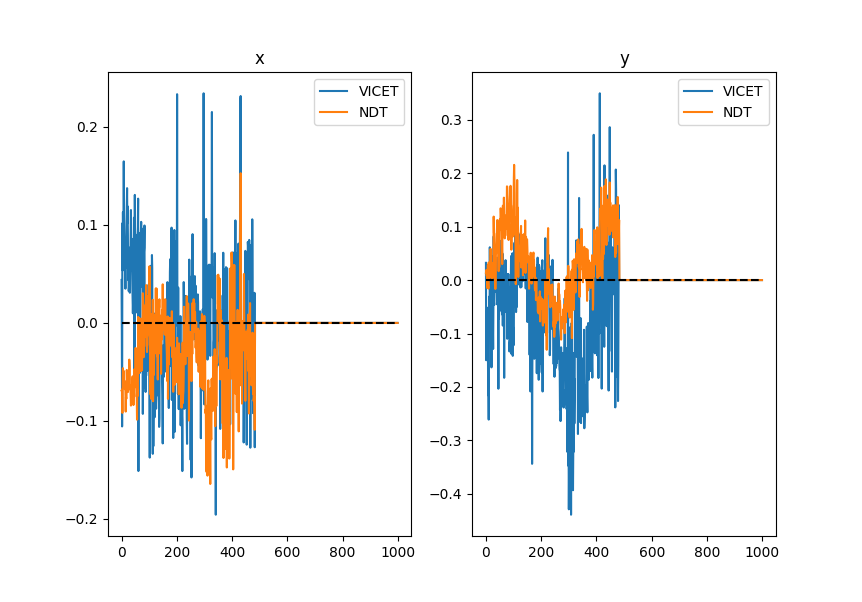

(1000, 6)


In [78]:
#plot A_hist results
from matplotlib import pyplot as p
fig, ax = p.subplots(1,2)

ax[0].set_title("x")
ax[0].plot(A_hist[:,0], label="VICET", color = "C0")
# ax[0].plot(A_hist[:,6], label="VICET corr", color = "C0", ls = "--")
# ax[0].plot(A_hist[:,0]+A_hist[:,6], label="VICET Test", color = "C2")
# ax[0].plot(X_hist_ICP[:,0], label = "ICP")
ax[0].plot(X_hist_ICET[:,0], label = "NDT", color ="C1")
ax[0].plot(np.zeros(len(X_hist_ICET)), color = "black", ls ='--')
ax[0].legend(loc="best")

ax[1].set_title("y")
ax[1].plot(A_hist[:,1], label="VICET", color = "C0")
# ax[1].plot(A_hist[:,7], label="VICET corr", color = "C0", ls = "--")
# ax[1].plot(A_hist[:,1]+A_hist[:,7], label="VICET Test", color = "C2")
# ax[1].plot(X_hist_ICP[:,1], label = "ICP")
ax[1].plot(X_hist_ICET[:,1], label = "NDT",color ="C1")
ax[1].plot(np.zeros(len(X_hist_ICET)), color = "black", ls ='--')
ax[1].legend(loc="best")

print(np.shape(X_hist_ICP))

<IPython.core.display.Javascript object>


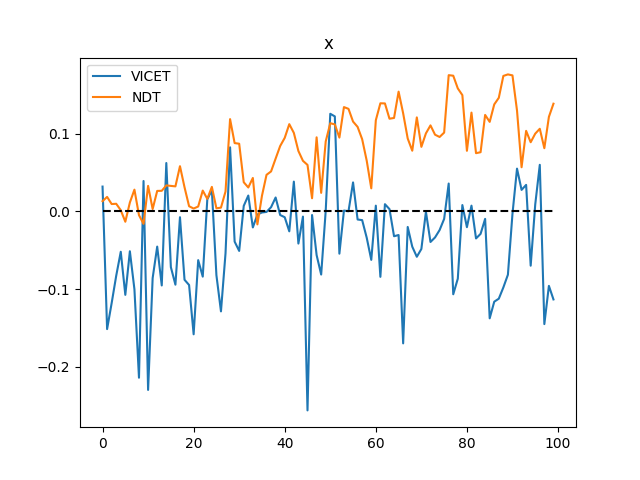

In [76]:
fig, ax = p.subplots()

ax.set_title("x")
ax.plot(A_hist[:,1], label="VICET", color = "C0")
# ax.plot(A_hist[:,6], label="VICET corr", color = "C0", ls = "--")
# ax.plot(A_hist[:,0]+A_hist[:,6], label="VICET test", color = "C2")
ax.plot(X_hist_ICET[:,1], label = "NDT", color ="C1")
ax.plot(np.zeros(len(A_hist)), color='k', ls ='--')

ax.legend(loc="best")

In [14]:
# # save results
# np.save("results/VICET/VICET_01_test2", A_hist)
# np.save("results/ICET/ICET_01_test2", X_hist_ICET)

In [ ]:
#plot just trajectory --> let's find a good test trajectory
disp =[]
test_traj = gt[:8300,2:5]
# test_traj_points = Line(test_traj, c = "red", lw = 4, alpha = 1).legend("Actual Motion of Platform")
test_traj_points = Points(test_traj, c = "red", alpha = 1).legend("Actual Motion of Platform")
disp.append(test_traj_points)

plt4 = Plotter(N = 1, axes = 1, bg = (1, 1, 1), interactive = True)
plt4.show(disp, "test trajectory")
ViewInteractiveWidget(plt4.window)

In [ ]:
print(np.shape(gt))